In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer

In [54]:
seed = 7
np.random.seed(seed)

In [55]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [56]:
#cargo primero los datos
file_dir = 'Datos/RiesgoBariloche'
data = pd.read_csv(file_dir,sep=",",quotechar='"',na_values=[''])
data = data["incidenciaAcum14d"]
df = pd.DataFrame(data)
df = df.to_numpy()
df1 = np.copy(df) #el original
df = df[:-20] #saco los ultimos 20 dias (ult 10 para probar + ult 10 retrasados)
df1 = df1[:-10] #saco los ultimos 10 dias retrasados
df2 = np.copy(df)

In [57]:
#normalizacion
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df.reshape(-1,1))
#df += np.random.normal(0,0.01,df.shape)
df = df.reshape(-1,1)
#lo mismo con df2
df2 = scaler.fit_transform(df2.reshape(-1,1))
df2 = df2.reshape(-1,1)
#split en train y test
training_size=int(len(df)*0.8)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1] #train y test data
train_data_2,test_data_2 = df2[0:training_size,:],df2[training_size:len(df),:1]
lag = 3 #creo que este es el que deducen en el paper
#creo los que vienen para la red
x_train, y_train = create_dataset(train_data, lag)
x_test, y_test = create_dataset(test_data, lag)

In [58]:
# reshape en (samples, time steps, features) para lstm como en pract7
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [59]:
def create_model(neurons):
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=neurons,activation='relu',return_sequences=True,input_shape=(lag,1)))
    model.add(keras.layers.Dense(units=1))
    model.compile(optimizer='adam',loss=keras.losses.MSE,metrics=['accuracy']) #metrics=['mean_absolute_percentage_error']
    return model

In [40]:
model = KerasClassifier(build_fn=create_model, verbose=1)
batch_size = [8,16,32,64,128,256]
epochs = [100, 200, 300, 400]
neurons = [32,64,128]
param_grid = dict(batch_size=batch_size, epochs=epochs, neurons = neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)

Epoch 1/100
154/154 [==============================] - 1s 4ms/step - loss: 7824.3327 - accuracy: 0.0065
Epoch 2/100
154/154 [==============================] - 0s 896us/step - loss: 7810.9529 - accuracy: 0.0065
Epoch 3/100
154/154 [==============================] - 0s 898us/step - loss: 7784.0717 - accuracy: 0.0065
Epoch 4/100
154/154 [==============================] - 0s 914us/step - loss: 7693.4654 - accuracy: 0.0065
Epoch 5/100
154/154 [==============================] - 0s 912us/step - loss: 7255.7150 - accuracy: 0.0065
Epoch 6/100
154/154 [==============================] - 0s 924us/step - loss: 5268.4315 - accuracy: 0.0065
Epoch 7/100
154/154 [==============================] - 0s 922us/step - loss: 1877.6702 - accuracy: 0.0130
Epoch 8/100
154/154 [==============================] - 0s 980us/step - loss: 1074.5581 - accuracy: 0.0065
Epoch 9/100
154/154 [==============================] - 0s 902us/step - loss: 1004.5497 - accuracy: 0.0000e+00
Epoch 10/100
154/154 [======================

154/154 [==============================] - 0s 874us/step - loss: 902.7371 - accuracy: 0.0065
Epoch 54/100
154/154 [==============================] - 0s 848us/step - loss: 912.8694 - accuracy: 0.0065
Epoch 55/100
154/154 [==============================] - 0s 853us/step - loss: 893.6062 - accuracy: 0.0000e+00
Epoch 56/100
154/154 [==============================] - 0s 842us/step - loss: 891.9174 - accuracy: 0.0065
Epoch 57/100
154/154 [==============================] - 0s 861us/step - loss: 890.8217 - accuracy: 0.0065
Epoch 58/100
154/154 [==============================] - 0s 855us/step - loss: 891.9043 - accuracy: 0.0065
Epoch 59/100
154/154 [==============================] - 0s 851us/step - loss: 902.9812 - accuracy: 0.0130
Epoch 60/100
154/154 [==============================] - 0s 848us/step - loss: 883.7291 - accuracy: 0.0000e+00
Epoch 61/100
154/154 [==============================] - 0s 868us/step - loss: 882.0759 - accuracy: 0.0195
Epoch 62/100
154/154 [=============================

154/154 [==============================] - 0s 881us/step - loss: 1324.3363 - accuracy: 0.0065
Epoch 30/100
154/154 [==============================] - 0s 855us/step - loss: 1310.6457 - accuracy: 0.0065
Epoch 31/100
154/154 [==============================] - 0s 866us/step - loss: 1276.0886 - accuracy: 0.0065
Epoch 32/100
154/154 [==============================] - 0s 849us/step - loss: 1261.2077 - accuracy: 0.0065
Epoch 33/100
154/154 [==============================] - 0s 850us/step - loss: 1247.0507 - accuracy: 0.0000e+00
Epoch 34/100
154/154 [==============================] - 0s 839us/step - loss: 1218.6162 - accuracy: 0.0065
Epoch 35/100
154/154 [==============================] - 0s 852us/step - loss: 1193.2777 - accuracy: 0.0000e+00
Epoch 36/100
154/154 [==============================] - 0s 852us/step - loss: 1173.8961 - accuracy: 0.0000e+00
Epoch 37/100
154/154 [==============================] - 0s 861us/step - loss: 1146.0554 - accuracy: 0.0065
Epoch 38/100
154/154 [================

154/154 [==============================] - 0s 874us/step - loss: 877.2259 - accuracy: 0.0065
Epoch 82/100
154/154 [==============================] - 0s 939us/step - loss: 859.1391 - accuracy: 0.0000e+00
Epoch 83/100
154/154 [==============================] - 0s 926us/step - loss: 836.6005 - accuracy: 0.0260
Epoch 84/100
154/154 [==============================] - 0s 913us/step - loss: 816.4464 - accuracy: 0.0000e+00
Epoch 85/100
154/154 [==============================] - 0s 978us/step - loss: 813.3805 - accuracy: 0.0000e+00
Epoch 86/100
154/154 [==============================] - 0s 848us/step - loss: 781.3136 - accuracy: 0.0130
Epoch 87/100
154/154 [==============================] - 0s 829us/step - loss: 755.0326 - accuracy: 0.0065
Epoch 88/100
154/154 [==============================] - 0s 829us/step - loss: 726.8307 - accuracy: 0.0065
Epoch 89/100
154/154 [==============================] - 0s 841us/step - loss: 702.9634 - accuracy: 0.0130
Epoch 90/100
154/154 [=========================

Epoch 33/100
154/154 [==============================] - 0s 860us/step - loss: 800.2236 - accuracy: 0.0260
Epoch 34/100
154/154 [==============================] - 0s 855us/step - loss: 777.9593 - accuracy: 0.0195
Epoch 35/100
154/154 [==============================] - 0s 958us/step - loss: 761.2988 - accuracy: 0.0130
Epoch 36/100
154/154 [==============================] - 0s 842us/step - loss: 753.7455 - accuracy: 0.0000e+00
Epoch 37/100
154/154 [==============================] - 0s 861us/step - loss: 729.6258 - accuracy: 0.0065
Epoch 38/100
154/154 [==============================] - 0s 868us/step - loss: 711.7803 - accuracy: 0.0000e+00
Epoch 39/100
154/154 [==============================] - 0s 855us/step - loss: 725.1282 - accuracy: 0.0000e+00
Epoch 40/100
154/154 [==============================] - 0s 855us/step - loss: 691.5966 - accuracy: 0.0065
Epoch 41/100
154/154 [==============================] - 0s 861us/step - loss: 713.6013 - accuracy: 0.0130
Epoch 42/100
154/154 [============

154/154 [==============================] - 0s 855us/step - loss: 1050.9726 - accuracy: 0.0130
Epoch 10/100
154/154 [==============================] - 0s 862us/step - loss: 1008.9670 - accuracy: 0.0130
Epoch 11/100
154/154 [==============================] - 0s 873us/step - loss: 1010.5704 - accuracy: 0.0130
Epoch 12/100
154/154 [==============================] - 0s 848us/step - loss: 1012.2804 - accuracy: 0.0130
Epoch 13/100
154/154 [==============================] - 0s 868us/step - loss: 1025.2044 - accuracy: 0.0065
Epoch 14/100
154/154 [==============================] - 0s 874us/step - loss: 994.0360 - accuracy: 0.0130
Epoch 15/100
154/154 [==============================] - 0s 861us/step - loss: 1050.5894 - accuracy: 0.0000e+00
Epoch 16/100
154/154 [==============================] - 0s 868us/step - loss: 1066.4825 - accuracy: 0.0000e+00
Epoch 17/100
154/154 [==============================] - 0s 868us/step - loss: 984.2666 - accuracy: 0.0000e+00
Epoch 18/100
154/154 [==================

Epoch 86/100
154/154 [==============================] - 0s 868us/step - loss: 272.5533 - accuracy: 0.0325
Epoch 87/100
154/154 [==============================] - 0s 871us/step - loss: 301.3944 - accuracy: 0.0260
Epoch 88/100
154/154 [==============================] - 0s 842us/step - loss: 296.2126 - accuracy: 0.0260
Epoch 89/100
154/154 [==============================] - 0s 874us/step - loss: 291.5315 - accuracy: 0.0195
Epoch 90/100
154/154 [==============================] - 0s 855us/step - loss: 285.4614 - accuracy: 0.0065
Epoch 91/100
154/154 [==============================] - 0s 861us/step - loss: 280.1914 - accuracy: 0.0455
Epoch 92/100
154/154 [==============================] - 0s 874us/step - loss: 289.8216 - accuracy: 0.0390
Epoch 93/100
154/154 [==============================] - 0s 868us/step - loss: 263.1000 - accuracy: 0.0195
Epoch 94/100
154/154 [==============================] - 0s 874us/step - loss: 267.3484 - accuracy: 0.0325
Epoch 95/100
154/154 [========================

154/154 [==============================] - 0s 861us/step - loss: 706.2527 - accuracy: 0.0130
Epoch 39/100
154/154 [==============================] - 0s 868us/step - loss: 728.0224 - accuracy: 0.0130
Epoch 40/100
154/154 [==============================] - 0s 866us/step - loss: 730.4359 - accuracy: 0.0065
Epoch 41/100
154/154 [==============================] - 0s 851us/step - loss: 741.9431 - accuracy: 0.0130
Epoch 42/100
154/154 [==============================] - 0s 855us/step - loss: 707.7880 - accuracy: 0.0195
Epoch 43/100
154/154 [==============================] - 0s 874us/step - loss: 687.4682 - accuracy: 0.0390
Epoch 44/100
154/154 [==============================] - 0s 861us/step - loss: 684.3311 - accuracy: 0.0260
Epoch 45/100
154/154 [==============================] - 0s 861us/step - loss: 687.6576 - accuracy: 0.0260
Epoch 46/100
154/154 [==============================] - 0s 855us/step - loss: 675.0839 - accuracy: 0.0325
Epoch 47/100
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 952us/step - loss: 954.3964 - accuracy: 0.0065
Epoch 91/200
154/154 [==============================] - 0s 971us/step - loss: 954.5354 - accuracy: 0.0065
Epoch 92/200
154/154 [==============================] - 0s 933us/step - loss: 970.2524 - accuracy: 0.0130
Epoch 93/200
154/154 [==============================] - 0s 920us/step - loss: 956.5575 - accuracy: 0.0065
Epoch 94/200
154/154 [==============================] - 0s 966us/step - loss: 982.1601 - accuracy: 0.0065
Epoch 95/200
154/154 [==============================] - 0s 855us/step - loss: 986.9254 - accuracy: 0.0065
Epoch 96/200
154/154 [==============================] - 0s 855us/step - loss: 953.4207 - accuracy: 0.0195
Epoch 97/200
154/154 [==============================] - 0s 855us/step - loss: 951.4806 - accuracy: 0.0065
Epoch 98/200
154/154 [==============================] - 0s 874us/step - loss: 955.0757 - accuracy: 0.0325
Epoch 99/200
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 868us/step - loss: 943.4391 - accuracy: 0.0130
Epoch 43/200
154/154 [==============================] - 0s 844us/step - loss: 919.8333 - accuracy: 0.0000e+00
Epoch 44/200
154/154 [==============================] - 0s 848us/step - loss: 928.6841 - accuracy: 0.0260
Epoch 45/200
154/154 [==============================] - 0s 877us/step - loss: 927.4945 - accuracy: 0.0195
Epoch 46/200
154/154 [==============================] - 0s 855us/step - loss: 941.9997 - accuracy: 0.0000e+00
Epoch 47/200
154/154 [==============================] - 0s 855us/step - loss: 913.8601 - accuracy: 0.0130
Epoch 48/200
154/154 [==============================] - 0s 871us/step - loss: 915.4494 - accuracy: 0.0065
Epoch 49/200
154/154 [==============================] - 0s 963us/step - loss: 912.4969 - accuracy: 0.0065
Epoch 50/200
154/154 [==============================] - 0s 952us/step - loss: 910.0062 - accuracy: 0.0065
Epoch 51/200
154/154 [=============================

154/154 [==============================] - 0s 855us/step - loss: 287.9757 - accuracy: 0.0325
Epoch 195/200
154/154 [==============================] - 0s 855us/step - loss: 290.7764 - accuracy: 0.0195
Epoch 196/200
154/154 [==============================] - 0s 872us/step - loss: 294.8430 - accuracy: 0.0260
Epoch 197/200
154/154 [==============================] - 0s 861us/step - loss: 300.9836 - accuracy: 0.0130
Epoch 198/200
154/154 [==============================] - 0s 881us/step - loss: 293.2089 - accuracy: 0.0260
Epoch 199/200
154/154 [==============================] - 0s 882us/step - loss: 296.3781 - accuracy: 0.0195
Epoch 200/200
77/77 [==============================] - 0s 1ms/step
Epoch 1/200
154/154 [==============================] - 1s 4ms/step - loss: 7823.1237 - accuracy: 0.0065
Epoch 2/200
154/154 [==============================] - 0s 842us/step - loss: 7805.2928 - accuracy: 0.0065
Epoch 3/200
154/154 [==============================] - 0s 848us/step - loss: 7762.9680 - accura

154/154 [==============================] - 0s 877us/step - loss: 641.3796 - accuracy: 0.0195
Epoch 147/200
154/154 [==============================] - 0s 878us/step - loss: 644.0918 - accuracy: 0.0065
Epoch 148/200
154/154 [==============================] - 0s 887us/step - loss: 648.7922 - accuracy: 0.0260
Epoch 149/200
154/154 [==============================] - 0s 879us/step - loss: 649.8106 - accuracy: 0.0065
Epoch 150/200
154/154 [==============================] - 0s 899us/step - loss: 655.8180 - accuracy: 0.0065
Epoch 151/200
154/154 [==============================] - 0s 895us/step - loss: 664.1127 - accuracy: 0.0260
Epoch 152/200
154/154 [==============================] - 0s 882us/step - loss: 643.1693 - accuracy: 0.0130
Epoch 153/200
154/154 [==============================] - 0s 904us/step - loss: 645.5569 - accuracy: 0.0325
Epoch 154/200
154/154 [==============================] - 0s 881us/step - loss: 649.3521 - accuracy: 0.0195
Epoch 155/200
154/154 [============================

154/154 [==============================] - 0s 868us/step - loss: 944.9390 - accuracy: 0.0065
Epoch 99/200
154/154 [==============================] - 0s 856us/step - loss: 946.6460 - accuracy: 0.0130
Epoch 100/200
154/154 [==============================] - 0s 911us/step - loss: 943.5638 - accuracy: 0.0000e+00
Epoch 101/200
154/154 [==============================] - 0s 881us/step - loss: 941.5004 - accuracy: 0.0000e+00
Epoch 102/200
154/154 [==============================] - 0s 855us/step - loss: 959.2064 - accuracy: 0.0195
Epoch 103/200
154/154 [==============================] - 0s 868us/step - loss: 943.8755 - accuracy: 0.0195
Epoch 104/200
154/154 [==============================] - 0s 881us/step - loss: 934.7054 - accuracy: 0.0065
Epoch 105/200
154/154 [==============================] - 0s 894us/step - loss: 929.2661 - accuracy: 0.0000e+00
Epoch 106/200
154/154 [==============================] - 0s 862us/step - loss: 939.5928 - accuracy: 0.0065
Epoch 107/200
154/154 [=================

154/154 [==============================] - 0s 947us/step - loss: 912.6657 - accuracy: 0.0065
Epoch 51/200
154/154 [==============================] - 0s 842us/step - loss: 911.4162 - accuracy: 0.0065
Epoch 52/200
154/154 [==============================] - 0s 861us/step - loss: 925.4203 - accuracy: 0.0000e+00
Epoch 53/200
154/154 [==============================] - 0s 855us/step - loss: 914.7862 - accuracy: 0.0130
Epoch 54/200
154/154 [==============================] - 0s 874us/step - loss: 905.7078 - accuracy: 0.0065
Epoch 55/200
154/154 [==============================] - 0s 848us/step - loss: 921.3409 - accuracy: 0.0130
Epoch 56/200
154/154 [==============================] - 0s 881us/step - loss: 920.4479 - accuracy: 0.0065
Epoch 57/200
154/154 [==============================] - 0s 855us/step - loss: 911.4565 - accuracy: 0.0065
Epoch 58/200
154/154 [==============================] - 0s 855us/step - loss: 893.1898 - accuracy: 0.0195
Epoch 59/200
154/154 [==============================] -

154/154 [==============================] - 0s 870us/step - loss: 7791.2310 - accuracy: 0.0065
Epoch 3/200
154/154 [==============================] - 0s 880us/step - loss: 7633.8295 - accuracy: 0.0065
Epoch 4/200
154/154 [==============================] - 0s 849us/step - loss: 6445.8629 - accuracy: 0.0000e+00
Epoch 5/200
154/154 [==============================] - 0s 871us/step - loss: 2441.6986 - accuracy: 0.0130
Epoch 6/200
154/154 [==============================] - 0s 856us/step - loss: 1871.4077 - accuracy: 0.0000e+00
Epoch 7/200
154/154 [==============================] - 0s 848us/step - loss: 1843.9264 - accuracy: 0.0130
Epoch 8/200
154/154 [==============================] - 0s 855us/step - loss: 1783.0990 - accuracy: 0.0000e+00
Epoch 9/200
154/154 [==============================] - 0s 865us/step - loss: 1702.7172 - accuracy: 0.0130
Epoch 10/200
154/154 [==============================] - 0s 854us/step - loss: 1664.4817 - accuracy: 0.0065
Epoch 11/200
154/154 [=======================

154/154 [==============================] - 0s 868us/step - loss: 657.8354 - accuracy: 0.0390
Epoch 155/200
154/154 [==============================] - 0s 842us/step - loss: 641.3990 - accuracy: 0.0000e+00
Epoch 156/200
154/154 [==============================] - 0s 868us/step - loss: 657.9743 - accuracy: 0.0325
Epoch 157/200
154/154 [==============================] - 0s 868us/step - loss: 657.9565 - accuracy: 0.0065
Epoch 158/200
154/154 [==============================] - 0s 872us/step - loss: 649.5552 - accuracy: 0.0195TA: 0s - loss: 641.8209 - accuracy: 0.02
Epoch 159/200
154/154 [==============================] - 0s 852us/step - loss: 647.1758 - accuracy: 0.0000e+00
Epoch 160/200
154/154 [==============================] - 0s 857us/step - loss: 648.0022 - accuracy: 0.0065
Epoch 161/200
154/154 [==============================] - 0s 855us/step - loss: 651.4505 - accuracy: 0.0000e+00
Epoch 162/200
154/154 [==============================] - 0s 846us/step - loss: 679.5198 - accuracy: 0.0130

154/154 [==============================] - 0s 869us/step - loss: 338.1346 - accuracy: 0.0584
Epoch 107/200
154/154 [==============================] - 0s 881us/step - loss: 309.8696 - accuracy: 0.0195
Epoch 108/200
154/154 [==============================] - 0s 868us/step - loss: 272.8649 - accuracy: 0.0195
Epoch 109/200
154/154 [==============================] - 0s 868us/step - loss: 273.3935 - accuracy: 0.0325
Epoch 110/200
154/154 [==============================] - 0s 848us/step - loss: 288.9176 - accuracy: 0.0455
Epoch 111/200
154/154 [==============================] - 0s 865us/step - loss: 278.4402 - accuracy: 0.0130
Epoch 112/200
154/154 [==============================] - 0s 871us/step - loss: 267.5700 - accuracy: 0.0325
Epoch 113/200
154/154 [==============================] - 0s 854us/step - loss: 310.8220 - accuracy: 0.0260
Epoch 114/200
154/154 [==============================] - 0s 855us/step - loss: 309.6366 - accuracy: 0.0714
Epoch 115/200
154/154 [============================

154/154 [==============================] - 0s 871us/step - loss: 872.4619 - accuracy: 0.0065
Epoch 59/200
154/154 [==============================] - 0s 874us/step - loss: 848.0089 - accuracy: 0.0065
Epoch 60/200
154/154 [==============================] - 0s 861us/step - loss: 859.9996 - accuracy: 0.0065
Epoch 61/200
154/154 [==============================] - 0s 874us/step - loss: 865.5564 - accuracy: 0.0130
Epoch 62/200
154/154 [==============================] - 0s 848us/step - loss: 920.7768 - accuracy: 0.0000e+00
Epoch 63/200
154/154 [==============================] - 0s 871us/step - loss: 899.1236 - accuracy: 0.0130
Epoch 64/200
154/154 [==============================] - 0s 861us/step - loss: 978.4282 - accuracy: 0.0065
Epoch 65/200
154/154 [==============================] - 0s 865us/step - loss: 919.5571 - accuracy: 0.0130
Epoch 66/200
154/154 [==============================] - 0s 846us/step - loss: 921.4512 - accuracy: 0.0130
Epoch 67/200
154/154 [==============================] -

154/154 [==============================] - 0s 921us/step - loss: 1527.6944 - accuracy: 0.0130
Epoch 11/200
154/154 [==============================] - 0s 863us/step - loss: 1524.3239 - accuracy: 0.0065
Epoch 12/200
154/154 [==============================] - 0s 900us/step - loss: 1441.0236 - accuracy: 0.0000e+00
Epoch 13/200
154/154 [==============================] - 0s 897us/step - loss: 1402.8324 - accuracy: 0.0065
Epoch 14/200
154/154 [==============================] - 0s 887us/step - loss: 1330.9323 - accuracy: 0.0000e+00
Epoch 15/200
154/154 [==============================] - 0s 874us/step - loss: 1289.9952 - accuracy: 0.0000e+00
Epoch 16/200
154/154 [==============================] - 0s 898us/step - loss: 1263.5698 - accuracy: 0.0130
Epoch 17/200
154/154 [==============================] - 0s 867us/step - loss: 1224.8076 - accuracy: 0.0065
Epoch 18/200
154/154 [==============================] - 0s 881us/step - loss: 1155.1832 - accuracy: 0.0130
Epoch 19/200
154/154 [================

154/154 [==============================] - 0s 886us/step - loss: 772.2047 - accuracy: 0.0065
Epoch 88/200
154/154 [==============================] - 0s 861us/step - loss: 685.7960 - accuracy: 0.0130
Epoch 89/200
154/154 [==============================] - 0s 871us/step - loss: 670.0135 - accuracy: 0.0195
Epoch 90/200
154/154 [==============================] - 0s 872us/step - loss: 673.7572 - accuracy: 0.0195
Epoch 91/200
154/154 [==============================] - 0s 880us/step - loss: 675.3921 - accuracy: 0.0130
Epoch 92/200
154/154 [==============================] - 0s 887us/step - loss: 694.4070 - accuracy: 0.0260
Epoch 93/200
154/154 [==============================] - 0s 873us/step - loss: 668.5611 - accuracy: 0.0260
Epoch 94/200
154/154 [==============================] - 0s 884us/step - loss: 694.8504 - accuracy: 0.0065
Epoch 95/200
154/154 [==============================] - 0s 861us/step - loss: 671.0219 - accuracy: 0.0065
Epoch 96/200
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 868us/step - loss: 1000.2355 - accuracy: 0.0195
Epoch 39/300
154/154 [==============================] - 0s 866us/step - loss: 994.8844 - accuracy: 0.0065
Epoch 40/300
154/154 [==============================] - 0s 868us/step - loss: 1002.1880 - accuracy: 0.0260
Epoch 41/300
154/154 [==============================] - 0s 913us/step - loss: 1012.2561 - accuracy: 0.0000e+00
Epoch 42/300
154/154 [==============================] - 0s 926us/step - loss: 1006.7606 - accuracy: 0.0065
Epoch 43/300
154/154 [==============================] - 0s 868us/step - loss: 999.5256 - accuracy: 0.0065
Epoch 44/300
154/154 [==============================] - 0s 868us/step - loss: 995.3904 - accuracy: 0.0065
Epoch 45/300
154/154 [==============================] - 0s 849us/step - loss: 1000.3456 - accuracy: 0.0130
Epoch 46/300
154/154 [==============================] - 0s 847us/step - loss: 996.9991 - accuracy: 0.0260
Epoch 47/300
154/154 [============================

154/154 [==============================] - 0s 846us/step - loss: 280.2117 - accuracy: 0.0325
Epoch 191/300
154/154 [==============================] - 0s 843us/step - loss: 282.0281 - accuracy: 0.0065
Epoch 192/300
154/154 [==============================] - 0s 844us/step - loss: 274.1541 - accuracy: 0.0195
Epoch 193/300
154/154 [==============================] - 0s 844us/step - loss: 277.0504 - accuracy: 0.0325
Epoch 194/300
154/154 [==============================] - 0s 847us/step - loss: 306.4829 - accuracy: 0.0260
Epoch 195/300
154/154 [==============================] - 0s 779us/step - loss: 276.8783 - accuracy: 0.0195
Epoch 196/300
154/154 [==============================] - 0s 842us/step - loss: 283.9147 - accuracy: 0.0325
Epoch 197/300
154/154 [==============================] - 0s 847us/step - loss: 396.6261 - accuracy: 0.0390
Epoch 198/300
154/154 [==============================] - 0s 842us/step - loss: 271.1943 - accuracy: 0.0130
Epoch 199/300
154/154 [============================

154/154 [==============================] - 0s 871us/step - loss: 933.7642 - accuracy: 0.0065
Epoch 43/300
154/154 [==============================] - 0s 813us/step - loss: 913.3920 - accuracy: 0.0065
Epoch 44/300
154/154 [==============================] - 0s 858us/step - loss: 927.2154 - accuracy: 0.0065
Epoch 45/300
154/154 [==============================] - 0s 817us/step - loss: 928.7797 - accuracy: 0.0130
Epoch 46/300
154/154 [==============================] - 0s 857us/step - loss: 910.0331 - accuracy: 0.0195
Epoch 47/300
154/154 [==============================] - 0s 894us/step - loss: 909.1015 - accuracy: 0.0260
Epoch 48/300
154/154 [==============================] - 0s 856us/step - loss: 916.7702 - accuracy: 0.0195
Epoch 49/300
154/154 [==============================] - 0s 811us/step - loss: 909.6171 - accuracy: 0.0195
Epoch 50/300
154/154 [==============================] - 0s 859us/step - loss: 907.7975 - accuracy: 0.0130
Epoch 51/300
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 840us/step - loss: 374.3158 - accuracy: 0.0195
Epoch 195/300
154/154 [==============================] - 0s 862us/step - loss: 394.6573 - accuracy: 0.0130
Epoch 196/300
154/154 [==============================] - 0s 859us/step - loss: 312.0783 - accuracy: 0.0195
Epoch 197/300
154/154 [==============================] - 0s 878us/step - loss: 318.3504 - accuracy: 0.0195
Epoch 198/300
154/154 [==============================] - 0s 770us/step - loss: 343.4117 - accuracy: 0.0260
Epoch 199/300
154/154 [==============================] - 0s 816us/step - loss: 317.1867 - accuracy: 0.0195
Epoch 200/300
154/154 [==============================] - 0s 816us/step - loss: 310.9952 - accuracy: 0.0519
Epoch 201/300
154/154 [==============================] - 0s 933us/step - loss: 321.4582 - accuracy: 0.0260
Epoch 202/300
154/154 [==============================] - 0s 828us/step - loss: 307.0337 - accuracy: 0.0390
Epoch 203/300
154/154 [============================

154/154 [==============================] - 0s 844us/step - loss: 1061.9365 - accuracy: 0.0065
Epoch 46/300
154/154 [==============================] - 0s 896us/step - loss: 1011.8158 - accuracy: 0.0000e+00
Epoch 47/300
154/154 [==============================] - 0s 842us/step - loss: 1000.4237 - accuracy: 0.0000e+00
Epoch 48/300
154/154 [==============================] - 0s 830us/step - loss: 981.0307 - accuracy: 0.0195
Epoch 49/300
154/154 [==============================] - 0s 814us/step - loss: 976.8228 - accuracy: 0.0065
Epoch 50/300
154/154 [==============================] - 0s 900us/step - loss: 958.0425 - accuracy: 0.0130
Epoch 51/300
154/154 [==============================] - 0s 823us/step - loss: 936.4226 - accuracy: 0.0000e+00
Epoch 52/300
154/154 [==============================] - 0s 808us/step - loss: 913.7358 - accuracy: 0.0065
Epoch 53/300
154/154 [==============================] - 0s 854us/step - loss: 911.0937 - accuracy: 0.0130
Epoch 54/300
154/154 [======================

154/154 [==============================] - 0s 827us/step - loss: 664.7810 - accuracy: 0.0130
Epoch 198/300
154/154 [==============================] - 0s 900us/step - loss: 645.1950 - accuracy: 0.0325
Epoch 199/300
154/154 [==============================] - 0s 836us/step - loss: 648.8477 - accuracy: 0.0000e+00
Epoch 200/300
154/154 [==============================] - 0s 897us/step - loss: 657.1567 - accuracy: 0.0195
Epoch 201/300
154/154 [==============================] - 0s 819us/step - loss: 644.0438 - accuracy: 0.0130
Epoch 202/300
154/154 [==============================] - 0s 861us/step - loss: 667.5990 - accuracy: 0.0390
Epoch 203/300
154/154 [==============================] - 0s 844us/step - loss: 661.5990 - accuracy: 0.0130
Epoch 204/300
154/154 [==============================] - 0s 823us/step - loss: 663.4931 - accuracy: 0.0065
Epoch 205/300
154/154 [==============================] - 0s 846us/step - loss: 661.2443 - accuracy: 0.0260
Epoch 206/300
154/154 [========================

154/154 [==============================] - 0s 879us/step - loss: 581.0793 - accuracy: 0.0195
Epoch 50/300
154/154 [==============================] - 0s 770us/step - loss: 574.1584 - accuracy: 0.0260
Epoch 51/300
154/154 [==============================] - 0s 801us/step - loss: 564.7482 - accuracy: 0.0130
Epoch 52/300
154/154 [==============================] - 0s 854us/step - loss: 556.5314 - accuracy: 0.0260
Epoch 53/300
154/154 [==============================] - 0s 782us/step - loss: 514.1239 - accuracy: 0.0195
Epoch 54/300
154/154 [==============================] - 0s 793us/step - loss: 487.8329 - accuracy: 0.0065
Epoch 55/300
154/154 [==============================] - 0s 784us/step - loss: 467.4587 - accuracy: 0.0065
Epoch 56/300
154/154 [==============================] - 0s 889us/step - loss: 439.9502 - accuracy: 0.0325
Epoch 57/300
154/154 [==============================] - 0s 781us/step - loss: 428.3724 - accuracy: 0.0130
Epoch 58/300
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 869us/step - loss: 264.0653 - accuracy: 0.0390
Epoch 203/300
154/154 [==============================] - 0s 870us/step - loss: 262.8924 - accuracy: 0.0455
Epoch 204/300
154/154 [==============================] - 0s 849us/step - loss: 262.1137 - accuracy: 0.0260
Epoch 205/300
154/154 [==============================] - 0s 848us/step - loss: 257.6385 - accuracy: 0.0260
Epoch 206/300
154/154 [==============================] - 0s 829us/step - loss: 266.1750 - accuracy: 0.0390
Epoch 207/300
154/154 [==============================] - 0s 853us/step - loss: 330.0929 - accuracy: 0.0195
Epoch 208/300
154/154 [==============================] - 0s 790us/step - loss: 262.1189 - accuracy: 0.0130
Epoch 209/300
154/154 [==============================] - 0s 856us/step - loss: 261.0188 - accuracy: 0.0325
Epoch 210/300
154/154 [==============================] - 0s 848us/step - loss: 267.6569 - accuracy: 0.0325
Epoch 211/300
154/154 [============================

154/154 [==============================] - 0s 906us/step - loss: 906.9309 - accuracy: 0.0000e+00
Epoch 55/300
154/154 [==============================] - 0s 1ms/step - loss: 903.0822 - accuracy: 0.0000e+00
Epoch 56/300
154/154 [==============================] - 0s 989us/step - loss: 899.2417 - accuracy: 0.0130
Epoch 57/300
154/154 [==============================] - 0s 944us/step - loss: 915.1386 - accuracy: 0.0195
Epoch 58/300
154/154 [==============================] - 0s 889us/step - loss: 911.1078 - accuracy: 0.0195
Epoch 59/300
154/154 [==============================] - 0s 956us/step - loss: 928.9480 - accuracy: 0.0065
Epoch 60/300
154/154 [==============================] - 0s 900us/step - loss: 926.7911 - accuracy: 0.0000e+00
Epoch 61/300
154/154 [==============================] - 0s 819us/step - loss: 916.4661 - accuracy: 0.0260
Epoch 62/300
154/154 [==============================] - 0s 881us/step - loss: 886.3955 - accuracy: 0.0260
Epoch 63/300
154/154 [===========================

154/154 [==============================] - 0s 1ms/step - loss: 294.1529 - accuracy: 0.0260
Epoch 207/300
154/154 [==============================] - 0s 1ms/step - loss: 290.7079 - accuracy: 0.0195
Epoch 208/300
154/154 [==============================] - 0s 889us/step - loss: 284.8560 - accuracy: 0.0325
Epoch 209/300
154/154 [==============================] - 0s 968us/step - loss: 291.3816 - accuracy: 0.0390
Epoch 210/300
154/154 [==============================] - 0s 1ms/step - loss: 286.7900 - accuracy: 0.0260
Epoch 211/300
154/154 [==============================] - 0s 998us/step - loss: 306.3090 - accuracy: 0.0390
Epoch 212/300
154/154 [==============================] - 0s 862us/step - loss: 280.1571 - accuracy: 0.0195
Epoch 213/300
154/154 [==============================] - 0s 911us/step - loss: 284.3111 - accuracy: 0.0130
Epoch 214/300
154/154 [==============================] - 0s 803us/step - loss: 307.7651 - accuracy: 0.0195
Epoch 215/300
154/154 [==============================] - 

154/154 [==============================] - 0s 888us/step - loss: 674.6034 - accuracy: 0.0000e+00
Epoch 58/300
154/154 [==============================] - 0s 856us/step - loss: 684.0059 - accuracy: 0.0195
Epoch 59/300
154/154 [==============================] - 0s 873us/step - loss: 671.6691 - accuracy: 0.0130
Epoch 60/300
154/154 [==============================] - 0s 885us/step - loss: 668.4210 - accuracy: 0.0130
Epoch 61/300
154/154 [==============================] - 0s 847us/step - loss: 670.8215 - accuracy: 0.0130
Epoch 62/300
154/154 [==============================] - 0s 849us/step - loss: 694.7751 - accuracy: 0.0065
Epoch 63/300
154/154 [==============================] - 0s 910us/step - loss: 678.5625 - accuracy: 0.0195
Epoch 64/300
154/154 [==============================] - 0s 828us/step - loss: 672.2190 - accuracy: 0.0195
Epoch 65/300
154/154 [==============================] - 0s 808us/step - loss: 661.9727 - accuracy: 0.0130
Epoch 66/300
154/154 [==============================] -

154/154 [==============================] - 0s 908us/step - loss: 653.0954 - accuracy: 0.0195
Epoch 210/300
154/154 [==============================] - 0s 1ms/step - loss: 661.9441 - accuracy: 0.0065
Epoch 211/300
154/154 [==============================] - 0s 946us/step - loss: 648.0541 - accuracy: 0.0130
Epoch 212/300
154/154 [==============================] - 0s 1ms/step - loss: 653.7741 - accuracy: 0.0260
Epoch 213/300
154/154 [==============================] - 0s 932us/step - loss: 654.5970 - accuracy: 0.0195
Epoch 214/300
154/154 [==============================] - 0s 894us/step - loss: 662.9437 - accuracy: 0.0130
Epoch 215/300
154/154 [==============================] - 0s 888us/step - loss: 652.8027 - accuracy: 0.0065
Epoch 216/300
154/154 [==============================] - 0s 871us/step - loss: 653.9362 - accuracy: 0.0000e+00
Epoch 217/300
154/154 [==============================] - 0s 941us/step - loss: 650.3318 - accuracy: 0.0195
Epoch 218/300
154/154 [============================

Epoch 61/300
154/154 [==============================] - 0s 931us/step - loss: 951.7259 - accuracy: 0.0065
Epoch 62/300
154/154 [==============================] - 0s 904us/step - loss: 985.7597 - accuracy: 0.0130
Epoch 63/300
154/154 [==============================] - 0s 846us/step - loss: 996.6532 - accuracy: 0.0195
Epoch 64/300
154/154 [==============================] - 0s 877us/step - loss: 926.2082 - accuracy: 0.0130
Epoch 65/300
154/154 [==============================] - 0s 812us/step - loss: 931.5212 - accuracy: 0.0130
Epoch 66/300
154/154 [==============================] - 0s 913us/step - loss: 963.8001 - accuracy: 0.0195
Epoch 67/300
154/154 [==============================] - 0s 938us/step - loss: 919.7039 - accuracy: 0.0065
Epoch 68/300
154/154 [==============================] - 0s 961us/step - loss: 912.4437 - accuracy: 0.0130
Epoch 69/300
154/154 [==============================] - 0s 1ms/step - loss: 904.7190 - accuracy: 0.0260
Epoch 70/300
154/154 [==========================

154/154 [==============================] - 0s 948us/step - loss: 283.7937 - accuracy: 0.0260
Epoch 214/300
154/154 [==============================] - 0s 860us/step - loss: 283.7019 - accuracy: 0.0260
Epoch 215/300
154/154 [==============================] - 0s 864us/step - loss: 270.9852 - accuracy: 0.0390
Epoch 216/300
154/154 [==============================] - 0s 857us/step - loss: 292.7117 - accuracy: 0.0130
Epoch 217/300
154/154 [==============================] - 0s 947us/step - loss: 321.2346 - accuracy: 0.0065
Epoch 218/300
154/154 [==============================] - 0s 863us/step - loss: 291.6741 - accuracy: 0.0065
Epoch 219/300
154/154 [==============================] - 0s 845us/step - loss: 292.3463 - accuracy: 0.0260
Epoch 220/300
154/154 [==============================] - 0s 929us/step - loss: 280.5522 - accuracy: 0.0390
Epoch 221/300
154/154 [==============================] - 0s 830us/step - loss: 280.5870 - accuracy: 0.0195
Epoch 222/300
154/154 [============================

154/154 [==============================] - 0s 883us/step - loss: 823.5569 - accuracy: 0.0000e+00
Epoch 66/300
154/154 [==============================] - 0s 863us/step - loss: 820.1487 - accuracy: 0.0065
Epoch 67/300
154/154 [==============================] - 0s 951us/step - loss: 821.7655 - accuracy: 0.0000e+00
Epoch 68/300
154/154 [==============================] - 0s 896us/step - loss: 790.1393 - accuracy: 0.0130
Epoch 69/300
154/154 [==============================] - 0s 2ms/step - loss: 808.8556 - accuracy: 0.0065
Epoch 70/300
154/154 [==============================] - 0s 1ms/step - loss: 782.3639 - accuracy: 0.0065
Epoch 71/300
154/154 [==============================] - 0s 952us/step - loss: 817.6837 - accuracy: 0.0065
Epoch 72/300
154/154 [==============================] - 0s 900us/step - loss: 815.8161 - accuracy: 0.0130
Epoch 73/300
154/154 [==============================] - 0s 881us/step - loss: 769.8252 - accuracy: 0.0065
Epoch 74/300
154/154 [==============================] -

154/154 [==============================] - 0s 909us/step - loss: 281.5240 - accuracy: 0.0195
Epoch 219/300
154/154 [==============================] - 0s 842us/step - loss: 268.4172 - accuracy: 0.0390
Epoch 220/300
154/154 [==============================] - 0s 922us/step - loss: 271.5668 - accuracy: 0.0260
Epoch 221/300
154/154 [==============================] - 0s 897us/step - loss: 270.6079 - accuracy: 0.0519
Epoch 222/300
154/154 [==============================] - 0s 844us/step - loss: 268.8084 - accuracy: 0.0260
Epoch 223/300
154/154 [==============================] - 0s 976us/step - loss: 268.4866 - accuracy: 0.0390
Epoch 224/300
154/154 [==============================] - 0s 917us/step - loss: 273.0510 - accuracy: 0.0260
Epoch 225/300
154/154 [==============================] - 0s 900us/step - loss: 290.4591 - accuracy: 0.0325
Epoch 226/300
154/154 [==============================] - 0s 823us/step - loss: 273.3150 - accuracy: 0.0325
Epoch 227/300
154/154 [============================

154/154 [==============================] - 0s 887us/step - loss: 717.9748 - accuracy: 0.0130
Epoch 72/300
154/154 [==============================] - 0s 900us/step - loss: 686.6000 - accuracy: 0.0130
Epoch 73/300
154/154 [==============================] - 0s 939us/step - loss: 697.0570 - accuracy: 0.0195
Epoch 74/300
154/154 [==============================] - 0s 901us/step - loss: 663.0575 - accuracy: 0.0195
Epoch 75/300
154/154 [==============================] - 0s 913us/step - loss: 666.1500 - accuracy: 0.0065
Epoch 76/300
154/154 [==============================] - 0s 891us/step - loss: 682.7257 - accuracy: 0.0260
Epoch 77/300
154/154 [==============================] - 0s 855us/step - loss: 674.4449 - accuracy: 0.0065
Epoch 78/300
154/154 [==============================] - 0s 861us/step - loss: 662.1686 - accuracy: 0.0390
Epoch 79/300
154/154 [==============================] - 0s 876us/step - loss: 666.5567 - accuracy: 0.0000e+00
Epoch 80/300
154/154 [==============================] -

154/154 [==============================] - 0s 868us/step - loss: 649.1665 - accuracy: 0.0130
Epoch 224/300
154/154 [==============================] - 0s 862us/step - loss: 646.4198 - accuracy: 0.0130
Epoch 225/300
154/154 [==============================] - 0s 868us/step - loss: 661.1590 - accuracy: 0.0260
Epoch 226/300
154/154 [==============================] - 0s 894us/step - loss: 649.1741 - accuracy: 0.0195
Epoch 227/300
154/154 [==============================] - 0s 868us/step - loss: 653.5050 - accuracy: 0.0195
Epoch 228/300
154/154 [==============================] - 0s 886us/step - loss: 647.1364 - accuracy: 0.0130
Epoch 229/300
154/154 [==============================] - 0s 874us/step - loss: 651.3287 - accuracy: 0.0130
Epoch 230/300
154/154 [==============================] - 0s 887us/step - loss: 641.7683 - accuracy: 0.0065
Epoch 231/300
154/154 [==============================] - 0s 881us/step - loss: 680.7931 - accuracy: 0.0065
Epoch 232/300
154/154 [============================

154/154 [==============================] - 0s 865us/step - loss: 951.1995 - accuracy: 0.0130
Epoch 76/400
154/154 [==============================] - 0s 861us/step - loss: 950.4331 - accuracy: 0.0065
Epoch 77/400
154/154 [==============================] - 0s 835us/step - loss: 950.2685 - accuracy: 0.0260
Epoch 78/400
154/154 [==============================] - 0s 848us/step - loss: 949.0202 - accuracy: 0.0065
Epoch 79/400
154/154 [==============================] - 0s 855us/step - loss: 951.5867 - accuracy: 0.0195
Epoch 80/400
154/154 [==============================] - 0s 840us/step - loss: 951.3317 - accuracy: 0.0065
Epoch 81/400
154/154 [==============================] - 0s 848us/step - loss: 939.3100 - accuracy: 0.0065
Epoch 82/400
154/154 [==============================] - 0s 855us/step - loss: 963.3792 - accuracy: 0.0065
Epoch 83/400
154/154 [==============================] - 0s 853us/step - loss: 950.5275 - accuracy: 0.0260
Epoch 84/400
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 855us/step - loss: 268.8375 - accuracy: 0.0130
Epoch 228/400
154/154 [==============================] - 0s 856us/step - loss: 296.0214 - accuracy: 0.0065
Epoch 229/400
154/154 [==============================] - 0s 855us/step - loss: 283.2574 - accuracy: 0.0390
Epoch 230/400
154/154 [==============================] - 0s 848us/step - loss: 290.3099 - accuracy: 0.0130
Epoch 231/400
154/154 [==============================] - 0s 874us/step - loss: 280.7317 - accuracy: 0.0325
Epoch 232/400
154/154 [==============================] - 0s 848us/step - loss: 273.8358 - accuracy: 0.0455
Epoch 233/400
154/154 [==============================] - 0s 861us/step - loss: 273.8023 - accuracy: 0.0195
Epoch 234/400
154/154 [==============================] - 0s 855us/step - loss: 285.7212 - accuracy: 0.0065
Epoch 235/400
154/154 [==============================] - 0s 841us/step - loss: 332.1825 - accuracy: 0.0130
Epoch 236/400
154/154 [============================

154/154 [==============================] - 0s 853us/step - loss: 267.8093 - accuracy: 0.0325
Epoch 380/400
154/154 [==============================] - 0s 855us/step - loss: 252.0520 - accuracy: 0.0260
Epoch 381/400
154/154 [==============================] - 0s 861us/step - loss: 269.1622 - accuracy: 0.0325
Epoch 382/400
154/154 [==============================] - 0s 842us/step - loss: 264.5911 - accuracy: 0.0325
Epoch 383/400
154/154 [==============================] - 0s 861us/step - loss: 259.3533 - accuracy: 0.0130
Epoch 384/400
154/154 [==============================] - 0s 861us/step - loss: 263.5506 - accuracy: 0.0260
Epoch 385/400
154/154 [==============================] - 0s 887us/step - loss: 259.0808 - accuracy: 0.0260
Epoch 386/400
154/154 [==============================] - 0s 849us/step - loss: 249.5638 - accuracy: 0.0584
Epoch 387/400
154/154 [==============================] - 0s 855us/step - loss: 263.5032 - accuracy: 0.0260
Epoch 388/400
154/154 [============================

154/154 [==============================] - 0s 846us/step - loss: 285.8814 - accuracy: 0.0455
Epoch 133/400
154/154 [==============================] - 0s 861us/step - loss: 289.8438 - accuracy: 0.0455
Epoch 134/400
154/154 [==============================] - 0s 862us/step - loss: 294.5981 - accuracy: 0.0455
Epoch 135/400
154/154 [==============================] - 0s 863us/step - loss: 284.5252 - accuracy: 0.0455
Epoch 136/400
154/154 [==============================] - 0s 841us/step - loss: 288.0381 - accuracy: 0.0195
Epoch 137/400
154/154 [==============================] - 0s 861us/step - loss: 312.5682 - accuracy: 0.0260
Epoch 138/400
154/154 [==============================] - 0s 887us/step - loss: 286.9929 - accuracy: 0.0260
Epoch 139/400
154/154 [==============================] - 0s 848us/step - loss: 287.9272 - accuracy: 0.0065
Epoch 140/400
154/154 [==============================] - 0s 869us/step - loss: 290.0601 - accuracy: 0.0130
Epoch 141/400
154/154 [============================

154/154 [==============================] - 0s 860us/step - loss: 282.7892 - accuracy: 0.0325
Epoch 285/400
154/154 [==============================] - 0s 836us/step - loss: 282.0277 - accuracy: 0.0325
Epoch 286/400
154/154 [==============================] - 0s 851us/step - loss: 291.3164 - accuracy: 0.0195
Epoch 287/400
154/154 [==============================] - 0s 855us/step - loss: 281.1900 - accuracy: 0.0455
Epoch 288/400
154/154 [==============================] - 0s 855us/step - loss: 285.0080 - accuracy: 0.0390
Epoch 289/400
154/154 [==============================] - 0s 848us/step - loss: 278.2806 - accuracy: 0.0714
Epoch 290/400
154/154 [==============================] - 0s 855us/step - loss: 282.3122 - accuracy: 0.0519
Epoch 291/400
154/154 [==============================] - 0s 842us/step - loss: 284.2920 - accuracy: 0.0519
Epoch 292/400
154/154 [==============================] - 0s 874us/step - loss: 293.9025 - accuracy: 0.0390
Epoch 293/400
154/154 [============================

154/154 [==============================] - 0s 849us/step - loss: 1223.9110 - accuracy: 0.0130
Epoch 36/400
154/154 [==============================] - 0s 855us/step - loss: 1199.3321 - accuracy: 0.0065
Epoch 37/400
154/154 [==============================] - 0s 855us/step - loss: 1179.4032 - accuracy: 0.0000e+00
Epoch 38/400
154/154 [==============================] - 0s 861us/step - loss: 1158.6288 - accuracy: 0.0130
Epoch 39/400
154/154 [==============================] - 0s 855us/step - loss: 1138.1088 - accuracy: 0.0000e+00
Epoch 40/400
154/154 [==============================] - 0s 861us/step - loss: 1110.5212 - accuracy: 0.0000e+00
Epoch 41/400
154/154 [==============================] - 0s 845us/step - loss: 1086.2682 - accuracy: 0.0000e+00
Epoch 42/400
154/154 [==============================] - 0s 874us/step - loss: 1066.5498 - accuracy: 0.0000e+00
Epoch 43/400
154/154 [==============================] - 0s 859us/step - loss: 1038.5841 - accuracy: 0.0000e+00
Epoch 44/400
154/154 [====

154/154 [==============================] - 0s 868us/step - loss: 645.9254 - accuracy: 0.0065
Epoch 188/400
154/154 [==============================] - 0s 887us/step - loss: 648.6854 - accuracy: 0.0065
Epoch 189/400
154/154 [==============================] - 0s 877us/step - loss: 665.2509 - accuracy: 0.0260
Epoch 190/400
154/154 [==============================] - 0s 881us/step - loss: 653.0450 - accuracy: 0.0000e+00
Epoch 191/400
154/154 [==============================] - 0s 878us/step - loss: 645.4371 - accuracy: 0.0260
Epoch 192/400
154/154 [==============================] - 0s 859us/step - loss: 644.2593 - accuracy: 0.0195
Epoch 193/400
154/154 [==============================] - 0s 849us/step - loss: 660.9774 - accuracy: 0.0000e+00
Epoch 194/400
154/154 [==============================] - 0s 857us/step - loss: 645.3537 - accuracy: 0.0195
Epoch 195/400
154/154 [==============================] - 0s 874us/step - loss: 647.6702 - accuracy: 0.0065
Epoch 196/400
154/154 [====================

154/154 [==============================] - 0s 861us/step - loss: 676.2349 - accuracy: 0.0065
Epoch 340/400
154/154 [==============================] - 0s 874us/step - loss: 637.9291 - accuracy: 0.0390
Epoch 341/400
154/154 [==============================] - 0s 868us/step - loss: 661.3331 - accuracy: 0.0195
Epoch 342/400
154/154 [==============================] - 0s 874us/step - loss: 658.6542 - accuracy: 0.0000e+00
Epoch 343/400
154/154 [==============================] - 0s 862us/step - loss: 646.8845 - accuracy: 0.0195
Epoch 344/400
154/154 [==============================] - 0s 849us/step - loss: 639.7220 - accuracy: 0.0260
Epoch 345/400
154/154 [==============================] - 0s 855us/step - loss: 642.3986 - accuracy: 0.0260
Epoch 346/400
154/154 [==============================] - 0s 855us/step - loss: 640.6136 - accuracy: 0.0130
Epoch 347/400
154/154 [==============================] - 0s 855us/step - loss: 637.3473 - accuracy: 0.0455
Epoch 348/400
154/154 [========================

154/154 [==============================] - 0s 861us/step - loss: 1032.3856 - accuracy: 0.0065
Epoch 16/400
154/154 [==============================] - 0s 862us/step - loss: 1032.2901 - accuracy: 0.0130
Epoch 17/400
154/154 [==============================] - 0s 855us/step - loss: 1029.1972 - accuracy: 0.0130
Epoch 18/400
154/154 [==============================] - 0s 848us/step - loss: 1015.8556 - accuracy: 0.0065
Epoch 19/400
154/154 [==============================] - 0s 849us/step - loss: 1010.7613 - accuracy: 0.0000e+00
Epoch 20/400
154/154 [==============================] - 0s 855us/step - loss: 1009.9524 - accuracy: 0.0000e+00
Epoch 21/400
154/154 [==============================] - 0s 868us/step - loss: 1009.0656 - accuracy: 0.0065
Epoch 22/400
154/154 [==============================] - 0s 861us/step - loss: 1001.8549 - accuracy: 0.0065
Epoch 23/400
154/154 [==============================] - 0s 978us/step - loss: 1021.7624 - accuracy: 0.0065
Epoch 24/400
154/154 [====================

154/154 [==============================] - 0s 881us/step - loss: 824.3774 - accuracy: 0.0000e+00
Epoch 168/400
154/154 [==============================] - 0s 862us/step - loss: 777.0214 - accuracy: 0.0130
Epoch 169/400
154/154 [==============================] - 0s 861us/step - loss: 797.7935 - accuracy: 0.0195
Epoch 170/400
154/154 [==============================] - 0s 866us/step - loss: 783.1503 - accuracy: 0.0065
Epoch 171/400
154/154 [==============================] - 0s 861us/step - loss: 765.2016 - accuracy: 0.0000e+00
Epoch 172/400
154/154 [==============================] - 0s 892us/step - loss: 821.1831 - accuracy: 0.0260
Epoch 173/400
154/154 [==============================] - 0s 879us/step - loss: 812.4730 - accuracy: 0.0130
Epoch 174/400
154/154 [==============================] - 0s 861us/step - loss: 757.7069 - accuracy: 0.0000e+00
Epoch 175/400
154/154 [==============================] - 0s 853us/step - loss: 734.5956 - accuracy: 0.0000e+00
Epoch 176/400
154/154 [============

154/154 [==============================] - 0s 857us/step - loss: 260.0888 - accuracy: 0.0195
Epoch 319/400
154/154 [==============================] - 0s 852us/step - loss: 259.0149 - accuracy: 0.0130
Epoch 320/400
154/154 [==============================] - 0s 868us/step - loss: 262.8901 - accuracy: 0.0325
Epoch 321/400
154/154 [==============================] - 0s 842us/step - loss: 271.0695 - accuracy: 0.0649
Epoch 322/400
154/154 [==============================] - 0s 849us/step - loss: 281.2831 - accuracy: 0.0390
Epoch 323/400
154/154 [==============================] - 0s 874us/step - loss: 262.9898 - accuracy: 0.0519
Epoch 324/400
154/154 [==============================] - 0s 859us/step - loss: 261.1979 - accuracy: 0.0325
Epoch 325/400
154/154 [==============================] - 0s 868us/step - loss: 259.0690 - accuracy: 0.0260
Epoch 326/400
154/154 [==============================] - 0s 868us/step - loss: 283.1838 - accuracy: 0.0065
Epoch 327/400
154/154 [============================

154/154 [==============================] - 0s 874us/step - loss: 886.2269 - accuracy: 0.0065
Epoch 71/400
154/154 [==============================] - 0s 868us/step - loss: 886.2787 - accuracy: 0.0130
Epoch 72/400
154/154 [==============================] - 0s 861us/step - loss: 888.2059 - accuracy: 0.0065
Epoch 73/400
154/154 [==============================] - 0s 887us/step - loss: 877.2973 - accuracy: 0.0000e+00
Epoch 74/400
154/154 [==============================] - 0s 935us/step - loss: 889.1454 - accuracy: 0.0000e+00
Epoch 75/400
154/154 [==============================] - 0s 958us/step - loss: 895.1355 - accuracy: 0.0000e+00
Epoch 76/400
154/154 [==============================] - 0s 965us/step - loss: 878.4798 - accuracy: 0.0065
Epoch 77/400
154/154 [==============================] - 0s 965us/step - loss: 879.2201 - accuracy: 0.0000e+00
Epoch 78/400
154/154 [==============================] - 0s 1ms/step - loss: 878.6186 - accuracy: 0.0000e+00
Epoch 79/400
154/154 [===================

154/154 [==============================] - 0s 842us/step - loss: 282.5162 - accuracy: 0.0260
Epoch 223/400
154/154 [==============================] - 0s 825us/step - loss: 283.6595 - accuracy: 0.0260
Epoch 224/400
154/154 [==============================] - 0s 853us/step - loss: 280.2765 - accuracy: 0.0260
Epoch 225/400
154/154 [==============================] - 0s 874us/step - loss: 285.8666 - accuracy: 0.0260
Epoch 226/400
154/154 [==============================] - 0s 849us/step - loss: 278.9989 - accuracy: 0.0260
Epoch 227/400
154/154 [==============================] - 0s 855us/step - loss: 278.8720 - accuracy: 0.0000e+00
Epoch 228/400
154/154 [==============================] - 0s 862us/step - loss: 275.9824 - accuracy: 0.0195
Epoch 229/400
154/154 [==============================] - 0s 861us/step - loss: 277.4122 - accuracy: 0.0130
Epoch 230/400
154/154 [==============================] - 0s 874us/step - loss: 280.5690 - accuracy: 0.0000e+00
Epoch 231/400
154/154 [====================

154/154 [==============================] - 0s 856us/step - loss: 265.3754 - accuracy: 0.0325
Epoch 375/400
154/154 [==============================] - 0s 822us/step - loss: 267.8657 - accuracy: 0.0325
Epoch 376/400
154/154 [==============================] - 0s 848us/step - loss: 271.9978 - accuracy: 0.0519
Epoch 377/400
154/154 [==============================] - 0s 856us/step - loss: 259.7203 - accuracy: 0.0390
Epoch 378/400
154/154 [==============================] - 0s 857us/step - loss: 268.2292 - accuracy: 0.0455
Epoch 379/400
154/154 [==============================] - 0s 855us/step - loss: 259.3825 - accuracy: 0.0519
Epoch 380/400
154/154 [==============================] - 0s 855us/step - loss: 264.9317 - accuracy: 0.0065
Epoch 381/400
154/154 [==============================] - 0s 873us/step - loss: 264.4736 - accuracy: 0.0260
Epoch 382/400
154/154 [==============================] - 0s 861us/step - loss: 260.1174 - accuracy: 0.0649
Epoch 383/400
154/154 [============================

154/154 [==============================] - 0s 855us/step - loss: 695.2607 - accuracy: 0.0260
Epoch 51/400
154/154 [==============================] - 0s 845us/step - loss: 670.9563 - accuracy: 0.0195
Epoch 52/400
154/154 [==============================] - 0s 859us/step - loss: 670.3743 - accuracy: 0.0195
Epoch 53/400
154/154 [==============================] - 0s 848us/step - loss: 664.1251 - accuracy: 0.0130
Epoch 54/400
154/154 [==============================] - 0s 872us/step - loss: 676.4114 - accuracy: 0.0130
Epoch 55/400
154/154 [==============================] - 0s 880us/step - loss: 685.6502 - accuracy: 0.0260
Epoch 56/400
154/154 [==============================] - 0s 885us/step - loss: 697.3632 - accuracy: 0.0195
Epoch 57/400
154/154 [==============================] - 0s 867us/step - loss: 664.7930 - accuracy: 0.0130
Epoch 58/400
154/154 [==============================] - 0s 846us/step - loss: 671.7803 - accuracy: 0.0195
Epoch 59/400
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 842us/step - loss: 645.4058 - accuracy: 0.0260
Epoch 203/400
154/154 [==============================] - 0s 854us/step - loss: 682.0619 - accuracy: 0.0000e+00
Epoch 204/400
154/154 [==============================] - 0s 849us/step - loss: 646.0671 - accuracy: 0.0065
Epoch 205/400
154/154 [==============================] - 0s 855us/step - loss: 669.0516 - accuracy: 0.0325
Epoch 206/400
154/154 [==============================] - 0s 855us/step - loss: 657.9592 - accuracy: 0.0130
Epoch 207/400
154/154 [==============================] - 0s 858us/step - loss: 662.9912 - accuracy: 0.0000e+00
Epoch 208/400
154/154 [==============================] - 0s 854us/step - loss: 652.9692 - accuracy: 0.0325
Epoch 209/400
154/154 [==============================] - 0s 873us/step - loss: 653.2485 - accuracy: 0.0260
Epoch 210/400
154/154 [==============================] - 0s 848us/step - loss: 657.7689 - accuracy: 0.0195
Epoch 211/400
154/154 [====================

154/154 [==============================] - 0s 871us/step - loss: 647.2956 - accuracy: 0.0260
Epoch 355/400
154/154 [==============================] - 0s 848us/step - loss: 633.3510 - accuracy: 0.0065
Epoch 356/400
154/154 [==============================] - 0s 900us/step - loss: 634.4426 - accuracy: 0.0325
Epoch 357/400
154/154 [==============================] - 0s 874us/step - loss: 627.2873 - accuracy: 0.0065
Epoch 358/400
154/154 [==============================] - 0s 887us/step - loss: 622.6710 - accuracy: 0.0000e+00
Epoch 359/400
154/154 [==============================] - 0s 2ms/step - loss: 638.7475 - accuracy: 0.0195
Epoch 360/400
154/154 [==============================] - 0s 2ms/step - loss: 625.6443 - accuracy: 0.0130
Epoch 361/400
154/154 [==============================] - 0s 1ms/step - loss: 649.3179 - accuracy: 0.0130
Epoch 362/400
154/154 [==============================] - 0s 1ms/step - loss: 646.7246 - accuracy: 0.0130
Epoch 363/400
154/154 [==============================] 

154/154 [==============================] - 0s 939us/step - loss: 798.8862 - accuracy: 0.0130
Epoch 31/400
154/154 [==============================] - 0s 887us/step - loss: 782.6504 - accuracy: 0.0000e+00
Epoch 32/400
154/154 [==============================] - 0s 887us/step - loss: 770.0575 - accuracy: 0.0130
Epoch 33/400
154/154 [==============================] - 0s 881us/step - loss: 742.0247 - accuracy: 0.0000e+00
Epoch 34/400
154/154 [==============================] - 0s 899us/step - loss: 706.3013 - accuracy: 0.0000e+00
Epoch 35/400
154/154 [==============================] - 0s 859us/step - loss: 688.1344 - accuracy: 0.0130
Epoch 36/400
154/154 [==============================] - 0s 977us/step - loss: 657.7323 - accuracy: 0.0195
Epoch 37/400
154/154 [==============================] - 0s 892us/step - loss: 629.8989 - accuracy: 0.0000e+00
Epoch 38/400
154/154 [==============================] - 0s 891us/step - loss: 599.8931 - accuracy: 0.0065
Epoch 39/400
154/154 [=====================

154/154 [==============================] - 0s 887us/step - loss: 283.3193 - accuracy: 0.0455
Epoch 184/400
154/154 [==============================] - 0s 875us/step - loss: 273.0017 - accuracy: 0.0455
Epoch 185/400
154/154 [==============================] - 0s 874us/step - loss: 283.7425 - accuracy: 0.0390
Epoch 186/400
154/154 [==============================] - 0s 874us/step - loss: 255.7127 - accuracy: 0.0390
Epoch 187/400
154/154 [==============================] - 0s 887us/step - loss: 255.5956 - accuracy: 0.0260
Epoch 188/400
154/154 [==============================] - 0s 871us/step - loss: 258.5581 - accuracy: 0.0260
Epoch 189/400
154/154 [==============================] - 0s 870us/step - loss: 257.4949 - accuracy: 0.0390
Epoch 190/400
154/154 [==============================] - 0s 868us/step - loss: 259.4735 - accuracy: 0.0325
Epoch 191/400
154/154 [==============================] - 0s 874us/step - loss: 293.4839 - accuracy: 0.0130
Epoch 192/400
154/154 [============================

Epoch 336/400
154/154 [==============================] - 0s 920us/step - loss: 288.9950 - accuracy: 0.0260
Epoch 337/400
154/154 [==============================] - 0s 907us/step - loss: 250.8019 - accuracy: 0.0325
Epoch 338/400
154/154 [==============================] - 0s 907us/step - loss: 253.4399 - accuracy: 0.0065
Epoch 339/400
154/154 [==============================] - 0s 930us/step - loss: 254.1424 - accuracy: 0.0325
Epoch 340/400
154/154 [==============================] - 0s 917us/step - loss: 275.1557 - accuracy: 0.0260
Epoch 341/400
154/154 [==============================] - 0s 907us/step - loss: 288.5516 - accuracy: 0.0455
Epoch 342/400
154/154 [==============================] - 0s 990us/step - loss: 290.7875 - accuracy: 0.0195
Epoch 343/400
154/154 [==============================] - 0s 1ms/step - loss: 273.4008 - accuracy: 0.0195
Epoch 344/400
154/154 [==============================] - 0s 908us/step - loss: 271.8756 - accuracy: 0.0195
Epoch 345/400
154/154 [================

154/154 [==============================] - 0s 894us/step - loss: 309.6853 - accuracy: 0.0195
Epoch 90/400
154/154 [==============================] - 0s 884us/step - loss: 313.4828 - accuracy: 0.0195
Epoch 91/400
154/154 [==============================] - 0s 867us/step - loss: 327.5755 - accuracy: 0.0390
Epoch 92/400
154/154 [==============================] - 0s 868us/step - loss: 293.2462 - accuracy: 0.0455
Epoch 93/400
154/154 [==============================] - 0s 1ms/step - loss: 330.9714 - accuracy: 0.0325
Epoch 94/400
154/154 [==============================] - 0s 881us/step - loss: 296.3630 - accuracy: 0.0325
Epoch 95/400
154/154 [==============================] - 0s 848us/step - loss: 305.7726 - accuracy: 0.0390
Epoch 96/400
154/154 [==============================] - 0s 887us/step - loss: 300.1361 - accuracy: 0.0195
Epoch 97/400
154/154 [==============================] - 0s 870us/step - loss: 297.5868 - accuracy: 0.0390
Epoch 98/400
154/154 [==============================] - 0s 87

154/154 [==============================] - 0s 910us/step - loss: 293.3174 - accuracy: 0.0130
Epoch 243/400
154/154 [==============================] - 0s 902us/step - loss: 297.2676 - accuracy: 0.0455
Epoch 244/400
154/154 [==============================] - 0s 1ms/step - loss: 311.0563 - accuracy: 0.0195
Epoch 245/400
154/154 [==============================] - 0s 991us/step - loss: 310.2699 - accuracy: 0.0065
Epoch 246/400
154/154 [==============================] - 0s 958us/step - loss: 292.5137 - accuracy: 0.0260
Epoch 247/400
154/154 [==============================] - 0s 978us/step - loss: 297.5301 - accuracy: 0.0325
Epoch 248/400
154/154 [==============================] - 0s 962us/step - loss: 311.9187 - accuracy: 0.0779
Epoch 249/400
154/154 [==============================] - 0s 920us/step - loss: 293.3195 - accuracy: 0.0519
Epoch 250/400
154/154 [==============================] - 0s 931us/step - loss: 305.0139 - accuracy: 0.0195
Epoch 251/400
154/154 [==============================

154/154 [==============================] - 0s 1ms/step - loss: 294.9381 - accuracy: 0.0390
Epoch 396/400
154/154 [==============================] - 0s 1ms/step - loss: 297.1839 - accuracy: 0.0195
Epoch 397/400
154/154 [==============================] - 0s 1ms/step - loss: 320.0410 - accuracy: 0.0390
Epoch 398/400
154/154 [==============================] - 0s 905us/step - loss: 295.9290 - accuracy: 0.0455
Epoch 399/400
154/154 [==============================] - 0s 907us/step - loss: 292.3100 - accuracy: 0.0390
Epoch 400/400
77/77 [==============================] - 0s 1ms/step
Epoch 1/400
154/154 [==============================] - 1s 4ms/step - loss: 7817.8061 - accuracy: 0.0065
Epoch 2/400
154/154 [==============================] - 0s 933us/step - loss: 7733.4465 - accuracy: 0.0065
Epoch 3/400
154/154 [==============================] - 0s 878us/step - loss: 6797.7828 - accuracy: 0.0065
Epoch 4/400
154/154 [==============================] - 0s 946us/step - loss: 2197.7361 - accuracy: 0.0

154/154 [==============================] - 0s 946us/step - loss: 711.7324 - accuracy: 0.0260
Epoch 148/400
154/154 [==============================] - 0s 972us/step - loss: 669.4032 - accuracy: 0.0065
Epoch 149/400
154/154 [==============================] - 0s 980us/step - loss: 675.7238 - accuracy: 0.0130
Epoch 150/400
154/154 [==============================] - 0s 937us/step - loss: 672.5188 - accuracy: 0.0065
Epoch 151/400
154/154 [==============================] - 0s 899us/step - loss: 671.5694 - accuracy: 0.0130
Epoch 152/400
154/154 [==============================] - 0s 1ms/step - loss: 677.0738 - accuracy: 0.0130
Epoch 153/400
154/154 [==============================] - 0s 947us/step - loss: 686.4282 - accuracy: 0.0260
Epoch 154/400
154/154 [==============================] - 0s 1ms/step - loss: 653.0387 - accuracy: 0.0130
Epoch 155/400
154/154 [==============================] - 0s 945us/step - loss: 655.5903 - accuracy: 0.0130
Epoch 156/400
154/154 [==============================] 

154/154 [==============================] - 0s 880us/step - loss: 677.1034 - accuracy: 0.0130
Epoch 300/400
154/154 [==============================] - 0s 872us/step - loss: 658.8316 - accuracy: 0.0130
Epoch 301/400
154/154 [==============================] - 0s 881us/step - loss: 663.4623 - accuracy: 0.0195
Epoch 302/400
154/154 [==============================] - 0s 884us/step - loss: 682.5480 - accuracy: 0.0195
Epoch 303/400
154/154 [==============================] - 0s 894us/step - loss: 655.9031 - accuracy: 0.0260
Epoch 304/400
154/154 [==============================] - 0s 882us/step - loss: 672.3364 - accuracy: 0.0065
Epoch 305/400
154/154 [==============================] - 0s 882us/step - loss: 648.3857 - accuracy: 0.0065
Epoch 306/400
154/154 [==============================] - 0s 861us/step - loss: 695.4824 - accuracy: 0.0130
Epoch 307/400
154/154 [==============================] - 0s 898us/step - loss: 667.2578 - accuracy: 0.0130
Epoch 308/400
154/154 [============================

154/154 [==============================] - 0s 440us/step - loss: 987.7602 - accuracy: 0.0000e+00
Epoch 52/100
154/154 [==============================] - 0s 447us/step - loss: 985.0434 - accuracy: 0.0000e+00
Epoch 53/100
154/154 [==============================] - 0s 434us/step - loss: 988.7629 - accuracy: 0.0260
Epoch 54/100
154/154 [==============================] - 0s 434us/step - loss: 986.4919 - accuracy: 0.0000e+00
Epoch 55/100
154/154 [==============================] - 0s 460us/step - loss: 986.1971 - accuracy: 0.0000e+00
Epoch 56/100
154/154 [==============================] - 0s 434us/step - loss: 988.1105 - accuracy: 0.0065
Epoch 57/100
154/154 [==============================] - 0s 453us/step - loss: 987.7992 - accuracy: 0.0065
Epoch 58/100
154/154 [==============================] - 0s 447us/step - loss: 983.3837 - accuracy: 0.0000e+00
Epoch 59/100
154/154 [==============================] - 0s 447us/step - loss: 991.4609 - accuracy: 0.0195
Epoch 60/100
154/154 [=================

154/154 [==============================] - 0s 447us/step - loss: 937.7199 - accuracy: 0.0130
Epoch 28/100
154/154 [==============================] - 0s 460us/step - loss: 926.0799 - accuracy: 0.0130
Epoch 29/100
154/154 [==============================] - 0s 439us/step - loss: 939.6402 - accuracy: 0.0130
Epoch 30/100
154/154 [==============================] - 0s 440us/step - loss: 928.2223 - accuracy: 0.0065
Epoch 31/100
154/154 [==============================] - 0s 453us/step - loss: 931.0748 - accuracy: 0.0065
Epoch 32/100
154/154 [==============================] - 0s 451us/step - loss: 932.5301 - accuracy: 0.0000e+00
Epoch 33/100
154/154 [==============================] - 0s 460us/step - loss: 925.4549 - accuracy: 0.0065
Epoch 34/100
154/154 [==============================] - 0s 445us/step - loss: 924.9636 - accuracy: 0.0130
Epoch 35/100
154/154 [==============================] - 0s 557us/step - loss: 929.1830 - accuracy: 0.0130
Epoch 36/100
154/154 [==============================] -

154/154 [==============================] - 0s 488us/step - loss: 1011.9559 - accuracy: 0.0065
Epoch 79/100
154/154 [==============================] - 0s 466us/step - loss: 992.6686 - accuracy: 0.0000e+00
Epoch 80/100
154/154 [==============================] - 0s 447us/step - loss: 983.9658 - accuracy: 0.0000e+00
Epoch 81/100
154/154 [==============================] - 0s 440us/step - loss: 973.3282 - accuracy: 0.0000e+00
Epoch 82/100
154/154 [==============================] - 0s 445us/step - loss: 958.5413 - accuracy: 0.0065
Epoch 83/100
154/154 [==============================] - 0s 434us/step - loss: 967.3897 - accuracy: 0.0000e+00
Epoch 84/100
154/154 [==============================] - 0s 440us/step - loss: 928.7150 - accuracy: 0.0130
Epoch 85/100
154/154 [==============================] - 0s 440us/step - loss: 930.2515 - accuracy: 0.0000e+00
Epoch 86/100
154/154 [==============================] - 0s 440us/step - loss: 917.7962 - accuracy: 0.0065
Epoch 87/100
154/154 [================

154/154 [==============================] - 0s 570us/step - loss: 774.6948 - accuracy: 0.0065
Epoch 55/100
154/154 [==============================] - 0s 563us/step - loss: 775.6582 - accuracy: 0.0195
Epoch 56/100
154/154 [==============================] - 0s 466us/step - loss: 753.3911 - accuracy: 0.0130
Epoch 57/100
154/154 [==============================] - 0s 460us/step - loss: 745.4083 - accuracy: 0.0260
Epoch 58/100
154/154 [==============================] - 0s 492us/step - loss: 716.9553 - accuracy: 0.0065
Epoch 59/100
154/154 [==============================] - 0s 454us/step - loss: 706.1970 - accuracy: 0.0130
Epoch 60/100
154/154 [==============================] - 0s 570us/step - loss: 687.1294 - accuracy: 0.0065
Epoch 61/100
154/154 [==============================] - 0s 570us/step - loss: 667.9309 - accuracy: 0.0000e+00
Epoch 62/100
154/154 [==============================] - 0s 440us/step - loss: 662.7576 - accuracy: 0.0130
Epoch 63/100
154/154 [==============================] -

154/154 [==============================] - 0s 453us/step - loss: 7432.5444 - accuracy: 0.0065
Epoch 7/100
154/154 [==============================] - 0s 466us/step - loss: 6671.1833 - accuracy: 0.0065
Epoch 8/100
154/154 [==============================] - 0s 437us/step - loss: 4531.7313 - accuracy: 0.0000e+00
Epoch 9/100
154/154 [==============================] - 0s 438us/step - loss: 2296.8577 - accuracy: 0.0000e+00
Epoch 10/100
154/154 [==============================] - 0s 447us/step - loss: 2015.8158 - accuracy: 0.0195
Epoch 11/100
154/154 [==============================] - 0s 460us/step - loss: 1804.4665 - accuracy: 0.0130
Epoch 12/100
154/154 [==============================] - 0s 538us/step - loss: 1778.4478 - accuracy: 0.0065
Epoch 13/100
154/154 [==============================] - 0s 648us/step - loss: 1714.2901 - accuracy: 0.0130
Epoch 14/100
154/154 [==============================] - 0s 505us/step - loss: 1697.2466 - accuracy: 0.0000e+00
Epoch 15/100
154/154 [===================

154/154 [==============================] - 0s 538us/step - loss: 985.4144 - accuracy: 0.0000e+00
Epoch 59/100
154/154 [==============================] - 0s 686us/step - loss: 976.9561 - accuracy: 0.0065
Epoch 60/100
154/154 [==============================] - 0s 408us/step - loss: 972.8499 - accuracy: 0.0130
Epoch 61/100
154/154 [==============================] - 0s 460us/step - loss: 965.8776 - accuracy: 0.0130
Epoch 62/100
154/154 [==============================] - 0s 434us/step - loss: 973.3768 - accuracy: 0.0130
Epoch 63/100
154/154 [==============================] - 0s 434us/step - loss: 961.3073 - accuracy: 0.0000e+00
Epoch 64/100
154/154 [==============================] - 0s 447us/step - loss: 1010.4354 - accuracy: 0.0065
Epoch 65/100
154/154 [==============================] - 0s 440us/step - loss: 968.5989 - accuracy: 0.0065
Epoch 66/100
154/154 [==============================] - 0s 447us/step - loss: 952.9417 - accuracy: 0.0065
Epoch 67/100
154/154 [============================

154/154 [==============================] - 0s 479us/step - loss: 1752.4870 - accuracy: 0.0065
Epoch 11/100
154/154 [==============================] - 0s 466us/step - loss: 1719.6004 - accuracy: 0.0195
Epoch 12/100
154/154 [==============================] - 0s 462us/step - loss: 1706.4241 - accuracy: 0.0065
Epoch 13/100
154/154 [==============================] - 0s 466us/step - loss: 1665.9934 - accuracy: 0.0065
Epoch 14/100
154/154 [==============================] - 0s 473us/step - loss: 1638.2242 - accuracy: 0.0065
Epoch 15/100
154/154 [==============================] - 0s 446us/step - loss: 1605.7540 - accuracy: 0.0000e+00
Epoch 16/100
154/154 [==============================] - 0s 627us/step - loss: 1583.2009 - accuracy: 0.0065
Epoch 17/100
154/154 [==============================] - 0s 495us/step - loss: 1550.8514 - accuracy: 0.0000e+00
Epoch 18/100
154/154 [==============================] - 0s 634us/step - loss: 1524.5987 - accuracy: 0.0000e+00
Epoch 19/100
154/154 [================

154/154 [==============================] - 0s 460us/step - loss: 988.3883 - accuracy: 0.0130
Epoch 62/200
154/154 [==============================] - 0s 434us/step - loss: 984.2412 - accuracy: 0.0000e+00
Epoch 63/200
154/154 [==============================] - 0s 440us/step - loss: 984.2092 - accuracy: 0.0000e+00
Epoch 64/200
154/154 [==============================] - 0s 434us/step - loss: 985.1525 - accuracy: 0.0000e+00
Epoch 65/200
154/154 [==============================] - 0s 440us/step - loss: 985.7586 - accuracy: 0.0000e+00
Epoch 66/200
154/154 [==============================] - 0s 440us/step - loss: 986.1401 - accuracy: 0.0065
Epoch 67/200
154/154 [==============================] - 0s 427us/step - loss: 983.6588 - accuracy: 0.0065
Epoch 68/200
154/154 [==============================] - 0s 445us/step - loss: 985.3441 - accuracy: 0.0130
Epoch 69/200
154/154 [==============================] - 0s 447us/step - loss: 983.2775 - accuracy: 0.0130
Epoch 70/200
154/154 [=====================

154/154 [==============================] - 0s 447us/step - loss: 1191.6678 - accuracy: 0.0130
Epoch 13/200
154/154 [==============================] - 0s 453us/step - loss: 1107.9982 - accuracy: 0.0130
Epoch 14/200
154/154 [==============================] - 0s 460us/step - loss: 976.6680 - accuracy: 0.0130
Epoch 15/200
154/154 [==============================] - 0s 441us/step - loss: 958.8908 - accuracy: 0.0000e+00
Epoch 16/200
154/154 [==============================] - 0s 447us/step - loss: 948.8553 - accuracy: 0.0065
Epoch 17/200
154/154 [==============================] - 0s 447us/step - loss: 936.4103 - accuracy: 0.0065
Epoch 18/200
154/154 [==============================] - 0s 486us/step - loss: 933.6463 - accuracy: 0.0065
Epoch 19/200
154/154 [==============================] - 0s 486us/step - loss: 934.1686 - accuracy: 0.0195
Epoch 20/200
154/154 [==============================] - 0s 476us/step - loss: 932.5110 - accuracy: 0.0195
Epoch 21/200
154/154 [==============================]

154/154 [==============================] - 0s 507us/step - loss: 318.4005 - accuracy: 0.0195
Epoch 165/200
154/154 [==============================] - 0s 496us/step - loss: 305.6064 - accuracy: 0.0260
Epoch 166/200
154/154 [==============================] - 0s 486us/step - loss: 327.4118 - accuracy: 0.0519
Epoch 167/200
154/154 [==============================] - 0s 502us/step - loss: 375.3412 - accuracy: 0.0130
Epoch 168/200
154/154 [==============================] - 0s 473us/step - loss: 312.1933 - accuracy: 0.0260
Epoch 169/200
154/154 [==============================] - 0s 538us/step - loss: 314.2312 - accuracy: 0.0195
Epoch 170/200
154/154 [==============================] - 0s 499us/step - loss: 301.4113 - accuracy: 0.0195
Epoch 171/200
154/154 [==============================] - 0s 518us/step - loss: 319.9988 - accuracy: 0.0195
Epoch 172/200
154/154 [==============================] - 0s 499us/step - loss: 313.9410 - accuracy: 0.0325
Epoch 173/200
154/154 [============================

154/154 [==============================] - 0s 440us/step - loss: 688.9748 - accuracy: 0.0130
Epoch 115/200
154/154 [==============================] - 0s 447us/step - loss: 674.7481 - accuracy: 0.0260
Epoch 116/200
154/154 [==============================] - 0s 440us/step - loss: 672.8415 - accuracy: 0.0260
Epoch 117/200
154/154 [==============================] - 0s 453us/step - loss: 673.2468 - accuracy: 0.0130
Epoch 118/200
154/154 [==============================] - 0s 434us/step - loss: 674.6173 - accuracy: 0.0325
Epoch 119/200
154/154 [==============================] - 0s 460us/step - loss: 685.9603 - accuracy: 0.0065
Epoch 120/200
154/154 [==============================] - 0s 460us/step - loss: 674.9739 - accuracy: 0.0130
Epoch 121/200
154/154 [==============================] - 0s 450us/step - loss: 674.1417 - accuracy: 0.0195
Epoch 122/200
154/154 [==============================] - 0s 447us/step - loss: 677.3024 - accuracy: 0.0260
Epoch 123/200
154/154 [============================

154/154 [==============================] - 0s 543us/step - loss: 1005.6209 - accuracy: 0.0195
Epoch 66/200
154/154 [==============================] - 0s 447us/step - loss: 1003.8922 - accuracy: 0.0065
Epoch 67/200
154/154 [==============================] - 0s 447us/step - loss: 1048.5415 - accuracy: 0.0000e+00
Epoch 68/200
154/154 [==============================] - 0s 453us/step - loss: 996.1921 - accuracy: 0.0000e+00
Epoch 69/200
154/154 [==============================] - 0s 446us/step - loss: 995.2245 - accuracy: 0.0065
Epoch 70/200
154/154 [==============================] - 0s 447us/step - loss: 992.5799 - accuracy: 0.0065
Epoch 71/200
154/154 [==============================] - 0s 453us/step - loss: 1003.7026 - accuracy: 0.0000e+00
Epoch 72/200
154/154 [==============================] - 0s 434us/step - loss: 991.3975 - accuracy: 0.0130
Epoch 73/200
154/154 [==============================] - 0s 466us/step - loss: 1000.0177 - accuracy: 0.0065
Epoch 74/200
154/154 [====================

154/154 [==============================] - 0s 589us/step - loss: 944.9901 - accuracy: 0.0000e+00
Epoch 142/200
154/154 [==============================] - 0s 505us/step - loss: 951.3504 - accuracy: 0.0000e+00
Epoch 143/200
154/154 [==============================] - 0s 451us/step - loss: 951.1653 - accuracy: 0.0065
Epoch 144/200
154/154 [==============================] - 0s 596us/step - loss: 941.0589 - accuracy: 0.0065
Epoch 145/200
154/154 [==============================] - 0s 495us/step - loss: 946.3215 - accuracy: 0.0065
Epoch 146/200
154/154 [==============================] - 0s 486us/step - loss: 941.6536 - accuracy: 0.0000e+00
Epoch 147/200
154/154 [==============================] - 0s 667us/step - loss: 948.4570 - accuracy: 0.0195
Epoch 148/200
154/154 [==============================] - 0s 615us/step - loss: 940.6740 - accuracy: 0.0000e+00
Epoch 149/200
154/154 [==============================] - 0s 641us/step - loss: 940.0953 - accuracy: 0.0130
Epoch 150/200
154/154 [============

154/154 [==============================] - 0s 627us/step - loss: 884.6304 - accuracy: 0.0130
Epoch 93/200
154/154 [==============================] - 0s 492us/step - loss: 878.8413 - accuracy: 0.0000e+00
Epoch 94/200
154/154 [==============================] - 0s 468us/step - loss: 878.1715 - accuracy: 0.0130
Epoch 95/200
154/154 [==============================] - 0s 450us/step - loss: 881.7712 - accuracy: 0.0130
Epoch 96/200
154/154 [==============================] - 0s 592us/step - loss: 876.8918 - accuracy: 0.0065
Epoch 97/200
154/154 [==============================] - 0s 479us/step - loss: 877.3648 - accuracy: 0.0000e+00
Epoch 98/200
154/154 [==============================] - 0s 624us/step - loss: 879.3728 - accuracy: 0.0065
Epoch 99/200
154/154 [==============================] - 0s 492us/step - loss: 875.0148 - accuracy: 0.0260
Epoch 100/200
154/154 [==============================] - 0s 466us/step - loss: 874.3420 - accuracy: 0.0000e+00
Epoch 101/200
154/154 [=======================

154/154 [==============================] - 0s 458us/step - loss: 1172.1638 - accuracy: 0.0065
Epoch 44/200
154/154 [==============================] - 0s 723us/step - loss: 1133.9598 - accuracy: 0.0065
Epoch 45/200
154/154 [==============================] - 0s 570us/step - loss: 1113.8594 - accuracy: 0.0065
Epoch 46/200
154/154 [==============================] - 0s 509us/step - loss: 1077.6592 - accuracy: 0.0000e+00
Epoch 47/200
154/154 [==============================] - 0s 470us/step - loss: 1054.3241 - accuracy: 0.0065
Epoch 48/200
154/154 [==============================] - 0s 458us/step - loss: 1024.0102 - accuracy: 0.0130
Epoch 49/200
154/154 [==============================] - 0s 440us/step - loss: 991.8673 - accuracy: 0.0130
Epoch 50/200
154/154 [==============================] - 0s 473us/step - loss: 961.0121 - accuracy: 0.0130
Epoch 51/200
154/154 [==============================] - 0s 466us/step - loss: 937.2975 - accuracy: 0.0195
Epoch 52/200
154/154 [===========================

154/154 [==============================] - 0s 499us/step - loss: 670.9114 - accuracy: 0.0065
Epoch 196/200
154/154 [==============================] - 0s 492us/step - loss: 676.4016 - accuracy: 0.0195
Epoch 197/200
154/154 [==============================] - 0s 505us/step - loss: 650.2379 - accuracy: 0.0130
Epoch 198/200
154/154 [==============================] - 0s 512us/step - loss: 647.2778 - accuracy: 0.0195
Epoch 199/200
154/154 [==============================] - 0s 466us/step - loss: 653.4744 - accuracy: 0.0130
Epoch 200/200
77/77 [==============================] - 0s 1ms/step
Epoch 1/200
154/154 [==============================] - 1s 3ms/step - loss: 7824.7247 - accuracy: 0.0065
Epoch 2/200
154/154 [==============================] - 0s 447us/step - loss: 7810.9329 - accuracy: 0.0065
Epoch 3/200
154/154 [==============================] - 0s 447us/step - loss: 7776.9764 - accuracy: 0.0065
Epoch 4/200
154/154 [==============================] - 0s 434us/step - loss: 7664.2151 - accurac

154/154 [==============================] - 0s 448us/step - loss: 419.2269 - accuracy: 0.0260
Epoch 147/200
154/154 [==============================] - 0s 434us/step - loss: 396.5867 - accuracy: 0.0325
Epoch 148/200
154/154 [==============================] - 0s 434us/step - loss: 359.1304 - accuracy: 0.0260
Epoch 149/200
154/154 [==============================] - 0s 442us/step - loss: 384.3864 - accuracy: 0.0130
Epoch 150/200
154/154 [==============================] - 0s 440us/step - loss: 322.5970 - accuracy: 0.0065
Epoch 151/200
154/154 [==============================] - 0s 444us/step - loss: 298.9888 - accuracy: 0.0195
Epoch 152/200
154/154 [==============================] - 0s 431us/step - loss: 307.7780 - accuracy: 0.0390
Epoch 153/200
154/154 [==============================] - 0s 440us/step - loss: 343.4470 - accuracy: 0.0000e+00
Epoch 154/200
154/154 [==============================] - 0s 447us/step - loss: 326.9314 - accuracy: 0.0390
Epoch 155/200
154/154 [========================

154/154 [==============================] - 0s 446us/step - loss: 812.7724 - accuracy: 0.0065
Epoch 98/200
154/154 [==============================] - 0s 447us/step - loss: 812.8415 - accuracy: 0.0065
Epoch 99/200
154/154 [==============================] - 0s 446us/step - loss: 819.9668 - accuracy: 0.0260
Epoch 100/200
154/154 [==============================] - 0s 453us/step - loss: 809.5735 - accuracy: 0.0000e+00
Epoch 101/200
154/154 [==============================] - 0s 437us/step - loss: 802.7312 - accuracy: 0.0130
Epoch 102/200
154/154 [==============================] - 0s 438us/step - loss: 799.4177 - accuracy: 0.0130
Epoch 103/200
154/154 [==============================] - 0s 447us/step - loss: 789.7191 - accuracy: 0.0065
Epoch 104/200
154/154 [==============================] - 0s 447us/step - loss: 792.8094 - accuracy: 0.0065
Epoch 105/200
154/154 [==============================] - 0s 447us/step - loss: 796.0787 - accuracy: 0.0065
Epoch 106/200
154/154 [==========================

154/154 [==============================] - 0s 434us/step - loss: 672.1888 - accuracy: 0.0260
Epoch 49/200
154/154 [==============================] - 0s 453us/step - loss: 677.9491 - accuracy: 0.0325
Epoch 50/200
154/154 [==============================] - 0s 440us/step - loss: 681.4099 - accuracy: 0.0195
Epoch 51/200
154/154 [==============================] - 0s 427us/step - loss: 675.6327 - accuracy: 0.0195
Epoch 52/200
154/154 [==============================] - 0s 447us/step - loss: 667.4033 - accuracy: 0.0065
Epoch 53/200
154/154 [==============================] - 0s 447us/step - loss: 672.7485 - accuracy: 0.0260
Epoch 54/200
154/154 [==============================] - 0s 434us/step - loss: 680.4554 - accuracy: 0.0130
Epoch 55/200
154/154 [==============================] - 0s 427us/step - loss: 709.6849 - accuracy: 0.0130
Epoch 56/200
154/154 [==============================] - 0s 440us/step - loss: 663.6180 - accuracy: 0.0260
Epoch 57/200
154/154 [==============================] - 0s 

77/77 [==============================] - 0s 1ms/step
Epoch 1/300
154/154 [==============================] - 1s 3ms/step - loss: 7826.1771 - accuracy: 0.0065
Epoch 2/300
154/154 [==============================] - 0s 454us/step - loss: 7820.4074 - accuracy: 0.0065
Epoch 3/300
154/154 [==============================] - 0s 447us/step - loss: 7811.7241 - accuracy: 0.0065
Epoch 4/300
154/154 [==============================] - 0s 457us/step - loss: 7798.9023 - accuracy: 0.0065
Epoch 5/300
154/154 [==============================] - 0s 453us/step - loss: 7776.5993 - accuracy: 0.0065
Epoch 6/300
154/154 [==============================] - 0s 443us/step - loss: 7735.1366 - accuracy: 0.0065
Epoch 7/300
154/154 [==============================] - 0s 447us/step - loss: 7647.5365 - accuracy: 0.0065
Epoch 8/300
154/154 [==============================] - 0s 447us/step - loss: 7450.4332 - accuracy: 0.0130
Epoch 9/300
154/154 [==============================] - 0s 447us/step - loss: 6899.7407 - accuracy: 0.

154/154 [==============================] - 0s 441us/step - loss: 942.5977 - accuracy: 0.0065
Epoch 151/300
154/154 [==============================] - 0s 441us/step - loss: 947.8018 - accuracy: 0.0130
Epoch 152/300
154/154 [==============================] - 0s 437us/step - loss: 943.6837 - accuracy: 0.0195
Epoch 153/300
154/154 [==============================] - 0s 455us/step - loss: 945.1842 - accuracy: 0.0065
Epoch 154/300
154/154 [==============================] - 0s 447us/step - loss: 942.8705 - accuracy: 0.0065
Epoch 155/300
154/154 [==============================] - 0s 433us/step - loss: 940.8125 - accuracy: 0.0000e+00
Epoch 156/300
154/154 [==============================] - 0s 458us/step - loss: 941.3393 - accuracy: 0.0130
Epoch 157/300
154/154 [==============================] - 0s 453us/step - loss: 943.8471 - accuracy: 0.0260
Epoch 158/300
154/154 [==============================] - 0s 434us/step - loss: 936.9578 - accuracy: 0.0130
Epoch 159/300
154/154 [========================

154/154 [==============================] - 0s 440us/step - loss: 7822.3369 - accuracy: 0.0065
Epoch 3/300
154/154 [==============================] - 0s 447us/step - loss: 7816.4149 - accuracy: 0.0065
Epoch 4/300
154/154 [==============================] - 0s 437us/step - loss: 7808.1679 - accuracy: 0.0065
Epoch 5/300
154/154 [==============================] - 0s 440us/step - loss: 7795.3088 - accuracy: 0.0065
Epoch 6/300
154/154 [==============================] - 0s 440us/step - loss: 7773.7547 - accuracy: 0.0065
Epoch 7/300
154/154 [==============================] - 0s 428us/step - loss: 7732.0207 - accuracy: 0.0065
Epoch 8/300
154/154 [==============================] - 0s 447us/step - loss: 7644.4137 - accuracy: 0.0065
Epoch 9/300
154/154 [==============================] - 0s 440us/step - loss: 7447.9954 - accuracy: 0.0130
Epoch 10/300
154/154 [==============================] - 0s 447us/step - loss: 6950.6611 - accuracy: 0.0195
Epoch 11/300
154/154 [==============================] - 0

154/154 [==============================] - 0s 453us/step - loss: 592.1899 - accuracy: 0.0195
Epoch 155/300
154/154 [==============================] - 0s 440us/step - loss: 574.9779 - accuracy: 0.0195
Epoch 156/300
154/154 [==============================] - 0s 449us/step - loss: 549.7489 - accuracy: 0.0065
Epoch 157/300
154/154 [==============================] - 0s 462us/step - loss: 528.8582 - accuracy: 0.0065
Epoch 158/300
154/154 [==============================] - 0s 453us/step - loss: 505.6010 - accuracy: 0.0195
Epoch 159/300
154/154 [==============================] - 0s 434us/step - loss: 479.0934 - accuracy: 0.0130
Epoch 160/300
154/154 [==============================] - 0s 447us/step - loss: 468.7479 - accuracy: 0.0390
Epoch 161/300
154/154 [==============================] - 0s 440us/step - loss: 476.2120 - accuracy: 0.0000e+00
Epoch 162/300
154/154 [==============================] - 0s 451us/step - loss: 466.4234 - accuracy: 0.0195
Epoch 163/300
154/154 [========================

154/154 [==============================] - 0s 447us/step - loss: 7776.3766 - accuracy: 0.0065
Epoch 7/300
154/154 [==============================] - 0s 453us/step - loss: 7742.7784 - accuracy: 0.0000e+00
Epoch 8/300
154/154 [==============================] - 0s 440us/step - loss: 7683.5483 - accuracy: 0.0065
Epoch 9/300
154/154 [==============================] - 0s 421us/step - loss: 7562.1326 - accuracy: 0.0065
Epoch 10/300
154/154 [==============================] - 0s 447us/step - loss: 7294.6774 - accuracy: 0.0000e+00
Epoch 11/300
154/154 [==============================] - 0s 449us/step - loss: 6726.6072 - accuracy: 0.0065
Epoch 12/300
154/154 [==============================] - 0s 427us/step - loss: 5665.4913 - accuracy: 0.0065
Epoch 13/300
154/154 [==============================] - 0s 427us/step - loss: 4209.7738 - accuracy: 0.0000e+00
Epoch 14/300
154/154 [==============================] - 0s 448us/step - loss: 2731.6568 - accuracy: 0.0000e+00
Epoch 15/300
154/154 [===============

154/154 [==============================] - 0s 440us/step - loss: 637.9816 - accuracy: 0.0130
Epoch 158/300
154/154 [==============================] - 0s 447us/step - loss: 646.1197 - accuracy: 0.0130
Epoch 159/300
154/154 [==============================] - 0s 466us/step - loss: 640.2666 - accuracy: 0.0065
Epoch 160/300
154/154 [==============================] - 0s 448us/step - loss: 634.0125 - accuracy: 0.0000e+00
Epoch 161/300
154/154 [==============================] - 0s 447us/step - loss: 638.3864 - accuracy: 0.0195
Epoch 162/300
154/154 [==============================] - 0s 447us/step - loss: 635.9069 - accuracy: 0.0130
Epoch 163/300
154/154 [==============================] - 0s 431us/step - loss: 640.0641 - accuracy: 0.0260
Epoch 164/300
154/154 [==============================] - 0s 453us/step - loss: 647.0362 - accuracy: 0.0195
Epoch 165/300
154/154 [==============================] - 0s 422us/step - loss: 639.7441 - accuracy: 0.0195
Epoch 166/300
154/154 [========================

154/154 [==============================] - 0s 421us/step - loss: 1269.6003 - accuracy: 0.0195
Epoch 10/300
154/154 [==============================] - 0s 421us/step - loss: 1236.1249 - accuracy: 0.0065
Epoch 11/300
154/154 [==============================] - 0s 428us/step - loss: 1100.1818 - accuracy: 0.0130
Epoch 12/300
154/154 [==============================] - 0s 421us/step - loss: 1045.2085 - accuracy: 0.0130
Epoch 13/300
154/154 [==============================] - 0s 420us/step - loss: 1028.8669 - accuracy: 0.0130
Epoch 14/300
154/154 [==============================] - 0s 423us/step - loss: 1011.5940 - accuracy: 0.0000e+00
Epoch 15/300
154/154 [==============================] - 0s 421us/step - loss: 1016.8481 - accuracy: 0.0065
Epoch 16/300
154/154 [==============================] - 0s 447us/step - loss: 1009.8761 - accuracy: 0.0000e+00
Epoch 17/300
154/154 [==============================] - 0s 440us/step - loss: 1009.8228 - accuracy: 0.0130
Epoch 18/300
154/154 [====================

154/154 [==============================] - 0s 453us/step - loss: 278.4872 - accuracy: 0.0260
Epoch 162/300
154/154 [==============================] - 0s 453us/step - loss: 278.1158 - accuracy: 0.0325
Epoch 163/300
154/154 [==============================] - 0s 434us/step - loss: 292.0451 - accuracy: 0.0195
Epoch 164/300
154/154 [==============================] - 0s 442us/step - loss: 278.7108 - accuracy: 0.0325
Epoch 165/300
154/154 [==============================] - 0s 434us/step - loss: 274.4191 - accuracy: 0.0584
Epoch 166/300
154/154 [==============================] - 0s 434us/step - loss: 260.0807 - accuracy: 0.0584
Epoch 167/300
154/154 [==============================] - 0s 421us/step - loss: 261.1436 - accuracy: 0.0325
Epoch 168/300
154/154 [==============================] - 0s 436us/step - loss: 261.0513 - accuracy: 0.0260
Epoch 169/300
154/154 [==============================] - 0s 448us/step - loss: 261.4187 - accuracy: 0.0649
Epoch 170/300
154/154 [============================

154/154 [==============================] - 0s 434us/step - loss: 946.8792 - accuracy: 0.0130
Epoch 14/300
154/154 [==============================] - 0s 447us/step - loss: 937.8038 - accuracy: 0.0000e+00
Epoch 15/300
154/154 [==============================] - 0s 457us/step - loss: 938.6711 - accuracy: 0.0065
Epoch 16/300
154/154 [==============================] - 0s 434us/step - loss: 938.7371 - accuracy: 0.0195
Epoch 17/300
154/154 [==============================] - 0s 432us/step - loss: 936.3859 - accuracy: 0.0065
Epoch 18/300
154/154 [==============================] - 0s 434us/step - loss: 934.8395 - accuracy: 0.0195
Epoch 19/300
154/154 [==============================] - 0s 437us/step - loss: 937.2671 - accuracy: 0.0000e+00
Epoch 20/300
154/154 [==============================] - 0s 447us/step - loss: 936.0950 - accuracy: 0.0000e+00
Epoch 21/300
154/154 [==============================] - 0s 448us/step - loss: 933.5853 - accuracy: 0.0130
Epoch 22/300
154/154 [=========================

154/154 [==============================] - 0s 440us/step - loss: 730.2425 - accuracy: 0.0195
Epoch 166/300
154/154 [==============================] - 0s 434us/step - loss: 725.1810 - accuracy: 0.0130
Epoch 167/300
154/154 [==============================] - 0s 434us/step - loss: 719.6767 - accuracy: 0.0065
Epoch 168/300
154/154 [==============================] - 0s 434us/step - loss: 708.8886 - accuracy: 0.0000e+00
Epoch 169/300
154/154 [==============================] - 0s 434us/step - loss: 706.1313 - accuracy: 0.0130
Epoch 170/300
154/154 [==============================] - 0s 434us/step - loss: 712.4310 - accuracy: 0.0065
Epoch 171/300
154/154 [==============================] - 0s 440us/step - loss: 688.5639 - accuracy: 0.0130
Epoch 172/300
154/154 [==============================] - 0s 434us/step - loss: 692.9857 - accuracy: 0.0130
Epoch 173/300
154/154 [==============================] - 0s 427us/step - loss: 679.8632 - accuracy: 0.0065
Epoch 174/300
154/154 [========================

154/154 [==============================] - 0s 447us/step - loss: 1658.9962 - accuracy: 0.0130
Epoch 18/300
154/154 [==============================] - 0s 440us/step - loss: 1649.2093 - accuracy: 0.0000e+00
Epoch 19/300
154/154 [==============================] - 0s 441us/step - loss: 1629.3721 - accuracy: 0.0000e+00
Epoch 20/300
154/154 [==============================] - 0s 442us/step - loss: 1612.8065 - accuracy: 0.0000e+00
Epoch 21/300
154/154 [==============================] - 0s 447us/step - loss: 1607.4688 - accuracy: 0.0065
Epoch 22/300
154/154 [==============================] - 0s 439us/step - loss: 1581.6179 - accuracy: 0.0195
Epoch 23/300
154/154 [==============================] - 0s 434us/step - loss: 1561.4545 - accuracy: 0.0000e+00
Epoch 24/300
154/154 [==============================] - 0s 439us/step - loss: 1547.9351 - accuracy: 0.0000e+00
Epoch 25/300
154/154 [==============================] - 0s 437us/step - loss: 1530.4399 - accuracy: 0.0000e+00
Epoch 26/300
154/154 [====

154/154 [==============================] - 0s 434us/step - loss: 662.5361 - accuracy: 0.0065
Epoch 169/300
154/154 [==============================] - 0s 434us/step - loss: 664.9363 - accuracy: 0.0130
Epoch 170/300
154/154 [==============================] - 0s 440us/step - loss: 694.6910 - accuracy: 0.0195
Epoch 171/300
154/154 [==============================] - 0s 427us/step - loss: 683.1038 - accuracy: 0.0260
Epoch 172/300
154/154 [==============================] - 0s 427us/step - loss: 672.5510 - accuracy: 0.0195
Epoch 173/300
154/154 [==============================] - 0s 434us/step - loss: 661.5751 - accuracy: 0.0390
Epoch 174/300
154/154 [==============================] - 0s 421us/step - loss: 675.9788 - accuracy: 0.0065
Epoch 175/300
154/154 [==============================] - 0s 441us/step - loss: 669.5636 - accuracy: 0.0260
Epoch 176/300
154/154 [==============================] - 0s 441us/step - loss: 668.5335 - accuracy: 0.0260
Epoch 177/300
154/154 [============================

154/154 [==============================] - 0s 447us/step - loss: 998.3552 - accuracy: 0.0000e+00
Epoch 21/300
154/154 [==============================] - 0s 447us/step - loss: 996.4879 - accuracy: 0.0130
Epoch 22/300
154/154 [==============================] - 0s 445us/step - loss: 1031.0807 - accuracy: 0.0065
Epoch 23/300
154/154 [==============================] - 0s 434us/step - loss: 1017.7820 - accuracy: 0.0130
Epoch 24/300
154/154 [==============================] - 0s 447us/step - loss: 991.3468 - accuracy: 0.0195
Epoch 25/300
154/154 [==============================] - 0s 441us/step - loss: 982.5973 - accuracy: 0.0000e+00
Epoch 26/300
154/154 [==============================] - 0s 457us/step - loss: 979.8170 - accuracy: 0.0065
Epoch 27/300
154/154 [==============================] - 0s 434us/step - loss: 981.1621 - accuracy: 0.0195
Epoch 28/300
154/154 [==============================] - 0s 441us/step - loss: 969.4015 - accuracy: 0.0195
Epoch 29/300
154/154 [===========================

154/154 [==============================] - 0s 447us/step - loss: 280.1956 - accuracy: 0.0260
Epoch 98/300
154/154 [==============================] - 0s 443us/step - loss: 276.1510 - accuracy: 0.0130
Epoch 99/300
154/154 [==============================] - 0s 447us/step - loss: 301.3425 - accuracy: 0.0195
Epoch 100/300
154/154 [==============================] - 0s 440us/step - loss: 286.3937 - accuracy: 0.0325
Epoch 101/300
154/154 [==============================] - 0s 453us/step - loss: 275.1528 - accuracy: 0.0390
Epoch 102/300
154/154 [==============================] - 0s 440us/step - loss: 279.1025 - accuracy: 0.0390
Epoch 103/300
154/154 [==============================] - 0s 440us/step - loss: 289.4969 - accuracy: 0.0130
Epoch 104/300
154/154 [==============================] - 0s 447us/step - loss: 272.6119 - accuracy: 0.0195
Epoch 105/300
154/154 [==============================] - 0s 447us/step - loss: 293.4670 - accuracy: 0.0390
Epoch 106/300
154/154 [==============================

154/154 [==============================] - 0s 440us/step - loss: 252.3538 - accuracy: 0.0844
Epoch 250/300
154/154 [==============================] - 0s 436us/step - loss: 257.9647 - accuracy: 0.0584
Epoch 251/300
154/154 [==============================] - 0s 440us/step - loss: 265.7925 - accuracy: 0.0714
Epoch 252/300
154/154 [==============================] - 0s 447us/step - loss: 270.7249 - accuracy: 0.0195
Epoch 253/300
154/154 [==============================] - 0s 447us/step - loss: 286.5034 - accuracy: 0.0130
Epoch 254/300
154/154 [==============================] - 0s 447us/step - loss: 328.1469 - accuracy: 0.0130
Epoch 255/300
154/154 [==============================] - 0s 447us/step - loss: 308.2428 - accuracy: 0.0195
Epoch 256/300
154/154 [==============================] - 0s 453us/step - loss: 285.0684 - accuracy: 0.0195
Epoch 257/300
154/154 [==============================] - 0s 436us/step - loss: 260.2472 - accuracy: 0.0260
Epoch 258/300
154/154 [============================

154/154 [==============================] - 0s 447us/step - loss: 814.7087 - accuracy: 0.0000e+00
Epoch 102/300
154/154 [==============================] - 0s 440us/step - loss: 847.1819 - accuracy: 0.0130
Epoch 103/300
154/154 [==============================] - 0s 427us/step - loss: 815.4323 - accuracy: 0.0000e+00
Epoch 104/300
154/154 [==============================] - 0s 440us/step - loss: 809.1532 - accuracy: 0.0065
Epoch 105/300
154/154 [==============================] - 0s 440us/step - loss: 800.8544 - accuracy: 0.0065
Epoch 106/300
154/154 [==============================] - 0s 427us/step - loss: 804.4586 - accuracy: 0.0130
Epoch 107/300
154/154 [==============================] - 0s 443us/step - loss: 812.0502 - accuracy: 0.0260
Epoch 108/300
154/154 [==============================] - 0s 438us/step - loss: 795.6124 - accuracy: 0.0065
Epoch 109/300
154/154 [==============================] - 0s 440us/step - loss: 789.9876 - accuracy: 0.0130
Epoch 110/300
154/154 [====================

154/154 [==============================] - 0s 440us/step - loss: 269.9094 - accuracy: 0.0130
Epoch 254/300
154/154 [==============================] - 0s 447us/step - loss: 270.1204 - accuracy: 0.0325
Epoch 255/300
154/154 [==============================] - 0s 440us/step - loss: 271.8708 - accuracy: 0.0130
Epoch 256/300
154/154 [==============================] - 0s 441us/step - loss: 272.8314 - accuracy: 0.0325
Epoch 257/300
154/154 [==============================] - 0s 447us/step - loss: 269.3627 - accuracy: 0.0519
Epoch 258/300
154/154 [==============================] - 0s 440us/step - loss: 268.2308 - accuracy: 0.0390
Epoch 259/300
154/154 [==============================] - 0s 448us/step - loss: 277.8485 - accuracy: 0.0455
Epoch 260/300
154/154 [==============================] - 0s 486us/step - loss: 274.8328 - accuracy: 0.0390
Epoch 261/300
154/154 [==============================] - 0s 512us/step - loss: 272.5463 - accuracy: 0.0130
Epoch 262/300
154/154 [============================

154/154 [==============================] - 0s 428us/step - loss: 663.6650 - accuracy: 0.0195
Epoch 105/300
154/154 [==============================] - 0s 444us/step - loss: 672.8258 - accuracy: 0.0000e+00
Epoch 106/300
154/154 [==============================] - 0s 434us/step - loss: 674.2708 - accuracy: 0.0130
Epoch 107/300
154/154 [==============================] - 0s 441us/step - loss: 663.3830 - accuracy: 0.0130
Epoch 108/300
154/154 [==============================] - 0s 431us/step - loss: 666.5092 - accuracy: 0.0000e+00
Epoch 109/300
154/154 [==============================] - 0s 433us/step - loss: 664.9046 - accuracy: 0.0130
Epoch 110/300
154/154 [==============================] - 0s 427us/step - loss: 668.1906 - accuracy: 0.0065
Epoch 111/300
154/154 [==============================] - 0s 447us/step - loss: 659.1455 - accuracy: 0.0260
Epoch 112/300
154/154 [==============================] - 0s 447us/step - loss: 671.0009 - accuracy: 0.0000e+00
Epoch 113/300
154/154 [================

154/154 [==============================] - 0s 497us/step - loss: 655.5387 - accuracy: 0.0130
Epoch 257/300
154/154 [==============================] - 0s 512us/step - loss: 662.2456 - accuracy: 0.0065
Epoch 258/300
154/154 [==============================] - 0s 505us/step - loss: 665.4285 - accuracy: 0.0260
Epoch 259/300
154/154 [==============================] - 0s 447us/step - loss: 689.5720 - accuracy: 0.0195
Epoch 260/300
154/154 [==============================] - 0s 447us/step - loss: 666.3321 - accuracy: 0.0065
Epoch 261/300
154/154 [==============================] - 0s 447us/step - loss: 686.5356 - accuracy: 0.0130
Epoch 262/300
154/154 [==============================] - 0s 434us/step - loss: 656.0188 - accuracy: 0.0065
Epoch 263/300
154/154 [==============================] - 0s 440us/step - loss: 640.2845 - accuracy: 0.0065
Epoch 264/300
154/154 [==============================] - 0s 434us/step - loss: 644.2237 - accuracy: 0.0130
Epoch 265/300
154/154 [============================

154/154 [==============================] - 0s 570us/step - loss: 966.7015 - accuracy: 0.0130
Epoch 109/400
154/154 [==============================] - 0s 531us/step - loss: 965.0308 - accuracy: 0.0130
Epoch 110/400
154/154 [==============================] - 0s 544us/step - loss: 965.6639 - accuracy: 0.0000e+00
Epoch 111/400
154/154 [==============================] - 0s 518us/step - loss: 963.6368 - accuracy: 0.0065
Epoch 112/400
154/154 [==============================] - 0s 525us/step - loss: 962.2934 - accuracy: 0.0000e+00
Epoch 113/400
154/154 [==============================] - 0s 549us/step - loss: 964.2715 - accuracy: 0.0065
Epoch 114/400
154/154 [==============================] - 0s 486us/step - loss: 960.4950 - accuracy: 0.0000e+00
Epoch 115/400
154/154 [==============================] - 0s 455us/step - loss: 961.7953 - accuracy: 0.0000e+00
Epoch 116/400
154/154 [==============================] - 0s 466us/step - loss: 966.1091 - accuracy: 0.0000e+00
Epoch 117/400
154/154 [========

Epoch 184/400
154/154 [==============================] - 0s 486us/step - loss: 911.3731 - accuracy: 0.0000e+00
Epoch 185/400
154/154 [==============================] - 0s 460us/step - loss: 877.2226 - accuracy: 0.0065
Epoch 186/400
154/154 [==============================] - 0s 453us/step - loss: 868.5974 - accuracy: 0.0065
Epoch 187/400
154/154 [==============================] - 0s 444us/step - loss: 860.4948 - accuracy: 0.0000e+00
Epoch 188/400
154/154 [==============================] - 0s 460us/step - loss: 867.9632 - accuracy: 0.0065
Epoch 189/400
154/154 [==============================] - 0s 447us/step - loss: 863.5382 - accuracy: 0.0065
Epoch 190/400
154/154 [==============================] - 0s 447us/step - loss: 845.0750 - accuracy: 0.0130
Epoch 191/400
154/154 [==============================] - 0s 483us/step - loss: 836.5864 - accuracy: 0.0065
Epoch 192/400
154/154 [==============================] - 0s 466us/step - loss: 860.1344 - accuracy: 0.0000e+00
Epoch 193/400
154/154 [==

154/154 [==============================] - 0s 499us/step - loss: 266.4631 - accuracy: 0.0390
Epoch 337/400
154/154 [==============================] - 0s 505us/step - loss: 261.3542 - accuracy: 0.0195
Epoch 338/400
154/154 [==============================] - 0s 473us/step - loss: 254.6945 - accuracy: 0.0260
Epoch 339/400
154/154 [==============================] - 0s 486us/step - loss: 279.3476 - accuracy: 0.0260
Epoch 340/400
154/154 [==============================] - 0s 460us/step - loss: 261.8231 - accuracy: 0.0390
Epoch 341/400
154/154 [==============================] - 0s 499us/step - loss: 279.2238 - accuracy: 0.0325
Epoch 342/400
154/154 [==============================] - 0s 557us/step - loss: 359.4475 - accuracy: 0.0195
Epoch 343/400
154/154 [==============================] - 0s 577us/step - loss: 257.4870 - accuracy: 0.0325
Epoch 344/400
154/154 [==============================] - 0s 478us/step - loss: 273.1678 - accuracy: 0.0390
Epoch 345/400
154/154 [============================

154/154 [==============================] - 0s 513us/step - loss: 903.6720 - accuracy: 0.0195
Epoch 89/400
154/154 [==============================] - 0s 517us/step - loss: 905.2357 - accuracy: 0.0195
Epoch 90/400
154/154 [==============================] - 0s 476us/step - loss: 907.1081 - accuracy: 0.0260
Epoch 91/400
154/154 [==============================] - 0s 518us/step - loss: 904.9465 - accuracy: 0.0260
Epoch 92/400
154/154 [==============================] - 0s 453us/step - loss: 906.2788 - accuracy: 0.0130
Epoch 93/400
154/154 [==============================] - 0s 466us/step - loss: 905.3699 - accuracy: 0.0130
Epoch 94/400
154/154 [==============================] - 0s 453us/step - loss: 903.0302 - accuracy: 0.0195
Epoch 95/400
154/154 [==============================] - 0s 635us/step - loss: 902.6719 - accuracy: 0.0065
Epoch 96/400
154/154 [==============================] - 0s 609us/step - loss: 913.5536 - accuracy: 0.0065
Epoch 97/400
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 454us/step - loss: 650.2236 - accuracy: 0.0000e+00
Epoch 241/400
154/154 [==============================] - 0s 453us/step - loss: 642.0039 - accuracy: 0.0065
Epoch 242/400
154/154 [==============================] - 0s 447us/step - loss: 638.6394 - accuracy: 0.0000e+00
Epoch 243/400
154/154 [==============================] - 0s 434us/step - loss: 635.2427 - accuracy: 0.0000e+00
Epoch 244/400
154/154 [==============================] - 0s 447us/step - loss: 628.1127 - accuracy: 0.0000e+00
Epoch 245/400
154/154 [==============================] - 0s 460us/step - loss: 624.1428 - accuracy: 0.0000e+00
Epoch 246/400
154/154 [==============================] - 0s 488us/step - loss: 619.9670 - accuracy: 0.0000e+00
Epoch 247/400
154/154 [==============================] - 0s 453us/step - loss: 615.8369 - accuracy: 0.0000e+00
Epoch 248/400
154/154 [==============================] - 0s 468us/step - loss: 609.8074 - accuracy: 0.0260
Epoch 249/400
154/154 [

154/154 [==============================] - 0s 550us/step - loss: 308.3507 - accuracy: 0.0130
Epoch 317/400
154/154 [==============================] - 0s 518us/step - loss: 302.1391 - accuracy: 0.0130
Epoch 318/400
154/154 [==============================] - 0s 520us/step - loss: 300.6127 - accuracy: 0.0325
Epoch 319/400
154/154 [==============================] - 0s 505us/step - loss: 296.6388 - accuracy: 0.0390
Epoch 320/400
154/154 [==============================] - 0s 460us/step - loss: 302.9569 - accuracy: 0.0195
Epoch 321/400
154/154 [==============================] - 0s 458us/step - loss: 297.7880 - accuracy: 0.0325
Epoch 322/400
154/154 [==============================] - 0s 460us/step - loss: 300.9809 - accuracy: 0.0325
Epoch 323/400
154/154 [==============================] - 0s 452us/step - loss: 300.0495 - accuracy: 0.0325
Epoch 324/400
154/154 [==============================] - 0s 447us/step - loss: 298.1144 - accuracy: 0.0390
Epoch 325/400
154/154 [============================

154/154 [==============================] - 0s 492us/step - loss: 1114.8511 - accuracy: 0.0000e+00
Epoch 68/400
154/154 [==============================] - 0s 466us/step - loss: 1095.4344 - accuracy: 0.0065
Epoch 69/400
154/154 [==============================] - 0s 457us/step - loss: 1078.8986 - accuracy: 0.0000e+00
Epoch 70/400
154/154 [==============================] - 0s 460us/step - loss: 1065.3458 - accuracy: 0.0000e+00
Epoch 71/400
154/154 [==============================] - 0s 454us/step - loss: 1052.8905 - accuracy: 0.0000e+00
Epoch 72/400
154/154 [==============================] - 0s 460us/step - loss: 1037.6856 - accuracy: 0.0000e+00
Epoch 73/400
154/154 [==============================] - 0s 457us/step - loss: 1030.8440 - accuracy: 0.0065
Epoch 74/400
154/154 [==============================] - 0s 454us/step - loss: 1013.6802 - accuracy: 0.0000e+00
Epoch 75/400
154/154 [==============================] - 0s 450us/step - loss: 1002.8651 - accuracy: 0.0000e+00
Epoch 76/400
154/154 [

154/154 [==============================] - 0s 532us/step - loss: 653.0402 - accuracy: 0.0325
Epoch 220/400
154/154 [==============================] - 0s 511us/step - loss: 648.4514 - accuracy: 0.0195
Epoch 221/400
154/154 [==============================] - 0s 507us/step - loss: 655.0858 - accuracy: 0.0325
Epoch 222/400
154/154 [==============================] - 0s 518us/step - loss: 649.4717 - accuracy: 0.0130
Epoch 223/400
154/154 [==============================] - 0s 512us/step - loss: 651.4766 - accuracy: 0.0130
Epoch 224/400
154/154 [==============================] - 0s 531us/step - loss: 648.4661 - accuracy: 0.0325
Epoch 225/400
154/154 [==============================] - 0s 499us/step - loss: 653.6283 - accuracy: 0.0260
Epoch 226/400
154/154 [==============================] - 0s 466us/step - loss: 650.2020 - accuracy: 0.0065
Epoch 227/400
154/154 [==============================] - 0s 512us/step - loss: 654.4230 - accuracy: 0.0325
Epoch 228/400
154/154 [============================

154/154 [==============================] - 0s 453us/step - loss: 642.2502 - accuracy: 0.0130
Epoch 372/400
154/154 [==============================] - 0s 451us/step - loss: 650.6811 - accuracy: 0.0065
Epoch 373/400
154/154 [==============================] - 0s 458us/step - loss: 642.1576 - accuracy: 0.0260
Epoch 374/400
154/154 [==============================] - 0s 454us/step - loss: 644.1012 - accuracy: 0.0195
Epoch 375/400
154/154 [==============================] - 0s 453us/step - loss: 646.8307 - accuracy: 0.0325
Epoch 376/400
154/154 [==============================] - 0s 466us/step - loss: 643.0657 - accuracy: 0.0065
Epoch 377/400
154/154 [==============================] - 0s 468us/step - loss: 646.0585 - accuracy: 0.0130
Epoch 378/400
154/154 [==============================] - 0s 473us/step - loss: 642.2563 - accuracy: 0.0260
Epoch 379/400
154/154 [==============================] - 0s 453us/step - loss: 647.6956 - accuracy: 0.0195
Epoch 380/400
154/154 [============================

Epoch 124/400
154/154 [==============================] - 0s 447us/step - loss: 288.3669 - accuracy: 0.0260
Epoch 125/400
154/154 [==============================] - 0s 473us/step - loss: 284.6139 - accuracy: 0.0260
Epoch 126/400
154/154 [==============================] - 0s 449us/step - loss: 270.0473 - accuracy: 0.0390
Epoch 127/400
154/154 [==============================] - 0s 441us/step - loss: 273.4187 - accuracy: 0.0260
Epoch 128/400
154/154 [==============================] - 0s 473us/step - loss: 263.8459 - accuracy: 0.0325
Epoch 129/400
154/154 [==============================] - 0s 444us/step - loss: 279.5292 - accuracy: 0.0325
Epoch 130/400
154/154 [==============================] - 0s 453us/step - loss: 266.6636 - accuracy: 0.0455
Epoch 131/400
154/154 [==============================] - 0s 473us/step - loss: 311.5996 - accuracy: 0.0455
Epoch 132/400
154/154 [==============================] - 0s 447us/step - loss: 287.4226 - accuracy: 0.0390
Epoch 133/400
154/154 [==============

154/154 [==============================] - 0s 466us/step - loss: 276.5100 - accuracy: 0.0584
Epoch 277/400
154/154 [==============================] - 0s 462us/step - loss: 272.8785 - accuracy: 0.0195
Epoch 278/400
154/154 [==============================] - 0s 460us/step - loss: 263.6516 - accuracy: 0.0390
Epoch 279/400
154/154 [==============================] - 0s 453us/step - loss: 264.3941 - accuracy: 0.0455
Epoch 280/400
154/154 [==============================] - 0s 447us/step - loss: 280.0410 - accuracy: 0.0325
Epoch 281/400
154/154 [==============================] - 0s 447us/step - loss: 264.2799 - accuracy: 0.0390
Epoch 282/400
154/154 [==============================] - 0s 453us/step - loss: 269.5660 - accuracy: 0.0195
Epoch 283/400
154/154 [==============================] - 0s 434us/step - loss: 275.0650 - accuracy: 0.0455
Epoch 284/400
154/154 [==============================] - 0s 434us/step - loss: 270.1553 - accuracy: 0.0325
Epoch 285/400
154/154 [============================

154/154 [==============================] - 0s 455us/step - loss: 929.9854 - accuracy: 0.0065
Epoch 29/400
154/154 [==============================] - 0s 471us/step - loss: 937.4143 - accuracy: 0.0065
Epoch 30/400
154/154 [==============================] - 0s 473us/step - loss: 930.8455 - accuracy: 0.0195
Epoch 31/400
154/154 [==============================] - 0s 442us/step - loss: 948.9614 - accuracy: 0.0065
Epoch 32/400
154/154 [==============================] - 0s 455us/step - loss: 934.8725 - accuracy: 0.0065
Epoch 33/400
154/154 [==============================] - 0s 448us/step - loss: 933.5801 - accuracy: 0.0130
Epoch 34/400
154/154 [==============================] - 0s 462us/step - loss: 936.1862 - accuracy: 0.0000e+00
Epoch 35/400
154/154 [==============================] - 0s 458us/step - loss: 929.3828 - accuracy: 0.0195
Epoch 36/400
154/154 [==============================] - 0s 466us/step - loss: 938.5363 - accuracy: 0.0065
Epoch 37/400
154/154 [==============================] -

154/154 [==============================] - 0s 456us/step - loss: 315.2499 - accuracy: 0.0390
Epoch 181/400
154/154 [==============================] - 0s 453us/step - loss: 313.6972 - accuracy: 0.0065
Epoch 182/400
154/154 [==============================] - 0s 466us/step - loss: 308.6215 - accuracy: 0.0130
Epoch 183/400
154/154 [==============================] - 0s 460us/step - loss: 305.9287 - accuracy: 0.0519
Epoch 184/400
154/154 [==============================] - 0s 447us/step - loss: 303.4315 - accuracy: 0.0455
Epoch 185/400
154/154 [==============================] - 0s 447us/step - loss: 297.5299 - accuracy: 0.0195
Epoch 186/400
154/154 [==============================] - 0s 460us/step - loss: 294.0503 - accuracy: 0.0260
Epoch 187/400
154/154 [==============================] - 0s 531us/step - loss: 295.7165 - accuracy: 0.0455
Epoch 188/400
154/154 [==============================] - 0s 460us/step - loss: 311.2914 - accuracy: 0.0195
Epoch 189/400
154/154 [============================

154/154 [==============================] - 0s 460us/step - loss: 270.7350 - accuracy: 0.0130
Epoch 333/400
154/154 [==============================] - 0s 460us/step - loss: 283.0904 - accuracy: 0.0260
Epoch 334/400
154/154 [==============================] - 0s 447us/step - loss: 284.7553 - accuracy: 0.0390
Epoch 335/400
154/154 [==============================] - 0s 447us/step - loss: 278.2959 - accuracy: 0.0195
Epoch 336/400
154/154 [==============================] - 0s 447us/step - loss: 270.8564 - accuracy: 0.0195
Epoch 337/400
154/154 [==============================] - 0s 445us/step - loss: 274.4572 - accuracy: 0.0195
Epoch 338/400
154/154 [==============================] - 0s 505us/step - loss: 270.7867 - accuracy: 0.0195
Epoch 339/400
154/154 [==============================] - 0s 661us/step - loss: 269.0778 - accuracy: 0.0130
Epoch 340/400
154/154 [==============================] - ETA: 0s - loss: 290.1170 - accuracy: 0.0312   - 0s 512us/step - loss: 277.4823 - accuracy: 0.0260
Epo

154/154 [==============================] - 0s 518us/step - loss: 702.0407 - accuracy: 0.0065
Epoch 84/400
154/154 [==============================] - 0s 453us/step - loss: 709.4866 - accuracy: 0.0065
Epoch 85/400
154/154 [==============================] - 0s 440us/step - loss: 690.3340 - accuracy: 0.0325
Epoch 86/400
154/154 [==============================] - 0s 444us/step - loss: 694.0637 - accuracy: 0.0065
Epoch 87/400
154/154 [==============================] - 0s 440us/step - loss: 680.3483 - accuracy: 0.0130
Epoch 88/400
154/154 [==============================] - 0s 427us/step - loss: 678.8057 - accuracy: 0.0000e+00
Epoch 89/400
154/154 [==============================] - 0s 433us/step - loss: 687.6847 - accuracy: 0.0065
Epoch 90/400
154/154 [==============================] - 0s 428us/step - loss: 684.2534 - accuracy: 0.0065
Epoch 91/400
154/154 [==============================] - 0s 427us/step - loss: 679.1252 - accuracy: 0.0130
Epoch 92/400
154/154 [==============================] -

154/154 [==============================] - 0s 576us/step - loss: 655.8126 - accuracy: 0.0130
Epoch 236/400
154/154 [==============================] - 0s 499us/step - loss: 649.1119 - accuracy: 0.0130
Epoch 237/400
154/154 [==============================] - 0s 505us/step - loss: 667.1331 - accuracy: 0.0195
Epoch 238/400
154/154 [==============================] - 0s 450us/step - loss: 656.5108 - accuracy: 0.0130
Epoch 239/400
154/154 [==============================] - 0s 470us/step - loss: 653.1720 - accuracy: 0.0130
Epoch 240/400
154/154 [==============================] - 0s 492us/step - loss: 657.1787 - accuracy: 0.0325
Epoch 241/400
154/154 [==============================] - 0s 454us/step - loss: 659.6661 - accuracy: 0.0065
Epoch 242/400
154/154 [==============================] - 0s 459us/step - loss: 651.0758 - accuracy: 0.0130
Epoch 243/400
154/154 [==============================] - 0s 525us/step - loss: 651.1367 - accuracy: 0.0260
Epoch 244/400
154/154 [============================

154/154 [==============================] - 0s 470us/step - loss: 636.4992 - accuracy: 0.0260
Epoch 388/400
154/154 [==============================] - 0s 467us/step - loss: 639.7655 - accuracy: 0.0195
Epoch 389/400
154/154 [==============================] - 0s 466us/step - loss: 639.8688 - accuracy: 0.0130
Epoch 390/400
154/154 [==============================] - 0s 441us/step - loss: 640.1392 - accuracy: 0.0195
Epoch 391/400
154/154 [==============================] - 0s 447us/step - loss: 644.7290 - accuracy: 0.0195
Epoch 392/400
154/154 [==============================] - 0s 460us/step - loss: 635.9492 - accuracy: 0.0065
Epoch 393/400
154/154 [==============================] - 0s 453us/step - loss: 644.4921 - accuracy: 0.0065
Epoch 394/400
154/154 [==============================] - 0s 460us/step - loss: 632.3017 - accuracy: 0.0130
Epoch 395/400
154/154 [==============================] - 0s 469us/step - loss: 642.4558 - accuracy: 0.0195
Epoch 396/400
154/154 [============================

154/154 [==============================] - 0s 473us/step - loss: 269.3348 - accuracy: 0.0455
Epoch 140/400
154/154 [==============================] - 0s 466us/step - loss: 264.3687 - accuracy: 0.0325
Epoch 141/400
154/154 [==============================] - 0s 458us/step - loss: 255.7199 - accuracy: 0.0260
Epoch 142/400
154/154 [==============================] - 0s 453us/step - loss: 274.6299 - accuracy: 0.0260
Epoch 143/400
154/154 [==============================] - 0s 460us/step - loss: 279.0735 - accuracy: 0.0000e+00
Epoch 144/400
154/154 [==============================] - 0s 440us/step - loss: 268.5498 - accuracy: 0.0260
Epoch 145/400
154/154 [==============================] - 0s 453us/step - loss: 268.2481 - accuracy: 0.0519
Epoch 146/400
154/154 [==============================] - 0s 456us/step - loss: 270.9585 - accuracy: 0.0390
Epoch 147/400
154/154 [==============================] - 0s 453us/step - loss: 259.7499 - accuracy: 0.0130
Epoch 148/400
154/154 [========================

154/154 [==============================] - 0s 444us/step - loss: 258.8708 - accuracy: 0.0390
Epoch 292/400
154/154 [==============================] - 0s 447us/step - loss: 255.7881 - accuracy: 0.0519
Epoch 293/400
154/154 [==============================] - 0s 447us/step - loss: 255.9963 - accuracy: 0.0325
Epoch 294/400
154/154 [==============================] - 0s 465us/step - loss: 256.7278 - accuracy: 0.0260
Epoch 295/400
154/154 [==============================] - 0s 460us/step - loss: 256.4828 - accuracy: 0.0325
Epoch 296/400
154/154 [==============================] - 0s 453us/step - loss: 267.0211 - accuracy: 0.0325
Epoch 297/400
154/154 [==============================] - 0s 451us/step - loss: 262.1078 - accuracy: 0.0195
Epoch 298/400
154/154 [==============================] - 0s 450us/step - loss: 257.3184 - accuracy: 0.0325
Epoch 299/400
154/154 [==============================] - 0s 447us/step - loss: 258.8472 - accuracy: 0.0390
Epoch 300/400
154/154 [============================

154/154 [==============================] - 0s 463us/step - loss: 916.6956 - accuracy: 0.0065
Epoch 44/400
154/154 [==============================] - 0s 453us/step - loss: 901.6638 - accuracy: 0.0130
Epoch 45/400
154/154 [==============================] - 0s 455us/step - loss: 904.6929 - accuracy: 0.0195
Epoch 46/400
154/154 [==============================] - 0s 460us/step - loss: 898.5878 - accuracy: 0.0130
Epoch 47/400
154/154 [==============================] - 0s 453us/step - loss: 900.3843 - accuracy: 0.0000e+00
Epoch 48/400
154/154 [==============================] - 0s 440us/step - loss: 901.5658 - accuracy: 0.0130
Epoch 49/400
154/154 [==============================] - 0s 453us/step - loss: 903.5146 - accuracy: 0.0065
Epoch 50/400
154/154 [==============================] - 0s 453us/step - loss: 897.4405 - accuracy: 0.0065
Epoch 51/400
154/154 [==============================] - 0s 447us/step - loss: 910.1433 - accuracy: 0.0195
Epoch 52/400
154/154 [==============================] -

154/154 [==============================] - 0s 477us/step - loss: 282.4259 - accuracy: 0.0260
Epoch 196/400
154/154 [==============================] - 0s 466us/step - loss: 291.1286 - accuracy: 0.0325
Epoch 197/400
154/154 [==============================] - 0s 466us/step - loss: 285.9270 - accuracy: 0.0195
Epoch 198/400
154/154 [==============================] - 0s 479us/step - loss: 281.2407 - accuracy: 0.0325
Epoch 199/400
154/154 [==============================] - 0s 465us/step - loss: 289.0226 - accuracy: 0.0130
Epoch 200/400
154/154 [==============================] - 0s 476us/step - loss: 286.6621 - accuracy: 0.0325
Epoch 201/400
154/154 [==============================] - 0s 479us/step - loss: 281.9609 - accuracy: 0.0325
Epoch 202/400
154/154 [==============================] - 0s 486us/step - loss: 286.0354 - accuracy: 0.0130
Epoch 203/400
154/154 [==============================] - 0s 473us/step - loss: 283.8797 - accuracy: 0.0130
Epoch 204/400
154/154 [============================

154/154 [==============================] - 0s 570us/step - loss: 269.9403 - accuracy: 0.0195
Epoch 348/400
154/154 [==============================] - 0s 580us/step - loss: 271.6307 - accuracy: 0.0325
Epoch 349/400
154/154 [==============================] - 0s 530us/step - loss: 269.5619 - accuracy: 0.0195
Epoch 350/400
154/154 [==============================] - 0s 486us/step - loss: 271.2008 - accuracy: 0.0325
Epoch 351/400
154/154 [==============================] - 0s 492us/step - loss: 270.6103 - accuracy: 0.0195
Epoch 352/400
154/154 [==============================] - 0s 648us/step - loss: 271.5405 - accuracy: 0.0065
Epoch 353/400
154/154 [==============================] - 0s 622us/step - loss: 270.4244 - accuracy: 0.0195
Epoch 354/400
154/154 [==============================] - 0s 538us/step - loss: 269.9905 - accuracy: 0.0325
Epoch 355/400
154/154 [==============================] - 0s 557us/step - loss: 272.8028 - accuracy: 0.0390
Epoch 356/400
154/154 [============================

154/154 [==============================] - 0s 460us/step - loss: 1311.1247 - accuracy: 0.0065
Epoch 24/400
154/154 [==============================] - 0s 460us/step - loss: 1275.3143 - accuracy: 0.0000e+00
Epoch 25/400
154/154 [==============================] - 0s 466us/step - loss: 1236.6032 - accuracy: 0.0000e+00
Epoch 26/400
154/154 [==============================] - 0s 453us/step - loss: 1216.5232 - accuracy: 0.0000e+00
Epoch 27/400
154/154 [==============================] - 0s 453us/step - loss: 1160.1435 - accuracy: 0.0000e+00
Epoch 28/400
154/154 [==============================] - 0s 525us/step - loss: 1116.1744 - accuracy: 0.0000e+00
Epoch 29/400
154/154 [==============================] - 0s 518us/step - loss: 1079.2174 - accuracy: 0.0000e+00
Epoch 30/400
154/154 [==============================] - 0s 460us/step - loss: 1037.1730 - accuracy: 0.0195
Epoch 31/400
154/154 [==============================] - 0s 466us/step - loss: 992.2871 - accuracy: 0.0130
Epoch 32/400
154/154 [=====

154/154 [==============================] - 0s 491us/step - loss: 713.0103 - accuracy: 0.0130
Epoch 176/400
154/154 [==============================] - 0s 512us/step - loss: 669.4949 - accuracy: 0.0130
Epoch 177/400
154/154 [==============================] - 0s 511us/step - loss: 665.3186 - accuracy: 0.0130
Epoch 178/400
154/154 [==============================] - 0s 512us/step - loss: 673.7644 - accuracy: 0.0195
Epoch 179/400
154/154 [==============================] - 0s 460us/step - loss: 675.1366 - accuracy: 0.0195
Epoch 180/400
154/154 [==============================] - 0s 620us/step - loss: 668.9667 - accuracy: 0.0195
Epoch 181/400
154/154 [==============================] - 0s 602us/step - loss: 655.5009 - accuracy: 0.0130
Epoch 182/400
154/154 [==============================] - 0s 466us/step - loss: 661.1158 - accuracy: 0.0260
Epoch 183/400
154/154 [==============================] - 0s 447us/step - loss: 666.7232 - accuracy: 0.0260
Epoch 184/400
154/154 [============================

154/154 [==============================] - 0s 462us/step - loss: 664.2643 - accuracy: 0.0000e+00
Epoch 328/400
154/154 [==============================] - 0s 451us/step - loss: 645.6130 - accuracy: 0.0065
Epoch 329/400
154/154 [==============================] - 0s 453us/step - loss: 647.5118 - accuracy: 0.0130
Epoch 330/400
154/154 [==============================] - 0s 440us/step - loss: 654.4142 - accuracy: 0.0000e+00
Epoch 331/400
154/154 [==============================] - 0s 460us/step - loss: 644.6300 - accuracy: 0.0130
Epoch 332/400
154/154 [==============================] - 0s 466us/step - loss: 658.0913 - accuracy: 0.0130
Epoch 333/400
154/154 [==============================] - 0s 447us/step - loss: 647.5932 - accuracy: 0.0195
Epoch 334/400
154/154 [==============================] - 0s 440us/step - loss: 646.1718 - accuracy: 0.0000e+00
Epoch 335/400
154/154 [==============================] - 0s 462us/step - loss: 661.4222 - accuracy: 0.0130
Epoch 336/400
154/154 [================

154/154 [==============================] - 0s 220us/step - loss: 7823.2611 - accuracy: 0.0065
Epoch 4/100
154/154 [==============================] - 0s 223us/step - loss: 7820.5151 - accuracy: 0.0065
Epoch 5/100
154/154 [==============================] - 0s 227us/step - loss: 7817.3382 - accuracy: 0.0065
Epoch 6/100
154/154 [==============================] - 0s 214us/step - loss: 7813.3004 - accuracy: 0.0065
Epoch 7/100
154/154 [==============================] - 0s 227us/step - loss: 7808.5700 - accuracy: 0.0065
Epoch 8/100
154/154 [==============================] - 0s 220us/step - loss: 7802.7000 - accuracy: 0.0065
Epoch 9/100
154/154 [==============================] - 0s 227us/step - loss: 7795.1455 - accuracy: 0.0065
Epoch 10/100
154/154 [==============================] - 0s 220us/step - loss: 7785.7948 - accuracy: 0.0065
Epoch 11/100
154/154 [==============================] - 0s 253us/step - loss: 7772.6314 - accuracy: 0.0065
Epoch 12/100
154/154 [==============================] - 

154/154 [==============================] - 0s 266us/step - loss: 927.2058 - accuracy: 0.0065
Epoch 54/100
154/154 [==============================] - 0s 246us/step - loss: 927.8714 - accuracy: 0.0000e+00
Epoch 55/100
154/154 [==============================] - 0s 275us/step - loss: 927.3715 - accuracy: 0.0000e+00
Epoch 56/100
154/154 [==============================] - 0s 233us/step - loss: 927.3726 - accuracy: 0.0000e+00
Epoch 57/100
154/154 [==============================] - 0s 252us/step - loss: 926.4124 - accuracy: 0.0065
Epoch 58/100
154/154 [==============================] - 0s 240us/step - loss: 932.3062 - accuracy: 0.0065
Epoch 59/100
154/154 [==============================] - 0s 227us/step - loss: 926.5277 - accuracy: 0.0130
Epoch 60/100
154/154 [==============================] - 0s 227us/step - loss: 925.5073 - accuracy: 0.0195
Epoch 61/100
154/154 [==============================] - 0s 232us/step - loss: 925.5582 - accuracy: 0.0195
Epoch 62/100
154/154 [=========================

154/154 [==============================] - 0s 227us/step - loss: 7820.5519 - accuracy: 0.0065
Epoch 4/100
154/154 [==============================] - 0s 220us/step - loss: 7816.1096 - accuracy: 0.0065
Epoch 5/100
154/154 [==============================] - 0s 233us/step - loss: 7809.4970 - accuracy: 0.0065
Epoch 6/100
154/154 [==============================] - 0s 233us/step - loss: 7801.0446 - accuracy: 0.0065
Epoch 7/100
154/154 [==============================] - 0s 226us/step - loss: 7788.7212 - accuracy: 0.0065
Epoch 8/100
154/154 [==============================] - 0s 239us/step - loss: 7770.6048 - accuracy: 0.0065
Epoch 9/100
154/154 [==============================] - 0s 233us/step - loss: 7742.2794 - accuracy: 0.0000e+00
Epoch 10/100
154/154 [==============================] - 0s 233us/step - loss: 7696.2123 - accuracy: 0.0065
Epoch 11/100
154/154 [==============================] - 0s 233us/step - loss: 7616.4513 - accuracy: 0.0065
Epoch 12/100
154/154 [==============================

154/154 [==============================] - 0s 233us/step - loss: 930.3934 - accuracy: 0.0195
Epoch 55/100
154/154 [==============================] - 0s 240us/step - loss: 930.8883 - accuracy: 0.0195
Epoch 56/100
154/154 [==============================] - 0s 223us/step - loss: 936.5436 - accuracy: 0.0065
Epoch 57/100
154/154 [==============================] - 0s 227us/step - loss: 931.1925 - accuracy: 0.0000e+00
Epoch 58/100
154/154 [==============================] - 0s 240us/step - loss: 939.7523 - accuracy: 0.0065
Epoch 59/100
154/154 [==============================] - 0s 227us/step - loss: 933.8649 - accuracy: 0.0130
Epoch 60/100
154/154 [==============================] - 0s 233us/step - loss: 933.3833 - accuracy: 0.0065
Epoch 61/100
154/154 [==============================] - 0s 227us/step - loss: 929.0017 - accuracy: 0.0065
Epoch 62/100
154/154 [==============================] - 0s 220us/step - loss: 929.2800 - accuracy: 0.0195
Epoch 63/100
154/154 [==============================] -

Epoch 5/100
154/154 [==============================] - 0s 363us/step - loss: 7783.2272 - accuracy: 0.0065
Epoch 6/100
154/154 [==============================] - 0s 254us/step - loss: 7749.4162 - accuracy: 0.0130
Epoch 7/100
154/154 [==============================] - 0s 284us/step - loss: 7684.4171 - accuracy: 0.0065
Epoch 8/100
154/154 [==============================] - 0s 240us/step - loss: 7557.1030 - accuracy: 0.0065
Epoch 9/100
154/154 [==============================] - 0s 259us/step - loss: 7289.8182 - accuracy: 0.0000e+00
Epoch 10/100
154/154 [==============================] - 0s 227us/step - loss: 6646.6306 - accuracy: 0.0065
Epoch 11/100
154/154 [==============================] - 0s 233us/step - loss: 5437.4552 - accuracy: 0.0000e+00
Epoch 12/100
154/154 [==============================] - 0s 240us/step - loss: 3330.2389 - accuracy: 0.0130
Epoch 13/100
154/154 [==============================] - 0s 240us/step - loss: 1383.8745 - accuracy: 0.0000e+00
Epoch 14/100
154/154 [========

154/154 [==============================] - 0s 223us/step - loss: 906.9955 - accuracy: 0.0065
Epoch 58/100
154/154 [==============================] - 0s 226us/step - loss: 912.2654 - accuracy: 0.0130
Epoch 59/100
154/154 [==============================] - 0s 227us/step - loss: 904.8840 - accuracy: 0.0130
Epoch 60/100
154/154 [==============================] - 0s 224us/step - loss: 906.3607 - accuracy: 0.0065
Epoch 61/100
154/154 [==============================] - 0s 233us/step - loss: 912.5210 - accuracy: 0.0195
Epoch 62/100
154/154 [==============================] - 0s 233us/step - loss: 906.5454 - accuracy: 0.0065
Epoch 63/100
154/154 [==============================] - 0s 233us/step - loss: 906.5371 - accuracy: 0.0065
Epoch 64/100
154/154 [==============================] - 0s 227us/step - loss: 908.8765 - accuracy: 0.0195
Epoch 65/100
154/154 [==============================] - 0s 227us/step - loss: 897.0966 - accuracy: 0.0195
Epoch 66/100
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 240us/step - loss: 7794.5338 - accuracy: 0.0065
Epoch 8/200
154/154 [==============================] - 0s 227us/step - loss: 7783.0548 - accuracy: 0.0065
Epoch 9/200
154/154 [==============================] - 0s 227us/step - loss: 7768.1624 - accuracy: 0.0065
Epoch 10/200
154/154 [==============================] - 0s 240us/step - loss: 7748.6352 - accuracy: 0.0065
Epoch 11/200
154/154 [==============================] - 0s 246us/step - loss: 7721.6555 - accuracy: 0.0065
Epoch 12/200
154/154 [==============================] - 0s 240us/step - loss: 7681.6453 - accuracy: 0.0065
Epoch 13/200
154/154 [==============================] - 0s 220us/step - loss: 7623.7147 - accuracy: 0.0065
Epoch 14/200
154/154 [==============================] - 0s 214us/step - loss: 7535.2808 - accuracy: 0.0065
Epoch 15/200
154/154 [==============================] - 0s 220us/step - loss: 7394.0886 - accuracy: 0.0065
Epoch 16/200
154/154 [==============================

154/154 [==============================] - 0s 220us/step - loss: 970.9919 - accuracy: 0.0000e+00
Epoch 157/200
154/154 [==============================] - 0s 223us/step - loss: 972.7449 - accuracy: 0.0000e+00
Epoch 158/200
154/154 [==============================] - 0s 214us/step - loss: 970.5436 - accuracy: 0.0000e+00
Epoch 159/200
154/154 [==============================] - 0s 220us/step - loss: 967.4437 - accuracy: 0.0000e+00
Epoch 160/200
154/154 [==============================] - 0s 220us/step - loss: 965.9697 - accuracy: 0.0130
Epoch 161/200
154/154 [==============================] - 0s 227us/step - loss: 962.3673 - accuracy: 0.0000e+00
Epoch 162/200
154/154 [==============================] - 0s 227us/step - loss: 960.3305 - accuracy: 0.0000e+00
Epoch 163/200
154/154 [==============================] - 0s 220us/step - loss: 960.5447 - accuracy: 0.0065
Epoch 164/200
154/154 [==============================] - 0s 227us/step - loss: 956.1615 - accuracy: 0.0000e+00
Epoch 165/200
154/154 [

154/154 [==============================] - 0s 240us/step - loss: 911.5353 - accuracy: 0.0195
Epoch 109/200
154/154 [==============================] - 0s 240us/step - loss: 912.9240 - accuracy: 0.0195
Epoch 110/200
154/154 [==============================] - 0s 234us/step - loss: 910.9211 - accuracy: 0.0065
Epoch 111/200
154/154 [==============================] - 0s 227us/step - loss: 910.8155 - accuracy: 0.0065
Epoch 112/200
154/154 [==============================] - 0s 227us/step - loss: 910.3401 - accuracy: 0.0130
Epoch 113/200
154/154 [==============================] - 0s 227us/step - loss: 909.2092 - accuracy: 0.0195
Epoch 114/200
154/154 [==============================] - 0s 227us/step - loss: 911.3290 - accuracy: 0.0130
Epoch 115/200
154/154 [==============================] - 0s 214us/step - loss: 910.4835 - accuracy: 0.0195
Epoch 116/200
154/154 [==============================] - 0s 259us/step - loss: 909.0047 - accuracy: 0.0195
Epoch 117/200
154/154 [============================

154/154 [==============================] - 0s 227us/step - loss: 1553.4373 - accuracy: 0.0000e+00
Epoch 60/200
154/154 [==============================] - 0s 220us/step - loss: 1545.3756 - accuracy: 0.0000e+00
Epoch 61/200
154/154 [==============================] - 0s 220us/step - loss: 1538.7546 - accuracy: 0.0000e+00
Epoch 62/200
154/154 [==============================] - 0s 220us/step - loss: 1532.0665 - accuracy: 0.0000e+00
Epoch 63/200
154/154 [==============================] - 0s 227us/step - loss: 1526.2134 - accuracy: 0.0000e+00
Epoch 64/200
154/154 [==============================] - 0s 220us/step - loss: 1517.5017 - accuracy: 0.0000e+00
Epoch 65/200
154/154 [==============================] - 0s 220us/step - loss: 1510.1695 - accuracy: 0.0000e+00
Epoch 66/200
154/154 [==============================] - 0s 227us/step - loss: 1503.4631 - accuracy: 0.0000e+00
Epoch 67/200
154/154 [==============================] - 0s 227us/step - loss: 1496.8613 - accuracy: 0.0000e+00
Epoch 68/200
1

154/154 [==============================] - 0s 220us/step - loss: 7762.5162 - accuracy: 0.0065
Epoch 9/200
154/154 [==============================] - 0s 220us/step - loss: 7731.3439 - accuracy: 0.0065
Epoch 10/200
154/154 [==============================] - 0s 233us/step - loss: 7678.4568 - accuracy: 0.0065
Epoch 11/200
154/154 [==============================] - 0s 233us/step - loss: 7592.8389 - accuracy: 0.0065
Epoch 12/200
154/154 [==============================] - 0s 227us/step - loss: 7449.4842 - accuracy: 0.0065
Epoch 13/200
154/154 [==============================] - 0s 233us/step - loss: 7173.8106 - accuracy: 0.0065
Epoch 14/200
154/154 [==============================] - 0s 220us/step - loss: 6701.8561 - accuracy: 0.0065
Epoch 15/200
154/154 [==============================] - 0s 233us/step - loss: 5911.9327 - accuracy: 0.0130
Epoch 16/200
154/154 [==============================] - 0s 227us/step - loss: 4636.5476 - accuracy: 0.0260
Epoch 17/200
154/154 [=============================

Epoch 84/200
154/154 [==============================] - 0s 240us/step - loss: 997.9381 - accuracy: 0.0000e+00
Epoch 85/200
154/154 [==============================] - 0s 227us/step - loss: 999.6516 - accuracy: 0.0000e+00
Epoch 86/200
154/154 [==============================] - 0s 227us/step - loss: 995.9111 - accuracy: 0.0000e+00
Epoch 87/200
154/154 [==============================] - 0s 227us/step - loss: 995.7631 - accuracy: 0.0000e+00
Epoch 88/200
154/154 [==============================] - 0s 227us/step - loss: 998.7362 - accuracy: 0.0065
Epoch 89/200
154/154 [==============================] - 0s 221us/step - loss: 996.7217 - accuracy: 0.0000e+00
Epoch 90/200
154/154 [==============================] - 0s 220us/step - loss: 997.8585 - accuracy: 0.0000e+00
Epoch 91/200
154/154 [==============================] - 0s 220us/step - loss: 1000.1050 - accuracy: 0.0065
Epoch 92/200
154/154 [==============================] - 0s 219us/step - loss: 999.1493 - accuracy: 0.0000e+00
Epoch 93/200
154/

154/154 [==============================] - 0s 227us/step - loss: 930.8409 - accuracy: 0.0130
Epoch 34/200
154/154 [==============================] - 0s 246us/step - loss: 929.0060 - accuracy: 0.0195
Epoch 35/200
154/154 [==============================] - 0s 272us/step - loss: 930.4926 - accuracy: 0.0000e+00
Epoch 36/200
154/154 [==============================] - 0s 272us/step - loss: 926.3706 - accuracy: 0.0130
Epoch 37/200
154/154 [==============================] - 0s 304us/step - loss: 923.4015 - accuracy: 0.0195
Epoch 38/200
154/154 [==============================] - 0s 259us/step - loss: 922.9694 - accuracy: 0.0000e+00
Epoch 39/200
154/154 [==============================] - 0s 233us/step - loss: 920.5419 - accuracy: 0.0065
Epoch 40/200
154/154 [==============================] - 0s 233us/step - loss: 921.3183 - accuracy: 0.0195
Epoch 41/200
154/154 [==============================] - 0s 227us/step - loss: 916.6925 - accuracy: 0.0195
Epoch 42/200
154/154 [=============================

154/154 [==============================] - 0s 259us/step - loss: 292.7009 - accuracy: 0.0260
Epoch 186/200
154/154 [==============================] - 0s 266us/step - loss: 292.0197 - accuracy: 0.0260
Epoch 187/200
154/154 [==============================] - 0s 246us/step - loss: 292.2329 - accuracy: 0.0260
Epoch 188/200
154/154 [==============================] - 0s 324us/step - loss: 291.5730 - accuracy: 0.0260
Epoch 189/200
154/154 [==============================] - 0s 304us/step - loss: 292.9957 - accuracy: 0.0260
Epoch 190/200
154/154 [==============================] - 0s 266us/step - loss: 291.9908 - accuracy: 0.0195
Epoch 191/200
154/154 [==============================] - 0s 253us/step - loss: 294.1197 - accuracy: 0.0584
Epoch 192/200
154/154 [==============================] - 0s 259us/step - loss: 297.8387 - accuracy: 0.0260
Epoch 193/200
154/154 [==============================] - 0s 259us/step - loss: 292.0502 - accuracy: 0.0519
Epoch 194/200
154/154 [============================

Epoch 136/200
154/154 [==============================] - 0s 233us/step - loss: 644.1101 - accuracy: 0.0130
Epoch 137/200
154/154 [==============================] - 0s 227us/step - loss: 654.9798 - accuracy: 0.0195
Epoch 138/200
154/154 [==============================] - 0s 227us/step - loss: 654.2171 - accuracy: 0.0130
Epoch 139/200
154/154 [==============================] - 0s 233us/step - loss: 643.0355 - accuracy: 0.0195
Epoch 140/200
154/154 [==============================] - 0s 220us/step - loss: 657.5412 - accuracy: 0.0065
Epoch 141/200
154/154 [==============================] - 0s 233us/step - loss: 652.3846 - accuracy: 0.0195
Epoch 142/200
154/154 [==============================] - 0s 220us/step - loss: 667.1271 - accuracy: 0.0260
Epoch 143/200
154/154 [==============================] - 0s 227us/step - loss: 640.9684 - accuracy: 0.0195
Epoch 144/200
154/154 [==============================] - 0s 220us/step - loss: 654.3376 - accuracy: 0.0130
Epoch 145/200
154/154 [==============

154/154 [==============================] - 0s 275us/step - loss: 2909.4885 - accuracy: 0.0000e+00
Epoch 13/200
154/154 [==============================] - 0s 266us/step - loss: 1233.4017 - accuracy: 0.0065
Epoch 14/200
154/154 [==============================] - 0s 311us/step - loss: 1494.6771 - accuracy: 0.0000e+00
Epoch 15/200
154/154 [==============================] - 0s 298us/step - loss: 1190.5160 - accuracy: 0.0130
Epoch 16/200
154/154 [==============================] - 0s 266us/step - loss: 1047.8435 - accuracy: 0.0130
Epoch 17/200
154/154 [==============================] - 0s 266us/step - loss: 1144.0541 - accuracy: 0.0000e+00
Epoch 18/200
154/154 [==============================] - 0s 266us/step - loss: 1057.3361 - accuracy: 0.0195
Epoch 19/200
154/154 [==============================] - 0s 266us/step - loss: 1014.9784 - accuracy: 0.0000e+00
Epoch 20/200
154/154 [==============================] - 0s 259us/step - loss: 1041.9386 - accuracy: 0.0000e+00
Epoch 21/200
154/154 [========

154/154 [==============================] - 0s 253us/step - loss: 263.5699 - accuracy: 0.0260
Epoch 164/200
154/154 [==============================] - 0s 253us/step - loss: 260.5482 - accuracy: 0.0260
Epoch 165/200
154/154 [==============================] - 0s 243us/step - loss: 266.0804 - accuracy: 0.0130
Epoch 166/200
154/154 [==============================] - 0s 233us/step - loss: 270.9915 - accuracy: 0.0260
Epoch 167/200
154/154 [==============================] - 0s 240us/step - loss: 270.5464 - accuracy: 0.0195
Epoch 168/200
154/154 [==============================] - 0s 233us/step - loss: 252.0111 - accuracy: 0.0325
Epoch 169/200
154/154 [==============================] - 0s 246us/step - loss: 261.6671 - accuracy: 0.0584
Epoch 170/200
154/154 [==============================] - 0s 253us/step - loss: 261.2481 - accuracy: 0.0195
Epoch 171/200
154/154 [==============================] - 0s 240us/step - loss: 254.0271 - accuracy: 0.0390
Epoch 172/200
154/154 [============================

154/154 [==============================] - 0s 246us/step - loss: 855.9815 - accuracy: 0.0000e+00
Epoch 116/200
154/154 [==============================] - 0s 246us/step - loss: 875.4044 - accuracy: 0.0065
Epoch 117/200
154/154 [==============================] - 0s 246us/step - loss: 866.6545 - accuracy: 0.0000e+00
Epoch 118/200
154/154 [==============================] - 0s 246us/step - loss: 879.6333 - accuracy: 0.0065
Epoch 119/200
154/154 [==============================] - 0s 233us/step - loss: 851.3428 - accuracy: 0.0195
Epoch 120/200
154/154 [==============================] - 0s 266us/step - loss: 869.2769 - accuracy: 0.0130
Epoch 121/200
154/154 [==============================] - 0s 304us/step - loss: 851.4226 - accuracy: 0.0000e+00
Epoch 122/200
154/154 [==============================] - 0s 259us/step - loss: 861.5881 - accuracy: 0.0000e+00
Epoch 123/200
154/154 [==============================] - 0s 259us/step - loss: 857.6487 - accuracy: 0.0130
Epoch 124/200
154/154 [============

154/154 [==============================] - 0s 278us/step - loss: 741.5335 - accuracy: 0.0000e+00
Epoch 192/200
154/154 [==============================] - 0s 291us/step - loss: 739.6524 - accuracy: 0.0000e+00
Epoch 193/200
154/154 [==============================] - 0s 292us/step - loss: 730.8717 - accuracy: 0.0065
Epoch 194/200
154/154 [==============================] - 0s 324us/step - loss: 727.3073 - accuracy: 0.0130
Epoch 195/200
154/154 [==============================] - 0s 402us/step - loss: 727.7387 - accuracy: 0.0130
Epoch 196/200
154/154 [==============================] - 0s 356us/step - loss: 720.7721 - accuracy: 0.0065
Epoch 197/200
154/154 [==============================] - 0s 304us/step - loss: 726.2866 - accuracy: 0.0065
Epoch 198/200
154/154 [==============================] - 0s 253us/step - loss: 709.8285 - accuracy: 0.0000e+00
Epoch 199/200
154/154 [==============================] - 0s 253us/step - loss: 707.1982 - accuracy: 0.0130
Epoch 200/200
77/77 [==================

154/154 [==============================] - 0s 227us/step - loss: 813.3123 - accuracy: 0.0130
Epoch 67/200
154/154 [==============================] - 0s 232us/step - loss: 788.4593 - accuracy: 0.0130
Epoch 68/200
154/154 [==============================] - 0s 240us/step - loss: 781.1422 - accuracy: 0.0455
Epoch 69/200
154/154 [==============================] - 0s 253us/step - loss: 764.5242 - accuracy: 0.0130
Epoch 70/200
154/154 [==============================] - 0s 284us/step - loss: 748.2176 - accuracy: 0.0260
Epoch 71/200
154/154 [==============================] - 0s 226us/step - loss: 737.9503 - accuracy: 0.0325
Epoch 72/200
154/154 [==============================] - 0s 238us/step - loss: 724.0782 - accuracy: 0.0195
Epoch 73/200
154/154 [==============================] - 0s 233us/step - loss: 728.2338 - accuracy: 0.0000e+00
Epoch 74/200
154/154 [==============================] - 0s 233us/step - loss: 711.3084 - accuracy: 0.0065
Epoch 75/200
154/154 [==============================] -

154/154 [==============================] - 0s 272us/step - loss: 7177.1654 - accuracy: 0.0065
Epoch 19/300
154/154 [==============================] - 0s 266us/step - loss: 6822.1910 - accuracy: 0.0065
Epoch 20/300
154/154 [==============================] - 0s 240us/step - loss: 6308.6347 - accuracy: 0.0065
Epoch 21/300
154/154 [==============================] - 0s 246us/step - loss: 5582.1546 - accuracy: 0.0130
Epoch 22/300
154/154 [==============================] - 0s 259us/step - loss: 4641.4970 - accuracy: 0.0065
Epoch 23/300
154/154 [==============================] - 0s 278us/step - loss: 3527.5541 - accuracy: 0.0000e+00
Epoch 24/300
154/154 [==============================] - 0s 250us/step - loss: 2405.2318 - accuracy: 0.0130
Epoch 25/300
154/154 [==============================] - 0s 233us/step - loss: 1499.2458 - accuracy: 0.0130
Epoch 26/300
154/154 [==============================] - 0s 477us/step - loss: 1106.3625 - accuracy: 0.0130
Epoch 27/300
154/154 [========================

154/154 [==============================] - 0s 265us/step - loss: 322.6261 - accuracy: 0.0195
Epoch 171/300
154/154 [==============================] - 0s 272us/step - loss: 319.3420 - accuracy: 0.0260
Epoch 172/300
154/154 [==============================] - 0s 262us/step - loss: 314.0417 - accuracy: 0.0260
Epoch 173/300
154/154 [==============================] - 0s 272us/step - loss: 308.6444 - accuracy: 0.0390
Epoch 174/300
154/154 [==============================] - 0s 259us/step - loss: 304.7569 - accuracy: 0.0260
Epoch 175/300
154/154 [==============================] - 0s 240us/step - loss: 300.0237 - accuracy: 0.0325
Epoch 176/300
154/154 [==============================] - 0s 240us/step - loss: 298.3185 - accuracy: 0.0325
Epoch 177/300
154/154 [==============================] - 0s 246us/step - loss: 294.6644 - accuracy: 0.0390
Epoch 178/300
154/154 [==============================] - 0s 242us/step - loss: 292.1103 - accuracy: 0.0130
Epoch 179/300
154/154 [============================

154/154 [==============================] - 0s 220us/step - loss: 5494.1996 - accuracy: 0.0000e+00
Epoch 23/300
154/154 [==============================] - 0s 240us/step - loss: 4631.1552 - accuracy: 0.0065
Epoch 24/300
154/154 [==============================] - 0s 233us/step - loss: 3553.8331 - accuracy: 0.0065
Epoch 25/300
154/154 [==============================] - 0s 233us/step - loss: 2478.2544 - accuracy: 0.0065
Epoch 26/300
154/154 [==============================] - 0s 233us/step - loss: 1534.9922 - accuracy: 0.0065
Epoch 27/300
154/154 [==============================] - 0s 227us/step - loss: 966.1885 - accuracy: 0.0000e+00
Epoch 28/300
154/154 [==============================] - 0s 240us/step - loss: 953.0184 - accuracy: 0.0000e+00
Epoch 29/300
154/154 [==============================] - 0s 233us/step - loss: 1086.7538 - accuracy: 0.0260
Epoch 30/300
154/154 [==============================] - 0s 233us/step - loss: 1015.2379 - accuracy: 0.0000e+00
Epoch 31/300
154/154 [==============

154/154 [==============================] - 0s 227us/step - loss: 738.5027 - accuracy: 0.0130
Epoch 176/300
154/154 [==============================] - 0s 240us/step - loss: 742.8633 - accuracy: 0.0065
Epoch 177/300
154/154 [==============================] - 0s 233us/step - loss: 733.4897 - accuracy: 0.0130
Epoch 178/300
154/154 [==============================] - 0s 233us/step - loss: 730.2528 - accuracy: 0.0130
Epoch 179/300
154/154 [==============================] - 0s 240us/step - loss: 719.1280 - accuracy: 0.0325
Epoch 180/300
154/154 [==============================] - 0s 233us/step - loss: 716.0229 - accuracy: 0.0130
Epoch 181/300
154/154 [==============================] - 0s 233us/step - loss: 708.1370 - accuracy: 0.0130
Epoch 182/300
154/154 [==============================] - 0s 227us/step - loss: 702.4978 - accuracy: 0.0130
Epoch 183/300
154/154 [==============================] - 0s 233us/step - loss: 697.0460 - accuracy: 0.0130
Epoch 184/300
154/154 [============================

154/154 [==============================] - 0s 259us/step - loss: 1963.9480 - accuracy: 0.0195
Epoch 27/300
154/154 [==============================] - 0s 246us/step - loss: 1834.1051 - accuracy: 0.0065
Epoch 28/300
154/154 [==============================] - 0s 285us/step - loss: 1801.5093 - accuracy: 0.0065
Epoch 29/300
154/154 [==============================] - 0s 253us/step - loss: 1801.7158 - accuracy: 0.0000e+00
Epoch 30/300
154/154 [==============================] - 0s 246us/step - loss: 1804.3502 - accuracy: 0.0065
Epoch 31/300
154/154 [==============================] - 0s 264us/step - loss: 1786.7924 - accuracy: 0.0065
Epoch 32/300
154/154 [==============================] - 0s 246us/step - loss: 1766.4803 - accuracy: 0.0000e+00
Epoch 33/300
154/154 [==============================] - 0s 266us/step - loss: 1759.5364 - accuracy: 0.0065
Epoch 34/300
154/154 [==============================] - 0s 272us/step - loss: 1749.9149 - accuracy: 0.0130
Epoch 35/300
154/154 [====================

154/154 [==============================] - 0s 233us/step - loss: 664.7988 - accuracy: 0.0195
Epoch 177/300
154/154 [==============================] - 0s 227us/step - loss: 660.9415 - accuracy: 0.0130
Epoch 178/300
154/154 [==============================] - 0s 240us/step - loss: 662.4287 - accuracy: 0.0195
Epoch 179/300
154/154 [==============================] - 0s 227us/step - loss: 659.2769 - accuracy: 0.0195
Epoch 180/300
154/154 [==============================] - 0s 240us/step - loss: 660.8284 - accuracy: 0.0130
Epoch 181/300
154/154 [==============================] - 0s 233us/step - loss: 661.4235 - accuracy: 0.0065
Epoch 182/300
154/154 [==============================] - 0s 240us/step - loss: 659.7150 - accuracy: 0.0260
Epoch 183/300
154/154 [==============================] - 0s 233us/step - loss: 661.6648 - accuracy: 0.0130
Epoch 184/300
154/154 [==============================] - 0s 236us/step - loss: 658.1282 - accuracy: 0.0260
Epoch 185/300
154/154 [============================

154/154 [==============================] - 0s 240us/step - loss: 1015.1635 - accuracy: 0.0195
Epoch 29/300
154/154 [==============================] - 0s 237us/step - loss: 1009.3824 - accuracy: 0.0130
Epoch 30/300
154/154 [==============================] - 0s 233us/step - loss: 1006.9831 - accuracy: 0.0000e+00
Epoch 31/300
154/154 [==============================] - 0s 233us/step - loss: 1005.4176 - accuracy: 0.0260
Epoch 32/300
154/154 [==============================] - 0s 227us/step - loss: 1004.3891 - accuracy: 0.0260
Epoch 33/300
154/154 [==============================] - 0s 227us/step - loss: 1002.2206 - accuracy: 0.0065
Epoch 34/300
154/154 [==============================] - 0s 231us/step - loss: 1004.7223 - accuracy: 0.0000e+00
Epoch 35/300
154/154 [==============================] - 0s 233us/step - loss: 1004.7845 - accuracy: 0.0195
Epoch 36/300
154/154 [==============================] - 0s 227us/step - loss: 999.9697 - accuracy: 0.0065
Epoch 37/300
154/154 [=====================

154/154 [==============================] - 0s 246us/step - loss: 263.3789 - accuracy: 0.0390
Epoch 181/300
154/154 [==============================] - 0s 233us/step - loss: 268.0095 - accuracy: 0.0390
Epoch 182/300
154/154 [==============================] - 0s 246us/step - loss: 268.0856 - accuracy: 0.0130
Epoch 183/300
154/154 [==============================] - 0s 233us/step - loss: 264.3173 - accuracy: 0.0195
Epoch 184/300
154/154 [==============================] - 0s 240us/step - loss: 264.5144 - accuracy: 0.0325
Epoch 185/300
154/154 [==============================] - 0s 246us/step - loss: 267.0184 - accuracy: 0.0260
Epoch 186/300
154/154 [==============================] - 0s 246us/step - loss: 269.4044 - accuracy: 0.0325
Epoch 187/300
154/154 [==============================] - 0s 240us/step - loss: 268.1878 - accuracy: 0.0390
Epoch 188/300
154/154 [==============================] - 0s 239us/step - loss: 272.9763 - accuracy: 0.0195
Epoch 189/300
154/154 [============================

154/154 [==============================] - 0s 227us/step - loss: 930.5550 - accuracy: 0.0195
Epoch 32/300
154/154 [==============================] - 0s 227us/step - loss: 930.8530 - accuracy: 0.0195
Epoch 33/300
154/154 [==============================] - 0s 233us/step - loss: 930.0938 - accuracy: 0.0130
Epoch 34/300
154/154 [==============================] - 0s 235us/step - loss: 931.4687 - accuracy: 0.0195
Epoch 35/300
154/154 [==============================] - 0s 225us/step - loss: 929.1500 - accuracy: 0.0195
Epoch 36/300
154/154 [==============================] - 0s 240us/step - loss: 931.9771 - accuracy: 0.0065
Epoch 37/300
154/154 [==============================] - 0s 227us/step - loss: 931.3289 - accuracy: 0.0000e+00
Epoch 38/300
154/154 [==============================] - 0s 226us/step - loss: 927.9020 - accuracy: 0.0130
Epoch 39/300
154/154 [==============================] - 0s 227us/step - loss: 928.6297 - accuracy: 0.0195
Epoch 40/300
154/154 [==============================] -

154/154 [==============================] - 0s 246us/step - loss: 292.0281 - accuracy: 0.0195
Epoch 184/300
154/154 [==============================] - 0s 240us/step - loss: 292.7592 - accuracy: 0.0519
Epoch 185/300
154/154 [==============================] - 0s 246us/step - loss: 294.0527 - accuracy: 0.0130
Epoch 186/300
154/154 [==============================] - 0s 278us/step - loss: 291.6126 - accuracy: 0.0130
Epoch 187/300
154/154 [==============================] - 0s 330us/step - loss: 303.1232 - accuracy: 0.0325
Epoch 188/300
154/154 [==============================] - 0s 227us/step - loss: 294.0932 - accuracy: 0.0325
Epoch 189/300
154/154 [==============================] - 0s 246us/step - loss: 297.0235 - accuracy: 0.0260
Epoch 190/300
154/154 [==============================] - 0s 239us/step - loss: 293.8988 - accuracy: 0.0260
Epoch 191/300
154/154 [==============================] - 0s 233us/step - loss: 297.2566 - accuracy: 0.0195
Epoch 192/300
154/154 [============================

154/154 [==============================] - 0s 244us/step - loss: 1634.2470 - accuracy: 0.0065
Epoch 35/300
154/154 [==============================] - 0s 259us/step - loss: 1629.7777 - accuracy: 0.0065
Epoch 36/300
154/154 [==============================] - 0s 285us/step - loss: 1621.8551 - accuracy: 0.0130
Epoch 37/300
154/154 [==============================] - 0s 285us/step - loss: 1607.7968 - accuracy: 0.0065
Epoch 38/300
154/154 [==============================] - 0s 266us/step - loss: 1599.9673 - accuracy: 0.0000e+00
Epoch 39/300
154/154 [==============================] - 0s 259us/step - loss: 1591.8991 - accuracy: 0.0000e+00
Epoch 40/300
154/154 [==============================] - 0s 259us/step - loss: 1581.6473 - accuracy: 0.0000e+00
Epoch 41/300
154/154 [==============================] - 0s 266us/step - loss: 1571.0269 - accuracy: 0.0000e+00
Epoch 42/300
154/154 [==============================] - 0s 246us/step - loss: 1561.2209 - accuracy: 0.0000e+00
Epoch 43/300
154/154 [========

154/154 [==============================] - 0s 292us/step - loss: 656.2738 - accuracy: 0.0325
Epoch 186/300
154/154 [==============================] - 0s 285us/step - loss: 667.5780 - accuracy: 0.0260
Epoch 187/300
154/154 [==============================] - 0s 272us/step - loss: 656.7195 - accuracy: 0.0130
Epoch 188/300
154/154 [==============================] - 0s 266us/step - loss: 663.1270 - accuracy: 0.0130
Epoch 189/300
154/154 [==============================] - 0s 291us/step - loss: 657.1306 - accuracy: 0.0065
Epoch 190/300
154/154 [==============================] - 0s 262us/step - loss: 659.9309 - accuracy: 0.0260
Epoch 191/300
154/154 [==============================] - 0s 259us/step - loss: 659.0867 - accuracy: 0.0195
Epoch 192/300
154/154 [==============================] - 0s 253us/step - loss: 659.3842 - accuracy: 0.0130
Epoch 193/300
154/154 [==============================] - 0s 285us/step - loss: 657.4815 - accuracy: 0.0065
Epoch 194/300
154/154 [============================

154/154 [==============================] - 0s 266us/step - loss: 1002.6991 - accuracy: 0.0130
Epoch 37/300
154/154 [==============================] - 0s 246us/step - loss: 1003.1152 - accuracy: 0.0195
Epoch 38/300
154/154 [==============================] - 0s 233us/step - loss: 1002.2790 - accuracy: 0.0195
Epoch 39/300
154/154 [==============================] - 0s 240us/step - loss: 1000.5503 - accuracy: 0.0000e+00
Epoch 40/300
154/154 [==============================] - 0s 233us/step - loss: 1001.3730 - accuracy: 0.0000e+00
Epoch 41/300
154/154 [==============================] - 0s 240us/step - loss: 1002.6523 - accuracy: 0.0000e+00
Epoch 42/300
154/154 [==============================] - 0s 240us/step - loss: 1002.2513 - accuracy: 0.0065
Epoch 43/300
154/154 [==============================] - 0s 239us/step - loss: 1001.0455 - accuracy: 0.0130
Epoch 44/300
154/154 [==============================] - 0s 253us/step - loss: 1002.8676 - accuracy: 0.0130
Epoch 45/300
154/154 [================

Epoch 188/300
154/154 [==============================] - 0s 240us/step - loss: 922.0835 - accuracy: 0.0000e+00
Epoch 189/300
154/154 [==============================] - 0s 239us/step - loss: 914.0619 - accuracy: 0.0325
Epoch 190/300
154/154 [==============================] - 0s 233us/step - loss: 913.0852 - accuracy: 0.0195
Epoch 191/300
154/154 [==============================] - 0s 240us/step - loss: 920.1320 - accuracy: 0.0260
Epoch 192/300
154/154 [==============================] - 0s 246us/step - loss: 913.8549 - accuracy: 0.0065
Epoch 193/300
154/154 [==============================] - 0s 285us/step - loss: 918.9647 - accuracy: 0.0130
Epoch 194/300
154/154 [==============================] - 0s 259us/step - loss: 919.3826 - accuracy: 0.0130
Epoch 195/300
154/154 [==============================] - 0s 259us/step - loss: 909.5088 - accuracy: 0.0065
Epoch 196/300
154/154 [==============================] - 0s 272us/step - loss: 913.0280 - accuracy: 0.0195
Epoch 197/300
154/154 [==========

154/154 [==============================] - 0s 240us/step - loss: 929.1783 - accuracy: 0.0195
Epoch 41/300
154/154 [==============================] - 0s 233us/step - loss: 933.0428 - accuracy: 0.0065
Epoch 42/300
154/154 [==============================] - 0s 240us/step - loss: 928.5192 - accuracy: 0.0065
Epoch 43/300
154/154 [==============================] - 0s 245us/step - loss: 929.2394 - accuracy: 0.0130
Epoch 44/300
154/154 [==============================] - 0s 240us/step - loss: 928.2742 - accuracy: 0.0130
Epoch 45/300
154/154 [==============================] - 0s 233us/step - loss: 926.4202 - accuracy: 0.0000e+00
Epoch 46/300
154/154 [==============================] - 0s 240us/step - loss: 933.8239 - accuracy: 0.0130
Epoch 47/300
154/154 [==============================] - 0s 240us/step - loss: 930.5466 - accuracy: 0.0065
Epoch 48/300
154/154 [==============================] - 0s 232us/step - loss: 925.9250 - accuracy: 0.0065
Epoch 49/300
154/154 [==============================] -

154/154 [==============================] - 0s 240us/step - loss: 775.0404 - accuracy: 0.0000e+00
Epoch 193/300
154/154 [==============================] - 0s 246us/step - loss: 774.8015 - accuracy: 0.0000e+00
Epoch 194/300
154/154 [==============================] - 0s 285us/step - loss: 782.6702 - accuracy: 0.0000e+00
Epoch 195/300
154/154 [==============================] - 0s 297us/step - loss: 784.8183 - accuracy: 0.0130
Epoch 196/300
154/154 [==============================] - 0s 298us/step - loss: 767.3874 - accuracy: 0.0130
Epoch 197/300
154/154 [==============================] - 0s 291us/step - loss: 772.0146 - accuracy: 0.0065
Epoch 198/300
154/154 [==============================] - 0s 311us/step - loss: 766.3026 - accuracy: 0.0195
Epoch 199/300
154/154 [==============================] - 0s 291us/step - loss: 759.1157 - accuracy: 0.0130
Epoch 200/300
154/154 [==============================] - 0s 233us/step - loss: 759.3504 - accuracy: 0.0130
Epoch 201/300
154/154 [================

154/154 [==============================] - 0s 246us/step - loss: 1327.9503 - accuracy: 0.0130
Epoch 44/300
154/154 [==============================] - 0s 295us/step - loss: 1316.1359 - accuracy: 0.0130
Epoch 45/300
154/154 [==============================] - 0s 253us/step - loss: 1295.3111 - accuracy: 0.0000e+00
Epoch 46/300
154/154 [==============================] - 0s 255us/step - loss: 1270.6888 - accuracy: 0.0065
Epoch 47/300
154/154 [==============================] - 0s 234us/step - loss: 1243.8096 - accuracy: 0.0000e+00
Epoch 48/300
154/154 [==============================] - 0s 246us/step - loss: 1224.6052 - accuracy: 0.0000e+00
Epoch 49/300
154/154 [==============================] - 0s 250us/step - loss: 1201.7983 - accuracy: 0.0000e+00
Epoch 50/300
154/154 [==============================] - 0s 291us/step - loss: 1177.8674 - accuracy: 0.0000e+00
Epoch 51/300
154/154 [==============================] - 0s 259us/step - loss: 1156.0957 - accuracy: 0.0065
Epoch 52/300
154/154 [========

154/154 [==============================] - 0s 240us/step - loss: 666.6975 - accuracy: 0.0065
Epoch 196/300
154/154 [==============================] - 0s 233us/step - loss: 661.4514 - accuracy: 0.0065
Epoch 197/300
154/154 [==============================] - 0s 233us/step - loss: 660.7869 - accuracy: 0.0195
Epoch 198/300
154/154 [==============================] - 0s 246us/step - loss: 658.5598 - accuracy: 0.0195
Epoch 199/300
154/154 [==============================] - 0s 220us/step - loss: 659.9598 - accuracy: 0.0195
Epoch 200/300
154/154 [==============================] - 0s 233us/step - loss: 657.5159 - accuracy: 0.0130
Epoch 201/300
154/154 [==============================] - 0s 239us/step - loss: 675.0693 - accuracy: 0.0260
Epoch 202/300
154/154 [==============================] - 0s 227us/step - loss: 659.3998 - accuracy: 0.0000e+00
Epoch 203/300
154/154 [==============================] - 0s 259us/step - loss: 666.3865 - accuracy: 0.0195
Epoch 204/300
154/154 [========================

154/154 [==============================] - 0s 227us/step - loss: 998.3260 - accuracy: 0.0000e+00
Epoch 47/400
154/154 [==============================] - 0s 220us/step - loss: 997.8908 - accuracy: 0.0000e+00
Epoch 48/400
154/154 [==============================] - 0s 237us/step - loss: 1000.0435 - accuracy: 0.0000e+00
Epoch 49/400
154/154 [==============================] - 0s 220us/step - loss: 1000.4512 - accuracy: 0.0000e+00
Epoch 50/400
154/154 [==============================] - 0s 224us/step - loss: 997.9644 - accuracy: 0.0000e+00
Epoch 51/400
154/154 [==============================] - 0s 220us/step - loss: 1000.7098 - accuracy: 0.0130
Epoch 52/400
154/154 [==============================] - 0s 214us/step - loss: 999.5877 - accuracy: 0.0130
Epoch 53/400
154/154 [==============================] - 0s 227us/step - loss: 1000.5383 - accuracy: 0.0000e+00
Epoch 54/400
154/154 [==============================] - 0s 233us/step - loss: 998.8705 - accuracy: 0.0130
Epoch 55/400
154/154 [=========

154/154 [==============================] - 0s 265us/step - loss: 838.4989 - accuracy: 0.0000e+00
Epoch 197/400
154/154 [==============================] - 0s 227us/step - loss: 830.8316 - accuracy: 0.0195
Epoch 198/400
154/154 [==============================] - 0s 235us/step - loss: 842.6232 - accuracy: 0.0000e+00
Epoch 199/400
154/154 [==============================] - 0s 227us/step - loss: 825.6172 - accuracy: 0.0065
Epoch 200/400
154/154 [==============================] - 0s 225us/step - loss: 809.0325 - accuracy: 0.0000e+00
Epoch 201/400
154/154 [==============================] - 0s 227us/step - loss: 837.1143 - accuracy: 0.0130
Epoch 202/400
154/154 [==============================] - 0s 227us/step - loss: 832.7547 - accuracy: 0.0065
Epoch 203/400
154/154 [==============================] - 0s 220us/step - loss: 812.3943 - accuracy: 0.0000e+00
Epoch 204/400
154/154 [==============================] - 0s 233us/step - loss: 817.1630 - accuracy: 0.0130
Epoch 205/400
154/154 [============

154/154 [==============================] - 0s 234us/step - loss: 283.2197 - accuracy: 0.0130
Epoch 349/400
154/154 [==============================] - 0s 221us/step - loss: 297.1919 - accuracy: 0.0455
Epoch 350/400
154/154 [==============================] - 0s 233us/step - loss: 256.1225 - accuracy: 0.0260
Epoch 351/400
154/154 [==============================] - 0s 220us/step - loss: 254.6106 - accuracy: 0.0065
Epoch 352/400
154/154 [==============================] - 0s 233us/step - loss: 264.0002 - accuracy: 0.0325
Epoch 353/400
154/154 [==============================] - 0s 233us/step - loss: 290.8868 - accuracy: 0.0455
Epoch 354/400
154/154 [==============================] - 0s 223us/step - loss: 266.6557 - accuracy: 0.0195
Epoch 355/400
154/154 [==============================] - 0s 233us/step - loss: 277.3449 - accuracy: 0.0195
Epoch 356/400
154/154 [==============================] - 0s 227us/step - loss: 260.8261 - accuracy: 0.0260
Epoch 357/400
154/154 [============================

154/154 [==============================] - 0s 272us/step - loss: 1048.5731 - accuracy: 0.0130
Epoch 25/400
154/154 [==============================] - 0s 272us/step - loss: 1036.0227 - accuracy: 0.0065
Epoch 26/400
154/154 [==============================] - 0s 298us/step - loss: 1112.7395 - accuracy: 0.0065
Epoch 27/400
154/154 [==============================] - 0s 285us/step - loss: 1024.0810 - accuracy: 0.0065
Epoch 28/400
154/154 [==============================] - 0s 245us/step - loss: 961.5293 - accuracy: 0.0065
Epoch 29/400
154/154 [==============================] - 0s 227us/step - loss: 949.8487 - accuracy: 0.0130
Epoch 30/400
154/154 [==============================] - 0s 233us/step - loss: 960.9821 - accuracy: 0.0065
Epoch 31/400
154/154 [==============================] - 0s 226us/step - loss: 952.3934 - accuracy: 0.0260
Epoch 32/400
154/154 [==============================] - 0s 233us/step - loss: 939.9597 - accuracy: 0.0000e+00
Epoch 33/400
154/154 [=============================

154/154 [==============================] - 0s 227us/step - loss: 894.3167 - accuracy: 0.0195
Epoch 177/400
154/154 [==============================] - 0s 214us/step - loss: 893.7605 - accuracy: 0.0130
Epoch 178/400
154/154 [==============================] - 0s 216us/step - loss: 897.7213 - accuracy: 0.0195
Epoch 179/400
154/154 [==============================] - 0s 214us/step - loss: 894.9316 - accuracy: 0.0065
Epoch 180/400
154/154 [==============================] - 0s 227us/step - loss: 892.3476 - accuracy: 0.0260
Epoch 181/400
154/154 [==============================] - 0s 220us/step - loss: 891.6779 - accuracy: 0.0260
Epoch 182/400
154/154 [==============================] - 0s 220us/step - loss: 890.5943 - accuracy: 0.0260
Epoch 183/400
154/154 [==============================] - 0s 227us/step - loss: 890.5663 - accuracy: 0.0195
Epoch 184/400
154/154 [==============================] - 0s 253us/step - loss: 889.9424 - accuracy: 0.0260
Epoch 185/400
154/154 [============================

154/154 [==============================] - 0s 233us/step - loss: 688.7013 - accuracy: 0.0000e+00
Epoch 328/400
154/154 [==============================] - 0s 227us/step - loss: 688.3564 - accuracy: 0.0000e+00
Epoch 329/400
154/154 [==============================] - 0s 220us/step - loss: 684.8111 - accuracy: 0.0000e+00
Epoch 330/400
154/154 [==============================] - 0s 253us/step - loss: 677.3575 - accuracy: 0.0065
Epoch 331/400
154/154 [==============================] - 0s 259us/step - loss: 678.5229 - accuracy: 0.0130
Epoch 332/400
154/154 [==============================] - 0s 233us/step - loss: 674.2543 - accuracy: 0.0065
Epoch 333/400
154/154 [==============================] - 0s 249us/step - loss: 675.5808 - accuracy: 0.0195
Epoch 334/400
154/154 [==============================] - 0s 272us/step - loss: 668.2767 - accuracy: 0.0325
Epoch 335/400
154/154 [==============================] - 0s 249us/step - loss: 672.8183 - accuracy: 0.0000e+00
Epoch 336/400
154/154 [============

154/154 [==============================] - 0s 277us/step - loss: 1443.5364 - accuracy: 0.0065
Epoch 78/400
154/154 [==============================] - 0s 272us/step - loss: 1434.6545 - accuracy: 0.0130
Epoch 79/400
154/154 [==============================] - 0s 278us/step - loss: 1428.8627 - accuracy: 0.0130
Epoch 80/400
154/154 [==============================] - 0s 292us/step - loss: 1432.2342 - accuracy: 0.0065
Epoch 81/400
154/154 [==============================] - 0s 279us/step - loss: 1413.7875 - accuracy: 0.0065
Epoch 82/400
154/154 [==============================] - 0s 298us/step - loss: 1408.2424 - accuracy: 0.0065
Epoch 83/400
154/154 [==============================] - 0s 289us/step - loss: 1400.1976 - accuracy: 0.0065
Epoch 84/400
154/154 [==============================] - 0s 240us/step - loss: 1393.8724 - accuracy: 0.0065
Epoch 85/400
154/154 [==============================] - 0s 230us/step - loss: 1387.7875 - accuracy: 0.0065
Epoch 86/400
154/154 [============================

154/154 [==============================] - 0s 234us/step - loss: 774.7753 - accuracy: 0.0325
Epoch 153/400
154/154 [==============================] - 0s 227us/step - loss: 768.9607 - accuracy: 0.0325
Epoch 154/400
154/154 [==============================] - 0s 230us/step - loss: 764.0757 - accuracy: 0.0195
Epoch 155/400
154/154 [==============================] - 0s 227us/step - loss: 759.2692 - accuracy: 0.0195
Epoch 156/400
154/154 [==============================] - 0s 233us/step - loss: 749.6808 - accuracy: 0.0130
Epoch 157/400
154/154 [==============================] - 0s 245us/step - loss: 744.6644 - accuracy: 0.0130
Epoch 158/400
154/154 [==============================] - 0s 238us/step - loss: 738.1307 - accuracy: 0.0195
Epoch 159/400
154/154 [==============================] - 0s 233us/step - loss: 734.4933 - accuracy: 0.0065
Epoch 160/400
154/154 [==============================] - 0s 233us/step - loss: 726.9042 - accuracy: 0.0065
Epoch 161/400
154/154 [============================

154/154 [==============================] - 0s 220us/step - loss: 644.3470 - accuracy: 0.0260
Epoch 305/400
154/154 [==============================] - 0s 227us/step - loss: 647.6975 - accuracy: 0.0130
Epoch 306/400
154/154 [==============================] - 0s 226us/step - loss: 645.7161 - accuracy: 0.0195
Epoch 307/400
154/154 [==============================] - 0s 246us/step - loss: 642.0467 - accuracy: 0.0130
Epoch 308/400
154/154 [==============================] - 0s 233us/step - loss: 641.5938 - accuracy: 0.0130
Epoch 309/400
154/154 [==============================] - 0s 227us/step - loss: 643.3930 - accuracy: 0.0260
Epoch 310/400
154/154 [==============================] - 0s 227us/step - loss: 641.1429 - accuracy: 0.0065
Epoch 311/400
154/154 [==============================] - 0s 246us/step - loss: 643.3689 - accuracy: 0.0130
Epoch 312/400
154/154 [==============================] - 0s 233us/step - loss: 648.7688 - accuracy: 0.0130
Epoch 313/400
154/154 [============================

154/154 [==============================] - 0s 246us/step - loss: 1005.7689 - accuracy: 0.0000e+00
Epoch 56/400
154/154 [==============================] - 0s 246us/step - loss: 1006.8974 - accuracy: 0.0065
Epoch 57/400
154/154 [==============================] - 0s 259us/step - loss: 1005.7655 - accuracy: 0.0065
Epoch 58/400
154/154 [==============================] - 0s 257us/step - loss: 1005.4444 - accuracy: 0.0195
Epoch 59/400
154/154 [==============================] - 0s 253us/step - loss: 1005.4886 - accuracy: 0.0000e+00
Epoch 60/400
154/154 [==============================] - 0s 292us/step - loss: 1008.4455 - accuracy: 0.0065
Epoch 61/400
154/154 [==============================] - 0s 253us/step - loss: 1007.0830 - accuracy: 0.0130
Epoch 62/400
154/154 [==============================] - 0s 246us/step - loss: 1004.7543 - accuracy: 0.0000e+00
Epoch 63/400
154/154 [==============================] - 0s 259us/step - loss: 1007.7170 - accuracy: 0.0065
Epoch 64/400
154/154 [================

Epoch 205/400
154/154 [==============================] - 0s 285us/step - loss: 962.4316 - accuracy: 0.0130
Epoch 206/400
154/154 [==============================] - 0s 278us/step - loss: 965.0627 - accuracy: 0.0000e+00
Epoch 207/400
154/154 [==============================] - 0s 246us/step - loss: 960.5002 - accuracy: 0.0065
Epoch 208/400
154/154 [==============================] - 0s 227us/step - loss: 959.6165 - accuracy: 0.0000e+00
Epoch 209/400
154/154 [==============================] - 0s 233us/step - loss: 962.1899 - accuracy: 0.0000e+00
Epoch 210/400
154/154 [==============================] - 0s 246us/step - loss: 958.5709 - accuracy: 0.0000e+00
Epoch 211/400
154/154 [==============================] - 0s 246us/step - loss: 963.1350 - accuracy: 0.0260
Epoch 212/400
154/154 [==============================] - 0s 266us/step - loss: 956.4870 - accuracy: 0.0195
Epoch 213/400
154/154 [==============================] - 0s 272us/step - loss: 957.6390 - accuracy: 0.0065
Epoch 214/400
154/154

154/154 [==============================] - 0s 440us/step - loss: 279.6434 - accuracy: 0.0260
Epoch 357/400
154/154 [==============================] - 0s 466us/step - loss: 281.2589 - accuracy: 0.0130
Epoch 358/400
154/154 [==============================] - 0s 389us/step - loss: 274.8871 - accuracy: 0.0390
Epoch 359/400
154/154 [==============================] - 0s 408us/step - loss: 282.7319 - accuracy: 0.0260
Epoch 360/400
154/154 [==============================] - 0s 382us/step - loss: 268.3192 - accuracy: 0.0325
Epoch 361/400
154/154 [==============================] - 0s 395us/step - loss: 274.4798 - accuracy: 0.0130
Epoch 362/400
154/154 [==============================] - 0s 402us/step - loss: 267.8620 - accuracy: 0.0260
Epoch 363/400
154/154 [==============================] - 0s 389us/step - loss: 269.7359 - accuracy: 0.0260
Epoch 364/400
154/154 [==============================] - 0s 291us/step - loss: 273.3607 - accuracy: 0.0130
Epoch 365/400
154/154 [============================

154/154 [==============================] - 0s 240us/step - loss: 937.0869 - accuracy: 0.0065
Epoch 33/400
154/154 [==============================] - 0s 240us/step - loss: 941.0010 - accuracy: 0.0065
Epoch 34/400
154/154 [==============================] - 0s 233us/step - loss: 939.2570 - accuracy: 0.0065
Epoch 35/400
154/154 [==============================] - 0s 246us/step - loss: 936.5819 - accuracy: 0.0065
Epoch 36/400
154/154 [==============================] - 0s 220us/step - loss: 936.5583 - accuracy: 0.0065
Epoch 37/400
154/154 [==============================] - 0s 233us/step - loss: 936.2115 - accuracy: 0.0065
Epoch 38/400
154/154 [==============================] - 0s 220us/step - loss: 936.3349 - accuracy: 0.0065
Epoch 39/400
154/154 [==============================] - 0s 240us/step - loss: 936.5947 - accuracy: 0.0195
Epoch 40/400
154/154 [==============================] - 0s 227us/step - loss: 936.7417 - accuracy: 0.0065
Epoch 41/400
154/154 [==============================] - 0s 

154/154 [==============================] - 0s 233us/step - loss: 851.3257 - accuracy: 0.0065
Epoch 185/400
154/154 [==============================] - 0s 227us/step - loss: 848.7836 - accuracy: 0.0000e+00
Epoch 186/400
154/154 [==============================] - 0s 242us/step - loss: 846.2053 - accuracy: 0.0130
Epoch 187/400
154/154 [==============================] - 0s 246us/step - loss: 841.7077 - accuracy: 0.0130
Epoch 188/400
154/154 [==============================] - 0s 233us/step - loss: 843.0818 - accuracy: 0.0065
Epoch 189/400
154/154 [==============================] - 0s 246us/step - loss: 839.2447 - accuracy: 0.0065
Epoch 190/400
154/154 [==============================] - 0s 227us/step - loss: 838.3426 - accuracy: 0.0130
Epoch 191/400
154/154 [==============================] - 0s 233us/step - loss: 838.3255 - accuracy: 0.0130
Epoch 192/400
154/154 [==============================] - 0s 233us/step - loss: 837.5282 - accuracy: 0.0000e+00
Epoch 193/400
154/154 [====================

Epoch 336/400
154/154 [==============================] - 0s 233us/step - loss: 293.8139 - accuracy: 0.0519
Epoch 337/400
154/154 [==============================] - 0s 220us/step - loss: 292.8702 - accuracy: 0.0325
Epoch 338/400
154/154 [==============================] - 0s 220us/step - loss: 289.3116 - accuracy: 0.0260
Epoch 339/400
154/154 [==============================] - 0s 227us/step - loss: 293.4706 - accuracy: 0.0325
Epoch 340/400
154/154 [==============================] - 0s 244us/step - loss: 295.2325 - accuracy: 0.0325
Epoch 341/400
154/154 [==============================] - 0s 228us/step - loss: 292.4733 - accuracy: 0.0130
Epoch 342/400
154/154 [==============================] - 0s 233us/step - loss: 290.5297 - accuracy: 0.0325
Epoch 343/400
154/154 [==============================] - 0s 233us/step - loss: 297.0553 - accuracy: 0.0455
Epoch 344/400
154/154 [==============================] - 0s 240us/step - loss: 289.6690 - accuracy: 0.0455
Epoch 345/400
154/154 [==============

154/154 [==============================] - 0s 258us/step - loss: 949.4754 - accuracy: 0.0195
Epoch 88/400
154/154 [==============================] - 0s 285us/step - loss: 931.6075 - accuracy: 0.0000e+00
Epoch 89/400
154/154 [==============================] - 0s 246us/step - loss: 919.2109 - accuracy: 0.0065
Epoch 90/400
154/154 [==============================] - 0s 272us/step - loss: 893.3105 - accuracy: 0.0000e+00
Epoch 91/400
154/154 [==============================] - 0s 253us/step - loss: 875.5525 - accuracy: 0.0065
Epoch 92/400
154/154 [==============================] - 0s 251us/step - loss: 859.4351 - accuracy: 0.0065
Epoch 93/400
154/154 [==============================] - 0s 343us/step - loss: 840.1964 - accuracy: 0.0195
Epoch 94/400
154/154 [==============================] - 0s 328us/step - loss: 820.0431 - accuracy: 0.0260
Epoch 95/400
154/154 [==============================] - 0s 253us/step - loss: 809.1668 - accuracy: 0.0065
Epoch 96/400
154/154 [=============================

154/154 [==============================] - 0s 233us/step - loss: 642.7989 - accuracy: 0.0130
Epoch 240/400
154/154 [==============================] - 0s 227us/step - loss: 635.7002 - accuracy: 0.0260
Epoch 241/400
154/154 [==============================] - 0s 227us/step - loss: 640.8670 - accuracy: 0.0195
Epoch 242/400
154/154 [==============================] - 0s 233us/step - loss: 644.3701 - accuracy: 0.0260
Epoch 243/400
154/154 [==============================] - 0s 233us/step - loss: 645.0321 - accuracy: 0.0130
Epoch 244/400
154/154 [==============================] - 0s 225us/step - loss: 635.6521 - accuracy: 0.0000e+00
Epoch 245/400
154/154 [==============================] - 0s 233us/step - loss: 650.5502 - accuracy: 0.0130
Epoch 246/400
154/154 [==============================] - 0s 227us/step - loss: 633.3013 - accuracy: 0.0195
Epoch 247/400
154/154 [==============================] - 0s 227us/step - loss: 644.9754 - accuracy: 0.0065
Epoch 248/400
154/154 [========================

154/154 [==============================] - 0s 240us/step - loss: 627.0308 - accuracy: 0.0195
Epoch 392/400
154/154 [==============================] - 0s 233us/step - loss: 624.7830 - accuracy: 0.0195
Epoch 393/400
154/154 [==============================] - 0s 227us/step - loss: 637.4880 - accuracy: 0.0195
Epoch 394/400
154/154 [==============================] - 0s 227us/step - loss: 629.8782 - accuracy: 0.0000e+00
Epoch 395/400
154/154 [==============================] - 0s 232us/step - loss: 635.1984 - accuracy: 0.0195
Epoch 396/400
154/154 [==============================] - 0s 233us/step - loss: 626.6417 - accuracy: 0.0065
Epoch 397/400
154/154 [==============================] - 0s 239us/step - loss: 626.4019 - accuracy: 0.0065
Epoch 398/400
154/154 [==============================] - 0s 229us/step - loss: 628.9051 - accuracy: 0.0130
Epoch 399/400
154/154 [==============================] - 0s 224us/step - loss: 625.9031 - accuracy: 0.0195
Epoch 400/400
77/77 [==========================

154/154 [==============================] - 0s 285us/step - loss: 941.0289 - accuracy: 0.0000e+00
Epoch 143/400
154/154 [==============================] - 0s 437us/step - loss: 939.8822 - accuracy: 0.0000e+00
Epoch 144/400
154/154 [==============================] - 0s 337us/step - loss: 941.1772 - accuracy: 0.0195
Epoch 145/400
154/154 [==============================] - 0s 304us/step - loss: 936.6997 - accuracy: 0.0065
Epoch 146/400
154/154 [==============================] - 0s 648us/step - loss: 938.0841 - accuracy: 0.0000e+00
Epoch 147/400
154/154 [==============================] - 0s 460us/step - loss: 940.0876 - accuracy: 0.0130
Epoch 148/400
154/154 [==============================] - 0s 797us/step - loss: 943.6429 - accuracy: 0.0000e+00
Epoch 149/400
154/154 [==============================] - 0s 486us/step - loss: 937.5246 - accuracy: 0.0065
Epoch 150/400
154/154 [==============================] - 0s 343us/step - loss: 936.6104 - accuracy: 0.0065
Epoch 151/400
154/154 [============

154/154 [==============================] - 0s 233us/step - loss: 560.7964 - accuracy: 0.0325
Epoch 295/400
154/154 [==============================] - 0s 240us/step - loss: 535.7337 - accuracy: 0.0260
Epoch 296/400
154/154 [==============================] - 0s 226us/step - loss: 509.1278 - accuracy: 0.0455
Epoch 297/400
154/154 [==============================] - 0s 227us/step - loss: 490.1476 - accuracy: 0.0195
Epoch 298/400
154/154 [==============================] - 0s 233us/step - loss: 469.8193 - accuracy: 0.0390
Epoch 299/400
154/154 [==============================] - 0s 228us/step - loss: 440.3062 - accuracy: 0.0260
Epoch 300/400
154/154 [==============================] - 0s 227us/step - loss: 411.6104 - accuracy: 0.0130
Epoch 301/400
154/154 [==============================] - 0s 233us/step - loss: 390.9279 - accuracy: 0.0065
Epoch 302/400
154/154 [==============================] - 0s 233us/step - loss: 387.0230 - accuracy: 0.0260
Epoch 303/400
154/154 [============================

154/154 [==============================] - 0s 253us/step - loss: 869.0328 - accuracy: 0.0195
Epoch 47/400
154/154 [==============================] - 0s 233us/step - loss: 864.2894 - accuracy: 0.0065
Epoch 48/400
154/154 [==============================] - 0s 240us/step - loss: 866.2091 - accuracy: 0.0000e+00
Epoch 49/400
154/154 [==============================] - 0s 233us/step - loss: 857.0868 - accuracy: 0.0065
Epoch 50/400
154/154 [==============================] - 0s 246us/step - loss: 854.2447 - accuracy: 0.0130
Epoch 51/400
154/154 [==============================] - 0s 240us/step - loss: 848.2910 - accuracy: 0.0130
Epoch 52/400
154/154 [==============================] - 0s 246us/step - loss: 838.7285 - accuracy: 0.0000e+00
Epoch 53/400
154/154 [==============================] - 0s 240us/step - loss: 837.7552 - accuracy: 0.0065
Epoch 54/400
154/154 [==============================] - 0s 233us/step - loss: 833.8835 - accuracy: 0.0000e+00
Epoch 55/400
154/154 [=========================

154/154 [==============================] - 0s 233us/step - loss: 297.0291 - accuracy: 0.0260
Epoch 199/400
154/154 [==============================] - 0s 220us/step - loss: 296.9399 - accuracy: 0.0260
Epoch 200/400
154/154 [==============================] - 0s 227us/step - loss: 294.6024 - accuracy: 0.0260
Epoch 201/400
154/154 [==============================] - 0s 214us/step - loss: 292.3646 - accuracy: 0.0325
Epoch 202/400
154/154 [==============================] - 0s 231us/step - loss: 294.8490 - accuracy: 0.0260
Epoch 203/400
154/154 [==============================] - 0s 220us/step - loss: 297.9429 - accuracy: 0.0325
Epoch 204/400
154/154 [==============================] - 0s 224us/step - loss: 293.3256 - accuracy: 0.0390
Epoch 205/400
154/154 [==============================] - 0s 220us/step - loss: 297.5590 - accuracy: 0.0325
Epoch 206/400
154/154 [==============================] - 0s 233us/step - loss: 295.2473 - accuracy: 0.0519
Epoch 207/400
154/154 [============================

154/154 [==============================] - 0s 240us/step - loss: 293.5241 - accuracy: 0.0130
Epoch 351/400
154/154 [==============================] - 0s 235us/step - loss: 294.8286 - accuracy: 0.0455
Epoch 352/400
154/154 [==============================] - 0s 227us/step - loss: 299.9897 - accuracy: 0.0130
Epoch 353/400
154/154 [==============================] - 0s 240us/step - loss: 288.0340 - accuracy: 0.0260
Epoch 354/400
154/154 [==============================] - 0s 240us/step - loss: 299.5480 - accuracy: 0.0519
Epoch 355/400
154/154 [==============================] - 0s 233us/step - loss: 295.2815 - accuracy: 0.0519
Epoch 356/400
154/154 [==============================] - 0s 233us/step - loss: 294.3898 - accuracy: 0.0455
Epoch 357/400
154/154 [==============================] - 0s 304us/step - loss: 297.4499 - accuracy: 0.0130
Epoch 358/400
154/154 [==============================] - 0s 227us/step - loss: 290.5285 - accuracy: 0.0130
Epoch 359/400
154/154 [============================

154/154 [==============================] - 0s 272us/step - loss: 667.2566 - accuracy: 0.0195
Epoch 102/400
154/154 [==============================] - 0s 317us/step - loss: 672.0702 - accuracy: 0.0195
Epoch 103/400
154/154 [==============================] - 0s 259us/step - loss: 669.9097 - accuracy: 0.0260
Epoch 104/400
154/154 [==============================] - 0s 278us/step - loss: 681.8634 - accuracy: 0.0130
Epoch 105/400
154/154 [==============================] - 0s 295us/step - loss: 662.9737 - accuracy: 0.0390
Epoch 106/400
154/154 [==============================] - 0s 253us/step - loss: 675.5678 - accuracy: 0.0065
Epoch 107/400
154/154 [==============================] - 0s 266us/step - loss: 686.5219 - accuracy: 0.0000e+00
Epoch 108/400
154/154 [==============================] - 0s 266us/step - loss: 667.1864 - accuracy: 0.0195
Epoch 109/400
154/154 [==============================] - 0s 253us/step - loss: 680.2914 - accuracy: 0.0065
Epoch 110/400
154/154 [========================

154/154 [==============================] - 0s 336us/step - loss: 664.1059 - accuracy: 0.0130
Epoch 254/400
154/154 [==============================] - 0s 350us/step - loss: 657.4374 - accuracy: 0.0065
Epoch 255/400
154/154 [==============================] - 0s 337us/step - loss: 660.2907 - accuracy: 0.0130
Epoch 256/400
154/154 [==============================] - 0s 382us/step - loss: 655.9733 - accuracy: 0.0325
Epoch 257/400
154/154 [==============================] - 0s 363us/step - loss: 658.7944 - accuracy: 0.0000e+00
Epoch 258/400
154/154 [==============================] - 0s 356us/step - loss: 659.2219 - accuracy: 0.0065
Epoch 259/400
154/154 [==============================] - 0s 330us/step - loss: 663.0503 - accuracy: 0.0325
Epoch 260/400
154/154 [==============================] - 0s 376us/step - loss: 683.8479 - accuracy: 0.0325
Epoch 261/400
154/154 [==============================] - 0s 369us/step - loss: 663.5972 - accuracy: 0.0065
Epoch 262/400
154/154 [========================

154/154 [==============================] - 0s 149us/step - loss: 7822.7433 - accuracy: 0.0065
Epoch 6/100
154/154 [==============================] - 0s 142us/step - loss: 7821.1096 - accuracy: 0.0065
Epoch 7/100
154/154 [==============================] - 0s 136us/step - loss: 7819.2635 - accuracy: 0.0065
Epoch 8/100
154/154 [==============================] - 0s 142us/step - loss: 7817.3135 - accuracy: 0.0065
Epoch 9/100
154/154 [==============================] - 0s 142us/step - loss: 7815.1193 - accuracy: 0.0065
Epoch 10/100
154/154 [==============================] - 0s 136us/step - loss: 7812.6985 - accuracy: 0.0065
Epoch 11/100
154/154 [==============================] - 0s 142us/step - loss: 7809.8828 - accuracy: 0.0065
Epoch 12/100
154/154 [==============================] - 0s 142us/step - loss: 7806.8691 - accuracy: 0.0065
Epoch 13/100
154/154 [==============================] - 0s 142us/step - loss: 7803.2701 - accuracy: 0.0065
Epoch 14/100
154/154 [==============================] 

154/154 [==============================] - 0s 155us/step - loss: 937.6453 - accuracy: 0.0000e+00
Epoch 57/100
154/154 [==============================] - 0s 147us/step - loss: 936.4118 - accuracy: 0.0000e+00
Epoch 58/100
154/154 [==============================] - 0s 155us/step - loss: 932.5571 - accuracy: 0.0065
Epoch 59/100
154/154 [==============================] - 0s 149us/step - loss: 934.9006 - accuracy: 0.0065
Epoch 60/100
154/154 [==============================] - 0s 156us/step - loss: 934.3093 - accuracy: 0.0065
Epoch 61/100
154/154 [==============================] - 0s 149us/step - loss: 933.1482 - accuracy: 0.0065
Epoch 62/100
154/154 [==============================] - 0s 149us/step - loss: 931.6680 - accuracy: 0.0065
Epoch 63/100
154/154 [==============================] - 0s 142us/step - loss: 929.7779 - accuracy: 0.0000e+00
Epoch 64/100
154/154 [==============================] - 0s 142us/step - loss: 930.2757 - accuracy: 0.0000e+00
Epoch 65/100
154/154 [=====================

Epoch 32/100
154/154 [==============================] - 0s 149us/step - loss: 6349.1073 - accuracy: 0.0000e+00
Epoch 33/100
154/154 [==============================] - 0s 143us/step - loss: 5958.8776 - accuracy: 0.0000e+00
Epoch 34/100
154/154 [==============================] - 0s 155us/step - loss: 5509.8604 - accuracy: 0.0065
Epoch 35/100
154/154 [==============================] - 0s 155us/step - loss: 4979.4412 - accuracy: 0.0065
Epoch 36/100
154/154 [==============================] - 0s 142us/step - loss: 4429.5614 - accuracy: 0.0065
Epoch 37/100
154/154 [==============================] - 0s 149us/step - loss: 3838.3400 - accuracy: 0.0065
Epoch 38/100
154/154 [==============================] - 0s 155us/step - loss: 3323.2378 - accuracy: 0.0130
Epoch 39/100
154/154 [==============================] - 0s 155us/step - loss: 2769.1129 - accuracy: 0.0000e+00
Epoch 40/100
154/154 [==============================] - 0s 142us/step - loss: 2325.9320 - accuracy: 0.0000e+00
Epoch 41/100
154/154 

154/154 [==============================] - 0s 136us/step - loss: 1006.5216 - accuracy: 0.0065
Epoch 82/100
154/154 [==============================] - 0s 142us/step - loss: 1008.8192 - accuracy: 0.0065
Epoch 83/100
154/154 [==============================] - 0s 142us/step - loss: 1007.7296 - accuracy: 0.0065
Epoch 84/100
154/154 [==============================] - 0s 155us/step - loss: 1007.1773 - accuracy: 0.0000e+00
Epoch 85/100
154/154 [==============================] - 0s 142us/step - loss: 1006.7544 - accuracy: 0.0130
Epoch 86/100
154/154 [==============================] - 0s 155us/step - loss: 1006.4038 - accuracy: 0.0130
Epoch 87/100
154/154 [==============================] - 0s 142us/step - loss: 1005.6054 - accuracy: 0.0130
Epoch 88/100
154/154 [==============================] - 0s 142us/step - loss: 1005.3658 - accuracy: 0.0065
Epoch 89/100
154/154 [==============================] - 0s 142us/step - loss: 1005.3667 - accuracy: 0.0000e+00
Epoch 90/100
154/154 [====================

154/154 [==============================] - 0s 136us/step - loss: 1832.7921 - accuracy: 0.0195
Epoch 32/100
154/154 [==============================] - 0s 149us/step - loss: 1975.4552 - accuracy: 0.0130
Epoch 33/100
154/154 [==============================] - 0s 143us/step - loss: 2083.0663 - accuracy: 0.0195
Epoch 34/100
154/154 [==============================] - 0s 136us/step - loss: 1986.7569 - accuracy: 0.0065
Epoch 35/100
154/154 [==============================] - 0s 155us/step - loss: 1849.4008 - accuracy: 0.0065
Epoch 36/100
154/154 [==============================] - 0s 149us/step - loss: 1766.6119 - accuracy: 0.0065
Epoch 37/100
154/154 [==============================] - 0s 149us/step - loss: 1758.6978 - accuracy: 0.0000e+00
Epoch 38/100
154/154 [==============================] - 0s 142us/step - loss: 1785.6729 - accuracy: 0.0065
Epoch 39/100
154/154 [==============================] - 0s 149us/step - loss: 1785.3668 - accuracy: 0.0065
Epoch 40/100
154/154 [========================

154/154 [==============================] - 0s 155us/step - loss: 1005.8746 - accuracy: 0.0065
Epoch 83/100
154/154 [==============================] - 0s 142us/step - loss: 1008.7668 - accuracy: 0.0130
Epoch 84/100
154/154 [==============================] - 0s 146us/step - loss: 1005.4623 - accuracy: 0.0065
Epoch 85/100
154/154 [==============================] - 0s 155us/step - loss: 999.0703 - accuracy: 0.0130
Epoch 86/100
154/154 [==============================] - 0s 142us/step - loss: 1007.5158 - accuracy: 0.0195
Epoch 87/100
154/154 [==============================] - 0s 155us/step - loss: 1006.8545 - accuracy: 0.0000e+00
Epoch 88/100
154/154 [==============================] - 0s 149us/step - loss: 1001.8682 - accuracy: 0.0195
Epoch 89/100
154/154 [==============================] - 0s 149us/step - loss: 1000.6177 - accuracy: 0.0000e+00
Epoch 90/100
154/154 [==============================] - 0s 152us/step - loss: 999.1295 - accuracy: 0.0065
Epoch 91/100
154/154 [======================

154/154 [==============================] - 0s 155us/step - loss: 1727.7183 - accuracy: 0.0065
Epoch 34/100
154/154 [==============================] - 0s 155us/step - loss: 1732.2412 - accuracy: 0.0065
Epoch 35/100
154/154 [==============================] - 0s 155us/step - loss: 1717.5199 - accuracy: 0.0130
Epoch 36/100
154/154 [==============================] - 0s 149us/step - loss: 1692.4931 - accuracy: 0.0065
Epoch 37/100
154/154 [==============================] - 0s 162us/step - loss: 1679.7782 - accuracy: 0.0130
Epoch 38/100
154/154 [==============================] - 0s 162us/step - loss: 1672.1304 - accuracy: 0.0000e+00
Epoch 39/100
154/154 [==============================] - 0s 179us/step - loss: 1666.2001 - accuracy: 0.0000e+00
Epoch 40/100
154/154 [==============================] - 0s 156us/step - loss: 1657.5814 - accuracy: 0.0000e+00
Epoch 41/100
154/154 [==============================] - 0s 175us/step - loss: 1648.8590 - accuracy: 0.0000e+00
Epoch 42/100
154/154 [============

154/154 [==============================] - 0s 149us/step - loss: 986.8074 - accuracy: 0.0195
Epoch 85/200
154/154 [==============================] - 0s 145us/step - loss: 984.2114 - accuracy: 0.0130
Epoch 86/200
154/154 [==============================] - 0s 142us/step - loss: 981.8969 - accuracy: 0.0065
Epoch 87/200
154/154 [==============================] - 0s 143us/step - loss: 981.1036 - accuracy: 0.0000e+00
Epoch 88/200
154/154 [==============================] - 0s 142us/step - loss: 980.9637 - accuracy: 0.0000e+00
Epoch 89/200
154/154 [==============================] - 0s 155us/step - loss: 981.2622 - accuracy: 0.0130
Epoch 90/200
154/154 [==============================] - 0s 142us/step - loss: 980.3234 - accuracy: 0.0130
Epoch 91/200
154/154 [==============================] - 0s 149us/step - loss: 978.5307 - accuracy: 0.0000e+00
Epoch 92/200
154/154 [==============================] - 0s 162us/step - loss: 976.4527 - accuracy: 0.0000e+00
Epoch 93/200
154/154 [=====================

154/154 [==============================] - 0s 149us/step - loss: 4234.6786 - accuracy: 0.0000e+00
Epoch 37/200
154/154 [==============================] - 0s 156us/step - loss: 3593.1846 - accuracy: 0.0000e+00
Epoch 38/200
154/154 [==============================] - 0s 142us/step - loss: 2906.8893 - accuracy: 0.0000e+00
Epoch 39/200
154/154 [==============================] - 0s 136us/step - loss: 2267.3462 - accuracy: 0.0065
Epoch 40/200
154/154 [==============================] - 0s 142us/step - loss: 1681.0442 - accuracy: 0.0000e+00
Epoch 41/200
154/154 [==============================] - 0s 149us/step - loss: 1223.4367 - accuracy: 0.0130
Epoch 42/200
154/154 [==============================] - 0s 142us/step - loss: 969.2865 - accuracy: 0.0065
Epoch 43/200
154/154 [==============================] - 0s 149us/step - loss: 947.4189 - accuracy: 0.0000e+00
Epoch 44/200
154/154 [==============================] - 0s 149us/step - loss: 1026.6984 - accuracy: 0.0195
Epoch 45/200
154/154 [==========

154/154 [==============================] - 0s 142us/step - loss: 882.4097 - accuracy: 0.0065
Epoch 189/200
154/154 [==============================] - 0s 130us/step - loss: 882.4469 - accuracy: 0.0065
Epoch 190/200
154/154 [==============================] - 0s 143us/step - loss: 883.0804 - accuracy: 0.0065
Epoch 191/200
154/154 [==============================] - 0s 142us/step - loss: 881.9107 - accuracy: 0.0065
Epoch 192/200
154/154 [==============================] - 0s 149us/step - loss: 879.9594 - accuracy: 0.0000e+00
Epoch 193/200
154/154 [==============================] - 0s 149us/step - loss: 878.9341 - accuracy: 0.0195
Epoch 194/200
154/154 [==============================] - 0s 149us/step - loss: 880.2658 - accuracy: 0.0130
Epoch 195/200
154/154 [==============================] - 0s 136us/step - loss: 878.7453 - accuracy: 0.0195
Epoch 196/200
154/154 [==============================] - 0s 143us/step - loss: 877.8476 - accuracy: 0.0195
Epoch 197/200
154/154 [========================

154/154 [==============================] - 0s 155us/step - loss: 1346.4828 - accuracy: 0.0000e+00
Epoch 138/200
154/154 [==============================] - 0s 155us/step - loss: 1342.9536 - accuracy: 0.0000e+00
Epoch 139/200
154/154 [==============================] - 0s 162us/step - loss: 1337.8819 - accuracy: 0.0000e+00
Epoch 140/200
154/154 [==============================] - 0s 162us/step - loss: 1332.7381 - accuracy: 0.0000e+00
Epoch 141/200
154/154 [==============================] - 0s 158us/step - loss: 1326.4809 - accuracy: 0.0000e+00
Epoch 142/200
154/154 [==============================] - 0s 155us/step - loss: 1321.4034 - accuracy: 0.0000e+00
Epoch 143/200
154/154 [==============================] - 0s 175us/step - loss: 1316.5727 - accuracy: 0.0000e+00
Epoch 144/200
154/154 [==============================] - 0s 155us/step - loss: 1312.7534 - accuracy: 0.0130
Epoch 145/200
154/154 [==============================] - 0s 149us/step - loss: 1306.9242 - accuracy: 0.0065
Epoch 146/200


154/154 [==============================] - 0s 148us/step - loss: 7770.0725 - accuracy: 0.0065
Epoch 12/200
154/154 [==============================] - 0s 155us/step - loss: 7754.1323 - accuracy: 0.0065
Epoch 13/200
154/154 [==============================] - 0s 149us/step - loss: 7734.5284 - accuracy: 0.0065
Epoch 14/200
154/154 [==============================] - 0s 142us/step - loss: 7707.8766 - accuracy: 0.0065
Epoch 15/200
154/154 [==============================] - 0s 149us/step - loss: 7671.6891 - accuracy: 0.0065
Epoch 16/200
154/154 [==============================] - 0s 149us/step - loss: 7623.4080 - accuracy: 0.0065
Epoch 17/200
154/154 [==============================] - 0s 147us/step - loss: 7552.6083 - accuracy: 0.0065
Epoch 18/200
154/154 [==============================] - 0s 162us/step - loss: 7460.5610 - accuracy: 0.0065
Epoch 19/200
154/154 [==============================] - 0s 149us/step - loss: 7319.6459 - accuracy: 0.0065
Epoch 20/200
154/154 [============================

Epoch 161/200
154/154 [==============================] - 0s 149us/step - loss: 994.2334 - accuracy: 0.0195
Epoch 162/200
154/154 [==============================] - 0s 149us/step - loss: 992.8177 - accuracy: 0.0065
Epoch 163/200
154/154 [==============================] - 0s 155us/step - loss: 991.9272 - accuracy: 0.0000e+00
Epoch 164/200
154/154 [==============================] - 0s 155us/step - loss: 991.2461 - accuracy: 0.0065
Epoch 165/200
154/154 [==============================] - 0s 149us/step - loss: 990.5029 - accuracy: 0.0000e+00
Epoch 166/200
154/154 [==============================] - 0s 214us/step - loss: 992.9566 - accuracy: 0.0000e+00
Epoch 167/200
154/154 [==============================] - 0s 156us/step - loss: 992.1765 - accuracy: 0.0065
Epoch 168/200
154/154 [==============================] - 0s 155us/step - loss: 991.9280 - accuracy: 0.0000e+00
Epoch 169/200
154/154 [==============================] - 0s 143us/step - loss: 989.8762 - accuracy: 0.0000e+00
Epoch 170/200
154

154/154 [==============================] - 0s 149us/step - loss: 919.8771 - accuracy: 0.0195
Epoch 112/200
154/154 [==============================] - 0s 136us/step - loss: 919.9401 - accuracy: 0.0195
Epoch 113/200
154/154 [==============================] - 0s 149us/step - loss: 920.3380 - accuracy: 0.0130
Epoch 114/200
154/154 [==============================] - 0s 149us/step - loss: 919.7737 - accuracy: 0.0130
Epoch 115/200
154/154 [==============================] - 0s 155us/step - loss: 921.0545 - accuracy: 0.0195
Epoch 116/200
154/154 [==============================] - 0s 155us/step - loss: 918.5940 - accuracy: 0.0130
Epoch 117/200
154/154 [==============================] - 0s 146us/step - loss: 918.9101 - accuracy: 0.0195
Epoch 118/200
154/154 [==============================] - 0s 142us/step - loss: 918.9226 - accuracy: 0.0195
Epoch 119/200
154/154 [==============================] - 0s 162us/step - loss: 917.8335 - accuracy: 0.0195
Epoch 120/200
154/154 [============================

Epoch 187/200
154/154 [==============================] - 0s 194us/step - loss: 902.6128 - accuracy: 0.0065
Epoch 188/200
154/154 [==============================] - 0s 149us/step - loss: 899.7742 - accuracy: 0.0000e+00
Epoch 189/200
154/154 [==============================] - 0s 155us/step - loss: 899.6196 - accuracy: 0.0195
Epoch 190/200
154/154 [==============================] - 0s 162us/step - loss: 901.2574 - accuracy: 0.0065
Epoch 191/200
154/154 [==============================] - 0s 155us/step - loss: 899.7985 - accuracy: 0.0065
Epoch 192/200
154/154 [==============================] - 0s 156us/step - loss: 898.6675 - accuracy: 0.0260
Epoch 193/200
154/154 [==============================] - 0s 155us/step - loss: 899.3583 - accuracy: 0.0195
Epoch 194/200
154/154 [==============================] - 0s 168us/step - loss: 899.2438 - accuracy: 0.0195
Epoch 195/200
154/154 [==============================] - 0s 175us/step - loss: 897.1421 - accuracy: 0.0130
Epoch 196/200
154/154 [==========

154/154 [==============================] - 0s 402us/step - loss: 1036.8294 - accuracy: 0.0000e+00
Epoch 137/200
154/154 [==============================] - 0s 291us/step - loss: 1027.5729 - accuracy: 0.0000e+00
Epoch 138/200
154/154 [==============================] - 0s 188us/step - loss: 1019.5025 - accuracy: 0.0000e+00
Epoch 139/200
154/154 [==============================] - 0s 259us/step - loss: 1012.1680 - accuracy: 0.0000e+00
Epoch 140/200
154/154 [==============================] - 0s 259us/step - loss: 1002.9802 - accuracy: 0.0065
Epoch 141/200
154/154 [==============================] - 0s 188us/step - loss: 994.5998 - accuracy: 0.0130
Epoch 142/200
154/154 [==============================] - 0s 181us/step - loss: 986.9792 - accuracy: 0.0065
Epoch 143/200
154/154 [==============================] - 0s 188us/step - loss: 977.2170 - accuracy: 0.0065
Epoch 144/200
154/154 [==============================] - 0s 175us/step - loss: 968.6002 - accuracy: 0.0065
Epoch 145/200
154/154 [=======

154/154 [==============================] - 0s 162us/step - loss: 927.9127 - accuracy: 0.0065
Epoch 88/200
154/154 [==============================] - 0s 155us/step - loss: 924.4602 - accuracy: 0.0000e+00
Epoch 89/200
154/154 [==============================] - 0s 144us/step - loss: 917.8685 - accuracy: 0.0195
Epoch 90/200
154/154 [==============================] - 0s 155us/step - loss: 918.8499 - accuracy: 0.0195
Epoch 91/200
154/154 [==============================] - 0s 146us/step - loss: 919.0263 - accuracy: 0.0130
Epoch 92/200
154/154 [==============================] - 0s 155us/step - loss: 909.5944 - accuracy: 0.0130
Epoch 93/200
154/154 [==============================] - 0s 149us/step - loss: 910.9168 - accuracy: 0.0065
Epoch 94/200
154/154 [==============================] - 0s 149us/step - loss: 916.1287 - accuracy: 0.0130
Epoch 95/200
154/154 [==============================] - 0s 139us/step - loss: 903.3957 - accuracy: 0.0000e+00
Epoch 96/200
154/154 [=============================

154/154 [==============================] - 0s 162us/step - loss: 936.6824 - accuracy: 0.0065
Epoch 40/200
154/154 [==============================] - 0s 162us/step - loss: 932.0095 - accuracy: 0.0065
Epoch 41/200
154/154 [==============================] - 0s 155us/step - loss: 929.8111 - accuracy: 0.0195
Epoch 42/200
154/154 [==============================] - 0s 175us/step - loss: 927.4988 - accuracy: 0.0065
Epoch 43/200
154/154 [==============================] - 0s 165us/step - loss: 927.4260 - accuracy: 0.0065
Epoch 44/200
154/154 [==============================] - 0s 175us/step - loss: 927.4896 - accuracy: 0.0000e+00
Epoch 45/200
154/154 [==============================] - 0s 168us/step - loss: 928.0134 - accuracy: 0.0000e+00
Epoch 46/200
154/154 [==============================] - 0s 167us/step - loss: 926.5669 - accuracy: 0.0065
Epoch 47/200
154/154 [==============================] - 0s 175us/step - loss: 924.8776 - accuracy: 0.0195
Epoch 48/200
154/154 [=============================

154/154 [==============================] - 0s 155us/step - loss: 305.7777 - accuracy: 0.0000e+00
Epoch 191/200
154/154 [==============================] - 0s 143us/step - loss: 307.6984 - accuracy: 0.0325
Epoch 192/200
154/154 [==============================] - 0s 155us/step - loss: 308.0065 - accuracy: 0.0195
Epoch 193/200
154/154 [==============================] - 0s 142us/step - loss: 306.1872 - accuracy: 0.0325
Epoch 194/200
154/154 [==============================] - 0s 142us/step - loss: 301.9868 - accuracy: 0.0325
Epoch 195/200
154/154 [==============================] - 0s 142us/step - loss: 302.9056 - accuracy: 0.0195
Epoch 196/200
154/154 [==============================] - 0s 149us/step - loss: 300.5918 - accuracy: 0.0260
Epoch 197/200
154/154 [==============================] - 0s 155us/step - loss: 300.1153 - accuracy: 0.0260
Epoch 198/200
154/154 [==============================] - 0s 142us/step - loss: 300.4710 - accuracy: 0.0325
Epoch 199/200
154/154 [========================

154/154 [==============================] - 0s 162us/step - loss: 674.1089 - accuracy: 0.0065
Epoch 141/200
154/154 [==============================] - 0s 162us/step - loss: 674.8879 - accuracy: 0.0130
Epoch 142/200
154/154 [==============================] - 0s 168us/step - loss: 675.4524 - accuracy: 0.0130
Epoch 143/200
154/154 [==============================] - 0s 162us/step - loss: 666.1154 - accuracy: 0.0195
Epoch 144/200
154/154 [==============================] - 0s 181us/step - loss: 670.1969 - accuracy: 0.0065
Epoch 145/200
154/154 [==============================] - 0s 162us/step - loss: 665.8661 - accuracy: 0.0130
Epoch 146/200
154/154 [==============================] - 0s 162us/step - loss: 672.8419 - accuracy: 0.0260
Epoch 147/200
154/154 [==============================] - 0s 155us/step - loss: 669.4961 - accuracy: 0.0130
Epoch 148/200
154/154 [==============================] - 0s 175us/step - loss: 665.5432 - accuracy: 0.0130
Epoch 149/200
154/154 [============================

154/154 [==============================] - 0s 168us/step - loss: 7780.2299 - accuracy: 0.0065
Epoch 17/300
154/154 [==============================] - 0s 149us/step - loss: 7771.5746 - accuracy: 0.0065
Epoch 18/300
154/154 [==============================] - 0s 142us/step - loss: 7761.7989 - accuracy: 0.0065
Epoch 19/300
154/154 [==============================] - 0s 143us/step - loss: 7749.3338 - accuracy: 0.0065
Epoch 20/300
154/154 [==============================] - 0s 155us/step - loss: 7734.4176 - accuracy: 0.0065
Epoch 21/300
154/154 [==============================] - 0s 136us/step - loss: 7715.5201 - accuracy: 0.0065
Epoch 22/300
154/154 [==============================] - 0s 155us/step - loss: 7690.0665 - accuracy: 0.0065
Epoch 23/300
154/154 [==============================] - 0s 149us/step - loss: 7659.6515 - accuracy: 0.0065
Epoch 24/300
154/154 [==============================] - 0s 178us/step - loss: 7619.2462 - accuracy: 0.0065
Epoch 25/300
154/154 [============================

154/154 [==============================] - 0s 142us/step - loss: 983.8376 - accuracy: 0.0000e+00
Epoch 168/300
154/154 [==============================] - 0s 142us/step - loss: 983.8333 - accuracy: 0.0000e+00
Epoch 169/300
154/154 [==============================] - 0s 143us/step - loss: 983.8327 - accuracy: 0.0000e+00
Epoch 170/300
154/154 [==============================] - 0s 142us/step - loss: 982.6780 - accuracy: 0.0000e+00
Epoch 171/300
154/154 [==============================] - 0s 142us/step - loss: 982.5624 - accuracy: 0.0000e+00
Epoch 172/300
154/154 [==============================] - 0s 147us/step - loss: 982.6021 - accuracy: 0.0000e+00
Epoch 173/300
154/154 [==============================] - 0s 155us/step - loss: 982.3518 - accuracy: 0.0000e+00
Epoch 174/300
154/154 [==============================] - 0s 155us/step - loss: 983.2096 - accuracy: 0.0130
Epoch 175/300
154/154 [==============================] - 0s 149us/step - loss: 982.7090 - accuracy: 0.0065
Epoch 176/300
154/154 [

154/154 [==============================] - 0s 162us/step - loss: 970.7290 - accuracy: 0.0000e+00
Epoch 243/300
154/154 [==============================] - 0s 155us/step - loss: 972.3308 - accuracy: 0.0000e+00
Epoch 244/300
154/154 [==============================] - 0s 155us/step - loss: 970.7988 - accuracy: 0.0000e+00
Epoch 245/300
154/154 [==============================] - 0s 149us/step - loss: 971.6465 - accuracy: 0.0000e+00
Epoch 246/300
154/154 [==============================] - 0s 162us/step - loss: 969.8967 - accuracy: 0.0065
Epoch 247/300
154/154 [==============================] - 0s 162us/step - loss: 969.9899 - accuracy: 0.0000e+00
Epoch 248/300
154/154 [==============================] - 0s 155us/step - loss: 969.3281 - accuracy: 0.0065
Epoch 249/300
154/154 [==============================] - 0s 162us/step - loss: 969.9692 - accuracy: 0.0000e+00
Epoch 250/300
154/154 [==============================] - 0s 156us/step - loss: 969.2316 - accuracy: 0.0000e+00
Epoch 251/300
154/154 [

154/154 [==============================] - 0s 142us/step - loss: 924.9186 - accuracy: 0.0065
Epoch 94/300
154/154 [==============================] - 0s 136us/step - loss: 926.1749 - accuracy: 0.0000e+00
Epoch 95/300
154/154 [==============================] - 0s 142us/step - loss: 925.7754 - accuracy: 0.0000e+00
Epoch 96/300
154/154 [==============================] - 0s 136us/step - loss: 924.5811 - accuracy: 0.0130
Epoch 97/300
154/154 [==============================] - 0s 149us/step - loss: 923.0763 - accuracy: 0.0000e+00
Epoch 98/300
154/154 [==============================] - 0s 155us/step - loss: 922.8509 - accuracy: 0.0130
Epoch 99/300
154/154 [==============================] - 0s 142us/step - loss: 922.3661 - accuracy: 0.0195
Epoch 100/300
154/154 [==============================] - 0s 149us/step - loss: 922.7824 - accuracy: 0.0130
Epoch 101/300
154/154 [==============================] - 0s 142us/step - loss: 924.6857 - accuracy: 0.0000e+00
Epoch 102/300
154/154 [==================

154/154 [==============================] - 0s 149us/step - loss: 784.0172 - accuracy: 0.0000e+00
Epoch 246/300
154/154 [==============================] - 0s 142us/step - loss: 779.8103 - accuracy: 0.0130
Epoch 247/300
154/154 [==============================] - 0s 142us/step - loss: 774.5123 - accuracy: 0.0000e+00
Epoch 248/300
154/154 [==============================] - 0s 149us/step - loss: 769.9765 - accuracy: 0.0065
Epoch 249/300
154/154 [==============================] - 0s 142us/step - loss: 765.8669 - accuracy: 0.0130
Epoch 250/300
154/154 [==============================] - 0s 136us/step - loss: 763.8282 - accuracy: 0.0130
Epoch 251/300
154/154 [==============================] - 0s 136us/step - loss: 758.7441 - accuracy: 0.0260
Epoch 252/300
154/154 [==============================] - 0s 149us/step - loss: 756.5634 - accuracy: 0.0000e+00
Epoch 253/300
154/154 [==============================] - 0s 149us/step - loss: 753.8207 - accuracy: 0.0130
Epoch 254/300
154/154 [================

154/154 [==============================] - 0s 181us/step - loss: 7772.4597 - accuracy: 0.0065
Epoch 22/300
154/154 [==============================] - 0s 162us/step - loss: 7763.6698 - accuracy: 0.0065
Epoch 23/300
154/154 [==============================] - 0s 142us/step - loss: 7753.7098 - accuracy: 0.0065
Epoch 24/300
154/154 [==============================] - 0s 136us/step - loss: 7741.3430 - accuracy: 0.0065
Epoch 25/300
154/154 [==============================] - 0s 201us/step - loss: 7726.8128 - accuracy: 0.0065
Epoch 26/300
154/154 [==============================] - 0s 149us/step - loss: 7708.5766 - accuracy: 0.0065
Epoch 27/300
154/154 [==============================] - 0s 136us/step - loss: 7686.4620 - accuracy: 0.0065
Epoch 28/300
154/154 [==============================] - 0s 149us/step - loss: 7659.0494 - accuracy: 0.0065
Epoch 29/300
154/154 [==============================] - 0s 136us/step - loss: 7625.1612 - accuracy: 0.0065
Epoch 30/300
154/154 [============================

154/154 [==============================] - 0s 194us/step - loss: 1271.4470 - accuracy: 0.0000e+00
Epoch 171/300
154/154 [==============================] - 0s 161us/step - loss: 1266.7627 - accuracy: 0.0000e+00
Epoch 172/300
154/154 [==============================] - 0s 155us/step - loss: 1261.2485 - accuracy: 0.0000e+00
Epoch 173/300
154/154 [==============================] - 0s 181us/step - loss: 1255.3897 - accuracy: 0.0000e+00
Epoch 174/300
154/154 [==============================] - 0s 155us/step - loss: 1249.7264 - accuracy: 0.0000e+00
Epoch 175/300
154/154 [==============================] - 0s 142us/step - loss: 1243.3272 - accuracy: 0.0000e+00
Epoch 176/300
154/154 [==============================] - 0s 136us/step - loss: 1237.9041 - accuracy: 0.0000e+00
Epoch 177/300
154/154 [==============================] - 0s 134us/step - loss: 1231.5401 - accuracy: 0.0000e+00
Epoch 178/300
154/154 [==============================] - 0s 149us/step - loss: 1226.8771 - accuracy: 0.0065
Epoch 179/

154/154 [==============================] - 0s 155us/step - loss: 6900.2329 - accuracy: 0.0065
Epoch 21/300
154/154 [==============================] - 0s 155us/step - loss: 6483.6426 - accuracy: 0.0000e+00
Epoch 22/300
154/154 [==============================] - 0s 149us/step - loss: 5887.4063 - accuracy: 0.0000e+00
Epoch 23/300
154/154 [==============================] - 0s 149us/step - loss: 5076.0520 - accuracy: 0.0065
Epoch 24/300
154/154 [==============================] - 0s 142us/step - loss: 4102.1327 - accuracy: 0.0000e+00
Epoch 25/300
154/154 [==============================] - 0s 142us/step - loss: 3066.3440 - accuracy: 0.0065
Epoch 26/300
154/154 [==============================] - 0s 162us/step - loss: 2013.9763 - accuracy: 0.0065
Epoch 27/300
154/154 [==============================] - 0s 188us/step - loss: 1245.0217 - accuracy: 0.0065
Epoch 28/300
154/154 [==============================] - 0s 142us/step - loss: 1024.7341 - accuracy: 0.0130
Epoch 29/300
154/154 [================

154/154 [==============================] - 0s 147us/step - loss: 987.9301 - accuracy: 0.0065
Epoch 171/300
154/154 [==============================] - 0s 156us/step - loss: 987.5693 - accuracy: 0.0195
Epoch 172/300
154/154 [==============================] - 0s 155us/step - loss: 988.0069 - accuracy: 0.0195
Epoch 173/300
154/154 [==============================] - 0s 143us/step - loss: 986.5262 - accuracy: 0.0065
Epoch 174/300
154/154 [==============================] - 0s 157us/step - loss: 986.9041 - accuracy: 0.0000e+00
Epoch 175/300
154/154 [==============================] - 0s 155us/step - loss: 988.0442 - accuracy: 0.0000e+00
Epoch 176/300
154/154 [==============================] - 0s 156us/step - loss: 986.9706 - accuracy: 0.0000e+00
Epoch 177/300
154/154 [==============================] - 0s 142us/step - loss: 985.4080 - accuracy: 0.0000e+00
Epoch 178/300
154/154 [==============================] - 0s 149us/step - loss: 985.1884 - accuracy: 0.0000e+00
Epoch 179/300
154/154 [========

154/154 [==============================] - 0s 142us/step - loss: 7385.9206 - accuracy: 0.0065
Epoch 21/300
154/154 [==============================] - 0s 142us/step - loss: 7226.3669 - accuracy: 0.0065
Epoch 22/300
154/154 [==============================] - 0s 155us/step - loss: 6989.8099 - accuracy: 0.0130
Epoch 23/300
154/154 [==============================] - 0s 142us/step - loss: 6663.6316 - accuracy: 0.0065
Epoch 24/300
154/154 [==============================] - 0s 146us/step - loss: 6206.5292 - accuracy: 0.0065
Epoch 25/300
154/154 [==============================] - 0s 143us/step - loss: 5600.8572 - accuracy: 0.0065
Epoch 26/300
154/154 [==============================] - 0s 142us/step - loss: 4863.1068 - accuracy: 0.0065
Epoch 27/300
154/154 [==============================] - 0s 142us/step - loss: 4013.1750 - accuracy: 0.0000e+00
Epoch 28/300
154/154 [==============================] - 0s 149us/step - loss: 3027.3592 - accuracy: 0.0130
Epoch 29/300
154/154 [========================

154/154 [==============================] - 0s 149us/step - loss: 795.1569 - accuracy: 0.0065
Epoch 172/300
154/154 [==============================] - 0s 149us/step - loss: 788.7262 - accuracy: 0.0130
Epoch 173/300
154/154 [==============================] - 0s 155us/step - loss: 784.2145 - accuracy: 0.0065
Epoch 174/300
154/154 [==============================] - 0s 155us/step - loss: 778.7725 - accuracy: 0.0000e+00
Epoch 175/300
154/154 [==============================] - 0s 142us/step - loss: 773.5944 - accuracy: 0.0000e+00
Epoch 176/300
154/154 [==============================] - 0s 149us/step - loss: 766.1672 - accuracy: 0.0000e+00
Epoch 177/300
154/154 [==============================] - 0s 155us/step - loss: 761.8425 - accuracy: 0.0065
Epoch 178/300
154/154 [==============================] - 0s 149us/step - loss: 754.8828 - accuracy: 0.0000e+00
Epoch 179/300
154/154 [==============================] - 0s 159us/step - loss: 747.9529 - accuracy: 0.0000e+00
Epoch 180/300
154/154 [========

154/154 [==============================] - 0s 162us/step - loss: 6598.6007 - accuracy: 0.0065
Epoch 23/300
154/154 [==============================] - 0s 141us/step - loss: 6133.8745 - accuracy: 0.0130
Epoch 24/300
154/154 [==============================] - 0s 149us/step - loss: 5510.3833 - accuracy: 0.0130
Epoch 25/300
154/154 [==============================] - 0s 152us/step - loss: 4746.0631 - accuracy: 0.0000e+00
Epoch 26/300
154/154 [==============================] - 0s 142us/step - loss: 3849.8653 - accuracy: 0.0065
Epoch 27/300
154/154 [==============================] - 0s 147us/step - loss: 3002.3352 - accuracy: 0.0000e+00
Epoch 28/300
154/154 [==============================] - 0s 139us/step - loss: 2289.3052 - accuracy: 0.0065
Epoch 29/300
154/154 [==============================] - 0s 155us/step - loss: 1787.1340 - accuracy: 0.0065
Epoch 30/300
154/154 [==============================] - 0s 149us/step - loss: 1781.6176 - accuracy: 0.0000e+00
Epoch 31/300
154/154 [================

154/154 [==============================] - 0s 168us/step - loss: 691.0767 - accuracy: 0.0195
Epoch 173/300
154/154 [==============================] - 0s 175us/step - loss: 666.4538 - accuracy: 0.0130
Epoch 174/300
154/154 [==============================] - 0s 155us/step - loss: 692.2432 - accuracy: 0.0195
Epoch 175/300
154/154 [==============================] - 0s 162us/step - loss: 671.4838 - accuracy: 0.0260
Epoch 176/300
154/154 [==============================] - 0s 142us/step - loss: 667.9116 - accuracy: 0.0065
Epoch 177/300
154/154 [==============================] - 0s 149us/step - loss: 653.6907 - accuracy: 0.0130
Epoch 178/300
154/154 [==============================] - 0s 155us/step - loss: 666.8396 - accuracy: 0.0130
Epoch 179/300
154/154 [==============================] - 0s 149us/step - loss: 672.3509 - accuracy: 0.0130
Epoch 180/300
154/154 [==============================] - 0s 155us/step - loss: 656.1362 - accuracy: 0.0195
Epoch 181/300
154/154 [============================

154/154 [==============================] - 0s 147us/step - loss: 642.8695 - accuracy: 0.0130
Epoch 249/300
154/154 [==============================] - 0s 149us/step - loss: 645.1168 - accuracy: 0.0065
Epoch 250/300
154/154 [==============================] - 0s 155us/step - loss: 647.9226 - accuracy: 0.0065
Epoch 251/300
154/154 [==============================] - 0s 149us/step - loss: 654.3209 - accuracy: 0.0000e+00
Epoch 252/300
154/154 [==============================] - 0s 142us/step - loss: 643.3379 - accuracy: 0.0325
Epoch 253/300
154/154 [==============================] - 0s 149us/step - loss: 648.3017 - accuracy: 0.0000e+00
Epoch 254/300
154/154 [==============================] - 0s 149us/step - loss: 650.0175 - accuracy: 0.0065
Epoch 255/300
154/154 [==============================] - 0s 143us/step - loss: 643.6892 - accuracy: 0.0130
Epoch 256/300
154/154 [==============================] - 0s 143us/step - loss: 644.8883 - accuracy: 0.0130
Epoch 257/300
154/154 [====================

154/154 [==============================] - 0s 201us/step - loss: 1652.2321 - accuracy: 0.0000e+00
Epoch 25/300
154/154 [==============================] - 0s 168us/step - loss: 1258.6031 - accuracy: 0.0065
Epoch 26/300
154/154 [==============================] - 0s 181us/step - loss: 1038.2020 - accuracy: 0.0000e+00
Epoch 27/300
154/154 [==============================] - 0s 191us/step - loss: 1042.0318 - accuracy: 0.0065
Epoch 28/300
154/154 [==============================] - 0s 220us/step - loss: 1139.8880 - accuracy: 0.0130
Epoch 29/300
154/154 [==============================] - 0s 181us/step - loss: 1157.7011 - accuracy: 0.0195
Epoch 30/300
154/154 [==============================] - 0s 246us/step - loss: 1100.6179 - accuracy: 0.0065
Epoch 31/300
154/154 [==============================] - 0s 188us/step - loss: 1038.9479 - accuracy: 0.0065
Epoch 32/300
154/154 [==============================] - 0s 175us/step - loss: 1008.9103 - accuracy: 0.0065
Epoch 33/300
154/154 [====================

154/154 [==============================] - 0s 181us/step - loss: 943.3798 - accuracy: 0.0000e+00
Epoch 101/300
154/154 [==============================] - 0s 201us/step - loss: 941.4163 - accuracy: 0.0065
Epoch 102/300
154/154 [==============================] - 0s 207us/step - loss: 935.7261 - accuracy: 0.0260
Epoch 103/300
154/154 [==============================] - 0s 194us/step - loss: 934.6429 - accuracy: 0.0130
Epoch 104/300
154/154 [==============================] - 0s 155us/step - loss: 931.8027 - accuracy: 0.0130
Epoch 105/300
154/154 [==============================] - 0s 155us/step - loss: 925.0753 - accuracy: 0.0130
Epoch 106/300
154/154 [==============================] - 0s 175us/step - loss: 922.3980 - accuracy: 0.0260
Epoch 107/300
154/154 [==============================] - 0s 162us/step - loss: 920.1500 - accuracy: 0.0130
Epoch 108/300
154/154 [==============================] - 0s 175us/step - loss: 915.9102 - accuracy: 0.0065
Epoch 109/300
154/154 [========================

154/154 [==============================] - 0s 162us/step - loss: 354.4838 - accuracy: 0.0325
Epoch 177/300
154/154 [==============================] - 0s 162us/step - loss: 346.7375 - accuracy: 0.0325
Epoch 178/300
154/154 [==============================] - 0s 159us/step - loss: 338.9275 - accuracy: 0.0390
Epoch 179/300
154/154 [==============================] - 0s 162us/step - loss: 333.2099 - accuracy: 0.0130
Epoch 180/300
154/154 [==============================] - 0s 175us/step - loss: 328.7710 - accuracy: 0.0390
Epoch 181/300
154/154 [==============================] - 0s 181us/step - loss: 319.0406 - accuracy: 0.0260
Epoch 182/300
154/154 [==============================] - 0s 162us/step - loss: 312.3414 - accuracy: 0.0455
Epoch 183/300
154/154 [==============================] - 0s 155us/step - loss: 308.1737 - accuracy: 0.0195
Epoch 184/300
154/154 [==============================] - 0s 149us/step - loss: 302.5834 - accuracy: 0.0584
Epoch 185/300
154/154 [============================

154/154 [==============================] - 0s 136us/step - loss: 1038.2858 - accuracy: 0.0130
Epoch 29/300
154/154 [==============================] - 0s 136us/step - loss: 974.3894 - accuracy: 0.0065
Epoch 30/300
154/154 [==============================] - 0s 142us/step - loss: 930.3458 - accuracy: 0.0130
Epoch 31/300
154/154 [==============================] - 0s 155us/step - loss: 939.5239 - accuracy: 0.0065
Epoch 32/300
154/154 [==============================] - 0s 142us/step - loss: 961.9747 - accuracy: 0.0130
Epoch 33/300
154/154 [==============================] - 0s 149us/step - loss: 950.5482 - accuracy: 0.0130
Epoch 34/300
154/154 [==============================] - 0s 146us/step - loss: 932.3262 - accuracy: 0.0000e+00
Epoch 35/300
154/154 [==============================] - 0s 143us/step - loss: 944.5187 - accuracy: 0.0000e+00
Epoch 36/300
154/154 [==============================] - 0s 136us/step - loss: 953.5885 - accuracy: 0.0195
Epoch 37/300
154/154 [============================

Epoch 105/300
154/154 [==============================] - 0s 143us/step - loss: 899.3017 - accuracy: 0.0065
Epoch 106/300
154/154 [==============================] - 0s 142us/step - loss: 899.9524 - accuracy: 0.0000e+00
Epoch 107/300
154/154 [==============================] - 0s 149us/step - loss: 899.9766 - accuracy: 0.0065
Epoch 108/300
154/154 [==============================] - 0s 143us/step - loss: 898.7807 - accuracy: 0.0065
Epoch 109/300
154/154 [==============================] - 0s 136us/step - loss: 900.2909 - accuracy: 0.0065
Epoch 110/300
154/154 [==============================] - 0s 143us/step - loss: 899.8946 - accuracy: 0.0195
Epoch 111/300
154/154 [==============================] - 0s 142us/step - loss: 897.8636 - accuracy: 0.0260
Epoch 112/300
154/154 [==============================] - 0s 149us/step - loss: 901.6287 - accuracy: 0.0065
Epoch 113/300
154/154 [==============================] - 0s 143us/step - loss: 896.8490 - accuracy: 0.0000e+00
Epoch 114/300
154/154 [======

154/154 [==============================] - 0s 149us/step - loss: 782.7784 - accuracy: 0.0065
Epoch 257/300
154/154 [==============================] - 0s 136us/step - loss: 785.9116 - accuracy: 0.0260
Epoch 258/300
154/154 [==============================] - 0s 149us/step - loss: 781.3512 - accuracy: 0.0130
Epoch 259/300
154/154 [==============================] - 0s 149us/step - loss: 784.5411 - accuracy: 0.0195
Epoch 260/300
154/154 [==============================] - 0s 142us/step - loss: 787.5593 - accuracy: 0.0195
Epoch 261/300
154/154 [==============================] - 0s 146us/step - loss: 775.1916 - accuracy: 0.0065
Epoch 262/300
154/154 [==============================] - 0s 153us/step - loss: 794.0067 - accuracy: 0.0065
Epoch 263/300
154/154 [==============================] - 0s 149us/step - loss: 778.9912 - accuracy: 0.0065
Epoch 264/300
154/154 [==============================] - 0s 141us/step - loss: 767.4129 - accuracy: 0.0065
Epoch 265/300
154/154 [============================

154/154 [==============================] - 0s 162us/step - loss: 812.2693 - accuracy: 0.0260
Epoch 107/300
154/154 [==============================] - 0s 188us/step - loss: 798.3561 - accuracy: 0.0455
Epoch 108/300
154/154 [==============================] - 0s 220us/step - loss: 793.2750 - accuracy: 0.0000e+00
Epoch 109/300
154/154 [==============================] - 0s 227us/step - loss: 779.9625 - accuracy: 0.0130
Epoch 110/300
154/154 [==============================] - 0s 227us/step - loss: 779.8461 - accuracy: 0.0195
Epoch 111/300
154/154 [==============================] - 0s 188us/step - loss: 769.3128 - accuracy: 0.0325
Epoch 112/300
154/154 [==============================] - 0s 337us/step - loss: 754.2012 - accuracy: 0.0065
Epoch 113/300
154/154 [==============================] - 0s 201us/step - loss: 749.6949 - accuracy: 0.0130
Epoch 114/300
154/154 [==============================] - 0s 194us/step - loss: 737.1844 - accuracy: 0.0130
Epoch 115/300
154/154 [========================

154/154 [==============================] - 0s 155us/step - loss: 666.6483 - accuracy: 0.0065
Epoch 183/300
154/154 [==============================] - 0s 162us/step - loss: 663.6050 - accuracy: 0.0130
Epoch 184/300
154/154 [==============================] - 0s 149us/step - loss: 668.0848 - accuracy: 0.0260
Epoch 185/300
154/154 [==============================] - 0s 169us/step - loss: 661.3314 - accuracy: 0.0325
Epoch 186/300
154/154 [==============================] - 0s 162us/step - loss: 662.0606 - accuracy: 0.0000e+00
Epoch 187/300
154/154 [==============================] - 0s 155us/step - loss: 663.1196 - accuracy: 0.0195
Epoch 188/300
154/154 [==============================] - 0s 162us/step - loss: 665.4307 - accuracy: 0.0130
Epoch 189/300
154/154 [==============================] - 0s 149us/step - loss: 662.1638 - accuracy: 0.0130
Epoch 190/300
154/154 [==============================] - 0s 156us/step - loss: 666.8635 - accuracy: 0.0065
Epoch 191/300
154/154 [========================

154/154 [==============================] - 0s 259us/step - loss: 6587.9077 - accuracy: 0.0130
Epoch 34/400
154/154 [==============================] - 0s 175us/step - loss: 6266.7196 - accuracy: 0.0065
Epoch 35/400
154/154 [==============================] - 0s 181us/step - loss: 5904.6397 - accuracy: 0.0065
Epoch 36/400
154/154 [==============================] - 0s 181us/step - loss: 5478.6030 - accuracy: 0.0000e+00
Epoch 37/400
154/154 [==============================] - 0s 156us/step - loss: 4974.7100 - accuracy: 0.0065
Epoch 38/400
154/154 [==============================] - 0s 168us/step - loss: 4447.3997 - accuracy: 0.0065
Epoch 39/400
154/154 [==============================] - 0s 181us/step - loss: 3905.8043 - accuracy: 0.0065
Epoch 40/400
154/154 [==============================] - 0s 162us/step - loss: 3307.7797 - accuracy: 0.0065
Epoch 41/400
154/154 [==============================] - 0s 168us/step - loss: 2717.2728 - accuracy: 0.0065
Epoch 42/400
154/154 [========================

154/154 [==============================] - 0s 149us/step - loss: 976.4928 - accuracy: 0.0000e+00
Epoch 184/400
154/154 [==============================] - 0s 149us/step - loss: 976.5720 - accuracy: 0.0000e+00
Epoch 185/400
154/154 [==============================] - 0s 155us/step - loss: 975.9908 - accuracy: 0.0000e+00
Epoch 186/400
154/154 [==============================] - 0s 142us/step - loss: 976.0152 - accuracy: 0.0065
Epoch 187/400
154/154 [==============================] - 0s 142us/step - loss: 975.8905 - accuracy: 0.0065
Epoch 188/400
154/154 [==============================] - 0s 142us/step - loss: 975.8725 - accuracy: 0.0065
Epoch 189/400
154/154 [==============================] - 0s 149us/step - loss: 975.6060 - accuracy: 0.0000e+00
Epoch 190/400
154/154 [==============================] - 0s 162us/step - loss: 975.0203 - accuracy: 0.0000e+00
Epoch 191/400
154/154 [==============================] - 0s 142us/step - loss: 975.4137 - accuracy: 0.0000e+00
Epoch 192/400
154/154 [====

154/154 [==============================] - 0s 155us/step - loss: 958.1652 - accuracy: 0.0065
Epoch 333/400
154/154 [==============================] - 0s 149us/step - loss: 957.0367 - accuracy: 0.0130
Epoch 334/400
154/154 [==============================] - 0s 155us/step - loss: 960.4167 - accuracy: 0.0000e+00
Epoch 335/400
154/154 [==============================] - 0s 142us/step - loss: 957.4747 - accuracy: 0.0065
Epoch 336/400
154/154 [==============================] - 0s 175us/step - loss: 957.0147 - accuracy: 0.0065
Epoch 337/400
154/154 [==============================] - 0s 181us/step - loss: 960.1637 - accuracy: 0.0065
Epoch 338/400
154/154 [==============================] - 0s 188us/step - loss: 956.9915 - accuracy: 0.0065
Epoch 339/400
154/154 [==============================] - 0s 201us/step - loss: 955.7960 - accuracy: 0.0065
Epoch 340/400
154/154 [==============================] - 0s 188us/step - loss: 955.4844 - accuracy: 0.0065
Epoch 341/400
154/154 [========================

154/154 [==============================] - 0s 220us/step - loss: 7817.0919 - accuracy: 0.0065
Epoch 9/400
154/154 [==============================] - 0s 194us/step - loss: 7814.8192 - accuracy: 0.0065
Epoch 10/400
154/154 [==============================] - 0s 188us/step - loss: 7812.2567 - accuracy: 0.0065
Epoch 11/400
154/154 [==============================] - 0s 194us/step - loss: 7809.2875 - accuracy: 0.0065
Epoch 12/400
154/154 [==============================] - 0s 207us/step - loss: 7805.9679 - accuracy: 0.0065
Epoch 13/400
154/154 [==============================] - 0s 181us/step - loss: 7802.0292 - accuracy: 0.0065
Epoch 14/400
154/154 [==============================] - 0s 201us/step - loss: 7797.3080 - accuracy: 0.0065
Epoch 15/400
154/154 [==============================] - 0s 194us/step - loss: 7791.7366 - accuracy: 0.0065
Epoch 16/400
154/154 [==============================] - 0s 162us/step - loss: 7785.1250 - accuracy: 0.0065
Epoch 17/400
154/154 [=============================

154/154 [==============================] - 0s 175us/step - loss: 897.4563 - accuracy: 0.0130
Epoch 160/400
154/154 [==============================] - 0s 175us/step - loss: 896.9388 - accuracy: 0.0195
Epoch 161/400
154/154 [==============================] - 0s 162us/step - loss: 896.2648 - accuracy: 0.0195
Epoch 162/400
154/154 [==============================] - 0s 175us/step - loss: 897.7154 - accuracy: 0.0195
Epoch 163/400
154/154 [==============================] - 0s 149us/step - loss: 896.4672 - accuracy: 0.0195
Epoch 164/400
154/154 [==============================] - 0s 162us/step - loss: 896.0739 - accuracy: 0.0195
Epoch 165/400
154/154 [==============================] - 0s 162us/step - loss: 896.4533 - accuracy: 0.0130
Epoch 166/400
154/154 [==============================] - 0s 149us/step - loss: 895.4266 - accuracy: 0.0130
Epoch 167/400
154/154 [==============================] - 0s 155us/step - loss: 894.7780 - accuracy: 0.0260
Epoch 168/400
154/154 [============================

154/154 [==============================] - 0s 153us/step - loss: 815.7188 - accuracy: 0.0065
Epoch 312/400
154/154 [==============================] - 0s 149us/step - loss: 812.8183 - accuracy: 0.0065
Epoch 313/400
154/154 [==============================] - 0s 155us/step - loss: 807.2468 - accuracy: 0.0130
Epoch 314/400
154/154 [==============================] - 0s 143us/step - loss: 808.6891 - accuracy: 0.0130
Epoch 315/400
154/154 [==============================] - 0s 143us/step - loss: 806.9778 - accuracy: 0.0130
Epoch 316/400
154/154 [==============================] - 0s 149us/step - loss: 801.9541 - accuracy: 0.0195
Epoch 317/400
154/154 [==============================] - ETA: 0s - loss: 713.3572 - accuracy: 0.0000e+ - 0s 155us/step - loss: 802.0260 - accuracy: 0.0130
Epoch 318/400
154/154 [==============================] - 0s 175us/step - loss: 800.6057 - accuracy: 0.0130
Epoch 319/400
154/154 [==============================] - 0s 149us/step - loss: 796.7918 - accuracy: 0.0195
Epo

Epoch 387/400
154/154 [==============================] - 0s 149us/step - loss: 610.0955 - accuracy: 0.0130
Epoch 388/400
154/154 [==============================] - 0s 149us/step - loss: 586.2670 - accuracy: 0.0065
Epoch 389/400
154/154 [==============================] - 0s 149us/step - loss: 610.0392 - accuracy: 0.0130
Epoch 390/400
154/154 [==============================] - 0s 142us/step - loss: 589.9363 - accuracy: 0.0065
Epoch 391/400
154/154 [==============================] - 0s 136us/step - loss: 588.3207 - accuracy: 0.0000e+00
Epoch 392/400
154/154 [==============================] - 0s 130us/step - loss: 584.2158 - accuracy: 0.0260
Epoch 393/400
154/154 [==============================] - 0s 162us/step - loss: 582.5984 - accuracy: 0.0130
Epoch 394/400
154/154 [==============================] - 0s 188us/step - loss: 578.5951 - accuracy: 0.0000e+00
Epoch 395/400
154/154 [==============================] - 0s 188us/step - loss: 576.1372 - accuracy: 0.0000e+00
Epoch 396/400
154/154 [==

154/154 [==============================] - 0s 142us/step - loss: 1378.8144 - accuracy: 0.0000e+00
Epoch 137/400
154/154 [==============================] - 0s 136us/step - loss: 1375.0699 - accuracy: 0.0000e+00
Epoch 138/400
154/154 [==============================] - 0s 149us/step - loss: 1371.3308 - accuracy: 0.0000e+00
Epoch 139/400
154/154 [==============================] - 0s 149us/step - loss: 1364.5963 - accuracy: 0.0065
Epoch 140/400
154/154 [==============================] - 0s 135us/step - loss: 1358.5392 - accuracy: 0.0065
Epoch 141/400
154/154 [==============================] - 0s 136us/step - loss: 1353.2264 - accuracy: 0.0000e+00
Epoch 142/400
154/154 [==============================] - 0s 155us/step - loss: 1349.0462 - accuracy: 0.0000e+00
Epoch 143/400
154/154 [==============================] - 0s 142us/step - loss: 1345.0595 - accuracy: 0.0000e+00
Epoch 144/400
154/154 [==============================] - 0s 145us/step - loss: 1340.3737 - accuracy: 0.0000e+00
Epoch 145/400


154/154 [==============================] - 0s 149us/step - loss: 692.1363 - accuracy: 0.0390
Epoch 287/400
154/154 [==============================] - 0s 142us/step - loss: 692.4837 - accuracy: 0.0260
Epoch 288/400
154/154 [==============================] - 0s 162us/step - loss: 687.9303 - accuracy: 0.0130
Epoch 289/400
154/154 [==============================] - 0s 155us/step - loss: 685.8485 - accuracy: 0.0130
Epoch 290/400
154/154 [==============================] - 0s 160us/step - loss: 687.3257 - accuracy: 0.0325
Epoch 291/400
154/154 [==============================] - 0s 142us/step - loss: 683.6483 - accuracy: 0.0519
Epoch 292/400
154/154 [==============================] - 0s 161us/step - loss: 681.4126 - accuracy: 0.0195
Epoch 293/400
154/154 [==============================] - 0s 142us/step - loss: 682.2221 - accuracy: 0.0130
Epoch 294/400
154/154 [==============================] - 0s 142us/step - loss: 678.8854 - accuracy: 0.0130
Epoch 295/400
154/154 [============================

154/154 [==============================] - 0s 150us/step - loss: 1067.5038 - accuracy: 0.0065
Epoch 38/400
154/154 [==============================] - 0s 142us/step - loss: 1044.3470 - accuracy: 0.0065
Epoch 39/400
154/154 [==============================] - 0s 149us/step - loss: 1020.0370 - accuracy: 0.0065
Epoch 40/400
154/154 [==============================] - 0s 142us/step - loss: 1012.0584 - accuracy: 0.0065
Epoch 41/400
154/154 [==============================] - 0s 142us/step - loss: 1007.7367 - accuracy: 0.0065
Epoch 42/400
154/154 [==============================] - 0s 149us/step - loss: 1015.7637 - accuracy: 0.0195
Epoch 43/400
154/154 [==============================] - 0s 149us/step - loss: 1014.6834 - accuracy: 0.0195
Epoch 44/400
154/154 [==============================] - 0s 147us/step - loss: 1009.2010 - accuracy: 0.0130
Epoch 45/400
154/154 [==============================] - 0s 142us/step - loss: 1006.6398 - accuracy: 0.0000e+00
Epoch 46/400
154/154 [========================

154/154 [==============================] - 0s 149us/step - loss: 984.5430 - accuracy: 0.0130
Epoch 188/400
154/154 [==============================] - 0s 156us/step - loss: 985.2799 - accuracy: 0.0195
Epoch 189/400
154/154 [==============================] - 0s 155us/step - loss: 979.5877 - accuracy: 0.0000e+00
Epoch 190/400
154/154 [==============================] - 0s 142us/step - loss: 977.0401 - accuracy: 0.0000e+00
Epoch 191/400
154/154 [==============================] - 0s 149us/step - loss: 978.2010 - accuracy: 0.0130
Epoch 192/400
154/154 [==============================] - 0s 156us/step - loss: 976.6413 - accuracy: 0.0065
Epoch 193/400
154/154 [==============================] - 0s 162us/step - loss: 975.4663 - accuracy: 0.0000e+00
Epoch 194/400
154/154 [==============================] - 0s 149us/step - loss: 979.7369 - accuracy: 0.0130
Epoch 195/400
154/154 [==============================] - 0s 155us/step - loss: 979.4699 - accuracy: 0.0065
Epoch 196/400
154/154 [================

154/154 [==============================] - 0s 142us/step - loss: 754.3255 - accuracy: 0.0065
Epoch 339/400
154/154 [==============================] - 0s 149us/step - loss: 749.4288 - accuracy: 0.0065
Epoch 340/400
154/154 [==============================] - 0s 149us/step - loss: 743.2064 - accuracy: 0.0065
Epoch 341/400
154/154 [==============================] - 0s 149us/step - loss: 739.9260 - accuracy: 0.0000e+00
Epoch 342/400
154/154 [==============================] - 0s 142us/step - loss: 730.4714 - accuracy: 0.0195
Epoch 343/400
154/154 [==============================] - 0s 149us/step - loss: 728.3355 - accuracy: 0.0065
Epoch 344/400
154/154 [==============================] - 0s 142us/step - loss: 724.5934 - accuracy: 0.0065
Epoch 345/400
154/154 [==============================] - 0s 142us/step - loss: 722.9464 - accuracy: 0.0260
Epoch 346/400
154/154 [==============================] - 0s 143us/step - loss: 727.9319 - accuracy: 0.0000e+00
Epoch 347/400
154/154 [====================

154/154 [==============================] - 0s 142us/step - loss: 932.1371 - accuracy: 0.0000e+00
Epoch 91/400
154/154 [==============================] - 0s 141us/step - loss: 932.8272 - accuracy: 0.0000e+00
Epoch 92/400
154/154 [==============================] - 0s 136us/step - loss: 932.8968 - accuracy: 0.0000e+00
Epoch 93/400
154/154 [==============================] - 0s 149us/step - loss: 930.4575 - accuracy: 0.0000e+00
Epoch 94/400
154/154 [==============================] - 0s 142us/step - loss: 928.5209 - accuracy: 0.0065
Epoch 95/400
154/154 [==============================] - 0s 153us/step - loss: 937.0846 - accuracy: 0.0195
Epoch 96/400
154/154 [==============================] - 0s 136us/step - loss: 937.0232 - accuracy: 0.0065
Epoch 97/400
154/154 [==============================] - 0s 149us/step - loss: 934.9651 - accuracy: 0.0195
Epoch 98/400
154/154 [==============================] - 0s 143us/step - loss: 934.5137 - accuracy: 0.0065
Epoch 99/400
154/154 [=====================

154/154 [==============================] - 0s 142us/step - loss: 898.1272 - accuracy: 0.0130
Epoch 243/400
154/154 [==============================] - 0s 142us/step - loss: 899.4588 - accuracy: 0.0065
Epoch 244/400
154/154 [==============================] - 0s 139us/step - loss: 896.5555 - accuracy: 0.0195
Epoch 245/400
154/154 [==============================] - 0s 142us/step - loss: 895.8605 - accuracy: 0.0260
Epoch 246/400
154/154 [==============================] - 0s 149us/step - loss: 893.9929 - accuracy: 0.0195
Epoch 247/400
154/154 [==============================] - 0s 145us/step - loss: 898.1772 - accuracy: 0.0065
Epoch 248/400
154/154 [==============================] - 0s 142us/step - loss: 900.3955 - accuracy: 0.0000e+00
Epoch 249/400
154/154 [==============================] - 0s 148us/step - loss: 897.5423 - accuracy: 0.0000e+00
Epoch 250/400
154/154 [==============================] - 0s 149us/step - loss: 896.0756 - accuracy: 0.0195
Epoch 251/400
154/154 [====================

154/154 [==============================] - 0s 145us/step - loss: 839.0975 - accuracy: 0.0065
Epoch 395/400
154/154 [==============================] - 0s 149us/step - loss: 837.8554 - accuracy: 0.0130
Epoch 396/400
154/154 [==============================] - 0s 149us/step - loss: 832.5595 - accuracy: 0.0130
Epoch 397/400
154/154 [==============================] - 0s 141us/step - loss: 834.5313 - accuracy: 0.0065
Epoch 398/400
154/154 [==============================] - 0s 136us/step - loss: 835.1325 - accuracy: 0.0065
Epoch 399/400
154/154 [==============================] - 0s 155us/step - loss: 834.2008 - accuracy: 0.0065
Epoch 400/400
77/77 [==============================] - 0s 988us/step
Epoch 1/400
154/154 [==============================] - 1s 4ms/step - loss: 7828.1397 - accuracy: 0.0065
Epoch 2/400
154/154 [==============================] - 0s 147us/step - loss: 7826.5134 - accuracy: 0.0065
Epoch 3/400
154/154 [==============================] - 0s 149us/step - loss: 7824.2649 - accu

154/154 [==============================] - 0s 156us/step - loss: 893.4209 - accuracy: 0.0000e+00
Epoch 144/400
154/154 [==============================] - 0s 149us/step - loss: 882.7552 - accuracy: 0.0000e+00
Epoch 145/400
154/154 [==============================] - 0s 142us/step - loss: 871.1443 - accuracy: 0.0130
Epoch 146/400
154/154 [==============================] - 0s 155us/step - loss: 860.5840 - accuracy: 0.0065
Epoch 147/400
154/154 [==============================] - 0s 149us/step - loss: 847.7758 - accuracy: 0.0455
Epoch 148/400
154/154 [==============================] - 0s 168us/step - loss: 837.5797 - accuracy: 0.0390
Epoch 149/400
154/154 [==============================] - 0s 162us/step - loss: 824.6852 - accuracy: 0.0325
Epoch 150/400
154/154 [==============================] - 0s 169us/step - loss: 816.6284 - accuracy: 0.0390
Epoch 151/400
154/154 [==============================] - 0s 175us/step - loss: 803.3877 - accuracy: 0.0519
Epoch 152/400
154/154 [====================

154/154 [==============================] - 0s 149us/step - loss: 650.7362 - accuracy: 0.0130
Epoch 220/400
154/154 [==============================] - 0s 142us/step - loss: 653.4226 - accuracy: 0.0195
Epoch 221/400
154/154 [==============================] - 0s 142us/step - loss: 651.9527 - accuracy: 0.0130
Epoch 222/400
154/154 [==============================] - 0s 142us/step - loss: 652.5844 - accuracy: 0.0195
Epoch 223/400
154/154 [==============================] - 0s 136us/step - loss: 650.1517 - accuracy: 0.0260
Epoch 224/400
154/154 [==============================] - 0s 162us/step - loss: 653.9237 - accuracy: 0.0130
Epoch 225/400
154/154 [==============================] - 0s 155us/step - loss: 657.1249 - accuracy: 0.0195
Epoch 226/400
154/154 [==============================] - 0s 149us/step - loss: 652.2663 - accuracy: 0.0130
Epoch 227/400
154/154 [==============================] - 0s 149us/step - loss: 656.1821 - accuracy: 0.0195
Epoch 228/400
154/154 [============================

154/154 [==============================] - 0s 162us/step - loss: 644.1738 - accuracy: 0.0195
Epoch 372/400
154/154 [==============================] - 0s 168us/step - loss: 642.5598 - accuracy: 0.0195
Epoch 373/400
154/154 [==============================] - 0s 162us/step - loss: 648.5869 - accuracy: 0.0130
Epoch 374/400
154/154 [==============================] - 0s 142us/step - loss: 653.2005 - accuracy: 0.0195
Epoch 375/400
154/154 [==============================] - 0s 155us/step - loss: 650.4781 - accuracy: 0.0195
Epoch 376/400
154/154 [==============================] - 0s 149us/step - loss: 650.6806 - accuracy: 0.0260
Epoch 377/400
154/154 [==============================] - 0s 168us/step - loss: 639.9706 - accuracy: 0.0130
Epoch 378/400
154/154 [==============================] - 0s 175us/step - loss: 665.0202 - accuracy: 0.0260
Epoch 379/400
154/154 [==============================] - 0s 155us/step - loss: 652.3681 - accuracy: 0.0130
Epoch 380/400
154/154 [============================

154/154 [==============================] - 0s 149us/step - loss: 982.3355 - accuracy: 0.0195
Epoch 123/400
154/154 [==============================] - 0s 162us/step - loss: 980.5141 - accuracy: 0.0130
Epoch 124/400
154/154 [==============================] - 0s 155us/step - loss: 978.4070 - accuracy: 0.0000e+00
Epoch 125/400
154/154 [==============================] - 0s 155us/step - loss: 987.6638 - accuracy: 0.0130
Epoch 126/400
154/154 [==============================] - 0s 155us/step - loss: 988.9774 - accuracy: 0.0130
Epoch 127/400
154/154 [==============================] - 0s 155us/step - loss: 985.2471 - accuracy: 0.0065
Epoch 128/400
154/154 [==============================] - 0s 155us/step - loss: 978.8936 - accuracy: 0.0130
Epoch 129/400
154/154 [==============================] - 0s 157us/step - loss: 983.0467 - accuracy: 0.0260
Epoch 130/400
154/154 [==============================] - 0s 155us/step - loss: 980.3683 - accuracy: 0.0260
Epoch 131/400
154/154 [========================

154/154 [==============================] - 0s 154us/step - loss: 296.5855 - accuracy: 0.0325
Epoch 274/400
154/154 [==============================] - 0s 155us/step - loss: 269.9528 - accuracy: 0.0519
Epoch 275/400
154/154 [==============================] - 0s 162us/step - loss: 310.9385 - accuracy: 0.0260
Epoch 276/400
154/154 [==============================] - ETA: 0s - loss: 320.8422 - accuracy: 0.03 - 0s 155us/step - loss: 286.6735 - accuracy: 0.0325
Epoch 277/400
154/154 [==============================] - 0s 155us/step - loss: 302.5072 - accuracy: 0.0195
Epoch 278/400
154/154 [==============================] - 0s 155us/step - loss: 289.7507 - accuracy: 0.0195
Epoch 279/400
154/154 [==============================] - 0s 142us/step - loss: 303.7068 - accuracy: 0.0390
Epoch 280/400
154/154 [==============================] - 0s 149us/step - loss: 280.6637 - accuracy: 0.0195
Epoch 281/400
154/154 [==============================] - 0s 142us/step - loss: 298.1459 - accuracy: 0.0390
Epoch 2

154/154 [==============================] - 0s 149us/step - loss: 1089.1773 - accuracy: 0.0195
Epoch 26/400
154/154 [==============================] - 0s 145us/step - loss: 953.0917 - accuracy: 0.0130
Epoch 27/400
154/154 [==============================] - 0s 146us/step - loss: 994.1219 - accuracy: 0.0195
Epoch 28/400
154/154 [==============================] - 0s 148us/step - loss: 1039.0364 - accuracy: 0.0130
Epoch 29/400
154/154 [==============================] - 0s 149us/step - loss: 1015.7571 - accuracy: 0.0130
Epoch 30/400
154/154 [==============================] - 0s 151us/step - loss: 960.2100 - accuracy: 0.0065
Epoch 31/400
154/154 [==============================] - 0s 142us/step - loss: 934.6686 - accuracy: 0.0000e+00
Epoch 32/400
154/154 [==============================] - 0s 142us/step - loss: 955.5565 - accuracy: 0.0065
Epoch 33/400
154/154 [==============================] - 0s 142us/step - loss: 962.3094 - accuracy: 0.0130
Epoch 34/400
154/154 [==============================

154/154 [==============================] - 0s 155us/step - loss: 293.1250 - accuracy: 0.0390
Epoch 178/400
154/154 [==============================] - 0s 149us/step - loss: 292.6396 - accuracy: 0.0260
Epoch 179/400
154/154 [==============================] - 0s 149us/step - loss: 292.6574 - accuracy: 0.0260
Epoch 180/400
154/154 [==============================] - 0s 149us/step - loss: 295.3747 - accuracy: 0.0649
Epoch 181/400
154/154 [==============================] - 0s 148us/step - loss: 292.0045 - accuracy: 0.0325
Epoch 182/400
154/154 [==============================] - 0s 149us/step - loss: 296.6466 - accuracy: 0.0325
Epoch 183/400
154/154 [==============================] - 0s 155us/step - loss: 296.6108 - accuracy: 0.0390
Epoch 184/400
154/154 [==============================] - 0s 164us/step - loss: 293.1780 - accuracy: 0.0519
Epoch 185/400
154/154 [==============================] - 0s 149us/step - loss: 293.5591 - accuracy: 0.0195
Epoch 186/400
154/154 [============================

154/154 [==============================] - 0s 149us/step - loss: 289.3541 - accuracy: 0.0390
Epoch 330/400
154/154 [==============================] - 0s 143us/step - loss: 287.9909 - accuracy: 0.0325
Epoch 331/400
154/154 [==============================] - 0s 143us/step - loss: 286.7476 - accuracy: 0.0195
Epoch 332/400
154/154 [==============================] - 0s 149us/step - loss: 289.8715 - accuracy: 0.0390
Epoch 333/400
154/154 [==============================] - 0s 142us/step - loss: 280.9676 - accuracy: 0.0195
Epoch 334/400
154/154 [==============================] - 0s 149us/step - loss: 301.7088 - accuracy: 0.0325
Epoch 335/400
154/154 [==============================] - 0s 149us/step - loss: 294.5857 - accuracy: 0.0325
Epoch 336/400
154/154 [==============================] - 0s 156us/step - loss: 288.6666 - accuracy: 0.0584
Epoch 337/400
154/154 [==============================] - 0s 149us/step - loss: 288.1944 - accuracy: 0.0390
Epoch 338/400
154/154 [============================

154/154 [==============================] - 0s 149us/step - loss: 1310.2134 - accuracy: 0.0000e+00
Epoch 81/400
154/154 [==============================] - 0s 149us/step - loss: 1294.2536 - accuracy: 0.0000e+00
Epoch 82/400
154/154 [==============================] - 0s 149us/step - loss: 1280.3838 - accuracy: 0.0000e+00
Epoch 83/400
154/154 [==============================] - 0s 149us/step - loss: 1270.5918 - accuracy: 0.0000e+00
Epoch 84/400
154/154 [==============================] - 0s 144us/step - loss: 1260.0571 - accuracy: 0.0000e+00
Epoch 85/400
154/154 [==============================] - 0s 152us/step - loss: 1246.5301 - accuracy: 0.0000e+00
Epoch 86/400
154/154 [==============================] - 0s 149us/step - loss: 1234.6355 - accuracy: 0.0000e+00
Epoch 87/400
154/154 [==============================] - 0s 165us/step - loss: 1222.0542 - accuracy: 0.0000e+00
Epoch 88/400
154/154 [==============================] - 0s 146us/step - loss: 1210.3138 - accuracy: 0.0065
Epoch 89/400
154/1

154/154 [==============================] - 0s 168us/step - loss: 668.1816 - accuracy: 0.0195
Epoch 232/400
154/154 [==============================] - 0s 162us/step - loss: 657.9002 - accuracy: 0.0065
Epoch 233/400
154/154 [==============================] - 0s 168us/step - loss: 658.1394 - accuracy: 0.0065
Epoch 234/400
154/154 [==============================] - 0s 168us/step - loss: 662.1368 - accuracy: 0.0000e+00
Epoch 235/400
154/154 [==============================] - 0s 149us/step - loss: 659.2966 - accuracy: 0.0130
Epoch 236/400
154/154 [==============================] - 0s 168us/step - loss: 660.1018 - accuracy: 0.0065
Epoch 237/400
154/154 [==============================] - 0s 181us/step - loss: 656.5353 - accuracy: 0.0195
Epoch 238/400
154/154 [==============================] - 0s 168us/step - loss: 673.3458 - accuracy: 0.0195
Epoch 239/400
154/154 [==============================] - 0s 175us/step - loss: 657.7736 - accuracy: 0.0325
Epoch 240/400
154/154 [========================

154/154 [==============================] - 0s 178us/step - loss: 660.3748 - accuracy: 0.0195
Epoch 384/400
154/154 [==============================] - 0s 166us/step - loss: 654.7807 - accuracy: 0.0130
Epoch 385/400
154/154 [==============================] - 0s 175us/step - loss: 658.3975 - accuracy: 0.0195
Epoch 386/400
154/154 [==============================] - 0s 165us/step - loss: 648.4455 - accuracy: 0.0260
Epoch 387/400
154/154 [==============================] - 0s 172us/step - loss: 662.9483 - accuracy: 0.0000e+00
Epoch 388/400
154/154 [==============================] - 0s 167us/step - loss: 664.0036 - accuracy: 0.0065
Epoch 389/400
154/154 [==============================] - 0s 78us/step - loss: 654.6521 - accuracy: 0.0130
Epoch 390/400
154/154 [==============================] - 0s 166us/step - loss: 652.0303 - accuracy: 0.0130
Epoch 391/400
154/154 [==============================] - 0s 177us/step - loss: 650.3496 - accuracy: 0.0260
Epoch 392/400
154/154 [=========================

154/154 [==============================] - 0s 104us/step - loss: 7594.8762 - accuracy: 0.0065
Epoch 36/100
154/154 [==============================] - 0s 117us/step - loss: 7555.7661 - accuracy: 0.0065
Epoch 37/100
154/154 [==============================] - 0s 117us/step - loss: 7510.0198 - accuracy: 0.0065
Epoch 38/100
154/154 [==============================] - 0s 97us/step - loss: 7451.6175 - accuracy: 0.0065
Epoch 39/100
154/154 [==============================] - 0s 120us/step - loss: 7382.6861 - accuracy: 0.0065
Epoch 40/100
154/154 [==============================] - 0s 104us/step - loss: 7296.1520 - accuracy: 0.0065
Epoch 41/100
154/154 [==============================] - 0s 104us/step - loss: 7189.8175 - accuracy: 0.0065
Epoch 42/100
154/154 [==============================] - 0s 104us/step - loss: 7066.9504 - accuracy: 0.0065
Epoch 43/100
154/154 [==============================] - 0s 104us/step - loss: 6914.9235 - accuracy: 0.0065
Epoch 44/100
154/154 [=============================

154/154 [==============================] - 0s 130us/step - loss: 1692.9147 - accuracy: 0.0000e+00
Epoch 85/100
154/154 [==============================] - 0s 123us/step - loss: 1684.7574 - accuracy: 0.0065
Epoch 86/100
154/154 [==============================] - 0s 123us/step - loss: 1682.0136 - accuracy: 0.0065
Epoch 87/100
154/154 [==============================] - 0s 130us/step - loss: 1679.0083 - accuracy: 0.0130
Epoch 88/100
154/154 [==============================] - 0s 130us/step - loss: 1676.2800 - accuracy: 0.0065
Epoch 89/100
154/154 [==============================] - 0s 129us/step - loss: 1673.8244 - accuracy: 0.0130
Epoch 90/100
154/154 [==============================] - 0s 110us/step - loss: 1670.6250 - accuracy: 0.0130
Epoch 91/100
154/154 [==============================] - 0s 117us/step - loss: 1667.3536 - accuracy: 0.0130
Epoch 92/100
154/154 [==============================] - 0s 117us/step - loss: 1664.9587 - accuracy: 0.0065
Epoch 93/100
154/154 [========================

Epoch 60/100
154/154 [==============================] - 0s 130us/step - loss: 1037.2271 - accuracy: 0.0065
Epoch 61/100
154/154 [==============================] - 0s 130us/step - loss: 1025.9724 - accuracy: 0.0065
Epoch 62/100
154/154 [==============================] - 0s 123us/step - loss: 1018.9047 - accuracy: 0.0130
Epoch 63/100
154/154 [==============================] - 0s 149us/step - loss: 1011.2115 - accuracy: 0.0130
Epoch 64/100
154/154 [==============================] - 0s 123us/step - loss: 1007.7664 - accuracy: 0.0195
Epoch 65/100
154/154 [==============================] - 0s 168us/step - loss: 1009.1389 - accuracy: 0.0065
Epoch 66/100
154/154 [==============================] - 0s 110us/step - loss: 1014.4900 - accuracy: 0.0130
Epoch 67/100
154/154 [==============================] - 0s 98us/step - loss: 1016.2194 - accuracy: 0.0130
Epoch 68/100
154/154 [==============================] - 0s 113us/step - loss: 1017.1671 - accuracy: 0.0195
Epoch 69/100
154/154 [================

154/154 [==============================] - 0s 110us/step - loss: 7810.5388 - accuracy: 0.0065
Epoch 12/100
154/154 [==============================] - 0s 115us/step - loss: 7807.3779 - accuracy: 0.0065
Epoch 13/100
154/154 [==============================] - 0s 125us/step - loss: 7803.7011 - accuracy: 0.0065
Epoch 14/100
154/154 [==============================] - 0s 139us/step - loss: 7799.6177 - accuracy: 0.0065
Epoch 15/100
154/154 [==============================] - 0s 123us/step - loss: 7794.8758 - accuracy: 0.0065
Epoch 16/100
154/154 [==============================] - 0s 97us/step - loss: 7789.4363 - accuracy: 0.0065
Epoch 17/100
154/154 [==============================] - 0s 84us/step - loss: 7783.3233 - accuracy: 0.0065
Epoch 18/100
154/154 [==============================] - 0s 123us/step - loss: 7776.1166 - accuracy: 0.0065
Epoch 19/100
154/154 [==============================] - 0s 112us/step - loss: 7767.7746 - accuracy: 0.0065
Epoch 20/100
154/154 [==============================

154/154 [==============================] - 0s 104us/step - loss: 1005.1871 - accuracy: 0.0195
Epoch 62/100
154/154 [==============================] - 0s 110us/step - loss: 1003.0965 - accuracy: 0.0065
Epoch 63/100
154/154 [==============================] - 0s 110us/step - loss: 1004.9786 - accuracy: 0.0195
Epoch 64/100
154/154 [==============================] - 0s 104us/step - loss: 1005.8890 - accuracy: 0.0065
Epoch 65/100
154/154 [==============================] - 0s 97us/step - loss: 1009.2759 - accuracy: 0.0130
Epoch 66/100
154/154 [==============================] - 0s 104us/step - loss: 1012.4802 - accuracy: 0.0195
Epoch 67/100
154/154 [==============================] - 0s 104us/step - loss: 1011.7512 - accuracy: 0.0130
Epoch 68/100
154/154 [==============================] - 0s 104us/step - loss: 1008.4856 - accuracy: 0.0130
Epoch 69/100
154/154 [==============================] - 0s 122us/step - loss: 1004.8412 - accuracy: 0.0130
Epoch 70/100
154/154 [=============================

154/154 [==============================] - 0s 110us/step - loss: 7777.1513 - accuracy: 0.0065
Epoch 13/100
154/154 [==============================] - 0s 110us/step - loss: 7763.7809 - accuracy: 0.0065
Epoch 14/100
154/154 [==============================] - 0s 110us/step - loss: 7746.8099 - accuracy: 0.0065
Epoch 15/100
154/154 [==============================] - 0s 110us/step - loss: 7725.4191 - accuracy: 0.0065
Epoch 16/100
154/154 [==============================] - 0s 103us/step - loss: 7697.7476 - accuracy: 0.0065
Epoch 17/100
154/154 [==============================] - 0s 104us/step - loss: 7662.2951 - accuracy: 0.0065
Epoch 18/100
154/154 [==============================] - 0s 110us/step - loss: 7615.8753 - accuracy: 0.0065
Epoch 19/100
154/154 [==============================] - 0s 104us/step - loss: 7554.8072 - accuracy: 0.0065
Epoch 20/100
154/154 [==============================] - 0s 110us/step - loss: 7472.2438 - accuracy: 0.0065
Epoch 21/100
154/154 [============================

154/154 [==============================] - 0s 110us/step - loss: 1159.0103 - accuracy: 0.0130
Epoch 63/200
154/154 [==============================] - 0s 114us/step - loss: 1025.8074 - accuracy: 0.0000e+00
Epoch 64/200
154/154 [==============================] - 0s 88us/step - loss: 1012.1016 - accuracy: 0.0195
Epoch 65/200
154/154 [==============================] - 0s 110us/step - loss: 1065.1437 - accuracy: 0.0130
Epoch 66/200
154/154 [==============================] - 0s 117us/step - loss: 1126.8712 - accuracy: 0.0000e+00
Epoch 67/200
154/154 [==============================] - 0s 113us/step - loss: 1163.2747 - accuracy: 0.0195
Epoch 68/200
154/154 [==============================] - 0s 133us/step - loss: 1164.5574 - accuracy: 0.0195
Epoch 69/200
154/154 [==============================] - 0s 97us/step - loss: 1135.5419 - accuracy: 0.0195
Epoch 70/200
154/154 [==============================] - 0s 84us/step - loss: 1092.1473 - accuracy: 0.0195
Epoch 71/200
154/154 [=======================

154/154 [==============================] - 0s 123us/step - loss: 7813.5450 - accuracy: 0.0065
Epoch 13/200
154/154 [==============================] - 0s 114us/step - loss: 7811.4622 - accuracy: 0.0065
Epoch 14/200
154/154 [==============================] - 0s 155us/step - loss: 7809.1810 - accuracy: 0.0065
Epoch 15/200
154/154 [==============================] - 0s 81us/step - loss: 7806.7308 - accuracy: 0.0065
Epoch 16/200
154/154 [==============================] - 0s 119us/step - loss: 7803.9806 - accuracy: 0.0065
Epoch 17/200
154/154 [==============================] - 0s 123us/step - loss: 7800.8504 - accuracy: 0.0065
Epoch 18/200
154/154 [==============================] - 0s 129us/step - loss: 7797.4923 - accuracy: 0.0065
Epoch 19/200
154/154 [==============================] - 0s 120us/step - loss: 7793.7602 - accuracy: 0.0065
Epoch 20/200
154/154 [==============================] - 0s 120us/step - loss: 7789.4982 - accuracy: 0.0065
Epoch 21/200
154/154 [=============================

154/154 [==============================] - 0s 102us/step - loss: 913.3246 - accuracy: 0.0065
Epoch 165/200
154/154 [==============================] - 0s 187us/step - loss: 913.5916 - accuracy: 0.0065
Epoch 166/200
154/154 [==============================] - 0s 106us/step - loss: 913.4372 - accuracy: 0.0130
Epoch 167/200
154/154 [==============================] - 0s 78us/step - loss: 916.0871 - accuracy: 0.0000e+00
Epoch 168/200
154/154 [==============================] - 0s 84us/step - loss: 917.2776 - accuracy: 0.0000e+00
Epoch 169/200
154/154 [==============================] - 0s 76us/step - loss: 917.6236 - accuracy: 0.0065
Epoch 170/200
154/154 [==============================] - 0s 114us/step - loss: 918.2614 - accuracy: 0.0065
Epoch 171/200
154/154 [==============================] - 0s 78us/step - loss: 918.0356 - accuracy: 0.0065
Epoch 172/200
154/154 [==============================] - 0s 120us/step - loss: 915.6247 - accuracy: 0.0000e+00
Epoch 173/200
154/154 [====================

Epoch 116/200
154/154 [==============================] - 0s 121us/step - loss: 1667.2444 - accuracy: 0.0000e+00
Epoch 117/200
154/154 [==============================] - ETA: 0s - loss: 1690.9089 - accuracy: 0.0000e+0 - 0s 117us/step - loss: 1663.3676 - accuracy: 0.0000e+00
Epoch 118/200
154/154 [==============================] - 0s 112us/step - loss: 1659.8697 - accuracy: 0.0000e+00
Epoch 119/200
154/154 [==============================] - 0s 108us/step - loss: 1658.8502 - accuracy: 0.0065
Epoch 120/200
154/154 [==============================] - 0s 86us/step - loss: 1654.4221 - accuracy: 0.0065
Epoch 121/200
154/154 [==============================] - 0s 119us/step - loss: 1651.9402 - accuracy: 0.0065
Epoch 122/200
154/154 [==============================] - 0s 70us/step - loss: 1649.3726 - accuracy: 0.0065
Epoch 123/200
154/154 [==============================] - 0s 144us/step - loss: 1647.1143 - accuracy: 0.0065
Epoch 124/200
154/154 [==============================] - 0s 117us/step - los

154/154 [==============================] - 0s 104us/step - loss: 1009.7816 - accuracy: 0.0065
Epoch 66/200
154/154 [==============================] - 0s 108us/step - loss: 1008.5526 - accuracy: 0.0130
Epoch 67/200
154/154 [==============================] - 0s 104us/step - loss: 1011.4376 - accuracy: 0.0065
Epoch 68/200
154/154 [==============================] - 0s 104us/step - loss: 1014.8728 - accuracy: 0.0000e+00
Epoch 69/200
154/154 [==============================] - 0s 97us/step - loss: 1015.9834 - accuracy: 0.0065
Epoch 70/200
154/154 [==============================] - 0s 97us/step - loss: 1014.3733 - accuracy: 0.0000e+00
Epoch 71/200
154/154 [==============================] - 0s 104us/step - loss: 1010.5279 - accuracy: 0.0065
Epoch 72/200
154/154 [==============================] - 0s 97us/step - loss: 1008.2198 - accuracy: 0.0065
Epoch 73/200
154/154 [==============================] - 0s 110us/step - loss: 1006.9018 - accuracy: 0.0195
Epoch 74/200
154/154 [=======================

154/154 [==============================] - 0s 113us/step - loss: 7788.4474 - accuracy: 0.0065
Epoch 17/200
154/154 [==============================] - 0s 125us/step - loss: 7782.1168 - accuracy: 0.0065
Epoch 18/200
154/154 [==============================] - 0s 145us/step - loss: 7774.9417 - accuracy: 0.0065
Epoch 19/200
154/154 [==============================] - 0s 104us/step - loss: 7766.3432 - accuracy: 0.0065
Epoch 20/200
154/154 [==============================] - 0s 97us/step - loss: 7756.5432 - accuracy: 0.0065
Epoch 21/200
154/154 [==============================] - 0s 91us/step - loss: 7744.2045 - accuracy: 0.0065
Epoch 22/200
154/154 [==============================] - 0s 97us/step - loss: 7730.0382 - accuracy: 0.0065
Epoch 23/200
154/154 [==============================] - 0s 104us/step - loss: 7712.7255 - accuracy: 0.0065
Epoch 24/200
154/154 [==============================] - 0s 97us/step - loss: 7692.6550 - accuracy: 0.0065
Epoch 25/200
154/154 [==============================] 

154/154 [==============================] - 0s 133us/step - loss: 928.9429 - accuracy: 0.0000e+00
Epoch 169/200
154/154 [==============================] - 0s 117us/step - loss: 928.3696 - accuracy: 0.0000e+00
Epoch 170/200
154/154 [==============================] - 0s 87us/step - loss: 927.3625 - accuracy: 0.0065
Epoch 171/200
154/154 [==============================] - 0s 107us/step - loss: 927.2828 - accuracy: 0.0065
Epoch 172/200
154/154 [==============================] - 0s 122us/step - loss: 928.0710 - accuracy: 0.0065
Epoch 173/200
154/154 [==============================] - 0s 126us/step - loss: 926.5929 - accuracy: 0.0065
Epoch 174/200
154/154 [==============================] - 0s 126us/step - loss: 927.9647 - accuracy: 0.0000e+00
Epoch 175/200
154/154 [==============================] - 0s 110us/step - loss: 927.2816 - accuracy: 0.0000e+00
Epoch 176/200
154/154 [==============================] - 0s 103us/step - loss: 926.5911 - accuracy: 0.0000e+00
Epoch 177/200
154/154 [=========

154/154 [==============================] - 0s 155us/step - loss: 1468.0789 - accuracy: 0.0065
Epoch 119/200
154/154 [==============================] - 0s 123us/step - loss: 1468.2169 - accuracy: 0.0065
Epoch 120/200
154/154 [==============================] - 0s 142us/step - loss: 1459.5457 - accuracy: 0.0065
Epoch 121/200
154/154 [==============================] - 0s 149us/step - loss: 1455.0310 - accuracy: 0.0065
Epoch 122/200
154/154 [==============================] - 0s 117us/step - loss: 1451.6090 - accuracy: 0.0000e+00
Epoch 123/200
154/154 [==============================] - 0s 121us/step - loss: 1450.5457 - accuracy: 0.0000e+00
Epoch 124/200
154/154 [==============================] - 0s 179us/step - loss: 1449.6816 - accuracy: 0.0000e+00
Epoch 125/200
154/154 [==============================] - 0s 123us/step - loss: 1448.1866 - accuracy: 0.0000e+00
Epoch 126/200
154/154 [==============================] - 0s 141us/step - loss: 1445.7290 - accuracy: 0.0065
Epoch 127/200
154/154 [===

154/154 [==============================] - 0s 118us/step - loss: 999.9775 - accuracy: 0.0195
Epoch 67/200
154/154 [==============================] - 0s 83us/step - loss: 997.8881 - accuracy: 0.0000e+00
Epoch 68/200
154/154 [==============================] - 0s 101us/step - loss: 998.8339 - accuracy: 0.0065
Epoch 69/200
154/154 [==============================] - 0s 104us/step - loss: 999.6530 - accuracy: 0.0065
Epoch 70/200
154/154 [==============================] - 0s 110us/step - loss: 1003.3194 - accuracy: 0.0130
Epoch 71/200
154/154 [==============================] - 0s 97us/step - loss: 1000.8433 - accuracy: 0.0065
Epoch 72/200
154/154 [==============================] - 0s 83us/step - loss: 997.0850 - accuracy: 0.0130
Epoch 73/200
154/154 [==============================] - 0s 127us/step - loss: 994.8294 - accuracy: 0.0000e+00
Epoch 74/200
154/154 [==============================] - 0s 104us/step - loss: 995.7872 - accuracy: 0.0000e+00
Epoch 75/200
154/154 [==========================

Epoch 18/200
154/154 [==============================] - 0s 97us/step - loss: 7579.6727 - accuracy: 0.0065
Epoch 19/200
154/154 [==============================] - 0s 103us/step - loss: 7502.5174 - accuracy: 0.0065
Epoch 20/200
154/154 [==============================] - 0s 93us/step - loss: 7393.1673 - accuracy: 0.0065
Epoch 21/200
154/154 [==============================] - 0s 121us/step - loss: 7252.9415 - accuracy: 0.0065
Epoch 22/200
154/154 [==============================] - 0s 107us/step - loss: 7045.6522 - accuracy: 0.0065
Epoch 23/200
154/154 [==============================] - 0s 130us/step - loss: 6756.3267 - accuracy: 0.0065
Epoch 24/200
154/154 [==============================] - 0s 122us/step - loss: 6365.7554 - accuracy: 0.0065
Epoch 25/200
154/154 [==============================] - 0s 76us/step - loss: 5824.9639 - accuracy: 0.0065
Epoch 26/200
154/154 [==============================] - 0s 83us/step - loss: 5198.0636 - accuracy: 0.0130
Epoch 27/200
154/154 [===================

154/154 [==============================] - 0s 112us/step - loss: 905.2528 - accuracy: 0.0065
Epoch 171/200
154/154 [==============================] - 0s 117us/step - loss: 907.6817 - accuracy: 0.0065
Epoch 172/200
154/154 [==============================] - 0s 122us/step - loss: 905.4012 - accuracy: 0.0065
Epoch 173/200
154/154 [==============================] - 0s 114us/step - loss: 900.2182 - accuracy: 0.0000e+00
Epoch 174/200
154/154 [==============================] - 0s 135us/step - loss: 899.4321 - accuracy: 0.0065
Epoch 175/200
154/154 [==============================] - 0s 109us/step - loss: 901.7126 - accuracy: 0.0130
Epoch 176/200
154/154 [==============================] - 0s 114us/step - loss: 904.8853 - accuracy: 0.0065
Epoch 177/200
154/154 [==============================] - 0s 117us/step - loss: 904.7143 - accuracy: 0.0065
Epoch 178/200
154/154 [==============================] - 0s 78us/step - loss: 900.5209 - accuracy: 0.0065
Epoch 179/200
154/154 [=========================

154/154 [==============================] - 0s 108us/step - loss: 1825.8889 - accuracy: 0.0130
Epoch 47/200
154/154 [==============================] - 0s 132us/step - loss: 1756.3927 - accuracy: 0.0065
Epoch 48/200
154/154 [==============================] - 0s 116us/step - loss: 1716.1656 - accuracy: 0.0130
Epoch 49/200
154/154 [==============================] - 0s 78us/step - loss: 1693.4848 - accuracy: 0.0065
Epoch 50/200
154/154 [==============================] - 0s 125us/step - loss: 1682.4365 - accuracy: 0.0065
Epoch 51/200
154/154 [==============================] - 0s 131us/step - loss: 1689.9798 - accuracy: 0.0065
Epoch 52/200
154/154 [==============================] - 0s 104us/step - loss: 1700.6872 - accuracy: 0.0065
Epoch 53/200
154/154 [==============================] - 0s 81us/step - loss: 1699.4448 - accuracy: 0.0065
Epoch 54/200
154/154 [==============================] - 0s 115us/step - loss: 1687.0165 - accuracy: 0.0065
Epoch 55/200
154/154 [==============================

154/154 [==============================] - 0s 80us/step - loss: 683.0561 - accuracy: 0.0195
Epoch 197/200
154/154 [==============================] - 0s 115us/step - loss: 694.2081 - accuracy: 0.0130
Epoch 198/200
154/154 [==============================] - 0s 137us/step - loss: 698.1100 - accuracy: 0.0195
Epoch 199/200
154/154 [==============================] - 0s 110us/step - loss: 689.0596 - accuracy: 0.0130
Epoch 200/200
77/77 [==============================] - 0s 937us/step
Epoch 1/300
154/154 [==============================] - 0s 3ms/step - loss: 7828.3071 - accuracy: 0.0065
Epoch 2/300
154/154 [==============================] - 0s 87us/step - loss: 7827.3362 - accuracy: 0.0065
Epoch 3/300
154/154 [==============================] - 0s 109us/step - loss: 7826.3031 - accuracy: 0.0065
Epoch 4/300
154/154 [==============================] - 0s 111us/step - loss: 7825.2136 - accuracy: 0.0065
Epoch 5/300
154/154 [==============================] - 0s 124us/step - loss: 7824.0290 - accuracy

154/154 [==============================] - 0s 97us/step - loss: 995.8293 - accuracy: 0.0195
Epoch 149/300
154/154 [==============================] - 0s 91us/step - loss: 996.4665 - accuracy: 0.0195
Epoch 150/300
154/154 [==============================] - 0s 116us/step - loss: 995.1144 - accuracy: 0.0195
Epoch 151/300
154/154 [==============================] - 0s 113us/step - loss: 993.0829 - accuracy: 0.0130
Epoch 152/300
154/154 [==============================] - 0s 122us/step - loss: 991.9431 - accuracy: 0.0000e+00
Epoch 153/300
154/154 [==============================] - 0s 121us/step - loss: 991.8064 - accuracy: 0.0000e+00
Epoch 154/300
154/154 [==============================] - 0s 75us/step - loss: 993.3523 - accuracy: 0.0195
Epoch 155/300
154/154 [==============================] - 0s 76us/step - loss: 997.5211 - accuracy: 0.0130
Epoch 156/300
154/154 [==============================] - 0s 113us/step - loss: 999.2821 - accuracy: 0.0195
Epoch 157/300
154/154 [========================

154/154 [==============================] - 0s 145us/step - loss: 970.3720 - accuracy: 0.0000e+00
Epoch 298/300
154/154 [==============================] - 0s 110us/step - loss: 970.2787 - accuracy: 0.0065
Epoch 299/300
154/154 [==============================] - 0s 86us/step - loss: 970.6151 - accuracy: 0.0065
Epoch 300/300
77/77 [==============================] - 0s 1ms/step
Epoch 1/300
154/154 [==============================] - 1s 3ms/step - loss: 7829.0191 - accuracy: 0.0065
Epoch 2/300
154/154 [==============================] - 0s 125us/step - loss: 7828.1318 - accuracy: 0.0065
Epoch 3/300
154/154 [==============================] - 0s 142us/step - loss: 7827.1719 - accuracy: 0.0065
Epoch 4/300
154/154 [==============================] - 0s 128us/step - loss: 7826.0962 - accuracy: 0.0065
Epoch 5/300
154/154 [==============================] - 0s 115us/step - loss: 7825.0207 - accuracy: 0.0065
Epoch 6/300
154/154 [==============================] - 0s 111us/step - loss: 7823.8595 - accura

154/154 [==============================] - 0s 129us/step - loss: 929.0953 - accuracy: 0.0065
Epoch 150/300
154/154 [==============================] - 0s 108us/step - loss: 928.8701 - accuracy: 0.0065
Epoch 151/300
154/154 [==============================] - 0s 117us/step - loss: 928.5855 - accuracy: 0.0195
Epoch 152/300
154/154 [==============================] - 0s 114us/step - loss: 930.8510 - accuracy: 0.0130
Epoch 153/300
154/154 [==============================] - 0s 115us/step - loss: 930.0830 - accuracy: 0.0130
Epoch 154/300
154/154 [==============================] - 0s 110us/step - loss: 929.5443 - accuracy: 0.0130
Epoch 155/300
154/154 [==============================] - 0s 81us/step - loss: 928.7779 - accuracy: 0.0195
Epoch 156/300
154/154 [==============================] - 0s 115us/step - loss: 928.0676 - accuracy: 0.0195
Epoch 157/300
154/154 [==============================] - 0s 112us/step - loss: 927.8073 - accuracy: 0.0065
Epoch 158/300
154/154 [=============================

154/154 [==============================] - 0s 123us/step - loss: 917.2343 - accuracy: 0.0130
Epoch 226/300
154/154 [==============================] - 0s 121us/step - loss: 917.3059 - accuracy: 0.0130
Epoch 227/300
154/154 [==============================] - 0s 105us/step - loss: 917.5061 - accuracy: 0.0065
Epoch 228/300
154/154 [==============================] - 0s 97us/step - loss: 917.3788 - accuracy: 0.0065
Epoch 229/300
154/154 [==============================] - 0s 87us/step - loss: 917.0125 - accuracy: 0.0195
Epoch 230/300
154/154 [==============================] - 0s 120us/step - loss: 916.6434 - accuracy: 0.0195
Epoch 231/300
154/154 [==============================] - 0s 108us/step - loss: 916.3123 - accuracy: 0.0195
Epoch 232/300
154/154 [==============================] - 0s 122us/step - loss: 916.1547 - accuracy: 0.0195
Epoch 233/300
154/154 [==============================] - 0s 116us/step - loss: 915.8887 - accuracy: 0.0130
Epoch 234/300
154/154 [==============================

Epoch 1/300
154/154 [==============================] - 0s 3ms/step - loss: 7828.4946 - accuracy: 0.0065
Epoch 2/300
154/154 [==============================] - 0s 126us/step - loss: 7827.7132 - accuracy: 0.0065
Epoch 3/300
154/154 [==============================] - 0s 125us/step - loss: 7826.8242 - accuracy: 0.0065
Epoch 4/300
154/154 [==============================] - 0s 85us/step - loss: 7825.8706 - accuracy: 0.0065
Epoch 5/300
154/154 [==============================] - 0s 112us/step - loss: 7824.8168 - accuracy: 0.0065
Epoch 6/300
154/154 [==============================] - 0s 110us/step - loss: 7823.7015 - accuracy: 0.0065
Epoch 7/300
154/154 [==============================] - 0s 112us/step - loss: 7822.5031 - accuracy: 0.0065
Epoch 8/300
154/154 [==============================] - 0s 122us/step - loss: 7821.2400 - accuracy: 0.0065
Epoch 9/300
154/154 [==============================] - 0s 81us/step - loss: 7819.8943 - accuracy: 0.0065
Epoch 10/300
154/154 [============================

154/154 [==============================] - 0s 83us/step - loss: 1514.6380 - accuracy: 0.0000e+00
Epoch 153/300
154/154 [==============================] - 0s 130us/step - loss: 1511.7071 - accuracy: 0.0000e+00
Epoch 154/300
154/154 [==============================] - 0s 85us/step - loss: 1510.1817 - accuracy: 0.0065
Epoch 155/300
154/154 [==============================] - 0s 98us/step - loss: 1509.5015 - accuracy: 0.0065
Epoch 156/300
154/154 [==============================] - 0s 149us/step - loss: 1506.6954 - accuracy: 0.0065
Epoch 157/300
154/154 [==============================] - 0s 78us/step - loss: 1503.0772 - accuracy: 0.0065
Epoch 158/300
154/154 [==============================] - 0s 127us/step - loss: 1499.9601 - accuracy: 0.0065
Epoch 159/300
154/154 [==============================] - 0s 99us/step - loss: 1496.6200 - accuracy: 0.0000e+00
Epoch 160/300
154/154 [==============================] - 0s 89us/step - loss: 1493.5374 - accuracy: 0.0000e+00
Epoch 161/300
154/154 [=========

77/77 [==============================] - 0s 1ms/step
Epoch 1/300
154/154 [==============================] - 0s 3ms/step - loss: 7828.2693 - accuracy: 0.0065
Epoch 2/300
154/154 [==============================] - 0s 115us/step - loss: 7826.8815 - accuracy: 0.0065
Epoch 3/300
154/154 [==============================] - 0s 115us/step - loss: 7825.4350 - accuracy: 0.0065
Epoch 4/300
154/154 [==============================] - 0s 113us/step - loss: 7823.8844 - accuracy: 0.0065
Epoch 5/300
154/154 [==============================] - 0s 116us/step - loss: 7822.1001 - accuracy: 0.0065
Epoch 6/300
154/154 [==============================] - 0s 104us/step - loss: 7820.1479 - accuracy: 0.0065
Epoch 7/300
154/154 [==============================] - 0s 81us/step - loss: 7817.9416 - accuracy: 0.0065
Epoch 8/300
154/154 [==============================] - 0s 70us/step - loss: 7815.4606 - accuracy: 0.0065
Epoch 9/300
154/154 [==============================] - 0s 80us/step - loss: 7812.6516 - accuracy: 0.006

Epoch 76/300
154/154 [==============================] - 0s 117us/step - loss: 1011.0083 - accuracy: 0.0195
Epoch 77/300
154/154 [==============================] - 0s 114us/step - loss: 1013.1007 - accuracy: 0.0065
Epoch 78/300
154/154 [==============================] - 0s 116us/step - loss: 1014.9225 - accuracy: 0.0000e+00
Epoch 79/300
154/154 [==============================] - 0s 139us/step - loss: 1014.8318 - accuracy: 0.0000e+00
Epoch 80/300
154/154 [==============================] - 0s 130us/step - loss: 1011.7735 - accuracy: 0.0065
Epoch 81/300
154/154 [==============================] - 0s 137us/step - loss: 1008.8840 - accuracy: 0.0195
Epoch 82/300
154/154 [==============================] - 0s 104us/step - loss: 1007.3637 - accuracy: 0.0130
Epoch 83/300
154/154 [==============================] - 0s 87us/step - loss: 1006.8697 - accuracy: 0.0000e+00
Epoch 84/300
154/154 [==============================] - 0s 106us/step - loss: 1007.3053 - accuracy: 0.0195
Epoch 85/300
154/154 [====

Epoch 151/300
154/154 [==============================] - 0s 111us/step - loss: 1001.3206 - accuracy: 0.0195
Epoch 152/300
154/154 [==============================] - 0s 117us/step - loss: 1004.4321 - accuracy: 0.0065
Epoch 153/300
154/154 [==============================] - 0s 145us/step - loss: 1004.7292 - accuracy: 0.0065
Epoch 154/300
154/154 [==============================] - 0s 104us/step - loss: 1003.6614 - accuracy: 0.0065
Epoch 155/300
154/154 [==============================] - 0s 104us/step - loss: 1002.4205 - accuracy: 0.0195
Epoch 156/300
154/154 [==============================] - 0s 97us/step - loss: 1001.3955 - accuracy: 0.0195
Epoch 157/300
154/154 [==============================] - 0s 104us/step - loss: 1000.0023 - accuracy: 0.0130
Epoch 158/300
154/154 [==============================] - 0s 97us/step - loss: 1001.0929 - accuracy: 0.0000e+00
Epoch 159/300
154/154 [==============================] - 0s 97us/step - loss: 1000.5838 - accuracy: 0.0130
Epoch 160/300
154/154 [====

Epoch 1/300
154/154 [==============================] - 1s 3ms/step - loss: 7829.4509 - accuracy: 0.0065
Epoch 2/300
154/154 [==============================] - 0s 117us/step - loss: 7828.2198 - accuracy: 0.0065
Epoch 3/300
154/154 [==============================] - 0s 117us/step - loss: 7826.9371 - accuracy: 0.0065
Epoch 4/300
154/154 [==============================] - 0s 123us/step - loss: 7825.6071 - accuracy: 0.0065
Epoch 5/300
154/154 [==============================] - 0s 136us/step - loss: 7824.1394 - accuracy: 0.0065
Epoch 6/300
154/154 [==============================] - 0s 162us/step - loss: 7822.6185 - accuracy: 0.0065
Epoch 7/300
154/154 [==============================] - 0s 123us/step - loss: 7820.9793 - accuracy: 0.0065
Epoch 8/300
154/154 [==============================] - 0s 110us/step - loss: 7819.1678 - accuracy: 0.0065
Epoch 9/300
154/154 [==============================] - 0s 110us/step - loss: 7817.0887 - accuracy: 0.0065
Epoch 10/300
154/154 [==========================

154/154 [==============================] - 0s 77us/step - loss: 927.5507 - accuracy: 0.0000e+00
Epoch 154/300
154/154 [==============================] - 0s 109us/step - loss: 927.3291 - accuracy: 0.0000e+00
Epoch 155/300
154/154 [==============================] - 0s 108us/step - loss: 926.5840 - accuracy: 0.0000e+00
Epoch 156/300
154/154 [==============================] - 0s 156us/step - loss: 926.2599 - accuracy: 0.0065
Epoch 157/300
154/154 [==============================] - 0s 123us/step - loss: 926.0164 - accuracy: 0.0195
Epoch 158/300
154/154 [==============================] - 0s 134us/step - loss: 925.6240 - accuracy: 0.0195
Epoch 159/300
154/154 [==============================] - 0s 126us/step - loss: 925.4127 - accuracy: 0.0195
Epoch 160/300
154/154 [==============================] - 0s 125us/step - loss: 925.2202 - accuracy: 0.0195
Epoch 161/300
154/154 [==============================] - 0s 128us/step - loss: 925.5276 - accuracy: 0.0195
Epoch 162/300
154/154 [=================

154/154 [==============================] - 0s 97us/step - loss: 7824.8511 - accuracy: 0.0065
Epoch 5/300
154/154 [==============================] - 0s 85us/step - loss: 7823.3207 - accuracy: 0.0065
Epoch 6/300
154/154 [==============================] - 0s 114us/step - loss: 7821.5922 - accuracy: 0.0065
Epoch 7/300
154/154 [==============================] - 0s 113us/step - loss: 7819.6533 - accuracy: 0.0065
Epoch 8/300
154/154 [==============================] - 0s 110us/step - loss: 7817.5337 - accuracy: 0.0065
Epoch 9/300
154/154 [==============================] - 0s 129us/step - loss: 7815.0113 - accuracy: 0.0065
Epoch 10/300
154/154 [==============================] - 0s 121us/step - loss: 7812.2675 - accuracy: 0.0065
Epoch 11/300
154/154 [==============================] - 0s 109us/step - loss: 7809.1394 - accuracy: 0.0065
Epoch 12/300
154/154 [==============================] - 0s 114us/step - loss: 7805.5124 - accuracy: 0.0065
Epoch 13/300
154/154 [==============================] - 0

154/154 [==============================] - 0s 104us/step - loss: 1343.0573 - accuracy: 0.0000e+00
Epoch 155/300
154/154 [==============================] - 0s 87us/step - loss: 1337.5958 - accuracy: 0.0000e+00
Epoch 156/300
154/154 [==============================] - 0s 85us/step - loss: 1332.7209 - accuracy: 0.0000e+00
Epoch 157/300
154/154 [==============================] - 0s 116us/step - loss: 1327.8020 - accuracy: 0.0000e+00
Epoch 158/300
154/154 [==============================] - 0s 115us/step - loss: 1323.6856 - accuracy: 0.0000e+00
Epoch 159/300
154/154 [==============================] - 0s 114us/step - loss: 1319.1053 - accuracy: 0.0065
Epoch 160/300
154/154 [==============================] - 0s 100us/step - loss: 1313.9889 - accuracy: 0.0065
Epoch 161/300
154/154 [==============================] - 0s 114us/step - loss: 1308.7290 - accuracy: 0.0000e+00
Epoch 162/300
154/154 [==============================] - 0s 138us/step - loss: 1306.3747 - accuracy: 0.0000e+00
Epoch 163/300
15

154/154 [==============================] - 0s 142us/step - loss: 7822.9756 - accuracy: 0.0065
Epoch 5/300
154/154 [==============================] - 0s 103us/step - loss: 7820.2040 - accuracy: 0.0065
Epoch 6/300
154/154 [==============================] - 0s 90us/step - loss: 7816.9675 - accuracy: 0.0065
Epoch 7/300
154/154 [==============================] - 0s 114us/step - loss: 7812.9391 - accuracy: 0.0065
Epoch 8/300
154/154 [==============================] - 0s 78us/step - loss: 7808.3029 - accuracy: 0.0065
Epoch 9/300
154/154 [==============================] - 0s 118us/step - loss: 7802.3139 - accuracy: 0.0065
Epoch 10/300
154/154 [==============================] - 0s 116us/step - loss: 7795.0632 - accuracy: 0.0065
Epoch 11/300
154/154 [==============================] - 0s 84us/step - loss: 7786.0435 - accuracy: 0.0065
Epoch 12/300
154/154 [==============================] - 0s 118us/step - loss: 7774.9617 - accuracy: 0.0065
Epoch 13/300
154/154 [==============================] - 0s

154/154 [==============================] - 0s 121us/step - loss: 834.7159 - accuracy: 0.0000e+00
Epoch 155/300
154/154 [==============================] - 0s 113us/step - loss: 823.3852 - accuracy: 0.0065
Epoch 156/300
154/154 [==============================] - 0s 115us/step - loss: 817.0452 - accuracy: 0.0130
Epoch 157/300
154/154 [==============================] - 0s 79us/step - loss: 814.0339 - accuracy: 0.0130
Epoch 158/300
154/154 [==============================] - 0s 141us/step - loss: 814.0070 - accuracy: 0.0130
Epoch 159/300
154/154 [==============================] - 0s 97us/step - loss: 811.6904 - accuracy: 0.0065
Epoch 160/300
154/154 [==============================] - 0s 89us/step - loss: 802.2800 - accuracy: 0.0195
Epoch 161/300
154/154 [==============================] - 0s 88us/step - loss: 795.8271 - accuracy: 0.0130
Epoch 162/300
154/154 [==============================] - 0s 113us/step - loss: 790.1718 - accuracy: 0.0000e+00
Epoch 163/300
154/154 [========================

154/154 [==============================] - 0s 162us/step - loss: 7819.0236 - accuracy: 0.0065
Epoch 6/300
154/154 [==============================] - 0s 162us/step - loss: 7815.4428 - accuracy: 0.0065
Epoch 7/300
154/154 [==============================] - 0s 162us/step - loss: 7811.1946 - accuracy: 0.0065
Epoch 8/300
154/154 [==============================] - 0s 162us/step - loss: 7805.8266 - accuracy: 0.0065
Epoch 9/300
154/154 [==============================] - 0s 162us/step - loss: 7799.3111 - accuracy: 0.0065
Epoch 10/300
154/154 [==============================] - 0s 162us/step - loss: 7791.4665 - accuracy: 0.0065
Epoch 11/300
154/154 [==============================] - 0s 124us/step - loss: 7781.7333 - accuracy: 0.0065
Epoch 12/300
154/154 [==============================] - 0s 173us/step - loss: 7768.9633 - accuracy: 0.0065
Epoch 13/300
154/154 [==============================] - 0s 163us/step - loss: 7752.6920 - accuracy: 0.0065
Epoch 14/300
154/154 [==============================] 

154/154 [==============================] - 0s 122us/step - loss: 893.1006 - accuracy: 0.0000e+00
Epoch 158/300
154/154 [==============================] - 0s 105us/step - loss: 891.9670 - accuracy: 0.0065
Epoch 159/300
154/154 [==============================] - 0s 144us/step - loss: 891.3553 - accuracy: 0.0195
Epoch 160/300
154/154 [==============================] - 0s 107us/step - loss: 891.9814 - accuracy: 0.0260
Epoch 161/300
154/154 [==============================] - 0s 126us/step - loss: 892.5163 - accuracy: 0.0130
Epoch 162/300
154/154 [==============================] - 0s 109us/step - loss: 894.4050 - accuracy: 0.0065
Epoch 163/300
154/154 [==============================] - 0s 73us/step - loss: 894.7009 - accuracy: 0.0000e+00
Epoch 164/300
154/154 [==============================] - 0s 124us/step - loss: 892.6571 - accuracy: 0.0065
Epoch 165/300
154/154 [==============================] - 0s 123us/step - loss: 888.4256 - accuracy: 0.0195
Epoch 166/300
154/154 [=====================

154/154 [==============================] - 0s 106us/step - loss: 7802.2124 - accuracy: 0.0065
Epoch 10/300
154/154 [==============================] - 0s 108us/step - loss: 7795.5805 - accuracy: 0.0065
Epoch 11/300
154/154 [==============================] - 0s 124us/step - loss: 7787.0682 - accuracy: 0.0065
Epoch 12/300
154/154 [==============================] - 0s 125us/step - loss: 7776.8467 - accuracy: 0.0065
Epoch 13/300
154/154 [==============================] - 0s 106us/step - loss: 7764.4217 - accuracy: 0.0065
Epoch 14/300
154/154 [==============================] - 0s 115us/step - loss: 7748.6086 - accuracy: 0.0000e+00
Epoch 15/300
154/154 [==============================] - 0s 105us/step - loss: 7729.0708 - accuracy: 0.0065
Epoch 16/300
154/154 [==============================] - 0s 125us/step - loss: 7704.1129 - accuracy: 0.0065
Epoch 17/300
154/154 [==============================] - 0s 78us/step - loss: 7673.0585 - accuracy: 0.0065
Epoch 18/300
154/154 [=========================

154/154 [==============================] - 0s 118us/step - loss: 786.6141 - accuracy: 0.0195
Epoch 161/300
154/154 [==============================] - 0s 117us/step - loss: 781.5612 - accuracy: 0.0455
Epoch 162/300
154/154 [==============================] - 0s 115us/step - loss: 771.9047 - accuracy: 0.0325
Epoch 163/300
154/154 [==============================] - 0s 120us/step - loss: 767.8293 - accuracy: 0.0130
Epoch 164/300
154/154 [==============================] - 0s 117us/step - loss: 761.4964 - accuracy: 0.0195
Epoch 165/300
154/154 [==============================] - 0s 113us/step - loss: 752.8806 - accuracy: 0.0195
Epoch 166/300
154/154 [==============================] - 0s 121us/step - loss: 745.2792 - accuracy: 0.0325
Epoch 167/300
154/154 [==============================] - 0s 117us/step - loss: 739.6244 - accuracy: 0.0325
Epoch 168/300
154/154 [==============================] - 0s 116us/step - loss: 737.8847 - accuracy: 0.0000e+00
Epoch 169/300
154/154 [========================

154/154 [==============================] - 0s 126us/step - loss: 7815.4652 - accuracy: 0.0065
Epoch 13/400
154/154 [==============================] - 0s 116us/step - loss: 7813.7713 - accuracy: 0.0065
Epoch 14/400
154/154 [==============================] - 0s 114us/step - loss: 7811.9299 - accuracy: 0.0065
Epoch 15/400
154/154 [==============================] - 0s 113us/step - loss: 7809.9340 - accuracy: 0.0065
Epoch 16/400
154/154 [==============================] - 0s 121us/step - loss: 7807.8084 - accuracy: 0.0065
Epoch 17/400
154/154 [==============================] - 0s 125us/step - loss: 7805.4587 - accuracy: 0.0065
Epoch 18/400
154/154 [==============================] - 0s 61us/step - loss: 7802.8447 - accuracy: 0.0065
Epoch 19/400
154/154 [==============================] - 0s 125us/step - loss: 7800.0194 - accuracy: 0.0065
Epoch 20/400
154/154 [==============================] - 0s 104us/step - loss: 7796.9668 - accuracy: 0.0065
Epoch 21/400
154/154 [=============================

154/154 [==============================] - 0s 104us/step - loss: 993.0120 - accuracy: 0.0000e+00
Epoch 164/400
154/154 [==============================] - 0s 104us/step - loss: 993.6357 - accuracy: 0.0000e+00
Epoch 165/400
154/154 [==============================] - 0s 104us/step - loss: 993.1219 - accuracy: 0.0000e+00
Epoch 166/400
154/154 [==============================] - 0s 110us/step - loss: 992.8745 - accuracy: 0.0000e+00
Epoch 167/400
154/154 [==============================] - 0s 97us/step - loss: 992.5503 - accuracy: 0.0000e+00
Epoch 168/400
154/154 [==============================] - 0s 110us/step - loss: 992.4901 - accuracy: 0.0000e+00
Epoch 169/400
154/154 [==============================] - 0s 130us/step - loss: 992.9206 - accuracy: 0.0000e+00
Epoch 170/400
154/154 [==============================] - 0s 110us/step - loss: 992.5783 - accuracy: 0.0065
Epoch 171/400
154/154 [==============================] - 0s 110us/step - loss: 992.2455 - accuracy: 0.0000e+00
Epoch 172/400
154/15

154/154 [==============================] - 0s 155us/step - loss: 944.6402 - accuracy: 0.0195
Epoch 314/400
154/154 [==============================] - 0s 149us/step - loss: 943.5001 - accuracy: 0.0065
Epoch 315/400
154/154 [==============================] - 0s 117us/step - loss: 941.8134 - accuracy: 0.0130
Epoch 316/400
154/154 [==============================] - 0s 87us/step - loss: 943.4740 - accuracy: 0.0000e+00
Epoch 317/400
154/154 [==============================] - 0s 111us/step - loss: 940.9322 - accuracy: 0.0065
Epoch 318/400
154/154 [==============================] - 0s 116us/step - loss: 938.4940 - accuracy: 0.0000e+00
Epoch 319/400
154/154 [==============================] - 0s 120us/step - loss: 937.0455 - accuracy: 0.0065
Epoch 320/400
154/154 [==============================] - 0s 86us/step - loss: 936.6822 - accuracy: 0.0065
Epoch 321/400
154/154 [==============================] - 0s 101us/step - loss: 935.8633 - accuracy: 0.0065
Epoch 322/400
154/154 [======================

154/154 [==============================] - 0s 110us/step - loss: 1114.4235 - accuracy: 0.0000e+00
Epoch 65/400
154/154 [==============================] - 0s 117us/step - loss: 1065.1048 - accuracy: 0.0130
Epoch 66/400
154/154 [==============================] - 0s 110us/step - loss: 1011.8989 - accuracy: 0.0130
Epoch 67/400
154/154 [==============================] - 0s 104us/step - loss: 966.8035 - accuracy: 0.0065
Epoch 68/400
154/154 [==============================] - 0s 104us/step - loss: 942.5161 - accuracy: 0.0000e+00
Epoch 69/400
154/154 [==============================] - 0s 110us/step - loss: 939.2103 - accuracy: 0.0130
Epoch 70/400
154/154 [==============================] - 0s 110us/step - loss: 947.0732 - accuracy: 0.0130
Epoch 71/400
154/154 [==============================] - ETA: 0s - loss: 991.3123 - accuracy: 0.0000e+ - 0s 117us/step - loss: 956.1753 - accuracy: 0.0000e+00
Epoch 72/400
154/154 [==============================] - 0s 110us/step - loss: 966.7419 - accuracy: 0.0

154/154 [==============================] - 0s 130us/step - loss: 913.1540 - accuracy: 0.0130
Epoch 216/400
154/154 [==============================] - ETA: 0s - loss: 934.9595 - accuracy: 0.01 - 0s 130us/step - loss: 912.9832 - accuracy: 0.0130
Epoch 217/400
154/154 [==============================] - 0s 130us/step - loss: 912.8221 - accuracy: 0.0130
Epoch 218/400
154/154 [==============================] - 0s 117us/step - loss: 913.2680 - accuracy: 0.0000e+00
Epoch 219/400
154/154 [==============================] - 0s 117us/step - loss: 913.7667 - accuracy: 0.0065
Epoch 220/400
154/154 [==============================] - 0s 113us/step - loss: 914.1057 - accuracy: 0.0065
Epoch 221/400
154/154 [==============================] - 0s 117us/step - loss: 913.9234 - accuracy: 0.0065
Epoch 222/400
154/154 [==============================] - 0s 110us/step - loss: 913.2012 - accuracy: 0.0065
Epoch 223/400
154/154 [==============================] - 0s 110us/step - loss: 912.1941 - accuracy: 0.0000e+00

154/154 [==============================] - 0s 130us/step - loss: 891.0016 - accuracy: 0.0130
Epoch 367/400
154/154 [==============================] - 0s 155us/step - loss: 891.4139 - accuracy: 0.0260
Epoch 368/400
154/154 [==============================] - 0s 155us/step - loss: 891.9392 - accuracy: 0.0065
Epoch 369/400
154/154 [==============================] - 0s 162us/step - loss: 892.6331 - accuracy: 0.0000e+00
Epoch 370/400
154/154 [==============================] - 0s 130us/step - loss: 891.3796 - accuracy: 0.0195
Epoch 371/400
154/154 [==============================] - 0s 207us/step - loss: 889.3370 - accuracy: 0.0260
Epoch 372/400
154/154 [==============================] - 0s 175us/step - loss: 889.5495 - accuracy: 0.0065
Epoch 373/400
154/154 [==============================] - 0s 272us/step - loss: 891.5116 - accuracy: 0.0065
Epoch 374/400
154/154 [==============================] - 0s 149us/step - loss: 891.0094 - accuracy: 0.0065
Epoch 375/400
154/154 [========================

154/154 [==============================] - 0s 136us/step - loss: 1653.8650 - accuracy: 0.0065
Epoch 117/400
154/154 [==============================] - 0s 142us/step - loss: 1651.3563 - accuracy: 0.0065
Epoch 118/400
154/154 [==============================] - 0s 168us/step - loss: 1649.2183 - accuracy: 0.0065
Epoch 119/400
154/154 [==============================] - 0s 162us/step - loss: 1646.4489 - accuracy: 0.0065
Epoch 120/400
154/154 [==============================] - 0s 162us/step - loss: 1644.1656 - accuracy: 0.0065
Epoch 121/400
154/154 [==============================] - 0s 130us/step - loss: 1641.8340 - accuracy: 0.0065
Epoch 122/400
154/154 [==============================] - 0s 123us/step - loss: 1638.4926 - accuracy: 0.0065
Epoch 123/400
154/154 [==============================] - 0s 130us/step - loss: 1635.6219 - accuracy: 0.0065
Epoch 124/400
154/154 [==============================] - 0s 129us/step - loss: 1633.3743 - accuracy: 0.0000e+00
Epoch 125/400
154/154 [===============

154/154 [==============================] - 0s 117us/step - loss: 1248.7643 - accuracy: 0.0065
Epoch 264/400
154/154 [==============================] - 0s 94us/step - loss: 1245.5289 - accuracy: 0.0000e+00
Epoch 265/400
154/154 [==============================] - 0s 82us/step - loss: 1242.2769 - accuracy: 0.0000e+00
Epoch 266/400
154/154 [==============================] - 0s 104us/step - loss: 1242.2791 - accuracy: 0.0000e+00
Epoch 267/400
154/154 [==============================] - 0s 104us/step - loss: 1238.4703 - accuracy: 0.0065
Epoch 268/400
154/154 [==============================] - 0s 110us/step - loss: 1233.5154 - accuracy: 0.0000e+00
Epoch 269/400
154/154 [==============================] - 0s 104us/step - loss: 1231.4891 - accuracy: 0.0000e+00
Epoch 270/400
154/154 [==============================] - 0s 104us/step - loss: 1225.5146 - accuracy: 0.0000e+00
Epoch 271/400
154/154 [==============================] - 0s 97us/step - loss: 1222.7504 - accuracy: 0.0000e+00
Epoch 272/400
154

154/154 [==============================] - 0s 122us/step - loss: 7806.6030 - accuracy: 0.0065
Epoch 14/400
154/154 [==============================] - 0s 120us/step - loss: 7803.1531 - accuracy: 0.0065
Epoch 15/400
154/154 [==============================] - 0s 119us/step - loss: 7799.2008 - accuracy: 0.0065
Epoch 16/400
154/154 [==============================] - 0s 112us/step - loss: 7794.6678 - accuracy: 0.0065
Epoch 17/400
154/154 [==============================] - 0s 86us/step - loss: 7789.4401 - accuracy: 0.0065
Epoch 18/400
154/154 [==============================] - 0s 89us/step - loss: 7783.3043 - accuracy: 0.0065
Epoch 19/400
154/154 [==============================] - 0s 105us/step - loss: 7776.2432 - accuracy: 0.0065
Epoch 20/400
154/154 [==============================] - 0s 104us/step - loss: 7767.6674 - accuracy: 0.0065
Epoch 21/400
154/154 [==============================] - 0s 110us/step - loss: 7757.6840 - accuracy: 0.0065
Epoch 22/400
154/154 [==============================

154/154 [==============================] - 0s 104us/step - loss: 999.8667 - accuracy: 0.0065
Epoch 165/400
154/154 [==============================] - 0s 104us/step - loss: 999.7080 - accuracy: 0.0195
Epoch 166/400
154/154 [==============================] - 0s 85us/step - loss: 1000.0761 - accuracy: 0.0195
Epoch 167/400
154/154 [==============================] - 0s 132us/step - loss: 1000.2075 - accuracy: 0.0195
Epoch 168/400
154/154 [==============================] - 0s 116us/step - loss: 1003.0591 - accuracy: 0.0130
Epoch 169/400
154/154 [==============================] - 0s 81us/step - loss: 1004.7819 - accuracy: 0.0195
Epoch 170/400
154/154 [==============================] - 0s 121us/step - loss: 1003.9404 - accuracy: 0.0130
Epoch 171/400
154/154 [==============================] - 0s 135us/step - loss: 999.6326 - accuracy: 0.0260
Epoch 172/400
154/154 [==============================] - 0s 137us/step - loss: 997.2405 - accuracy: 0.0065
Epoch 173/400
154/154 [=========================

Epoch 240/400
154/154 [==============================] - 0s 116us/step - loss: 991.0914 - accuracy: 0.0000e+00
Epoch 241/400
154/154 [==============================] - 0s 136us/step - loss: 990.7754 - accuracy: 0.0000e+00
Epoch 242/400
154/154 [==============================] - 0s 129us/step - loss: 991.0114 - accuracy: 0.0065
Epoch 243/400
154/154 [==============================] - 0s 117us/step - loss: 991.1556 - accuracy: 0.0065
Epoch 244/400
154/154 [==============================] - 0s 123us/step - loss: 990.8778 - accuracy: 0.0065
Epoch 245/400
154/154 [==============================] - 0s 130us/step - loss: 990.5296 - accuracy: 0.0065
Epoch 246/400
154/154 [==============================] - 0s 123us/step - loss: 991.4607 - accuracy: 0.0000e+00
Epoch 247/400
154/154 [==============================] - 0s 126us/step - loss: 990.5130 - accuracy: 0.0000e+00
Epoch 248/400
154/154 [==============================] - 0s 110us/step - loss: 990.0825 - accuracy: 0.0065
Epoch 249/400
154/154

154/154 [==============================] - 0s 142us/step - loss: 972.5237 - accuracy: 0.0000e+00
Epoch 389/400
154/154 [==============================] - 0s 238us/step - loss: 972.6314 - accuracy: 0.0000e+00
Epoch 390/400
154/154 [==============================] - 0s 207us/step - loss: 972.9001 - accuracy: 0.0000e+00
Epoch 391/400
154/154 [==============================] - 0s 150us/step - loss: 973.3053 - accuracy: 0.0065
Epoch 392/400
154/154 [==============================] - 0s 158us/step - loss: 974.5876 - accuracy: 0.0195
Epoch 393/400
154/154 [==============================] - 0s 124us/step - loss: 975.5032 - accuracy: 0.0195
Epoch 394/400
154/154 [==============================] - 0s 97us/step - loss: 976.2057 - accuracy: 0.0260
Epoch 395/400
154/154 [==============================] - 0s 123us/step - loss: 976.0886 - accuracy: 0.0325
Epoch 396/400
154/154 [==============================] - 0s 123us/step - loss: 973.3135 - accuracy: 0.0195
Epoch 397/400
154/154 [=================

154/154 [==============================] - 0s 122us/step - loss: 949.7857 - accuracy: 0.0000e+00
Epoch 65/400
154/154 [==============================] - 0s 114us/step - loss: 951.8262 - accuracy: 0.0000e+00
Epoch 66/400
154/154 [==============================] - 0s 150us/step - loss: 950.7727 - accuracy: 0.0000e+00
Epoch 67/400
154/154 [==============================] - 0s 110us/step - loss: 947.8390 - accuracy: 0.0065
Epoch 68/400
154/154 [==============================] - 0s 104us/step - loss: 945.5488 - accuracy: 0.0195
Epoch 69/400
154/154 [==============================] - 0s 104us/step - loss: 941.6578 - accuracy: 0.0000e+00
Epoch 70/400
154/154 [==============================] - 0s 104us/step - loss: 939.4800 - accuracy: 0.0000e+00
Epoch 71/400
154/154 [==============================] - 0s 79us/step - loss: 938.8606 - accuracy: 0.0065
Epoch 72/400
154/154 [==============================] - 0s 121us/step - loss: 938.5431 - accuracy: 0.0195
Epoch 73/400
154/154 [==================

Epoch 140/400
154/154 [==============================] - 0s 104us/step - loss: 931.3070 - accuracy: 0.0195
Epoch 141/400
154/154 [==============================] - 0s 117us/step - loss: 932.0584 - accuracy: 0.0065
Epoch 142/400
154/154 [==============================] - 0s 123us/step - loss: 932.0198 - accuracy: 0.0065
Epoch 143/400
154/154 [==============================] - 0s 97us/step - loss: 931.6942 - accuracy: 0.0065
Epoch 144/400
154/154 [==============================] - 0s 82us/step - loss: 930.9786 - accuracy: 0.0195
Epoch 145/400
154/154 [==============================] - 0s 128us/step - loss: 930.5685 - accuracy: 0.0195
Epoch 146/400
154/154 [==============================] - 0s 120us/step - loss: 930.7016 - accuracy: 0.0130
Epoch 147/400
154/154 [==============================] - 0s 156us/step - loss: 931.0817 - accuracy: 0.0000e+00
Epoch 148/400
154/154 [==============================] - 0s 123us/step - loss: 932.1567 - accuracy: 0.0065
Epoch 149/400
154/154 [============

154/154 [==============================] - 0s 104us/step - loss: 919.7654 - accuracy: 0.0000e+00
Epoch 217/400
154/154 [==============================] - 0s 91us/step - loss: 921.1621 - accuracy: 0.0130
Epoch 218/400
154/154 [==============================] - 0s 110us/step - loss: 921.9821 - accuracy: 0.0130
Epoch 219/400
154/154 [==============================] - 0s 110us/step - loss: 923.4428 - accuracy: 0.0065
Epoch 220/400
154/154 [==============================] - 0s 104us/step - loss: 924.0224 - accuracy: 0.0000e+00
Epoch 221/400
154/154 [==============================] - 0s 84us/step - loss: 926.9150 - accuracy: 0.0065
Epoch 222/400
154/154 [==============================] - 0s 126us/step - loss: 924.9888 - accuracy: 0.0065
Epoch 223/400
154/154 [==============================] - 0s 81us/step - loss: 921.3187 - accuracy: 0.0130
Epoch 224/400
154/154 [==============================] - 0s 142us/step - loss: 917.9945 - accuracy: 0.0130
Epoch 225/400
154/154 [=======================

154/154 [==============================] - 0s 88us/step - loss: 878.5896 - accuracy: 0.0065
Epoch 369/400
154/154 [==============================] - 0s 117us/step - loss: 884.1977 - accuracy: 0.0000e+00
Epoch 370/400
154/154 [==============================] - 0s 123us/step - loss: 883.5959 - accuracy: 0.0065
Epoch 371/400
154/154 [==============================] - 0s 69us/step - loss: 874.8453 - accuracy: 0.0000e+00
Epoch 372/400
154/154 [==============================] - 0s 90us/step - loss: 871.2471 - accuracy: 0.0065
Epoch 373/400
154/154 [==============================] - 0s 123us/step - loss: 878.0601 - accuracy: 0.0065
Epoch 374/400
154/154 [==============================] - 0s 127us/step - loss: 882.1337 - accuracy: 0.0000e+00
Epoch 375/400
154/154 [==============================] - 0s 84us/step - loss: 880.0739 - accuracy: 0.0000e+00
Epoch 376/400
154/154 [==============================] - 0s 122us/step - loss: 874.8350 - accuracy: 0.0130
Epoch 377/400
154/154 [================

154/154 [==============================] - 0s 164us/step - loss: 2088.5161 - accuracy: 0.0000e+00
Epoch 45/400
154/154 [==============================] - 0s 185us/step - loss: 1855.1489 - accuracy: 0.0000e+00
Epoch 46/400
154/154 [==============================] - 0s 132us/step - loss: 1778.8455 - accuracy: 0.0000e+00
Epoch 47/400
154/154 [==============================] - 0s 125us/step - loss: 1832.0044 - accuracy: 0.0130
Epoch 48/400
154/154 [==============================] - 0s 115us/step - loss: 1954.3666 - accuracy: 0.0000e+00
Epoch 49/400
154/154 [==============================] - 0s 127us/step - loss: 2040.2409 - accuracy: 0.0195
Epoch 50/400
154/154 [==============================] - 0s 128us/step - loss: 2015.4858 - accuracy: 0.0130
Epoch 51/400
154/154 [==============================] - 0s 114us/step - loss: 1919.3556 - accuracy: 0.0065
Epoch 52/400
154/154 [==============================] - 0s 141us/step - loss: 1820.1723 - accuracy: 0.0000e+00
Epoch 53/400
154/154 [========

154/154 [==============================] - 0s 97us/step - loss: 1473.9803 - accuracy: 0.0065
Epoch 120/400
154/154 [==============================] - 0s 104us/step - loss: 1476.5221 - accuracy: 0.0065
Epoch 121/400
154/154 [==============================] - 0s 104us/step - loss: 1472.8721 - accuracy: 0.0000e+00
Epoch 122/400
154/154 [==============================] - 0s 104us/step - loss: 1468.1911 - accuracy: 0.0000e+00
Epoch 123/400
154/154 [==============================] - 0s 103us/step - loss: 1462.3129 - accuracy: 0.0065
Epoch 124/400
154/154 [==============================] - 0s 104us/step - loss: 1455.6243 - accuracy: 0.0000e+00
Epoch 125/400
154/154 [==============================] - 0s 144us/step - loss: 1450.3579 - accuracy: 0.0130
Epoch 126/400
154/154 [==============================] - 0s 94us/step - loss: 1446.2707 - accuracy: 0.0065
Epoch 127/400
154/154 [==============================] - 0s 123us/step - loss: 1442.2646 - accuracy: 0.0000e+00
Epoch 128/400
154/154 [=====

154/154 [==============================] - 0s 110us/step - loss: 672.0485 - accuracy: 0.0065
Epoch 269/400
154/154 [==============================] - 0s 104us/step - loss: 675.4779 - accuracy: 0.0065
Epoch 270/400
154/154 [==============================] - 0s 97us/step - loss: 664.5083 - accuracy: 0.0325
Epoch 271/400
154/154 [==============================] - 0s 116us/step - loss: 665.5237 - accuracy: 0.0195
Epoch 272/400
154/154 [==============================] - 0s 110us/step - loss: 663.0240 - accuracy: 0.0000e+00
Epoch 273/400
154/154 [==============================] - 0s 110us/step - loss: 658.7810 - accuracy: 0.0195
Epoch 274/400
154/154 [==============================] - 0s 123us/step - loss: 659.3168 - accuracy: 0.0195
Epoch 275/400
154/154 [==============================] - 0s 114us/step - loss: 657.0413 - accuracy: 0.0130
Epoch 276/400
154/154 [==============================] - 0s 123us/step - loss: 654.3180 - accuracy: 0.0130
Epoch 277/400
154/154 [=========================

154/154 [==============================] - 0s 104us/step - loss: 7552.3708 - accuracy: 0.0065
Epoch 21/400
154/154 [==============================] - 0s 227us/step - loss: 7472.8751 - accuracy: 0.0065
Epoch 22/400
154/154 [==============================] - 0s 135us/step - loss: 7358.7232 - accuracy: 0.0065
Epoch 23/400
154/154 [==============================] - 0s 149us/step - loss: 7200.3178 - accuracy: 0.0065
Epoch 24/400
154/154 [==============================] - 0s 149us/step - loss: 6987.4462 - accuracy: 0.0065
Epoch 25/400
154/154 [==============================] - 0s 162us/step - loss: 6689.4485 - accuracy: 0.0065
Epoch 26/400
154/154 [==============================] - 0s 123us/step - loss: 6327.9814 - accuracy: 0.0130
Epoch 27/400
154/154 [==============================] - 0s 110us/step - loss: 5825.3489 - accuracy: 0.0065
Epoch 28/400
154/154 [==============================] - 0s 110us/step - loss: 5198.1333 - accuracy: 0.0000e+00
Epoch 29/400
154/154 [========================

154/154 [==============================] - 0s 125us/step - loss: 992.6867 - accuracy: 0.0130
Epoch 172/400
154/154 [==============================] - 0s 128us/step - loss: 992.7947 - accuracy: 0.0130
Epoch 173/400
154/154 [==============================] - 0s 148us/step - loss: 992.6984 - accuracy: 0.0130
Epoch 174/400
154/154 [==============================] - 0s 110us/step - loss: 992.1365 - accuracy: 0.0130
Epoch 175/400
154/154 [==============================] - 0s 85us/step - loss: 991.2544 - accuracy: 0.0065
Epoch 176/400
154/154 [==============================] - 0s 129us/step - loss: 991.5926 - accuracy: 0.0000e+00
Epoch 177/400
154/154 [==============================] - 0s 111us/step - loss: 991.0514 - accuracy: 0.0000e+00
Epoch 178/400
154/154 [==============================] - 0s 127us/step - loss: 990.9613 - accuracy: 0.0000e+00
Epoch 179/400
154/154 [==============================] - 0s 181us/step - loss: 990.1300 - accuracy: 0.0000e+00
Epoch 180/400
154/154 [=============

154/154 [==============================] - 0s 162us/step - loss: 964.3334 - accuracy: 0.0260
Epoch 322/400
154/154 [==============================] - 0s 149us/step - loss: 959.6203 - accuracy: 0.0000e+00
Epoch 323/400
154/154 [==============================] - 0s 175us/step - loss: 957.4584 - accuracy: 0.0000e+00
Epoch 324/400
154/154 [==============================] - 0s 188us/step - loss: 962.3947 - accuracy: 0.0260
Epoch 325/400
154/154 [==============================] - 0s 136us/step - loss: 960.3053 - accuracy: 0.0130
Epoch 326/400
154/154 [==============================] - 0s 136us/step - loss: 957.9090 - accuracy: 0.0065
Epoch 327/400
154/154 [==============================] - 0s 130us/step - loss: 957.0092 - accuracy: 0.0065
Epoch 328/400
154/154 [==============================] - 0s 168us/step - loss: 956.8268 - accuracy: 0.0065
Epoch 329/400
154/154 [==============================] - 0s 175us/step - loss: 956.5814 - accuracy: 0.0065
Epoch 330/400
154/154 [====================

154/154 [==============================] - 0s 110us/step - loss: 926.4830 - accuracy: 0.0130
Epoch 73/400
154/154 [==============================] - 0s 110us/step - loss: 928.6902 - accuracy: 0.0065
Epoch 74/400
154/154 [==============================] - 0s 117us/step - loss: 930.3606 - accuracy: 0.0130
Epoch 75/400
154/154 [==============================] - 0s 104us/step - loss: 930.6303 - accuracy: 0.0130
Epoch 76/400
154/154 [==============================] - 0s 109us/step - loss: 926.6968 - accuracy: 0.0130
Epoch 77/400
154/154 [==============================] - 0s 110us/step - loss: 927.0456 - accuracy: 0.0195
Epoch 78/400
154/154 [==============================] - 0s 104us/step - loss: 928.2866 - accuracy: 0.0000e+00
Epoch 79/400
154/154 [==============================] - 0s 104us/step - loss: 929.1836 - accuracy: 0.0065
Epoch 80/400
154/154 [==============================] - 0s 117us/step - loss: 928.4138 - accuracy: 0.0065
Epoch 81/400
154/154 [==============================] -

154/154 [==============================] - 0s 130us/step - loss: 877.9831 - accuracy: 0.0065
Epoch 225/400
154/154 [==============================] - 0s 110us/step - loss: 877.6415 - accuracy: 0.0065
Epoch 226/400
154/154 [==============================] - 0s 104us/step - loss: 876.7884 - accuracy: 0.0130
Epoch 227/400
154/154 [==============================] - 0s 110us/step - loss: 879.3145 - accuracy: 0.0065
Epoch 228/400
154/154 [==============================] - 0s 123us/step - loss: 876.7370 - accuracy: 0.0065
Epoch 229/400
154/154 [==============================] - 0s 117us/step - loss: 876.1003 - accuracy: 0.0130
Epoch 230/400
154/154 [==============================] - 0s 104us/step - loss: 879.9814 - accuracy: 0.0195
Epoch 231/400
154/154 [==============================] - 0s 117us/step - loss: 879.1453 - accuracy: 0.0130
Epoch 232/400
154/154 [==============================] - 0s 104us/step - loss: 875.4328 - accuracy: 0.0130
Epoch 233/400
154/154 [============================

154/154 [==============================] - 0s 104us/step - loss: 852.7344 - accuracy: 0.0065
Epoch 301/400
154/154 [==============================] - 0s 110us/step - loss: 853.3759 - accuracy: 0.0065
Epoch 302/400
154/154 [==============================] - 0s 110us/step - loss: 858.6640 - accuracy: 0.0130
Epoch 303/400
154/154 [==============================] - 0s 104us/step - loss: 851.9604 - accuracy: 0.0130
Epoch 304/400
154/154 [==============================] - 0s 97us/step - loss: 849.4578 - accuracy: 0.0000e+00
Epoch 305/400
154/154 [==============================] - 0s 123us/step - loss: 861.9362 - accuracy: 0.0130
Epoch 306/400
154/154 [==============================] - 0s 117us/step - loss: 875.6978 - accuracy: 0.0065
Epoch 307/400
154/154 [==============================] - 0s 117us/step - loss: 863.3826 - accuracy: 0.0130
Epoch 308/400
154/154 [==============================] - 0s 110us/step - loss: 846.7994 - accuracy: 0.0000e+00
Epoch 309/400
154/154 [=====================

154/154 [==============================] - 0s 112us/step - loss: 1694.2736 - accuracy: 0.0000e+00
Epoch 51/400
154/154 [==============================] - 0s 122us/step - loss: 1674.4841 - accuracy: 0.0130
Epoch 52/400
154/154 [==============================] - 0s 133us/step - loss: 1663.6691 - accuracy: 0.0065
Epoch 53/400
154/154 [==============================] - 0s 104us/step - loss: 1667.2703 - accuracy: 0.0000e+00
Epoch 54/400
154/154 [==============================] - 0s 81us/step - loss: 1674.0778 - accuracy: 0.0065
Epoch 55/400
154/154 [==============================] - 0s 84us/step - loss: 1675.2681 - accuracy: 0.0130
Epoch 56/400
154/154 [==============================] - 0s 123us/step - loss: 1669.3032 - accuracy: 0.0065
Epoch 57/400
154/154 [==============================] - 0s 78us/step - loss: 1655.8770 - accuracy: 0.0065
Epoch 58/400
154/154 [==============================] - 0s 170us/step - loss: 1646.0774 - accuracy: 0.0000e+00
Epoch 59/400
154/154 [===================

Epoch 125/400
154/154 [==============================] - 0s 104us/step - loss: 1174.7783 - accuracy: 0.0065
Epoch 126/400
154/154 [==============================] - 0s 117us/step - loss: 1159.0081 - accuracy: 0.0000e+00
Epoch 127/400
154/154 [==============================] - 0s 87us/step - loss: 1144.3339 - accuracy: 0.0065
Epoch 128/400
154/154 [==============================] - 0s 119us/step - loss: 1138.7897 - accuracy: 0.0000e+00
Epoch 129/400
154/154 [==============================] - 0s 138us/step - loss: 1133.2646 - accuracy: 0.0000e+00
Epoch 130/400
154/154 [==============================] - 0s 78us/step - loss: 1119.4591 - accuracy: 0.0000e+00
Epoch 131/400
154/154 [==============================] - 0s 75us/step - loss: 1103.0897 - accuracy: 0.0065
Epoch 132/400
154/154 [==============================] - 0s 132us/step - loss: 1103.2789 - accuracy: 0.0000e+00
Epoch 133/400
154/154 [==============================] - 0s 126us/step - loss: 1100.2634 - accuracy: 0.0065
Epoch 134/4

154/154 [==============================] - 0s 110us/step - loss: 675.6003 - accuracy: 0.0195
Epoch 202/400
154/154 [==============================] - 0s 82us/step - loss: 671.7984 - accuracy: 0.0195
Epoch 203/400
154/154 [==============================] - 0s 81us/step - loss: 669.9178 - accuracy: 0.0065
Epoch 204/400
154/154 [==============================] - 0s 121us/step - loss: 667.6658 - accuracy: 0.0195
Epoch 205/400
154/154 [==============================] - 0s 124us/step - loss: 667.8318 - accuracy: 0.0065
Epoch 206/400
154/154 [==============================] - 0s 108us/step - loss: 672.6638 - accuracy: 0.0260
Epoch 207/400
154/154 [==============================] - 0s 92us/step - loss: 674.4746 - accuracy: 0.0260
Epoch 208/400
154/154 [==============================] - 0s 119us/step - loss: 673.4065 - accuracy: 0.0325
Epoch 209/400
154/154 [==============================] - 0s 130us/step - loss: 671.4280 - accuracy: 0.0195
Epoch 210/400
154/154 [==============================]

154/154 [==============================] - 0s 123us/step - loss: 661.3230 - accuracy: 0.0065
Epoch 354/400
154/154 [==============================] - 0s 143us/step - loss: 672.8248 - accuracy: 0.0390
Epoch 355/400
154/154 [==============================] - 0s 123us/step - loss: 667.0006 - accuracy: 0.0325
Epoch 356/400
154/154 [==============================] - 0s 130us/step - loss: 659.1170 - accuracy: 0.0130
Epoch 357/400
154/154 [==============================] - 0s 142us/step - loss: 667.6039 - accuracy: 0.0065
Epoch 358/400
154/154 [==============================] - 0s 117us/step - loss: 680.9023 - accuracy: 0.0130
Epoch 359/400
154/154 [==============================] - 0s 117us/step - loss: 675.5173 - accuracy: 0.0130
Epoch 360/400
154/154 [==============================] - 0s 117us/step - loss: 656.7700 - accuracy: 0.0325
Epoch 361/400
154/154 [==============================] - 0s 110us/step - loss: 670.0037 - accuracy: 0.0000e+00
Epoch 362/400
154/154 [========================

Epoch 30/100
154/154 [==============================] - 0s 73us/step - loss: 7805.2661 - accuracy: 0.0065
Epoch 31/100
154/154 [==============================] - 0s 59us/step - loss: 7803.9961 - accuracy: 0.0065
Epoch 32/100
154/154 [==============================] - 0s 68us/step - loss: 7802.6694 - accuracy: 0.0065
Epoch 33/100
154/154 [==============================] - 0s 61us/step - loss: 7801.2817 - accuracy: 0.0065
Epoch 34/100
154/154 [==============================] - 0s 94us/step - loss: 7799.8286 - accuracy: 0.0065
Epoch 35/100
154/154 [==============================] - 0s 52us/step - loss: 7798.3066 - accuracy: 0.0065
Epoch 36/100
154/154 [==============================] - 0s 52us/step - loss: 7796.7095 - accuracy: 0.0065
Epoch 37/100
154/154 [==============================] - 0s 52us/step - loss: 7795.0322 - accuracy: 0.0065
Epoch 38/100
154/154 [==============================] - 0s 52us/step - loss: 7793.2686 - accuracy: 0.0065
Epoch 39/100
154/154 [========================

Epoch 7/100
154/154 [==============================] - 0s 45us/step - loss: 7827.2192 - accuracy: 0.0065
Epoch 8/100
154/154 [==============================] - 0s 52us/step - loss: 7826.9053 - accuracy: 0.0065
Epoch 9/100
154/154 [==============================] - 0s 58us/step - loss: 7826.5859 - accuracy: 0.0065
Epoch 10/100
154/154 [==============================] - 0s 52us/step - loss: 7826.2622 - accuracy: 0.0065
Epoch 11/100
154/154 [==============================] - 0s 65us/step - loss: 7825.9365 - accuracy: 0.0065
Epoch 12/100
154/154 [==============================] - 0s 52us/step - loss: 7825.6094 - accuracy: 0.0065
Epoch 13/100
154/154 [==============================] - 0s 52us/step - loss: 7825.2769 - accuracy: 0.0065
Epoch 14/100
154/154 [==============================] - 0s 45us/step - loss: 7824.9360 - accuracy: 0.0065
Epoch 15/100
154/154 [==============================] - 0s 52us/step - loss: 7824.5879 - accuracy: 0.0065
Epoch 16/100
154/154 [===========================

Epoch 85/100
154/154 [==============================] - 0s 58us/step - loss: 7657.9287 - accuracy: 0.0065
Epoch 86/100
154/154 [==============================] - 0s 13us/step - loss: 7645.1436 - accuracy: 0.0065
Epoch 87/100
154/154 [==============================] - 0s 52us/step - loss: 7631.1484 - accuracy: 0.0065
Epoch 88/100
154/154 [==============================] - 0s 104us/step - loss: 7615.8198 - accuracy: 0.0065
Epoch 89/100
154/154 [==============================] - 0s 52us/step - loss: 7599.0195 - accuracy: 0.0065
Epoch 90/100
154/154 [==============================] - 0s 58us/step - loss: 7580.6006 - accuracy: 0.0065
Epoch 91/100
154/154 [==============================] - 0s 45us/step - loss: 7560.4019 - accuracy: 0.0065
Epoch 92/100
154/154 [==============================] - 0s 45us/step - loss: 7538.2534 - accuracy: 0.0065
Epoch 93/100
154/154 [==============================] - 0s 52us/step - loss: 7513.9697 - accuracy: 0.0065
Epoch 94/100
154/154 [=======================

Epoch 62/100
154/154 [==============================] - 0s 0us/step - loss: 7717.9531 - accuracy: 0.0065
Epoch 63/100
154/154 [==============================] - 0s 138us/step - loss: 7711.4487 - accuracy: 0.0065
Epoch 64/100
154/154 [==============================] - 0s 64us/step - loss: 7704.4854 - accuracy: 0.0065
Epoch 65/100
154/154 [==============================] - 0s 15us/step - loss: 7697.0220 - accuracy: 0.0065
Epoch 66/100
154/154 [==============================] - 0s 76us/step - loss: 7689.0146 - accuracy: 0.0065
Epoch 67/100
154/154 [==============================] - 0s 58us/step - loss: 7680.4146 - accuracy: 0.0065
Epoch 68/100
154/154 [==============================] - 0s 110us/step - loss: 7671.1670 - accuracy: 0.0065
Epoch 69/100
154/154 [==============================] - 0s 58us/step - loss: 7661.2158 - accuracy: 0.0065
Epoch 70/100
154/154 [==============================] - 0s 52us/step - loss: 7650.4961 - accuracy: 0.0065
Epoch 71/100
154/154 [=======================

Epoch 39/100
154/154 [==============================] - 0s 65us/step - loss: 7760.0762 - accuracy: 0.0065
Epoch 40/100
154/154 [==============================] - 0s 71us/step - loss: 7754.6875 - accuracy: 0.0065
Epoch 41/100
154/154 [==============================] - 0s 65us/step - loss: 7748.8188 - accuracy: 0.0065
Epoch 42/100
154/154 [==============================] - 0s 65us/step - loss: 7742.4165 - accuracy: 0.0065
Epoch 43/100
154/154 [==============================] - 0s 52us/step - loss: 7735.4155 - accuracy: 0.0065
Epoch 44/100
154/154 [==============================] - 0s 52us/step - loss: 7727.7427 - accuracy: 0.0065
Epoch 45/100
154/154 [==============================] - 0s 45us/step - loss: 7719.3213 - accuracy: 0.0065
Epoch 46/100
154/154 [==============================] - 0s 78us/step - loss: 7710.0591 - accuracy: 0.0065
Epoch 47/100
154/154 [==============================] - 0s 65us/step - loss: 7699.8457 - accuracy: 0.0065
Epoch 48/100
154/154 [========================

Epoch 16/100
154/154 [==============================] - 0s 52us/step - loss: 7815.4336 - accuracy: 0.0065
Epoch 17/100
154/154 [==============================] - 0s 52us/step - loss: 7814.1479 - accuracy: 0.0065
Epoch 18/100
154/154 [==============================] - 0s 58us/step - loss: 7812.7881 - accuracy: 0.0065
Epoch 19/100
154/154 [==============================] - 0s 45us/step - loss: 7811.3506 - accuracy: 0.0065
Epoch 20/100
154/154 [==============================] - 0s 52us/step - loss: 7809.8271 - accuracy: 0.0065
Epoch 21/100
154/154 [==============================] - 0s 45us/step - loss: 7808.2080 - accuracy: 0.0065
Epoch 22/100
154/154 [==============================] - 0s 52us/step - loss: 7806.4839 - accuracy: 0.0065
Epoch 23/100
154/154 [==============================] - 0s 45us/step - loss: 7804.6445 - accuracy: 0.0065
Epoch 24/100
154/154 [==============================] - 0s 52us/step - loss: 7802.6787 - accuracy: 0.0065
Epoch 25/100
154/154 [========================

Epoch 93/100
154/154 [==============================] - 0s 58us/step - loss: 1332.7028 - accuracy: 0.0195
Epoch 94/100
154/154 [==============================] - 0s 84us/step - loss: 1354.8439 - accuracy: 0.0130
Epoch 95/100
154/154 [==============================] - 0s 78us/step - loss: 1333.6219 - accuracy: 0.0195
Epoch 96/100
154/154 [==============================] - 0s 84us/step - loss: 1279.7395 - accuracy: 0.0130
Epoch 97/100
154/154 [==============================] - 0s 84us/step - loss: 1207.8397 - accuracy: 0.0195
Epoch 98/100
154/154 [==============================] - 0s 84us/step - loss: 1132.0669 - accuracy: 0.0065
Epoch 99/100
154/154 [==============================] - 0s 78us/step - loss: 1063.3545 - accuracy: 0.0455
Epoch 100/100
77/77 [==============================] - 0s 1ms/step
Epoch 1/100
154/154 [==============================] - 1s 3ms/step - loss: 7828.4219 - accuracy: 0.0065
Epoch 2/100
154/154 [==============================] - 0s 65us/step - loss: 7827.7744 -

Epoch 70/100
154/154 [==============================] - 0s 45us/step - loss: 6511.3857 - accuracy: 0.0065
Epoch 71/100
154/154 [==============================] - 0s 52us/step - loss: 6367.2993 - accuracy: 0.0065
Epoch 72/100
154/154 [==============================] - 0s 59us/step - loss: 6208.2798 - accuracy: 0.0065
Epoch 73/100
154/154 [==============================] - 0s 46us/step - loss: 6033.5781 - accuracy: 0.0065
Epoch 74/100
154/154 [==============================] - 0s 45us/step - loss: 5842.7485 - accuracy: 0.0065
Epoch 75/100
154/154 [==============================] - 0s 58us/step - loss: 5635.6479 - accuracy: 0.0065
Epoch 76/100
154/154 [==============================] - 0s 58us/step - loss: 5412.5625 - accuracy: 0.0065
Epoch 77/100
154/154 [==============================] - 0s 45us/step - loss: 5174.2451 - accuracy: 0.0065
Epoch 78/100
154/154 [==============================] - 0s 65us/step - loss: 4921.9868 - accuracy: 0.0000e+00
Epoch 79/100
154/154 [====================

Epoch 47/100
154/154 [==============================] - 0s 58us/step - loss: 6280.4644 - accuracy: 0.0065
Epoch 48/100
154/154 [==============================] - 0s 45us/step - loss: 6025.6284 - accuracy: 0.0065
Epoch 49/100
154/154 [==============================] - 0s 58us/step - loss: 5734.5181 - accuracy: 0.0065
Epoch 50/100
154/154 [==============================] - 0s 58us/step - loss: 5405.6558 - accuracy: 0.0065
Epoch 51/100
154/154 [==============================] - 0s 52us/step - loss: 5038.9175 - accuracy: 0.0065
Epoch 52/100
154/154 [==============================] - 0s 52us/step - loss: 4635.9053 - accuracy: 0.0130
Epoch 53/100
154/154 [==============================] - 0s 58us/step - loss: 4200.3389 - accuracy: 0.0000e+00
Epoch 54/100
154/154 [==============================] - 0s 58us/step - loss: 3738.6116 - accuracy: 0.0130
Epoch 55/100
154/154 [==============================] - 0s 52us/step - loss: 3259.8481 - accuracy: 0.0130
Epoch 56/100
154/154 [====================

Epoch 24/100
154/154 [==============================] - 0s 58us/step - loss: 7768.7559 - accuracy: 0.0065
Epoch 25/100
154/154 [==============================] - 0s 52us/step - loss: 7761.1606 - accuracy: 0.0065
Epoch 26/100
154/154 [==============================] - 0s 58us/step - loss: 7752.5317 - accuracy: 0.0065
Epoch 27/100
154/154 [==============================] - 0s 58us/step - loss: 7742.7036 - accuracy: 0.0065
Epoch 28/100
154/154 [==============================] - 0s 52us/step - loss: 7731.4814 - accuracy: 0.0065
Epoch 29/100
154/154 [==============================] - 0s 45us/step - loss: 7718.6216 - accuracy: 0.0065
Epoch 30/100
154/154 [==============================] - 0s 65us/step - loss: 7703.8394 - accuracy: 0.0065
Epoch 31/100
154/154 [==============================] - 0s 58us/step - loss: 7686.7881 - accuracy: 0.0065
Epoch 32/100
154/154 [==============================] - 0s 52us/step - loss: 7667.0591 - accuracy: 0.0065
Epoch 33/100
154/154 [========================

Epoch 1/100
154/154 [==============================] - 0s 3ms/step - loss: 7828.5356 - accuracy: 0.0065
Epoch 2/100
154/154 [==============================] - 0s 102us/step - loss: 7827.9917 - accuracy: 0.0065
Epoch 3/100
154/154 [==============================] - 0s 65us/step - loss: 7827.4121 - accuracy: 0.0065
Epoch 4/100
154/154 [==============================] - 0s 58us/step - loss: 7826.7500 - accuracy: 0.0065
Epoch 5/100
154/154 [==============================] - 0s 65us/step - loss: 7826.0122 - accuracy: 0.0065
Epoch 6/100
154/154 [==============================] - 0s 46us/step - loss: 7825.2007 - accuracy: 0.0065
Epoch 7/100
154/154 [==============================] - 0s 58us/step - loss: 7824.3101 - accuracy: 0.0065
Epoch 8/100
154/154 [==============================] - 0s 58us/step - loss: 7823.3379 - accuracy: 0.0065
Epoch 9/100
154/154 [==============================] - 0s 52us/step - loss: 7822.2778 - accuracy: 0.0065
Epoch 10/100
154/154 [==============================] -

Epoch 79/100
154/154 [==============================] - 0s 52us/step - loss: 1900.2155 - accuracy: 0.0130
Epoch 80/100
154/154 [==============================] - 0s 52us/step - loss: 1832.7972 - accuracy: 0.0000e+00
Epoch 81/100
154/154 [==============================] - 0s 52us/step - loss: 1792.2350 - accuracy: 0.0065
Epoch 82/100
154/154 [==============================] - 0s 58us/step - loss: 1775.5087 - accuracy: 0.0065
Epoch 83/100
154/154 [==============================] - 0s 52us/step - loss: 1776.8450 - accuracy: 0.0000e+00
Epoch 84/100
154/154 [==============================] - 0s 58us/step - loss: 1789.6252 - accuracy: 0.0065
Epoch 85/100
154/154 [==============================] - 0s 71us/step - loss: 1807.6777 - accuracy: 0.0065
Epoch 86/100
154/154 [==============================] - 0s 78us/step - loss: 1825.9590 - accuracy: 0.0065
Epoch 87/100
154/154 [==============================] - 0s 52us/step - loss: 1840.8285 - accuracy: 0.0000e+00
Epoch 88/100
154/154 [============

Epoch 56/200
154/154 [==============================] - 0s 52us/step - loss: 7687.5796 - accuracy: 0.0065
Epoch 57/200
154/154 [==============================] - 0s 45us/step - loss: 7678.1211 - accuracy: 0.0065
Epoch 58/200
154/154 [==============================] - 0s 65us/step - loss: 7667.8848 - accuracy: 0.0065
Epoch 59/200
154/154 [==============================] - 0s 52us/step - loss: 7656.7891 - accuracy: 0.0065
Epoch 60/200
154/154 [==============================] - 0s 45us/step - loss: 7644.7441 - accuracy: 0.0065
Epoch 61/200
154/154 [==============================] - 0s 52us/step - loss: 7631.6504 - accuracy: 0.0065
Epoch 62/200
154/154 [==============================] - 0s 52us/step - loss: 7617.3896 - accuracy: 0.0065
Epoch 63/200
154/154 [==============================] - 0s 58us/step - loss: 7601.8345 - accuracy: 0.0065
Epoch 64/200
154/154 [==============================] - 0s 58us/step - loss: 7584.8418 - accuracy: 0.0065
Epoch 65/200
154/154 [========================

Epoch 133/200
154/154 [==============================] - 0s 52us/step - loss: 1017.5314 - accuracy: 0.0065
Epoch 134/200
154/154 [==============================] - 0s 58us/step - loss: 1014.4827 - accuracy: 0.0130
Epoch 135/200
154/154 [==============================] - 0s 52us/step - loss: 1014.6663 - accuracy: 0.0195
Epoch 136/200
154/154 [==============================] - 0s 45us/step - loss: 1017.0978 - accuracy: 0.0065
Epoch 137/200
154/154 [==============================] - 0s 52us/step - loss: 1020.8335 - accuracy: 0.0130
Epoch 138/200
154/154 [==============================] - 0s 52us/step - loss: 1025.0490 - accuracy: 0.0000e+00
Epoch 139/200
154/154 [==============================] - 0s 45us/step - loss: 1029.0779 - accuracy: 0.0000e+00
Epoch 140/200
154/154 [==============================] - 0s 65us/step - loss: 1032.4333 - accuracy: 0.0000e+00
Epoch 141/200
154/154 [==============================] - 0s 65us/step - loss: 1034.8008 - accuracy: 0.0065
Epoch 142/200
154/154 [==

Epoch 9/200
154/154 [==============================] - 0s 65us/step - loss: 7824.2524 - accuracy: 0.0065
Epoch 10/200
154/154 [==============================] - 0s 52us/step - loss: 7823.5244 - accuracy: 0.0065
Epoch 11/200
154/154 [==============================] - 0s 52us/step - loss: 7822.7734 - accuracy: 0.0065
Epoch 12/200
154/154 [==============================] - 0s 52us/step - loss: 7821.9976 - accuracy: 0.0065
Epoch 13/200
154/154 [==============================] - 0s 45us/step - loss: 7821.2007 - accuracy: 0.0065
Epoch 14/200
154/154 [==============================] - 0s 58us/step - loss: 7820.3813 - accuracy: 0.0065
Epoch 15/200
154/154 [==============================] - 0s 52us/step - loss: 7819.5430 - accuracy: 0.0065
Epoch 16/200
154/154 [==============================] - 0s 52us/step - loss: 7818.6826 - accuracy: 0.0065
Epoch 17/200
154/154 [==============================] - 0s 45us/step - loss: 7817.7988 - accuracy: 0.0065
Epoch 18/200
154/154 [=========================

Epoch 87/200
154/154 [==============================] - 0s 52us/step - loss: 6374.2451 - accuracy: 0.0065
Epoch 88/200
154/154 [==============================] - 0s 52us/step - loss: 6232.8281 - accuracy: 0.0065
Epoch 89/200
154/154 [==============================] - 0s 45us/step - loss: 6080.0845 - accuracy: 0.0065
Epoch 90/200
154/154 [==============================] - 0s 52us/step - loss: 5915.9326 - accuracy: 0.0065
Epoch 91/200
154/154 [==============================] - 0s 52us/step - loss: 5740.3916 - accuracy: 0.0065
Epoch 92/200
154/154 [==============================] - 0s 45us/step - loss: 5553.6177 - accuracy: 0.0065
Epoch 93/200
154/154 [==============================] - 0s 65us/step - loss: 5355.9458 - accuracy: 0.0065
Epoch 94/200
154/154 [==============================] - 0s 52us/step - loss: 5147.8535 - accuracy: 0.0065
Epoch 95/200
154/154 [==============================] - 0s 52us/step - loss: 4929.9873 - accuracy: 0.0065
Epoch 96/200
154/154 [========================

Epoch 164/200
154/154 [==============================] - 0s 45us/step - loss: 936.1516 - accuracy: 0.0065
Epoch 165/200
154/154 [==============================] - 0s 52us/step - loss: 935.6593 - accuracy: 0.0065
Epoch 166/200
154/154 [==============================] - 0s 55us/step - loss: 935.0615 - accuracy: 0.0065
Epoch 167/200
154/154 [==============================] - 0s 45us/step - loss: 934.4139 - accuracy: 0.0065
Epoch 168/200
154/154 [==============================] - 0s 58us/step - loss: 933.7684 - accuracy: 0.0065
Epoch 169/200
154/154 [==============================] - 0s 65us/step - loss: 933.1684 - accuracy: 0.0065
Epoch 170/200
154/154 [==============================] - 0s 52us/step - loss: 932.6461 - accuracy: 0.0000e+00
Epoch 171/200
154/154 [==============================] - 0s 71us/step - loss: 932.2209 - accuracy: 0.0000e+00
Epoch 172/200
154/154 [==============================] - 0s 58us/step - loss: 931.8986 - accuracy: 0.0000e+00
Epoch 173/200
154/154 [===========

Epoch 40/200
154/154 [==============================] - 0s 58us/step - loss: 7790.7754 - accuracy: 0.0065
Epoch 41/200
154/154 [==============================] - 0s 45us/step - loss: 7788.7437 - accuracy: 0.0065
Epoch 42/200
154/154 [==============================] - 0s 52us/step - loss: 7786.6021 - accuracy: 0.0065
Epoch 43/200
154/154 [==============================] - 0s 58us/step - loss: 7784.3457 - accuracy: 0.0065
Epoch 44/200
154/154 [==============================] - 0s 52us/step - loss: 7781.9634 - accuracy: 0.0065
Epoch 45/200
154/154 [==============================] - 0s 58us/step - loss: 7779.4463 - accuracy: 0.0065
Epoch 46/200
154/154 [==============================] - 0s 58us/step - loss: 7776.7856 - accuracy: 0.0065
Epoch 47/200
154/154 [==============================] - 0s 52us/step - loss: 7773.9692 - accuracy: 0.0065
Epoch 48/200
154/154 [==============================] - 0s 52us/step - loss: 7770.9854 - accuracy: 0.0065
Epoch 49/200
154/154 [========================

Epoch 117/200
154/154 [==============================] - 0s 52us/step - loss: 2601.3721 - accuracy: 0.0130
Epoch 118/200
154/154 [==============================] - 0s 52us/step - loss: 2446.9504 - accuracy: 0.0065
Epoch 119/200
154/154 [==============================] - 0s 58us/step - loss: 2303.9272 - accuracy: 0.0000e+00
Epoch 120/200
154/154 [==============================] - 0s 52us/step - loss: 2174.1790 - accuracy: 0.0130
Epoch 121/200
154/154 [==============================] - 0s 58us/step - loss: 2059.5486 - accuracy: 0.0130
Epoch 122/200
154/154 [==============================] - 0s 52us/step - loss: 1961.7261 - accuracy: 0.0065
Epoch 123/200
154/154 [==============================] - 0s 58us/step - loss: 1882.0972 - accuracy: 0.0130
Epoch 124/200
154/154 [==============================] - 0s 65us/step - loss: 1821.5610 - accuracy: 0.0000e+00
Epoch 125/200
154/154 [==============================] - 0s 52us/step - loss: 1780.3239 - accuracy: 0.0065
Epoch 126/200
154/154 [======

Epoch 193/200
154/154 [==============================] - 0s 58us/step - loss: 1646.3033 - accuracy: 0.0000e+00
Epoch 194/200
154/154 [==============================] - 0s 52us/step - loss: 1644.8549 - accuracy: 0.0000e+00
Epoch 195/200
154/154 [==============================] - 0s 52us/step - loss: 1643.4077 - accuracy: 0.0000e+00
Epoch 196/200
154/154 [==============================] - 0s 52us/step - loss: 1641.9565 - accuracy: 0.0000e+00
Epoch 197/200
154/154 [==============================] - 0s 52us/step - loss: 1640.4991 - accuracy: 0.0000e+00
Epoch 198/200
154/154 [==============================] - 0s 52us/step - loss: 1639.0334 - accuracy: 0.0000e+00
Epoch 199/200
154/154 [==============================] - 0s 52us/step - loss: 1637.5594 - accuracy: 0.0000e+00
Epoch 200/200
77/77 [==============================] - 0s 809us/step
Epoch 1/200
154/154 [==============================] - 0s 3ms/step - loss: 7828.4009 - accuracy: 0.0065
Epoch 2/200
154/154 [=============================

Epoch 70/200
154/154 [==============================] - 0s 39us/step - loss: 5874.2930 - accuracy: 0.0065
Epoch 71/200
154/154 [==============================] - 0s 65us/step - loss: 5654.6519 - accuracy: 0.0130
Epoch 72/200
154/154 [==============================] - 0s 52us/step - loss: 5417.8188 - accuracy: 0.0000e+00
Epoch 73/200
154/154 [==============================] - 0s 58us/step - loss: 5164.0229 - accuracy: 0.0130
Epoch 74/200
154/154 [==============================] - 0s 58us/step - loss: 4893.8135 - accuracy: 0.0130
Epoch 75/200
154/154 [==============================] - 0s 52us/step - loss: 4608.1323 - accuracy: 0.0000e+00
Epoch 76/200
154/154 [==============================] - 0s 52us/step - loss: 4308.4790 - accuracy: 0.0130
Epoch 77/200
154/154 [==============================] - 0s 58us/step - loss: 3996.8167 - accuracy: 0.0065
Epoch 78/200
154/154 [==============================] - 0s 52us/step - loss: 3675.6680 - accuracy: 0.0065
Epoch 79/200
154/154 [================

Epoch 147/200
154/154 [==============================] - 0s 52us/step - loss: 1005.5687 - accuracy: 0.0195
Epoch 148/200
154/154 [==============================] - 0s 65us/step - loss: 1005.3474 - accuracy: 0.0130
Epoch 149/200
154/154 [==============================] - 0s 52us/step - loss: 1005.0302 - accuracy: 0.0130
Epoch 150/200
154/154 [==============================] - 0s 52us/step - loss: 1004.6585 - accuracy: 0.0065
Epoch 151/200
154/154 [==============================] - 0s 58us/step - loss: 1004.2757 - accuracy: 0.0065
Epoch 152/200
154/154 [==============================] - 0s 45us/step - loss: 1003.9199 - accuracy: 0.0065
Epoch 153/200
154/154 [==============================] - 0s 52us/step - loss: 1003.6202 - accuracy: 0.0065
Epoch 154/200
154/154 [==============================] - 0s 58us/step - loss: 1003.3942 - accuracy: 0.0065
Epoch 155/200
154/154 [==============================] - 0s 45us/step - loss: 1003.2468 - accuracy: 0.0000e+00
Epoch 156/200
154/154 [==========

Epoch 22/200
154/154 [==============================] - 0s 52us/step - loss: 7802.9829 - accuracy: 0.0065
Epoch 23/200
154/154 [==============================] - 0s 65us/step - loss: 7800.7437 - accuracy: 0.0065
Epoch 24/200
154/154 [==============================] - 0s 52us/step - loss: 7798.3384 - accuracy: 0.0065
Epoch 25/200
154/154 [==============================] - 0s 52us/step - loss: 7795.7534 - accuracy: 0.0065
Epoch 26/200
154/154 [==============================] - 0s 52us/step - loss: 7792.9707 - accuracy: 0.0065
Epoch 27/200
154/154 [==============================] - 0s 65us/step - loss: 7789.9707 - accuracy: 0.0065
Epoch 28/200
154/154 [==============================] - 0s 52us/step - loss: 7786.7319 - accuracy: 0.0065
Epoch 29/200
154/154 [==============================] - 0s 45us/step - loss: 7783.2305 - accuracy: 0.0065
Epoch 30/200
154/154 [==============================] - 0s 58us/step - loss: 7779.4360 - accuracy: 0.0065
Epoch 31/200
154/154 [========================

154/154 [==============================] - 0s 71us/step - loss: 972.6060 - accuracy: 0.0130
Epoch 100/200
154/154 [==============================] - 0s 65us/step - loss: 948.8218 - accuracy: 0.0065
Epoch 101/200
154/154 [==============================] - 0s 52us/step - loss: 939.1219 - accuracy: 0.0065
Epoch 102/200
154/154 [==============================] - 0s 65us/step - loss: 940.3860 - accuracy: 0.0000e+00
Epoch 103/200
154/154 [==============================] - 0s 58us/step - loss: 949.0526 - accuracy: 0.0000e+00
Epoch 104/200
154/154 [==============================] - 0s 58us/step - loss: 961.6680 - accuracy: 0.0065
Epoch 105/200
154/154 [==============================] - 0s 65us/step - loss: 975.2739 - accuracy: 0.0130
Epoch 106/200
154/154 [==============================] - 0s 65us/step - loss: 987.5853 - accuracy: 0.0000e+00
Epoch 107/200
154/154 [==============================] - 0s 65us/step - loss: 997.0389 - accuracy: 0.0000e+00
Epoch 108/200
154/154 [=====================

Epoch 176/200
154/154 [==============================] - 0s 52us/step - loss: 921.9677 - accuracy: 0.0195
Epoch 177/200
154/154 [==============================] - 0s 45us/step - loss: 921.5571 - accuracy: 0.0195
Epoch 178/200
154/154 [==============================] - 0s 58us/step - loss: 921.1348 - accuracy: 0.0195
Epoch 179/200
154/154 [==============================] - 0s 58us/step - loss: 920.6982 - accuracy: 0.0195
Epoch 180/200
154/154 [==============================] - 0s 45us/step - loss: 920.2487 - accuracy: 0.0195
Epoch 181/200
154/154 [==============================] - 0s 58us/step - loss: 919.7914 - accuracy: 0.0195
Epoch 182/200
154/154 [==============================] - 0s 52us/step - loss: 919.3326 - accuracy: 0.0195
Epoch 183/200
154/154 [==============================] - 0s 52us/step - loss: 918.8742 - accuracy: 0.0195
Epoch 184/200
154/154 [==============================] - 0s 58us/step - loss: 918.4115 - accuracy: 0.0195
Epoch 185/200
154/154 [=======================

Epoch 53/200
154/154 [==============================] - 0s 71us/step - loss: 7664.2021 - accuracy: 0.0065
Epoch 54/200
154/154 [==============================] - 0s 52us/step - loss: 7650.9033 - accuracy: 0.0065
Epoch 55/200
154/154 [==============================] - 0s 58us/step - loss: 7636.3198 - accuracy: 0.0065
Epoch 56/200
154/154 [==============================] - 0s 58us/step - loss: 7620.3052 - accuracy: 0.0065
Epoch 57/200
154/154 [==============================] - 0s 71us/step - loss: 7602.6909 - accuracy: 0.0065
Epoch 58/200
154/154 [==============================] - 0s 52us/step - loss: 7583.2896 - accuracy: 0.0065
Epoch 59/200
154/154 [==============================] - 0s 65us/step - loss: 7561.8833 - accuracy: 0.0065
Epoch 60/200
154/154 [==============================] - 0s 78us/step - loss: 7538.2231 - accuracy: 0.0065
Epoch 61/200
154/154 [==============================] - 0s 78us/step - loss: 7512.0356 - accuracy: 0.0065
Epoch 62/200
154/154 [========================

Epoch 130/200
154/154 [==============================] - 0s 52us/step - loss: 1754.0045 - accuracy: 0.0130
Epoch 131/200
154/154 [==============================] - 0s 58us/step - loss: 1746.9580 - accuracy: 0.0195
Epoch 132/200
154/154 [==============================] - 0s 58us/step - loss: 1740.1704 - accuracy: 0.0065
Epoch 133/200
154/154 [==============================] - 0s 52us/step - loss: 1733.9657 - accuracy: 0.0000e+00
Epoch 134/200
154/154 [==============================] - 0s 52us/step - loss: 1728.5759 - accuracy: 0.0000e+00
Epoch 135/200
154/154 [==============================] - 0s 45us/step - loss: 1724.1305 - accuracy: 0.0000e+00
Epoch 136/200
154/154 [==============================] - 0s 65us/step - loss: 1720.6565 - accuracy: 0.0065
Epoch 137/200
154/154 [==============================] - 0s 91us/step - loss: 1718.0833 - accuracy: 0.0130
Epoch 138/200
154/154 [==============================] - 0s 58us/step - loss: 1716.2629 - accuracy: 0.0065
Epoch 139/200
154/154 [==

Epoch 5/200
154/154 [==============================] - 0s 101us/step - loss: 7823.5796 - accuracy: 0.0065
Epoch 6/200
154/154 [==============================] - 0s 84us/step - loss: 7822.2046 - accuracy: 0.0065
Epoch 7/200
154/154 [==============================] - 0s 100us/step - loss: 7820.7109 - accuracy: 0.0065
Epoch 8/200
154/154 [==============================] - 0s 98us/step - loss: 7819.0996 - accuracy: 0.0065
Epoch 9/200
154/154 [==============================] - 0s 91us/step - loss: 7817.3491 - accuracy: 0.0065
Epoch 10/200
154/154 [==============================] - 0s 88us/step - loss: 7815.4399 - accuracy: 0.0065
Epoch 11/200
154/154 [==============================] - 0s 84us/step - loss: 7813.3521 - accuracy: 0.0065
Epoch 12/200
154/154 [==============================] - 0s 94us/step - loss: 7811.0635 - accuracy: 0.0065
Epoch 13/200
154/154 [==============================] - 0s 88us/step - loss: 7808.5488 - accuracy: 0.0065
Epoch 14/200
154/154 [===========================

Epoch 83/200
154/154 [==============================] - 0s 52us/step - loss: 1107.2092 - accuracy: 0.0130
Epoch 84/200
154/154 [==============================] - 0s 46us/step - loss: 1081.7401 - accuracy: 0.0065
Epoch 85/200
154/154 [==============================] - 0s 52us/step - loss: 1056.1857 - accuracy: 0.0000e+00
Epoch 86/200
154/154 [==============================] - 0s 45us/step - loss: 1033.4104 - accuracy: 0.0260
Epoch 87/200
154/154 [==============================] - 0s 52us/step - loss: 1015.6844 - accuracy: 0.0000e+00
Epoch 88/200
154/154 [==============================] - 0s 52us/step - loss: 1004.4056 - accuracy: 0.0260
Epoch 89/200
154/154 [==============================] - 0s 58us/step - loss: 999.9145 - accuracy: 0.0130
Epoch 90/200
154/154 [==============================] - 0s 52us/step - loss: 1001.4592 - accuracy: 0.0000e+00
Epoch 91/200
154/154 [==============================] - 0s 46us/step - loss: 1007.3594 - accuracy: 0.0325
Epoch 92/200
154/154 [=============

Epoch 159/200
154/154 [==============================] - 0s 45us/step - loss: 994.0958 - accuracy: 0.0000e+00
Epoch 160/200
154/154 [==============================] - 0s 58us/step - loss: 994.0296 - accuracy: 0.0000e+00
Epoch 161/200
154/154 [==============================] - 0s 58us/step - loss: 993.9593 - accuracy: 0.0000e+00
Epoch 162/200
154/154 [==============================] - 0s 65us/step - loss: 993.8843 - accuracy: 0.0000e+00
Epoch 163/200
154/154 [==============================] - 0s 58us/step - loss: 993.8047 - accuracy: 0.0000e+00
Epoch 164/200
154/154 [==============================] - 0s 65us/step - loss: 993.7220 - accuracy: 0.0000e+00
Epoch 165/200
154/154 [==============================] - 0s 65us/step - loss: 993.6377 - accuracy: 0.0000e+00
Epoch 166/200
154/154 [==============================] - 0s 65us/step - loss: 993.5539 - accuracy: 0.0000e+00
Epoch 167/200
154/154 [==============================] - 0s 52us/step - loss: 993.4714 - accuracy: 0.0000e+00
Epoch 168/

Epoch 35/200
154/154 [==============================] - 0s 84us/step - loss: 7614.5552 - accuracy: 0.0065
Epoch 36/200
154/154 [==============================] - 0s 65us/step - loss: 7584.0083 - accuracy: 0.0065
Epoch 37/200
154/154 [==============================] - 0s 71us/step - loss: 7548.3838 - accuracy: 0.0065
Epoch 38/200
154/154 [==============================] - 0s 71us/step - loss: 7506.7031 - accuracy: 0.0065
Epoch 39/200
154/154 [==============================] - 0s 45us/step - loss: 7457.7632 - accuracy: 0.0065
Epoch 40/200
154/154 [==============================] - 0s 45us/step - loss: 7400.1299 - accuracy: 0.0065
Epoch 41/200
154/154 [==============================] - 0s 58us/step - loss: 7332.0684 - accuracy: 0.0065
Epoch 42/200
154/154 [==============================] - 0s 58us/step - loss: 7251.4888 - accuracy: 0.0065
Epoch 43/200
154/154 [==============================] - 0s 45us/step - loss: 7155.9204 - accuracy: 0.0065
Epoch 44/200
154/154 [========================

Epoch 112/200
154/154 [==============================] - 0s 71us/step - loss: 938.5831 - accuracy: 0.0065
Epoch 113/200
154/154 [==============================] - 0s 58us/step - loss: 936.9214 - accuracy: 0.0065
Epoch 114/200
154/154 [==============================] - 0s 45us/step - loss: 935.0735 - accuracy: 0.0000e+00
Epoch 115/200
154/154 [==============================] - 0s 71us/step - loss: 933.3383 - accuracy: 0.0130
Epoch 116/200
154/154 [==============================] - 0s 58us/step - loss: 931.9524 - accuracy: 0.0130
Epoch 117/200
154/154 [==============================] - 0s 52us/step - loss: 931.0554 - accuracy: 0.0195
Epoch 118/200
154/154 [==============================] - 0s 58us/step - loss: 930.6729 - accuracy: 0.0195
Epoch 119/200
154/154 [==============================] - 0s 58us/step - loss: 930.7285 - accuracy: 0.0065
Epoch 120/200
154/154 [==============================] - 0s 45us/step - loss: 931.0726 - accuracy: 0.0000e+00
Epoch 121/200
154/154 [===============

Epoch 189/200
154/154 [==============================] - 0s 52us/step - loss: 921.2274 - accuracy: 0.0195
Epoch 190/200
154/154 [==============================] - 0s 58us/step - loss: 921.0657 - accuracy: 0.0195
Epoch 191/200
154/154 [==============================] - 0s 58us/step - loss: 920.9036 - accuracy: 0.0195
Epoch 192/200
154/154 [==============================] - 0s 45us/step - loss: 920.7410 - accuracy: 0.0195
Epoch 193/200
154/154 [==============================] - 0s 52us/step - loss: 920.5776 - accuracy: 0.0195
Epoch 194/200
154/154 [==============================] - 0s 52us/step - loss: 920.4138 - accuracy: 0.0195
Epoch 195/200
154/154 [==============================] - 0s 45us/step - loss: 920.2489 - accuracy: 0.0195
Epoch 196/200
154/154 [==============================] - 0s 45us/step - loss: 920.0834 - accuracy: 0.0195
Epoch 197/200
154/154 [==============================] - 0s 45us/step - loss: 919.9170 - accuracy: 0.0195
Epoch 198/200
154/154 [=======================

Epoch 66/200
154/154 [==============================] - 0s 52us/step - loss: 1885.2936 - accuracy: 0.0000e+00
Epoch 67/200
154/154 [==============================] - 0s 52us/step - loss: 1795.6238 - accuracy: 0.0065
Epoch 68/200
154/154 [==============================] - 0s 52us/step - loss: 1805.3805 - accuracy: 0.0195
Epoch 69/200
154/154 [==============================] - 0s 52us/step - loss: 1903.6722 - accuracy: 0.0065
Epoch 70/200
154/154 [==============================] - 0s 45us/step - loss: 2053.2012 - accuracy: 0.0130
Epoch 71/200
154/154 [==============================] - 0s 52us/step - loss: 2197.0508 - accuracy: 0.0065
Epoch 72/200
154/154 [==============================] - 0s 50us/step - loss: 2284.8003 - accuracy: 0.0130
Epoch 73/200
154/154 [==============================] - 0s 46us/step - loss: 2295.4636 - accuracy: 0.0000e+00
Epoch 74/200
154/154 [==============================] - 0s 45us/step - loss: 2238.2415 - accuracy: 0.0065
Epoch 75/200
154/154 [================

Epoch 142/200
154/154 [==============================] - 0s 58us/step - loss: 1571.8289 - accuracy: 0.0000e+00
Epoch 143/200
154/154 [==============================] - 0s 58us/step - loss: 1568.9604 - accuracy: 0.0000e+00
Epoch 144/200
154/154 [==============================] - 0s 48us/step - loss: 1566.0951 - accuracy: 0.0000e+00
Epoch 145/200
154/154 [==============================] - 0s 52us/step - loss: 1563.2144 - accuracy: 0.0000e+00
Epoch 146/200
154/154 [==============================] - 0s 58us/step - loss: 1560.3051 - accuracy: 0.0000e+00
Epoch 147/200
154/154 [==============================] - 0s 45us/step - loss: 1557.3618 - accuracy: 0.0000e+00
Epoch 148/200
154/154 [==============================] - 0s 46us/step - loss: 1554.3850 - accuracy: 0.0000e+00
Epoch 149/200
154/154 [==============================] - 0s 45us/step - loss: 1551.3807 - accuracy: 0.0000e+00
Epoch 150/200
154/154 [==============================] - 0s 52us/step - loss: 1548.3578 - accuracy: 0.0000e+00
E

Epoch 18/300
154/154 [==============================] - 0s 58us/step - loss: 7817.5503 - accuracy: 0.0065
Epoch 19/300
154/154 [==============================] - 0s 65us/step - loss: 7816.7031 - accuracy: 0.0065
Epoch 20/300
154/154 [==============================] - 0s 65us/step - loss: 7815.8232 - accuracy: 0.0065
Epoch 21/300
154/154 [==============================] - 0s 58us/step - loss: 7814.9141 - accuracy: 0.0065
Epoch 22/300
154/154 [==============================] - 0s 58us/step - loss: 7813.9756 - accuracy: 0.0065
Epoch 23/300
154/154 [==============================] - 0s 71us/step - loss: 7813.0059 - accuracy: 0.0065
Epoch 24/300
154/154 [==============================] - 0s 78us/step - loss: 7812.0034 - accuracy: 0.0065
Epoch 25/300
154/154 [==============================] - 0s 91us/step - loss: 7810.9668 - accuracy: 0.0065
Epoch 26/300
154/154 [==============================] - 0s 71us/step - loss: 7809.8945 - accuracy: 0.0065
Epoch 27/300
154/154 [========================

Epoch 96/300
154/154 [==============================] - 0s 52us/step - loss: 6229.6699 - accuracy: 0.0065
Epoch 97/300
154/154 [==============================] - 0s 45us/step - loss: 6095.2896 - accuracy: 0.0000e+00
Epoch 98/300
154/154 [==============================] - 0s 52us/step - loss: 5952.1406 - accuracy: 0.0065
Epoch 99/300
154/154 [==============================] - 0s 52us/step - loss: 5800.1719 - accuracy: 0.0065
Epoch 100/300
154/154 [==============================] - 0s 52us/step - loss: 5639.3931 - accuracy: 0.0065
Epoch 101/300
154/154 [==============================] - 0s 52us/step - loss: 5469.9082 - accuracy: 0.0000e+00
Epoch 102/300
154/154 [==============================] - 0s 52us/step - loss: 5291.8589 - accuracy: 0.0065
Epoch 103/300
154/154 [==============================] - 0s 52us/step - loss: 5105.4429 - accuracy: 0.0065
Epoch 104/300
154/154 [==============================] - 0s 45us/step - loss: 4911.0884 - accuracy: 0.0130
Epoch 105/300
154/154 [==========

154/154 [==============================] - 0s 45us/step - loss: 1005.4084 - accuracy: 0.0000e+00
Epoch 173/300
154/154 [==============================] - 0s 58us/step - loss: 1005.6556 - accuracy: 0.0000e+00
Epoch 174/300
154/154 [==============================] - 0s 52us/step - loss: 1005.8691 - accuracy: 0.0000e+00
Epoch 175/300
154/154 [==============================] - 0s 52us/step - loss: 1006.0073 - accuracy: 0.0000e+00
Epoch 176/300
154/154 [==============================] - 0s 52us/step - loss: 1006.0449 - accuracy: 0.0000e+00
Epoch 177/300
154/154 [==============================] - 0s 52us/step - loss: 1005.9695 - accuracy: 0.0000e+00
Epoch 178/300
154/154 [==============================] - 0s 52us/step - loss: 1005.7842 - accuracy: 0.0000e+00
Epoch 179/300
154/154 [==============================] - 0s 52us/step - loss: 1005.5018 - accuracy: 0.0000e+00
Epoch 180/300
154/154 [==============================] - 0s 45us/step - loss: 1005.1451 - accuracy: 0.0000e+00
Epoch 181/300
1

Epoch 248/300
154/154 [==============================] - 0s 58us/step - loss: 987.6518 - accuracy: 0.0000e+00
Epoch 249/300
154/154 [==============================] - 0s 52us/step - loss: 987.2949 - accuracy: 0.0000e+00
Epoch 250/300
154/154 [==============================] - 0s 52us/step - loss: 986.9333 - accuracy: 0.0000e+00
Epoch 251/300
154/154 [==============================] - 0s 110us/step - loss: 986.5676 - accuracy: 0.0000e+00
Epoch 252/300
154/154 [==============================] - 0s 91us/step - loss: 986.1973 - accuracy: 0.0000e+00
Epoch 253/300
154/154 [==============================] - 0s 97us/step - loss: 985.8224 - accuracy: 0.0000e+00
Epoch 254/300
154/154 [==============================] - 0s 84us/step - loss: 985.4432 - accuracy: 0.0000e+00
Epoch 255/300
154/154 [==============================] - 0s 104us/step - loss: 985.0594 - accuracy: 0.0000e+00
Epoch 256/300
154/154 [==============================] - 0s 84us/step - loss: 984.6710 - accuracy: 0.0000e+00
Epoch 25

Epoch 25/300
154/154 [==============================] - 0s 71us/step - loss: 7809.6138 - accuracy: 0.0065
Epoch 26/300
154/154 [==============================] - 0s 65us/step - loss: 7808.4902 - accuracy: 0.0065
Epoch 27/300
154/154 [==============================] - 0s 65us/step - loss: 7807.3208 - accuracy: 0.0065
Epoch 28/300
154/154 [==============================] - 0s 65us/step - loss: 7806.1021 - accuracy: 0.0065
Epoch 29/300
154/154 [==============================] - 0s 58us/step - loss: 7804.8306 - accuracy: 0.0065
Epoch 30/300
154/154 [==============================] - 0s 52us/step - loss: 7803.5015 - accuracy: 0.0065
Epoch 31/300
154/154 [==============================] - 0s 52us/step - loss: 7802.1138 - accuracy: 0.0065
Epoch 32/300
154/154 [==============================] - 0s 45us/step - loss: 7800.6631 - accuracy: 0.0065
Epoch 33/300
154/154 [==============================] - 0s 45us/step - loss: 7799.1445 - accuracy: 0.0065
Epoch 34/300
154/154 [========================

Epoch 103/300
154/154 [==============================] - 0s 52us/step - loss: 4344.6182 - accuracy: 0.0065
Epoch 104/300
154/154 [==============================] - 0s 52us/step - loss: 4131.7734 - accuracy: 0.0065
Epoch 105/300
154/154 [==============================] - 0s 52us/step - loss: 3914.5901 - accuracy: 0.0065
Epoch 106/300
154/154 [==============================] - 0s 45us/step - loss: 3693.9861 - accuracy: 0.0130
Epoch 107/300
154/154 [==============================] - 0s 52us/step - loss: 3470.9980 - accuracy: 0.0130
Epoch 108/300
154/154 [==============================] - 0s 52us/step - loss: 3246.7556 - accuracy: 0.0000e+00
Epoch 109/300
154/154 [==============================] - 0s 52us/step - loss: 3022.5210 - accuracy: 0.0130
Epoch 110/300
154/154 [==============================] - 0s 52us/step - loss: 2799.7827 - accuracy: 0.0065
Epoch 111/300
154/154 [==============================] - 0s 58us/step - loss: 2580.1973 - accuracy: 0.0065
Epoch 112/300
154/154 [==========

Epoch 180/300
154/154 [==============================] - 0s 71us/step - loss: 932.1763 - accuracy: 0.0065
Epoch 181/300
154/154 [==============================] - 0s 52us/step - loss: 931.8729 - accuracy: 0.0065
Epoch 182/300
154/154 [==============================] - 0s 52us/step - loss: 931.5939 - accuracy: 0.0065
Epoch 183/300
154/154 [==============================] - 0s 52us/step - loss: 931.3508 - accuracy: 0.0065
Epoch 184/300
154/154 [==============================] - 0s 52us/step - loss: 931.1509 - accuracy: 0.0065
Epoch 185/300
154/154 [==============================] - 0s 45us/step - loss: 930.9951 - accuracy: 0.0195
Epoch 186/300
154/154 [==============================] - 0s 45us/step - loss: 930.8817 - accuracy: 0.0195
Epoch 187/300
154/154 [==============================] - 0s 45us/step - loss: 930.8051 - accuracy: 0.0195
Epoch 188/300
154/154 [==============================] - 0s 45us/step - loss: 930.7581 - accuracy: 0.0195
Epoch 189/300
154/154 [=======================

Epoch 258/300
154/154 [==============================] - 0s 58us/step - loss: 927.3352 - accuracy: 0.0065
Epoch 259/300
154/154 [==============================] - 0s 51us/step - loss: 927.2850 - accuracy: 0.0065
Epoch 260/300
154/154 [==============================] - 0s 52us/step - loss: 927.2344 - accuracy: 0.0065
Epoch 261/300
154/154 [==============================] - 0s 58us/step - loss: 927.1837 - accuracy: 0.0065
Epoch 262/300
154/154 [==============================] - 0s 45us/step - loss: 927.1332 - accuracy: 0.0065
Epoch 263/300
154/154 [==============================] - 0s 65us/step - loss: 927.0824 - accuracy: 0.0065
Epoch 264/300
154/154 [==============================] - 0s 58us/step - loss: 927.0316 - accuracy: 0.0065
Epoch 265/300
154/154 [==============================] - 0s 45us/step - loss: 926.9806 - accuracy: 0.0065
Epoch 266/300
154/154 [==============================] - 0s 68us/step - loss: 926.9296 - accuracy: 0.0065
Epoch 267/300
154/154 [=======================

Epoch 35/300
154/154 [==============================] - 0s 52us/step - loss: 7797.8208 - accuracy: 0.0065
Epoch 36/300
154/154 [==============================] - 0s 52us/step - loss: 7796.1113 - accuracy: 0.0065
Epoch 37/300
154/154 [==============================] - 0s 45us/step - loss: 7794.3184 - accuracy: 0.0065
Epoch 38/300
154/154 [==============================] - 0s 45us/step - loss: 7792.4351 - accuracy: 0.0065
Epoch 39/300
154/154 [==============================] - 0s 45us/step - loss: 7790.4580 - accuracy: 0.0065
Epoch 40/300
154/154 [==============================] - 0s 52us/step - loss: 7788.3760 - accuracy: 0.0065
Epoch 41/300
154/154 [==============================] - 0s 52us/step - loss: 7786.1860 - accuracy: 0.0065
Epoch 42/300
154/154 [==============================] - 0s 45us/step - loss: 7783.8799 - accuracy: 0.0065
Epoch 43/300
154/154 [==============================] - 0s 45us/step - loss: 7781.4487 - accuracy: 0.0065
Epoch 44/300
154/154 [========================

Epoch 113/300
154/154 [==============================] - 0s 45us/step - loss: 3426.9561 - accuracy: 0.0065
Epoch 114/300
154/154 [==============================] - 0s 52us/step - loss: 3246.3584 - accuracy: 0.0130
Epoch 115/300
154/154 [==============================] - 0s 52us/step - loss: 3070.3132 - accuracy: 0.0065
Epoch 116/300
154/154 [==============================] - 0s 52us/step - loss: 2900.0522 - accuracy: 0.0000e+00
Epoch 117/300
154/154 [==============================] - 0s 45us/step - loss: 2736.9023 - accuracy: 0.0065
Epoch 118/300
154/154 [==============================] - 0s 52us/step - loss: 2582.2864 - accuracy: 0.0000e+00
Epoch 119/300
154/154 [==============================] - 0s 45us/step - loss: 2437.7073 - accuracy: 0.0065
Epoch 120/300
154/154 [==============================] - 0s 45us/step - loss: 2304.7200 - accuracy: 0.0065
Epoch 121/300
154/154 [==============================] - 0s 52us/step - loss: 2184.8809 - accuracy: 0.0065
Epoch 122/300
154/154 [======

Epoch 189/300
154/154 [==============================] - 0s 46us/step - loss: 1707.8048 - accuracy: 0.0065
Epoch 190/300
154/154 [==============================] - 0s 52us/step - loss: 1706.3293 - accuracy: 0.0065
Epoch 191/300
154/154 [==============================] - 0s 52us/step - loss: 1704.8842 - accuracy: 0.0065
Epoch 192/300
154/154 [==============================] - 0s 45us/step - loss: 1703.4672 - accuracy: 0.0065
Epoch 193/300
154/154 [==============================] - 0s 45us/step - loss: 1702.0742 - accuracy: 0.0130
Epoch 194/300
154/154 [==============================] - 0s 45us/step - loss: 1700.7013 - accuracy: 0.0130
Epoch 195/300
154/154 [==============================] - 0s 45us/step - loss: 1699.3423 - accuracy: 0.0130
Epoch 196/300
154/154 [==============================] - 0s 52us/step - loss: 1697.9924 - accuracy: 0.0130
Epoch 197/300
154/154 [==============================] - 0s 20us/step - loss: 1696.6469 - accuracy: 0.0065
Epoch 198/300
154/154 [==============

Epoch 265/300
154/154 [==============================] - 0s 52us/step - loss: 1605.2032 - accuracy: 0.0000e+00
Epoch 266/300
154/154 [==============================] - 0s 45us/step - loss: 1603.8577 - accuracy: 0.0000e+00
Epoch 267/300
154/154 [==============================] - 0s 52us/step - loss: 1602.5116 - accuracy: 0.0000e+00
Epoch 268/300
154/154 [==============================] - 0s 52us/step - loss: 1601.1647 - accuracy: 0.0000e+00
Epoch 269/300
154/154 [==============================] - 0s 52us/step - loss: 1599.8169 - accuracy: 0.0000e+00
Epoch 270/300
154/154 [==============================] - 0s 45us/step - loss: 1598.4685 - accuracy: 0.0000e+00
Epoch 271/300
154/154 [==============================] - 0s 52us/step - loss: 1597.1190 - accuracy: 0.0000e+00
Epoch 272/300
154/154 [==============================] - 0s 52us/step - loss: 1595.7689 - accuracy: 0.0000e+00
Epoch 273/300
154/154 [==============================] - 0s 45us/step - loss: 1594.4177 - accuracy: 0.0000e+00
E

Epoch 41/300
154/154 [==============================] - 0s 52us/step - loss: 7739.8027 - accuracy: 0.0065
Epoch 42/300
154/154 [==============================] - 0s 45us/step - loss: 7732.2246 - accuracy: 0.0065
Epoch 43/300
154/154 [==============================] - 0s 51us/step - loss: 7723.8887 - accuracy: 0.0065
Epoch 44/300
154/154 [==============================] - 0s 52us/step - loss: 7714.6987 - accuracy: 0.0065
Epoch 45/300
154/154 [==============================] - 0s 52us/step - loss: 7704.5439 - accuracy: 0.0065
Epoch 46/300
154/154 [==============================] - 0s 52us/step - loss: 7693.2944 - accuracy: 0.0065
Epoch 47/300
154/154 [==============================] - 0s 52us/step - loss: 7680.8066 - accuracy: 0.0065
Epoch 48/300
154/154 [==============================] - 0s 45us/step - loss: 7666.9082 - accuracy: 0.0065
Epoch 49/300
154/154 [==============================] - 0s 45us/step - loss: 7651.4058 - accuracy: 0.0065
Epoch 50/300
154/154 [========================

Epoch 118/300
154/154 [==============================] - 0s 52us/step - loss: 1037.3046 - accuracy: 0.0000e+00
Epoch 119/300
154/154 [==============================] - 0s 58us/step - loss: 1028.1710 - accuracy: 0.0195
Epoch 120/300
154/154 [==============================] - 0s 65us/step - loss: 1020.0351 - accuracy: 0.0130
Epoch 121/300
154/154 [==============================] - 0s 71us/step - loss: 1013.4407 - accuracy: 0.0130
Epoch 122/300
154/154 [==============================] - 0s 65us/step - loss: 1008.7117 - accuracy: 0.0065
Epoch 123/300
154/154 [==============================] - 0s 52us/step - loss: 1005.9371 - accuracy: 0.0130
Epoch 124/300
154/154 [==============================] - 0s 65us/step - loss: 1004.9844 - accuracy: 0.0000e+00
Epoch 125/300
154/154 [==============================] - 0s 52us/step - loss: 1005.5306 - accuracy: 0.0065
Epoch 126/300
154/154 [==============================] - 0s 39us/step - loss: 1007.1249 - accuracy: 0.0130
Epoch 127/300
154/154 [======

Epoch 194/300
154/154 [==============================] - 0s 52us/step - loss: 1002.7146 - accuracy: 0.0000e+00
Epoch 195/300
154/154 [==============================] - 0s 58us/step - loss: 1002.6807 - accuracy: 0.0000e+00
Epoch 196/300
154/154 [==============================] - 0s 52us/step - loss: 1002.6457 - accuracy: 0.0000e+00
Epoch 197/300
154/154 [==============================] - 0s 45us/step - loss: 1002.6094 - accuracy: 0.0000e+00
Epoch 198/300
154/154 [==============================] - 0s 52us/step - loss: 1002.5721 - accuracy: 0.0000e+00
Epoch 199/300
154/154 [==============================] - 0s 45us/step - loss: 1002.5347 - accuracy: 0.0000e+00
Epoch 200/300
154/154 [==============================] - 0s 58us/step - loss: 1002.4969 - accuracy: 0.0000e+00
Epoch 201/300
154/154 [==============================] - 0s 45us/step - loss: 1002.4595 - accuracy: 0.0000e+00
Epoch 202/300
154/154 [==============================] - 0s 45us/step - loss: 1002.4227 - accuracy: 0.0000e+00
E

Epoch 268/300
154/154 [==============================] - 0s 45us/step - loss: 999.8298 - accuracy: 0.0000e+00
Epoch 269/300
154/154 [==============================] - 0s 52us/step - loss: 999.7869 - accuracy: 0.0000e+00
Epoch 270/300
154/154 [==============================] - 0s 45us/step - loss: 999.7437 - accuracy: 0.0000e+00
Epoch 271/300
154/154 [==============================] - 0s 45us/step - loss: 999.7004 - accuracy: 0.0000e+00
Epoch 272/300
154/154 [==============================] - 0s 45us/step - loss: 999.6570 - accuracy: 0.0000e+00
Epoch 273/300
154/154 [==============================] - 0s 45us/step - loss: 999.6134 - accuracy: 0.0000e+00
Epoch 274/300
154/154 [==============================] - 0s 52us/step - loss: 999.5699 - accuracy: 0.0000e+00
Epoch 275/300
154/154 [==============================] - 0s 39us/step - loss: 999.5263 - accuracy: 0.0000e+00
Epoch 276/300
154/154 [==============================] - 0s 46us/step - loss: 999.4824 - accuracy: 0.0000e+00
Epoch 277/

Epoch 44/300
154/154 [==============================] - 0s 52us/step - loss: 7677.8506 - accuracy: 0.0065
Epoch 45/300
154/154 [==============================] - 0s 52us/step - loss: 7663.4878 - accuracy: 0.0065
Epoch 46/300
154/154 [==============================] - 0s 58us/step - loss: 7647.4829 - accuracy: 0.0065
Epoch 47/300
154/154 [==============================] - 0s 58us/step - loss: 7629.6069 - accuracy: 0.0065
Epoch 48/300
154/154 [==============================] - 0s 58us/step - loss: 7609.6030 - accuracy: 0.0065
Epoch 49/300
154/154 [==============================] - 0s 58us/step - loss: 7587.1777 - accuracy: 0.0065
Epoch 50/300
154/154 [==============================] - 0s 58us/step - loss: 7561.9868 - accuracy: 0.0065
Epoch 51/300
154/154 [==============================] - 0s 71us/step - loss: 7533.6313 - accuracy: 0.0065
Epoch 52/300
154/154 [==============================] - 0s 58us/step - loss: 7501.6533 - accuracy: 0.0065
Epoch 53/300
154/154 [========================

Epoch 121/300
154/154 [==============================] - 0s 52us/step - loss: 939.7499 - accuracy: 0.0000e+00
Epoch 122/300
154/154 [==============================] - 0s 52us/step - loss: 941.9383 - accuracy: 0.0065
Epoch 123/300
154/154 [==============================] - 0s 52us/step - loss: 944.4758 - accuracy: 0.0195
Epoch 124/300
154/154 [==============================] - 0s 52us/step - loss: 946.8180 - accuracy: 0.0195
Epoch 125/300
154/154 [==============================] - 0s 45us/step - loss: 948.5449 - accuracy: 0.0000e+00
Epoch 126/300
154/154 [==============================] - 0s 58us/step - loss: 949.4064 - accuracy: 0.0000e+00
Epoch 127/300
154/154 [==============================] - 0s 45us/step - loss: 949.3314 - accuracy: 0.0000e+00
Epoch 128/300
154/154 [==============================] - 0s 52us/step - loss: 948.4049 - accuracy: 0.0000e+00
Epoch 129/300
154/154 [==============================] - 0s 52us/step - loss: 946.8376 - accuracy: 0.0130
Epoch 130/300
154/154 [===

Epoch 198/300
154/154 [==============================] - 0s 45us/step - loss: 933.7469 - accuracy: 0.0065
Epoch 199/300
154/154 [==============================] - 0s 45us/step - loss: 933.6820 - accuracy: 0.0065
Epoch 200/300
154/154 [==============================] - 0s 52us/step - loss: 933.6174 - accuracy: 0.0065
Epoch 201/300
154/154 [==============================] - 0s 52us/step - loss: 933.5526 - accuracy: 0.0130
Epoch 202/300
154/154 [==============================] - 0s 46us/step - loss: 933.4879 - accuracy: 0.0195
Epoch 203/300
154/154 [==============================] - 0s 52us/step - loss: 933.4225 - accuracy: 0.0195
Epoch 204/300
154/154 [==============================] - 0s 45us/step - loss: 933.3564 - accuracy: 0.0195
Epoch 205/300
154/154 [==============================] - 0s 52us/step - loss: 933.2903 - accuracy: 0.0195
Epoch 206/300
154/154 [==============================] - 0s 52us/step - loss: 933.2232 - accuracy: 0.0195
Epoch 207/300
154/154 [=======================

Epoch 276/300
154/154 [==============================] - 0s 58us/step - loss: 927.8683 - accuracy: 0.0195
Epoch 277/300
154/154 [==============================] - 0s 52us/step - loss: 927.7809 - accuracy: 0.0195
Epoch 278/300
154/154 [==============================] - 0s 45us/step - loss: 927.6931 - accuracy: 0.0195
Epoch 279/300
154/154 [==============================] - 0s 45us/step - loss: 927.6051 - accuracy: 0.0195
Epoch 280/300
154/154 [==============================] - 0s 52us/step - loss: 927.5167 - accuracy: 0.0195
Epoch 281/300
154/154 [==============================] - 0s 45us/step - loss: 927.4277 - accuracy: 0.0195
Epoch 282/300
154/154 [==============================] - 0s 52us/step - loss: 927.3388 - accuracy: 0.0195
Epoch 283/300
154/154 [==============================] - 0s 52us/step - loss: 927.2492 - accuracy: 0.0195
Epoch 284/300
154/154 [==============================] - 0s 52us/step - loss: 927.1595 - accuracy: 0.0195
Epoch 285/300
154/154 [=======================

Epoch 53/300
154/154 [==============================] - 0s 60us/step - loss: 7611.6045 - accuracy: 0.0065
Epoch 54/300
154/154 [==============================] - 0s 70us/step - loss: 7592.1851 - accuracy: 0.0065
Epoch 55/300
154/154 [==============================] - 0s 13us/step - loss: 7570.7046 - accuracy: 0.0065
Epoch 56/300
154/154 [==============================] - 0s 68us/step - loss: 7546.9072 - accuracy: 0.0065
Epoch 57/300
154/154 [==============================] - 0s 54us/step - loss: 7520.5024 - accuracy: 0.0065
Epoch 58/300
154/154 [==============================] - 0s 70us/step - loss: 7491.1606 - accuracy: 0.0065
Epoch 59/300
154/154 [==============================] - 0s 13us/step - loss: 7458.5161 - accuracy: 0.0065
Epoch 60/300
154/154 [==============================] - 0s 66us/step - loss: 7422.1470 - accuracy: 0.0065
Epoch 61/300
154/154 [==============================] - 0s 71us/step - loss: 7381.5781 - accuracy: 0.0065
Epoch 62/300
154/154 [========================

Epoch 130/300
154/154 [==============================] - 0s 58us/step - loss: 1744.9816 - accuracy: 0.0130
Epoch 131/300
154/154 [==============================] - 0s 24us/step - loss: 1742.5128 - accuracy: 0.0065
Epoch 132/300
154/154 [==============================] - 0s 68us/step - loss: 1740.8839 - accuracy: 0.0065
Epoch 133/300
154/154 [==============================] - 0s 59us/step - loss: 1739.8413 - accuracy: 0.0130
Epoch 134/300
154/154 [==============================] - 0s 77us/step - loss: 1739.1088 - accuracy: 0.0065
Epoch 135/300
154/154 [==============================] - 0s 104us/step - loss: 1738.4229 - accuracy: 0.0000e+00
Epoch 136/300
154/154 [==============================] - 0s 45us/step - loss: 1737.5634 - accuracy: 0.0000e+00
Epoch 137/300
154/154 [==============================] - 0s 45us/step - loss: 1736.3746 - accuracy: 0.0000e+00
Epoch 138/300
154/154 [==============================] - 0s 45us/step - loss: 1734.7736 - accuracy: 0.0000e+00
Epoch 139/300
154/15

Epoch 206/300
154/154 [==============================] - 0s 45us/step - loss: 1598.9352 - accuracy: 0.0000e+00
Epoch 207/300
154/154 [==============================] - 0s 39us/step - loss: 1596.9724 - accuracy: 0.0000e+00
Epoch 208/300
154/154 [==============================] - 0s 47us/step - loss: 1595.0055 - accuracy: 0.0000e+00
Epoch 209/300
154/154 [==============================] - 0s 58us/step - loss: 1593.0348 - accuracy: 0.0000e+00
Epoch 210/300
154/154 [==============================] - 0s 72us/step - loss: 1591.0602 - accuracy: 0.0000e+00
Epoch 211/300
154/154 [==============================] - 0s 14us/step - loss: 1589.0817 - accuracy: 0.0000e+00
Epoch 212/300
154/154 [==============================] - 0s 68us/step - loss: 1587.0996 - accuracy: 0.0000e+00
Epoch 213/300
154/154 [==============================] - 0s 60us/step - loss: 1585.1134 - accuracy: 0.0000e+00
Epoch 214/300
154/154 [==============================] - 0s 50us/step - loss: 1583.1234 - accuracy: 0.0000e+00
E

Epoch 281/300
154/154 [==============================] - 0s 54us/step - loss: 1435.6145 - accuracy: 0.0130
Epoch 282/300
154/154 [==============================] - 0s 34us/step - loss: 1433.1205 - accuracy: 0.0130
Epoch 283/300
154/154 [==============================] - 0s 45us/step - loss: 1430.6151 - accuracy: 0.0065
Epoch 284/300
154/154 [==============================] - 0s 52us/step - loss: 1428.0978 - accuracy: 0.0065
Epoch 285/300
154/154 [==============================] - 0s 52us/step - loss: 1425.5690 - accuracy: 0.0065
Epoch 286/300
154/154 [==============================] - 0s 60us/step - loss: 1423.0280 - accuracy: 0.0065
Epoch 287/300
154/154 [==============================] - 0s 52us/step - loss: 1420.4750 - accuracy: 0.0065
Epoch 288/300
154/154 [==============================] - 0s 45us/step - loss: 1417.9097 - accuracy: 0.0065
Epoch 289/300
154/154 [==============================] - 0s 58us/step - loss: 1415.3318 - accuracy: 0.0065
Epoch 290/300
154/154 [==============

Epoch 58/300
154/154 [==============================] - 0s 46us/step - loss: 2818.0786 - accuracy: 0.0065
Epoch 59/300
154/154 [==============================] - 0s 65us/step - loss: 2354.9182 - accuracy: 0.0065
Epoch 60/300
154/154 [==============================] - 0s 65us/step - loss: 1922.1841 - accuracy: 0.0000e+00
Epoch 61/300
154/154 [==============================] - 0s 52us/step - loss: 1543.5892 - accuracy: 0.0000e+00
Epoch 62/300
154/154 [==============================] - 0s 65us/step - loss: 1246.7262 - accuracy: 0.0130
Epoch 63/300
154/154 [==============================] - 0s 58us/step - loss: 1061.1803 - accuracy: 0.0065
Epoch 64/300
154/154 [==============================] - 0s 65us/step - loss: 1011.9640 - accuracy: 0.0130
Epoch 65/300
154/154 [==============================] - 0s 65us/step - loss: 1104.0613 - accuracy: 0.0065
Epoch 66/300
154/154 [==============================] - 0s 58us/step - loss: 1300.1136 - accuracy: 0.0000e+00
Epoch 67/300
154/154 [============

Epoch 135/300
154/154 [==============================] - 0s 52us/step - loss: 997.6071 - accuracy: 0.0000e+00
Epoch 136/300
154/154 [==============================] - 0s 71us/step - loss: 997.4683 - accuracy: 0.0065
Epoch 137/300
154/154 [==============================] - 0s 58us/step - loss: 997.3198 - accuracy: 0.0130
Epoch 138/300
154/154 [==============================] - 0s 58us/step - loss: 997.1284 - accuracy: 0.0130
Epoch 139/300
154/154 [==============================] - 0s 52us/step - loss: 996.8763 - accuracy: 0.0195
Epoch 140/300
154/154 [==============================] - 0s 52us/step - loss: 996.5601 - accuracy: 0.0130
Epoch 141/300
154/154 [==============================] - 0s 58us/step - loss: 996.1902 - accuracy: 0.0130
Epoch 142/300
154/154 [==============================] - 0s 78us/step - loss: 995.7849 - accuracy: 0.0065
Epoch 143/300
154/154 [==============================] - 0s 58us/step - loss: 995.3665 - accuracy: 0.0065
Epoch 144/300
154/154 [===================

Epoch 212/300
154/154 [==============================] - 0s 65us/step - loss: 945.3689 - accuracy: 0.0195
Epoch 213/300
154/154 [==============================] - 0s 52us/step - loss: 944.1062 - accuracy: 0.0195
Epoch 214/300
154/154 [==============================] - 0s 52us/step - loss: 942.8205 - accuracy: 0.0195
Epoch 215/300
154/154 [==============================] - 0s 45us/step - loss: 941.5176 - accuracy: 0.0195
Epoch 216/300
154/154 [==============================] - 0s 52us/step - loss: 940.1948 - accuracy: 0.0195
Epoch 217/300
154/154 [==============================] - 0s 52us/step - loss: 938.8541 - accuracy: 0.0195
Epoch 218/300
154/154 [==============================] - 0s 52us/step - loss: 937.4905 - accuracy: 0.0195
Epoch 219/300
154/154 [==============================] - 0s 52us/step - loss: 936.1100 - accuracy: 0.0260
Epoch 220/300
154/154 [==============================] - 0s 58us/step - loss: 934.7102 - accuracy: 0.0260
Epoch 221/300
154/154 [=======================

Epoch 290/300
154/154 [==============================] - 0s 52us/step - loss: 778.1550 - accuracy: 0.0130
Epoch 291/300
154/154 [==============================] - 0s 58us/step - loss: 774.9503 - accuracy: 0.0000e+00
Epoch 292/300
154/154 [==============================] - 0s 45us/step - loss: 771.7089 - accuracy: 0.0000e+00
Epoch 293/300
154/154 [==============================] - 0s 52us/step - loss: 768.4345 - accuracy: 0.0000e+00
Epoch 294/300
154/154 [==============================] - 0s 52us/step - loss: 765.1438 - accuracy: 0.0000e+00
Epoch 295/300
154/154 [==============================] - 0s 52us/step - loss: 761.8099 - accuracy: 0.0000e+00
Epoch 296/300
154/154 [==============================] - 0s 52us/step - loss: 758.4358 - accuracy: 0.0000e+00
Epoch 297/300
154/154 [==============================] - 0s 45us/step - loss: 755.0188 - accuracy: 0.0000e+00
Epoch 298/300
154/154 [==============================] - 0s 45us/step - loss: 751.5526 - accuracy: 0.0000e+00
Epoch 299/300


Epoch 67/300
154/154 [==============================] - 0s 56us/step - loss: 1320.2648 - accuracy: 0.0195
Epoch 68/300
154/154 [==============================] - 0s 70us/step - loss: 1519.0057 - accuracy: 0.0195
Epoch 69/300
154/154 [==============================] - 0s 55us/step - loss: 1617.8951 - accuracy: 0.0065
Epoch 70/300
154/154 [==============================] - 0s 14us/step - loss: 1597.9321 - accuracy: 0.0195
Epoch 71/300
154/154 [==============================] - 0s 10us/step - loss: 1488.4622 - accuracy: 0.0065
Epoch 72/300
154/154 [==============================] - 0s 80us/step - loss: 1336.5828 - accuracy: 0.0130
Epoch 73/300
154/154 [==============================] - 0s 67us/step - loss: 1184.9276 - accuracy: 0.0260
Epoch 74/300
154/154 [==============================] - 0s 67us/step - loss: 1061.9084 - accuracy: 0.0390
Epoch 75/300
154/154 [==============================] - 0s 61us/step - loss: 980.4025 - accuracy: 0.0130
Epoch 76/300
154/154 [=========================

Epoch 144/300
154/154 [==============================] - 0s 14us/step - loss: 928.2615 - accuracy: 0.0195
Epoch 145/300
154/154 [==============================] - 0s 70us/step - loss: 928.0920 - accuracy: 0.0195
Epoch 146/300
154/154 [==============================] - 0s 68us/step - loss: 927.9481 - accuracy: 0.0195
Epoch 147/300
154/154 [==============================] - 0s 67us/step - loss: 927.8344 - accuracy: 0.0195
Epoch 148/300
154/154 [==============================] - 0s 67us/step - loss: 927.7490 - accuracy: 0.0195
Epoch 149/300
154/154 [==============================] - 0s 14us/step - loss: 927.6832 - accuracy: 0.0195
Epoch 150/300
154/154 [==============================] - 0s 57us/step - loss: 927.6270 - accuracy: 0.0195
Epoch 151/300
154/154 [==============================] - 0s 34us/step - loss: 927.5688 - accuracy: 0.0130
Epoch 152/300
154/154 [==============================] - 0s 50us/step - loss: 927.5008 - accuracy: 0.0130
Epoch 153/300
154/154 [=======================

Epoch 222/300
154/154 [==============================] - 0s 62us/step - loss: 919.5887 - accuracy: 0.0195
Epoch 223/300
154/154 [==============================] - 0s 58us/step - loss: 919.4515 - accuracy: 0.0195
Epoch 224/300
154/154 [==============================] - 0s 52us/step - loss: 919.3135 - accuracy: 0.0195
Epoch 225/300
154/154 [==============================] - 0s 52us/step - loss: 919.1746 - accuracy: 0.0195
Epoch 226/300
154/154 [==============================] - 0s 45us/step - loss: 919.0349 - accuracy: 0.0195
Epoch 227/300
154/154 [==============================] - 0s 24us/step - loss: 918.8943 - accuracy: 0.0195
Epoch 228/300
154/154 [==============================] - 0s 64us/step - loss: 918.7526 - accuracy: 0.0195
Epoch 229/300
154/154 [==============================] - 0s 67us/step - loss: 918.6102 - accuracy: 0.0195
Epoch 230/300
154/154 [==============================] - 0s 61us/step - loss: 918.4669 - accuracy: 0.0195
Epoch 231/300
154/154 [=======================

Epoch 300/300
77/77 [==============================] - 0s 1ms/step
Epoch 1/300
154/154 [==============================] - 1s 3ms/step - loss: 7828.4771 - accuracy: 0.0065
Epoch 2/300
154/154 [==============================] - 0s 52us/step - loss: 7827.5430 - accuracy: 0.0065
Epoch 3/300
154/154 [==============================] - 0s 45us/step - loss: 7826.5278 - accuracy: 0.0065
Epoch 4/300
154/154 [==============================] - 0s 51us/step - loss: 7825.3994 - accuracy: 0.0065
Epoch 5/300
154/154 [==============================] - 0s 52us/step - loss: 7824.1582 - accuracy: 0.0065
Epoch 6/300
154/154 [==============================] - 0s 52us/step - loss: 7822.7871 - accuracy: 0.0065
Epoch 7/300
154/154 [==============================] - 0s 52us/step - loss: 7821.2832 - accuracy: 0.0065
Epoch 8/300
154/154 [==============================] - 0s 58us/step - loss: 7819.6313 - accuracy: 0.0065
Epoch 9/300
154/154 [==============================] - 0s 58us/step - loss: 7817.8198 - accura

Epoch 77/300
154/154 [==============================] - 0s 52us/step - loss: 1797.7240 - accuracy: 0.0065
Epoch 78/300
154/154 [==============================] - 0s 52us/step - loss: 1821.8134 - accuracy: 0.0000e+00
Epoch 79/300
154/154 [==============================] - 0s 71us/step - loss: 1841.7954 - accuracy: 0.0065
Epoch 80/300
154/154 [==============================] - 0s 58us/step - loss: 1854.4047 - accuracy: 0.0130
Epoch 81/300
154/154 [==============================] - 0s 58us/step - loss: 1858.1470 - accuracy: 0.0130
Epoch 82/300
154/154 [==============================] - 0s 52us/step - loss: 1852.9911 - accuracy: 0.0130
Epoch 83/300
154/154 [==============================] - 0s 58us/step - loss: 1840.0208 - accuracy: 0.0000e+00
Epoch 84/300
154/154 [==============================] - 0s 52us/step - loss: 1821.0958 - accuracy: 0.0000e+00
Epoch 85/300
154/154 [==============================] - 0s 52us/step - loss: 1798.5358 - accuracy: 0.0065
Epoch 86/300
154/154 [============

Epoch 152/300
154/154 [==============================] - 0s 58us/step - loss: 1503.8191 - accuracy: 0.0000e+00
Epoch 153/300
154/154 [==============================] - 0s 65us/step - loss: 1500.2227 - accuracy: 0.0000e+00
Epoch 154/300
154/154 [==============================] - 0s 78us/step - loss: 1496.6036 - accuracy: 0.0065
Epoch 155/300
154/154 [==============================] - 0s 84us/step - loss: 1492.9669 - accuracy: 0.0065
Epoch 156/300
154/154 [==============================] - 0s 71us/step - loss: 1489.3162 - accuracy: 0.0065
Epoch 157/300
154/154 [==============================] - 0s 78us/step - loss: 1485.6539 - accuracy: 0.0065
Epoch 158/300
154/154 [==============================] - 0s 78us/step - loss: 1481.9805 - accuracy: 0.0065
Epoch 159/300
154/154 [==============================] - 0s 97us/step - loss: 1478.2943 - accuracy: 0.0065
Epoch 160/300
154/154 [==============================] - 0s 123us/step - loss: 1474.5927 - accuracy: 0.0065
Epoch 161/300
154/154 [=====

Epoch 227/300
154/154 [==============================] - 0s 149us/step - loss: 1158.8911 - accuracy: 0.0065
Epoch 228/300
154/154 [==============================] - 0s 162us/step - loss: 1152.9558 - accuracy: 0.0065
Epoch 229/300
154/154 [==============================] - 0s 142us/step - loss: 1146.9875 - accuracy: 0.0065
Epoch 230/300
154/154 [==============================] - 0s 108us/step - loss: 1140.9872 - accuracy: 0.0000e+00
Epoch 231/300
154/154 [==============================] - 0s 110us/step - loss: 1134.9559 - accuracy: 0.0000e+00
Epoch 232/300
154/154 [==============================] - 0s 97us/step - loss: 1128.8947 - accuracy: 0.0000e+00
Epoch 233/300
154/154 [==============================] - 0s 131us/step - loss: 1122.8044 - accuracy: 0.0000e+00
Epoch 234/300
154/154 [==============================] - 0s 225us/step - loss: 1116.6866 - accuracy: 0.0065
Epoch 235/300
154/154 [==============================] - 0s 136us/step - loss: 1110.5424 - accuracy: 0.0065
Epoch 236/300

Epoch 2/400
154/154 [==============================] - 0s 52us/step - loss: 7828.4170 - accuracy: 0.0065
Epoch 3/400
154/154 [==============================] - 0s 78us/step - loss: 7828.0059 - accuracy: 0.0065
Epoch 4/400
154/154 [==============================] - 0s 65us/step - loss: 7827.5845 - accuracy: 0.0065
Epoch 5/400
154/154 [==============================] - 0s 65us/step - loss: 7827.1387 - accuracy: 0.0065
Epoch 6/400
154/154 [==============================] - 0s 65us/step - loss: 7826.6777 - accuracy: 0.0065
Epoch 7/400
154/154 [==============================] - 0s 65us/step - loss: 7826.2046 - accuracy: 0.0065
Epoch 8/400
154/154 [==============================] - 0s 71us/step - loss: 7825.7192 - accuracy: 0.0065
Epoch 9/400
154/154 [==============================] - 0s 58us/step - loss: 7825.2192 - accuracy: 0.0065
Epoch 10/400
154/154 [==============================] - 0s 65us/step - loss: 7824.7085 - accuracy: 0.0065
Epoch 11/400
154/154 [==============================] 

Epoch 80/400
154/154 [==============================] - 0s 52us/step - loss: 7641.3296 - accuracy: 0.0065
Epoch 81/400
154/154 [==============================] - 0s 58us/step - loss: 7629.1763 - accuracy: 0.0065
Epoch 82/400
154/154 [==============================] - 0s 52us/step - loss: 7616.0132 - accuracy: 0.0065
Epoch 83/400
154/154 [==============================] - 0s 52us/step - loss: 7601.7402 - accuracy: 0.0065
Epoch 84/400
154/154 [==============================] - 0s 46us/step - loss: 7586.2510 - accuracy: 0.0065
Epoch 85/400
154/154 [==============================] - 0s 58us/step - loss: 7569.4253 - accuracy: 0.0065
Epoch 86/400
154/154 [==============================] - 0s 58us/step - loss: 7551.1323 - accuracy: 0.0065
Epoch 87/400
154/154 [==============================] - 0s 58us/step - loss: 7531.2290 - accuracy: 0.0130
Epoch 88/400
154/154 [==============================] - 0s 52us/step - loss: 7509.5566 - accuracy: 0.0065
Epoch 89/400
154/154 [========================

Epoch 157/400
154/154 [==============================] - 0s 52us/step - loss: 1083.9760 - accuracy: 0.0065
Epoch 158/400
154/154 [==============================] - 0s 58us/step - loss: 1066.4434 - accuracy: 0.0065
Epoch 159/400
154/154 [==============================] - 0s 52us/step - loss: 1049.7563 - accuracy: 0.0065
Epoch 160/400
154/154 [==============================] - 0s 58us/step - loss: 1034.8879 - accuracy: 0.0000e+00
Epoch 161/400
154/154 [==============================] - 0s 65us/step - loss: 1022.4545 - accuracy: 0.0065
Epoch 162/400
154/154 [==============================] - 0s 52us/step - loss: 1012.7339 - accuracy: 0.0065
Epoch 163/400
154/154 [==============================] - 0s 45us/step - loss: 1005.7376 - accuracy: 0.0065
Epoch 164/400
154/154 [==============================] - 0s 58us/step - loss: 1001.2614 - accuracy: 0.0195
Epoch 165/400
154/154 [==============================] - 0s 65us/step - loss: 998.9458 - accuracy: 0.0065
Epoch 166/400
154/154 [===========

154/154 [==============================] - 0s 97us/step - loss: 984.6666 - accuracy: 0.0000e+00
Epoch 234/400
154/154 [==============================] - 0s 91us/step - loss: 984.3605 - accuracy: 0.0000e+00
Epoch 235/400
154/154 [==============================] - 0s 71us/step - loss: 984.0487 - accuracy: 0.0000e+00
Epoch 236/400
154/154 [==============================] - 0s 123us/step - loss: 983.7311 - accuracy: 0.0000e+00
Epoch 237/400
154/154 [==============================] - 0s 58us/step - loss: 983.4088 - accuracy: 0.0000e+00
Epoch 238/400
154/154 [==============================] - 0s 97us/step - loss: 983.0838 - accuracy: 0.0000e+00
Epoch 239/400
154/154 [==============================] - 0s 84us/step - loss: 982.7540 - accuracy: 0.0000e+00
Epoch 240/400
154/154 [==============================] - 0s 97us/step - loss: 982.4202 - accuracy: 0.0000e+00
Epoch 241/400
154/154 [==============================] - 0s 84us/step - loss: 982.0824 - accuracy: 0.0000e+00
Epoch 242/400
154/154 [

Epoch 310/400
154/154 [==============================] - 0s 78us/step - loss: 949.4655 - accuracy: 0.0065
Epoch 311/400
154/154 [==============================] - 0s 71us/step - loss: 948.8447 - accuracy: 0.0065
Epoch 312/400
154/154 [==============================] - 0s 97us/step - loss: 948.2186 - accuracy: 0.0065
Epoch 313/400
154/154 [==============================] - 0s 84us/step - loss: 947.5879 - accuracy: 0.0065
Epoch 314/400
154/154 [==============================] - 0s 104us/step - loss: 946.9521 - accuracy: 0.0065
Epoch 315/400
154/154 [==============================] - 0s 65us/step - loss: 946.3148 - accuracy: 0.0065
Epoch 316/400
154/154 [==============================] - 0s 71us/step - loss: 945.6721 - accuracy: 0.0065
Epoch 317/400
154/154 [==============================] - 0s 52us/step - loss: 945.0237 - accuracy: 0.0065
Epoch 318/400
154/154 [==============================] - 0s 65us/step - loss: 944.3701 - accuracy: 0.0065
Epoch 319/400
154/154 [======================

Epoch 388/400
154/154 [==============================] - 0s 110us/step - loss: 886.8123 - accuracy: 0.0260
Epoch 389/400
154/154 [==============================] - 0s 71us/step - loss: 885.8137 - accuracy: 0.0260
Epoch 390/400
154/154 [==============================] - 0s 91us/step - loss: 884.8093 - accuracy: 0.0260
Epoch 391/400
154/154 [==============================] - 0s 65us/step - loss: 883.8002 - accuracy: 0.0260
Epoch 392/400
154/154 [==============================] - 0s 52us/step - loss: 882.7860 - accuracy: 0.0260
Epoch 393/400
154/154 [==============================] - 0s 58us/step - loss: 881.7659 - accuracy: 0.0260
Epoch 394/400
154/154 [==============================] - 0s 58us/step - loss: 880.7415 - accuracy: 0.0260
Epoch 395/400
154/154 [==============================] - 0s 45us/step - loss: 879.7130 - accuracy: 0.0260
Epoch 396/400
154/154 [==============================] - 0s 45us/step - loss: 878.6792 - accuracy: 0.0260
Epoch 397/400
154/154 [======================

Epoch 65/400
154/154 [==============================] - 0s 58us/step - loss: 7655.6436 - accuracy: 0.0065
Epoch 66/400
154/154 [==============================] - 0s 52us/step - loss: 7643.1323 - accuracy: 0.0065
Epoch 67/400
154/154 [==============================] - 0s 52us/step - loss: 7629.4756 - accuracy: 0.0065
Epoch 68/400
154/154 [==============================] - 0s 52us/step - loss: 7614.5493 - accuracy: 0.0065
Epoch 69/400
154/154 [==============================] - 0s 52us/step - loss: 7598.2183 - accuracy: 0.0065
Epoch 70/400
154/154 [==============================] - 0s 52us/step - loss: 7580.3281 - accuracy: 0.0065
Epoch 71/400
154/154 [==============================] - 0s 45us/step - loss: 7560.7085 - accuracy: 0.0065
Epoch 72/400
154/154 [==============================] - 0s 45us/step - loss: 7539.1719 - accuracy: 0.0065
Epoch 73/400
154/154 [==============================] - 0s 52us/step - loss: 7515.5161 - accuracy: 0.0065
Epoch 74/400
154/154 [========================

Epoch 142/400
154/154 [==============================] - 0s 65us/step - loss: 959.5195 - accuracy: 0.0065
Epoch 143/400
154/154 [==============================] - 0s 52us/step - loss: 957.0579 - accuracy: 0.0130
Epoch 144/400
154/154 [==============================] - 0s 58us/step - loss: 956.8477 - accuracy: 0.0130
Epoch 145/400
154/154 [==============================] - 0s 52us/step - loss: 958.1633 - accuracy: 0.0000e+00
Epoch 146/400
154/154 [==============================] - 0s 46us/step - loss: 960.3358 - accuracy: 0.0065
Epoch 147/400
154/154 [==============================] - 0s 58us/step - loss: 962.7914 - accuracy: 0.0065
Epoch 148/400
154/154 [==============================] - 0s 45us/step - loss: 965.0732 - accuracy: 0.0130
Epoch 149/400
154/154 [==============================] - 0s 52us/step - loss: 966.8475 - accuracy: 0.0130
Epoch 150/400
154/154 [==============================] - 0s 65us/step - loss: 967.9010 - accuracy: 0.0130
Epoch 151/400
154/154 [===================

Epoch 219/400
154/154 [==============================] - 0s 65us/step - loss: 927.5680 - accuracy: 0.0130
Epoch 220/400
154/154 [==============================] - 0s 58us/step - loss: 927.4785 - accuracy: 0.0130
Epoch 221/400
154/154 [==============================] - 0s 52us/step - loss: 927.3915 - accuracy: 0.0195
Epoch 222/400
154/154 [==============================] - 0s 58us/step - loss: 927.3071 - accuracy: 0.0195
Epoch 223/400
154/154 [==============================] - 0s 71us/step - loss: 927.2253 - accuracy: 0.0195
Epoch 224/400
154/154 [==============================] - 0s 65us/step - loss: 927.1464 - accuracy: 0.0195
Epoch 225/400
154/154 [==============================] - 0s 52us/step - loss: 927.0693 - accuracy: 0.0195
Epoch 226/400
154/154 [==============================] - 0s 52us/step - loss: 926.9948 - accuracy: 0.0195
Epoch 227/400
154/154 [==============================] - 0s 65us/step - loss: 926.9220 - accuracy: 0.0195
Epoch 228/400
154/154 [=======================

Epoch 297/400
154/154 [==============================] - 0s 58us/step - loss: 923.1575 - accuracy: 0.0195
Epoch 298/400
154/154 [==============================] - 0s 52us/step - loss: 923.1075 - accuracy: 0.0195
Epoch 299/400
154/154 [==============================] - 0s 65us/step - loss: 923.0576 - accuracy: 0.0195
Epoch 300/400
154/154 [==============================] - 0s 58us/step - loss: 923.0075 - accuracy: 0.0195
Epoch 301/400
154/154 [==============================] - 0s 65us/step - loss: 922.9572 - accuracy: 0.0195
Epoch 302/400
154/154 [==============================] - 0s 84us/step - loss: 922.9070 - accuracy: 0.0195
Epoch 303/400
154/154 [==============================] - 0s 58us/step - loss: 922.8565 - accuracy: 0.0195
Epoch 304/400
154/154 [==============================] - 0s 52us/step - loss: 922.8060 - accuracy: 0.0195
Epoch 305/400
154/154 [==============================] - 0s 58us/step - loss: 922.7555 - accuracy: 0.0195
Epoch 306/400
154/154 [=======================

Epoch 375/400
154/154 [==============================] - 0s 58us/step - loss: 918.9649 - accuracy: 0.0195
Epoch 376/400
154/154 [==============================] - 0s 46us/step - loss: 918.9067 - accuracy: 0.0195
Epoch 377/400
154/154 [==============================] - 0s 52us/step - loss: 918.8485 - accuracy: 0.0195
Epoch 378/400
154/154 [==============================] - 0s 52us/step - loss: 918.7905 - accuracy: 0.0195
Epoch 379/400
154/154 [==============================] - 0s 52us/step - loss: 918.7319 - accuracy: 0.0195
Epoch 380/400
154/154 [==============================] - 0s 52us/step - loss: 918.6733 - accuracy: 0.0195
Epoch 381/400
154/154 [==============================] - 0s 52us/step - loss: 918.6149 - accuracy: 0.0195
Epoch 382/400
154/154 [==============================] - 0s 52us/step - loss: 918.5560 - accuracy: 0.0195
Epoch 383/400
154/154 [==============================] - 0s 52us/step - loss: 918.4971 - accuracy: 0.0195
Epoch 384/400
154/154 [=======================

Epoch 52/400
154/154 [==============================] - 0s 52us/step - loss: 7763.8677 - accuracy: 0.0065
Epoch 53/400
154/154 [==============================] - 0s 52us/step - loss: 7760.1567 - accuracy: 0.0065
Epoch 54/400
154/154 [==============================] - 0s 52us/step - loss: 7756.2046 - accuracy: 0.0065
Epoch 55/400
154/154 [==============================] - 0s 45us/step - loss: 7751.9902 - accuracy: 0.0065
Epoch 56/400
154/154 [==============================] - 0s 52us/step - loss: 7747.4951 - accuracy: 0.0065
Epoch 57/400
154/154 [==============================] - 0s 52us/step - loss: 7742.6924 - accuracy: 0.0065
Epoch 58/400
154/154 [==============================] - 0s 52us/step - loss: 7737.5586 - accuracy: 0.0065
Epoch 59/400
154/154 [==============================] - 0s 52us/step - loss: 7732.0625 - accuracy: 0.0065
Epoch 60/400
154/154 [==============================] - 0s 52us/step - loss: 7726.1753 - accuracy: 0.0065
Epoch 61/400
154/154 [========================

Epoch 129/400
154/154 [==============================] - 0s 52us/step - loss: 1789.0610 - accuracy: 0.0065
Epoch 130/400
154/154 [==============================] - 0s 45us/step - loss: 1801.9470 - accuracy: 0.0065
Epoch 131/400
154/154 [==============================] - 0s 52us/step - loss: 1823.2380 - accuracy: 0.0000e+00
Epoch 132/400
154/154 [==============================] - 0s 45us/step - loss: 1848.3982 - accuracy: 0.0130
Epoch 133/400
154/154 [==============================] - 0s 52us/step - loss: 1872.9871 - accuracy: 0.0065
Epoch 134/400
154/154 [==============================] - 0s 52us/step - loss: 1893.2579 - accuracy: 0.0130
Epoch 135/400
154/154 [==============================] - 0s 52us/step - loss: 1906.6072 - accuracy: 0.0065
Epoch 136/400
154/154 [==============================] - 0s 45us/step - loss: 1911.7772 - accuracy: 0.0065
Epoch 137/400
154/154 [==============================] - 0s 52us/step - loss: 1908.7953 - accuracy: 0.0065
Epoch 138/400
154/154 [==========

Epoch 206/400
154/154 [==============================] - 0s 58us/step - loss: 1668.3433 - accuracy: 0.0065
Epoch 207/400
154/154 [==============================] - 0s 52us/step - loss: 1666.9191 - accuracy: 0.0065
Epoch 208/400
154/154 [==============================] - 0s 52us/step - loss: 1665.4991 - accuracy: 0.0065
Epoch 209/400
154/154 [==============================] - 0s 52us/step - loss: 1664.0845 - accuracy: 0.0065
Epoch 210/400
154/154 [==============================] - 0s 52us/step - loss: 1662.6752 - accuracy: 0.0065
Epoch 211/400
154/154 [==============================] - 0s 58us/step - loss: 1661.2714 - accuracy: 0.0065
Epoch 212/400
154/154 [==============================] - 0s 58us/step - loss: 1659.8723 - accuracy: 0.0065
Epoch 213/400
154/154 [==============================] - 0s 52us/step - loss: 1658.4779 - accuracy: 0.0065
Epoch 214/400
154/154 [==============================] - 0s 52us/step - loss: 1657.0868 - accuracy: 0.0065
Epoch 215/400
154/154 [==============

Epoch 281/400
154/154 [==============================] - 0s 84us/step - loss: 1563.8289 - accuracy: 0.0000e+00
Epoch 282/400
154/154 [==============================] - 0s 58us/step - loss: 1562.4097 - accuracy: 0.0000e+00
Epoch 283/400
154/154 [==============================] - 0s 71us/step - loss: 1560.9893 - accuracy: 0.0000e+00
Epoch 284/400
154/154 [==============================] - 0s 71us/step - loss: 1559.5670 - accuracy: 0.0000e+00
Epoch 285/400
154/154 [==============================] - 0s 78us/step - loss: 1558.1433 - accuracy: 0.0000e+00
Epoch 286/400
154/154 [==============================] - 0s 58us/step - loss: 1556.7178 - accuracy: 0.0000e+00
Epoch 287/400
154/154 [==============================] - 0s 52us/step - loss: 1555.2905 - accuracy: 0.0000e+00
Epoch 288/400
154/154 [==============================] - 0s 65us/step - loss: 1553.8616 - accuracy: 0.0000e+00
Epoch 289/400
154/154 [==============================] - 0s 65us/step - loss: 1552.4310 - accuracy: 0.0000e+00
E

Epoch 356/400
154/154 [==============================] - 0s 65us/step - loss: 1450.9354 - accuracy: 0.0130
Epoch 357/400
154/154 [==============================] - 0s 45us/step - loss: 1449.3090 - accuracy: 0.0130
Epoch 358/400
154/154 [==============================] - 0s 91us/step - loss: 1447.6782 - accuracy: 0.0130
Epoch 359/400
154/154 [==============================] - 0s 78us/step - loss: 1446.0430 - accuracy: 0.0130
Epoch 360/400
154/154 [==============================] - 0s 78us/step - loss: 1444.4032 - accuracy: 0.0130
Epoch 361/400
154/154 [==============================] - 0s 78us/step - loss: 1442.7589 - accuracy: 0.0130
Epoch 362/400
154/154 [==============================] - 0s 71us/step - loss: 1441.1100 - accuracy: 0.0130
Epoch 363/400
154/154 [==============================] - 0s 71us/step - loss: 1439.4564 - accuracy: 0.0130
Epoch 364/400
154/154 [==============================] - 0s 58us/step - loss: 1437.7983 - accuracy: 0.0130
Epoch 365/400
154/154 [==============

Epoch 33/400
154/154 [==============================] - 0s 58us/step - loss: 7776.7280 - accuracy: 0.0065
Epoch 34/400
154/154 [==============================] - 0s 52us/step - loss: 7772.6138 - accuracy: 0.0065
Epoch 35/400
154/154 [==============================] - 0s 65us/step - loss: 7768.1543 - accuracy: 0.0065
Epoch 36/400
154/154 [==============================] - 0s 52us/step - loss: 7763.3149 - accuracy: 0.0065
Epoch 37/400
154/154 [==============================] - 0s 58us/step - loss: 7758.0537 - accuracy: 0.0065
Epoch 38/400
154/154 [==============================] - 0s 71us/step - loss: 7752.3237 - accuracy: 0.0065
Epoch 39/400
154/154 [==============================] - 0s 58us/step - loss: 7746.0713 - accuracy: 0.0065
Epoch 40/400
154/154 [==============================] - 0s 52us/step - loss: 7739.2319 - accuracy: 0.0065
Epoch 41/400
154/154 [==============================] - 0s 58us/step - loss: 7731.7402 - accuracy: 0.0065
Epoch 42/400
154/154 [========================

Epoch 110/400
154/154 [==============================] - 0s 53us/step - loss: 1066.8517 - accuracy: 0.0065
Epoch 111/400
154/154 [==============================] - 0s 58us/step - loss: 1074.3899 - accuracy: 0.0000e+00
Epoch 112/400
154/154 [==============================] - 0s 52us/step - loss: 1078.0852 - accuracy: 0.0000e+00
Epoch 113/400
154/154 [==============================] - 0s 54us/step - loss: 1077.8982 - accuracy: 0.0000e+00
Epoch 114/400
154/154 [==============================] - 0s 52us/step - loss: 1074.2080 - accuracy: 0.0000e+00
Epoch 115/400
154/154 [==============================] - 0s 52us/step - loss: 1067.6921 - accuracy: 0.0000e+00
Epoch 116/400
154/154 [==============================] - 0s 55us/step - loss: 1059.2108 - accuracy: 0.0195
Epoch 117/400
154/154 [==============================] - 0s 52us/step - loss: 1049.7029 - accuracy: 0.0130
Epoch 118/400
154/154 [==============================] - 0s 52us/step - loss: 1040.0890 - accuracy: 0.0195
Epoch 119/400
154

Epoch 186/400
154/154 [==============================] - 0s 58us/step - loss: 1008.1455 - accuracy: 0.0000e+00
Epoch 187/400
154/154 [==============================] - 0s 48us/step - loss: 1008.1010 - accuracy: 0.0000e+00
Epoch 188/400
154/154 [==============================] - 0s 46us/step - loss: 1008.0593 - accuracy: 0.0000e+00
Epoch 189/400
154/154 [==============================] - 0s 52us/step - loss: 1008.0200 - accuracy: 0.0000e+00
Epoch 190/400
154/154 [==============================] - 0s 52us/step - loss: 1007.9821 - accuracy: 0.0000e+00
Epoch 191/400
154/154 [==============================] - 0s 45us/step - loss: 1007.9447 - accuracy: 0.0000e+00
Epoch 192/400
154/154 [==============================] - 0s 52us/step - loss: 1007.9069 - accuracy: 0.0000e+00
Epoch 193/400
154/154 [==============================] - 0s 46us/step - loss: 1007.8681 - accuracy: 0.0000e+00
Epoch 194/400
154/154 [==============================] - 0s 60us/step - loss: 1007.8282 - accuracy: 0.0000e+00
E

Epoch 260/400
154/154 [==============================] - 0s 52us/step - loss: 1004.8375 - accuracy: 0.0000e+00
Epoch 261/400
154/154 [==============================] - 0s 52us/step - loss: 1004.7874 - accuracy: 0.0000e+00
Epoch 262/400
154/154 [==============================] - 0s 52us/step - loss: 1004.7369 - accuracy: 0.0000e+00
Epoch 263/400
154/154 [==============================] - 0s 45us/step - loss: 1004.6863 - accuracy: 0.0000e+00
Epoch 264/400
154/154 [==============================] - 0s 45us/step - loss: 1004.6356 - accuracy: 0.0000e+00
Epoch 265/400
154/154 [==============================] - 0s 45us/step - loss: 1004.5847 - accuracy: 0.0000e+00
Epoch 266/400
154/154 [==============================] - 0s 58us/step - loss: 1004.5335 - accuracy: 0.0000e+00
Epoch 267/400
154/154 [==============================] - 0s 52us/step - loss: 1004.4824 - accuracy: 0.0000e+00
Epoch 268/400
154/154 [==============================] - 0s 52us/step - loss: 1004.4308 - accuracy: 0.0000e+00
E

Epoch 334/400
154/154 [==============================] - 0s 58us/step - loss: 1000.6204 - accuracy: 0.0000e+00
Epoch 335/400
154/154 [==============================] - 0s 52us/step - loss: 1000.5553 - accuracy: 0.0000e+00
Epoch 336/400
154/154 [==============================] - 0s 45us/step - loss: 1000.4902 - accuracy: 0.0000e+00
Epoch 337/400
154/154 [==============================] - 0s 52us/step - loss: 1000.4248 - accuracy: 0.0000e+00
Epoch 338/400
154/154 [==============================] - 0s 52us/step - loss: 1000.3593 - accuracy: 0.0000e+00
Epoch 339/400
154/154 [==============================] - 0s 58us/step - loss: 1000.2933 - accuracy: 0.0000e+00
Epoch 340/400
154/154 [==============================] - 0s 52us/step - loss: 1000.2271 - accuracy: 0.0000e+00
Epoch 341/400
154/154 [==============================] - 0s 52us/step - loss: 1000.1607 - accuracy: 0.0000e+00
Epoch 342/400
154/154 [==============================] - 0s 52us/step - loss: 1000.0939 - accuracy: 0.0000e+00
E

Epoch 9/400
154/154 [==============================] - 0s 52us/step - loss: 7822.1040 - accuracy: 0.0065
Epoch 10/400
154/154 [==============================] - 0s 58us/step - loss: 7821.1768 - accuracy: 0.0065
Epoch 11/400
154/154 [==============================] - 0s 52us/step - loss: 7820.1982 - accuracy: 0.0065
Epoch 12/400
154/154 [==============================] - 0s 52us/step - loss: 7819.1616 - accuracy: 0.0065
Epoch 13/400
154/154 [==============================] - 0s 52us/step - loss: 7818.0640 - accuracy: 0.0065
Epoch 14/400
154/154 [==============================] - 0s 52us/step - loss: 7816.9019 - accuracy: 0.0065
Epoch 15/400
154/154 [==============================] - 0s 45us/step - loss: 7815.6655 - accuracy: 0.0065
Epoch 16/400
154/154 [==============================] - 0s 45us/step - loss: 7814.3506 - accuracy: 0.0065
Epoch 17/400
154/154 [==============================] - 0s 52us/step - loss: 7812.9482 - accuracy: 0.0065
Epoch 18/400
154/154 [=========================

Epoch 87/400
154/154 [==============================] - 0s 56us/step - loss: 1278.5670 - accuracy: 0.0065
Epoch 88/400
154/154 [==============================] - 0s 52us/step - loss: 1355.0045 - accuracy: 0.0130
Epoch 89/400
154/154 [==============================] - 0s 45us/step - loss: 1382.0739 - accuracy: 0.0130
Epoch 90/400
154/154 [==============================] - 0s 58us/step - loss: 1360.2441 - accuracy: 0.0065
Epoch 91/400
154/154 [==============================] - 0s 58us/step - loss: 1301.5519 - accuracy: 0.0130
Epoch 92/400
154/154 [==============================] - 0s 45us/step - loss: 1222.8197 - accuracy: 0.0195
Epoch 93/400
154/154 [==============================] - 0s 58us/step - loss: 1140.2114 - accuracy: 0.0130
Epoch 94/400
154/154 [==============================] - 0s 58us/step - loss: 1066.1161 - accuracy: 0.0390
Epoch 95/400
154/154 [==============================] - 0s 58us/step - loss: 1008.0587 - accuracy: 0.0000e+00
Epoch 96/400
154/154 [====================

Epoch 164/400
154/154 [==============================] - 0s 65us/step - loss: 937.8787 - accuracy: 0.0065
Epoch 165/400
154/154 [==============================] - 0s 71us/step - loss: 937.8439 - accuracy: 0.0065
Epoch 166/400
154/154 [==============================] - 0s 78us/step - loss: 937.8170 - accuracy: 0.0065
Epoch 167/400
154/154 [==============================] - 0s 58us/step - loss: 937.7918 - accuracy: 0.0065
Epoch 168/400
154/154 [==============================] - 0s 58us/step - loss: 937.7627 - accuracy: 0.0065
Epoch 169/400
154/154 [==============================] - 0s 52us/step - loss: 937.7264 - accuracy: 0.0130
Epoch 170/400
154/154 [==============================] - 0s 58us/step - loss: 937.6811 - accuracy: 0.0130
Epoch 171/400
154/154 [==============================] - 0s 52us/step - loss: 937.6265 - accuracy: 0.0130
Epoch 172/400
154/154 [==============================] - 0s 58us/step - loss: 937.5648 - accuracy: 0.0065
Epoch 173/400
154/154 [=======================

Epoch 242/400
154/154 [==============================] - 0s 58us/step - loss: 933.6140 - accuracy: 0.0065
Epoch 243/400
154/154 [==============================] - 0s 45us/step - loss: 933.5527 - accuracy: 0.0065
Epoch 244/400
154/154 [==============================] - 0s 46us/step - loss: 933.4913 - accuracy: 0.0065
Epoch 245/400
154/154 [==============================] - 0s 58us/step - loss: 933.4296 - accuracy: 0.0065
Epoch 246/400
154/154 [==============================] - 0s 65us/step - loss: 933.3678 - accuracy: 0.0065
Epoch 247/400
154/154 [==============================] - 0s 71us/step - loss: 933.3056 - accuracy: 0.0065
Epoch 248/400
154/154 [==============================] - 0s 71us/step - loss: 933.2434 - accuracy: 0.0065
Epoch 249/400
154/154 [==============================] - 0s 58us/step - loss: 933.1811 - accuracy: 0.0065
Epoch 250/400
154/154 [==============================] - 0s 71us/step - loss: 933.1187 - accuracy: 0.0065
Epoch 251/400
154/154 [=======================

Epoch 320/400
154/154 [==============================] - 0s 65us/step - loss: 928.2820 - accuracy: 0.0065
Epoch 321/400
154/154 [==============================] - 0s 78us/step - loss: 928.2057 - accuracy: 0.0065
Epoch 322/400
154/154 [==============================] - 0s 58us/step - loss: 928.1295 - accuracy: 0.0065
Epoch 323/400
154/154 [==============================] - 0s 65us/step - loss: 928.0530 - accuracy: 0.0065
Epoch 324/400
154/154 [==============================] - 0s 65us/step - loss: 927.9763 - accuracy: 0.0065
Epoch 325/400
154/154 [==============================] - 0s 65us/step - loss: 927.8995 - accuracy: 0.0065
Epoch 326/400
154/154 [==============================] - 0s 110us/step - loss: 927.8223 - accuracy: 0.0065
Epoch 327/400
154/154 [==============================] - 0s 65us/step - loss: 927.7449 - accuracy: 0.0065
Epoch 328/400
154/154 [==============================] - 0s 71us/step - loss: 927.6673 - accuracy: 0.0065
Epoch 329/400
154/154 [======================

Epoch 398/400
154/154 [==============================] - 0s 97us/step - loss: 921.6293 - accuracy: 0.0195
Epoch 399/400
154/154 [==============================] - 0s 78us/step - loss: 921.5329 - accuracy: 0.0195
Epoch 400/400
77/77 [==============================] - 0s 1ms/step
Epoch 1/400
154/154 [==============================] - 1s 4ms/step - loss: 7828.4863 - accuracy: 0.0065
Epoch 2/400
154/154 [==============================] - 0s 45us/step - loss: 7828.0156 - accuracy: 0.0065
Epoch 3/400
154/154 [==============================] - 0s 84us/step - loss: 7827.5332 - accuracy: 0.0065
Epoch 4/400
154/154 [==============================] - 0s 91us/step - loss: 7827.0210 - accuracy: 0.0065
Epoch 5/400
154/154 [==============================] - 0s 83us/step - loss: 7826.4839 - accuracy: 0.0065
Epoch 6/400
154/154 [==============================] - 0s 84us/step - loss: 7825.9238 - accuracy: 0.0065
Epoch 7/400
154/154 [==============================] - 0s 78us/step - loss: 7825.3379 - accu

Epoch 75/400
154/154 [==============================] - 0s 91us/step - loss: 6693.4399 - accuracy: 0.0065
Epoch 76/400
154/154 [==============================] - 0s 104us/step - loss: 6573.2700 - accuracy: 0.0065
Epoch 77/400
154/154 [==============================] - 0s 91us/step - loss: 6441.4048 - accuracy: 0.0065
Epoch 78/400
154/154 [==============================] - 0s 117us/step - loss: 6297.3389 - accuracy: 0.0065
Epoch 79/400
154/154 [==============================] - 0s 142us/step - loss: 6140.7363 - accuracy: 0.0130
Epoch 80/400
154/154 [==============================] - 0s 104us/step - loss: 5971.4609 - accuracy: 0.0000e+00
Epoch 81/400
154/154 [==============================] - 0s 117us/step - loss: 5789.6128 - accuracy: 0.0065
Epoch 82/400
154/154 [==============================] - 0s 136us/step - loss: 5595.5771 - accuracy: 0.0000e+00
Epoch 83/400
154/154 [==============================] - 0s 130us/step - loss: 5390.0356 - accuracy: 0.0065
Epoch 84/400
154/154 [=========

Epoch 151/400
154/154 [==============================] - 0s 104us/step - loss: 1700.8724 - accuracy: 0.0130
Epoch 152/400
154/154 [==============================] - 0s 78us/step - loss: 1698.3030 - accuracy: 0.0130
Epoch 153/400
154/154 [==============================] - 0s 91us/step - loss: 1695.7990 - accuracy: 0.0130
Epoch 154/400
154/154 [==============================] - 0s 84us/step - loss: 1693.4109 - accuracy: 0.0195
Epoch 155/400
154/154 [==============================] - 0s 45us/step - loss: 1691.1678 - accuracy: 0.0065
Epoch 156/400
154/154 [==============================] - 0s 58us/step - loss: 1689.0778 - accuracy: 0.0065
Epoch 157/400
154/154 [==============================] - 0s 52us/step - loss: 1687.1306 - accuracy: 0.0130
Epoch 158/400
154/154 [==============================] - 0s 52us/step - loss: 1685.3027 - accuracy: 0.0065
Epoch 159/400
154/154 [==============================] - 0s 52us/step - loss: 1683.5627 - accuracy: 0.0065
Epoch 160/400
154/154 [=============

Epoch 226/400
154/154 [==============================] - 0s 45us/step - loss: 1562.8663 - accuracy: 0.0000e+00
Epoch 227/400
154/154 [==============================] - 0s 58us/step - loss: 1561.0286 - accuracy: 0.0000e+00
Epoch 228/400
154/154 [==============================] - 0s 52us/step - loss: 1559.1882 - accuracy: 0.0000e+00
Epoch 229/400
154/154 [==============================] - 0s 65us/step - loss: 1557.3452 - accuracy: 0.0000e+00
Epoch 230/400
154/154 [==============================] - 0s 58us/step - loss: 1555.4991 - accuracy: 0.0000e+00
Epoch 231/400
154/154 [==============================] - 0s 58us/step - loss: 1553.6504 - accuracy: 0.0000e+00
Epoch 232/400
154/154 [==============================] - 0s 58us/step - loss: 1551.7985 - accuracy: 0.0000e+00
Epoch 233/400
154/154 [==============================] - 0s 71us/step - loss: 1549.9436 - accuracy: 0.0000e+00
Epoch 234/400
154/154 [==============================] - 0s 52us/step - loss: 1548.0856 - accuracy: 0.0000e+00
E

Epoch 301/400
154/154 [==============================] - 0s 45us/step - loss: 1414.1421 - accuracy: 0.0065
Epoch 302/400
154/154 [==============================] - 0s 58us/step - loss: 1411.9504 - accuracy: 0.0065
Epoch 303/400
154/154 [==============================] - 0s 45us/step - loss: 1409.7517 - accuracy: 0.0065
Epoch 304/400
154/154 [==============================] - 0s 58us/step - loss: 1407.5458 - accuracy: 0.0065
Epoch 305/400
154/154 [==============================] - 0s 45us/step - loss: 1405.3322 - accuracy: 0.0065
Epoch 306/400
154/154 [==============================] - 0s 65us/step - loss: 1403.1115 - accuracy: 0.0065
Epoch 307/400
154/154 [==============================] - 0s 58us/step - loss: 1400.8829 - accuracy: 0.0065
Epoch 308/400
154/154 [==============================] - 0s 58us/step - loss: 1398.6470 - accuracy: 0.0065
Epoch 309/400
154/154 [==============================] - 0s 71us/step - loss: 1396.4032 - accuracy: 0.0065
Epoch 310/400
154/154 [==============

Epoch 376/400
154/154 [==============================] - 0s 71us/step - loss: 1223.3947 - accuracy: 0.0000e+00
Epoch 377/400
154/154 [==============================] - 0s 65us/step - loss: 1220.3408 - accuracy: 0.0000e+00
Epoch 378/400
154/154 [==============================] - 0s 65us/step - loss: 1217.2671 - accuracy: 0.0065
Epoch 379/400
154/154 [==============================] - 0s 78us/step - loss: 1214.1775 - accuracy: 0.0065
Epoch 380/400
154/154 [==============================] - 0s 65us/step - loss: 1211.0681 - accuracy: 0.0065
Epoch 381/400
154/154 [==============================] - 0s 84us/step - loss: 1207.9379 - accuracy: 0.0065
Epoch 382/400
154/154 [==============================] - 0s 78us/step - loss: 1204.7876 - accuracy: 0.0065
Epoch 383/400
154/154 [==============================] - 0s 97us/step - loss: 1201.6184 - accuracy: 0.0065
Epoch 384/400
154/154 [==============================] - 0s 52us/step - loss: 1198.4297 - accuracy: 0.0065
Epoch 385/400
154/154 [======

Epoch 53/400
154/154 [==============================] - 0s 58us/step - loss: 4931.3208 - accuracy: 0.0130
Epoch 54/400
154/154 [==============================] - 0s 52us/step - loss: 4526.4004 - accuracy: 0.0130
Epoch 55/400
154/154 [==============================] - 0s 52us/step - loss: 4092.5840 - accuracy: 0.0000e+00
Epoch 56/400
154/154 [==============================] - 0s 45us/step - loss: 3636.3149 - accuracy: 0.0130
Epoch 57/400
154/154 [==============================] - 0s 52us/step - loss: 3166.7329 - accuracy: 0.0065
Epoch 58/400
154/154 [==============================] - 0s 55us/step - loss: 2696.1018 - accuracy: 0.0065
Epoch 59/400
154/154 [==============================] - 0s 52us/step - loss: 2240.3826 - accuracy: 0.0065
Epoch 60/400
154/154 [==============================] - 0s 65us/step - loss: 1819.8719 - accuracy: 0.0000e+00
Epoch 61/400
154/154 [==============================] - 0s 84us/step - loss: 1459.1096 - accuracy: 0.0000e+00
Epoch 62/400
154/154 [============

Epoch 130/400
154/154 [==============================] - 0s 52us/step - loss: 1001.0317 - accuracy: 0.0065
Epoch 131/400
154/154 [==============================] - 0s 45us/step - loss: 1000.5424 - accuracy: 0.0000e+00
Epoch 132/400
154/154 [==============================] - 0s 56us/step - loss: 1000.1519 - accuracy: 0.0000e+00
Epoch 133/400
154/154 [==============================] - 0s 52us/step - loss: 999.8739 - accuracy: 0.0000e+00
Epoch 134/400
154/154 [==============================] - 0s 45us/step - loss: 999.6965 - accuracy: 0.0000e+00
Epoch 135/400
154/154 [==============================] - 0s 47us/step - loss: 999.5881 - accuracy: 0.0000e+00
Epoch 136/400
154/154 [==============================] - 0s 55us/step - loss: 999.5101 - accuracy: 0.0000e+00
Epoch 137/400
154/154 [==============================] - 0s 52us/step - loss: 999.4235 - accuracy: 0.0130
Epoch 138/400
154/154 [==============================] - 0s 52us/step - loss: 999.2974 - accuracy: 0.0130
Epoch 139/400
154/1

Epoch 205/400
154/154 [==============================] - 0s 45us/step - loss: 970.9514 - accuracy: 0.0000e+00
Epoch 206/400
154/154 [==============================] - 0s 48us/step - loss: 970.2325 - accuracy: 0.0000e+00
Epoch 207/400
154/154 [==============================] - 0s 52us/step - loss: 969.5015 - accuracy: 0.0000e+00
Epoch 208/400
154/154 [==============================] - 0s 52us/step - loss: 968.7576 - accuracy: 0.0000e+00
Epoch 209/400
154/154 [==============================] - 0s 48us/step - loss: 968.0035 - accuracy: 0.0000e+00
Epoch 210/400
154/154 [==============================] - 0s 65us/step - loss: 967.2377 - accuracy: 0.0000e+00
Epoch 211/400
154/154 [==============================] - 0s 52us/step - loss: 966.4587 - accuracy: 0.0000e+00
Epoch 212/400
154/154 [==============================] - 0s 52us/step - loss: 965.6690 - accuracy: 0.0000e+00
Epoch 213/400
154/154 [==============================] - 0s 52us/step - loss: 964.8667 - accuracy: 0.0000e+00
Epoch 214/

Epoch 282/400
154/154 [==============================] - 0s 58us/step - loss: 870.0543 - accuracy: 0.0260
Epoch 283/400
154/154 [==============================] - 0s 52us/step - loss: 867.8142 - accuracy: 0.0260
Epoch 284/400
154/154 [==============================] - 0s 52us/step - loss: 865.5355 - accuracy: 0.0260
Epoch 285/400
154/154 [==============================] - 0s 52us/step - loss: 863.2095 - accuracy: 0.0260
Epoch 286/400
154/154 [==============================] - 0s 65us/step - loss: 860.8379 - accuracy: 0.0260
Epoch 287/400
154/154 [==============================] - 0s 78us/step - loss: 858.4211 - accuracy: 0.0260
Epoch 288/400
154/154 [==============================] - 0s 71us/step - loss: 855.9557 - accuracy: 0.0195
Epoch 289/400
154/154 [==============================] - 0s 71us/step - loss: 853.4406 - accuracy: 0.0195
Epoch 290/400
154/154 [==============================] - 0s 58us/step - loss: 850.8740 - accuracy: 0.0130
Epoch 291/400
154/154 [=======================

Epoch 359/400
154/154 [==============================] - 0s 52us/step - loss: 491.2488 - accuracy: 0.0195
Epoch 360/400
154/154 [==============================] - 0s 52us/step - loss: 483.0430 - accuracy: 0.0195
Epoch 361/400
154/154 [==============================] - 0s 52us/step - loss: 474.7110 - accuracy: 0.0195
Epoch 362/400
154/154 [==============================] - 0s 52us/step - loss: 466.2342 - accuracy: 0.0195
Epoch 363/400
154/154 [==============================] - 0s 52us/step - loss: 457.7057 - accuracy: 0.0065
Epoch 364/400
154/154 [==============================] - 0s 52us/step - loss: 449.6445 - accuracy: 0.0260
Epoch 365/400
154/154 [==============================] - 0s 45us/step - loss: 446.0565 - accuracy: 0.0065
Epoch 366/400
154/154 [==============================] - 0s 52us/step - loss: 445.0180 - accuracy: 0.0260
Epoch 367/400
154/154 [==============================] - 0s 54us/step - loss: 427.1502 - accuracy: 0.0130
Epoch 368/400
154/154 [=======================

Epoch 36/400
154/154 [==============================] - 0s 52us/step - loss: 7548.1177 - accuracy: 0.0065
Epoch 37/400
154/154 [==============================] - 0s 58us/step - loss: 7507.0430 - accuracy: 0.0065
Epoch 38/400
154/154 [==============================] - 0s 52us/step - loss: 7458.9219 - accuracy: 0.0065
Epoch 39/400
154/154 [==============================] - 0s 52us/step - loss: 7402.3677 - accuracy: 0.0065
Epoch 40/400
154/154 [==============================] - 0s 52us/step - loss: 7335.7012 - accuracy: 0.0065
Epoch 41/400
154/154 [==============================] - 0s 53us/step - loss: 7256.9580 - accuracy: 0.0065
Epoch 42/400
154/154 [==============================] - 0s 45us/step - loss: 7163.8213 - accuracy: 0.0065
Epoch 43/400
154/154 [==============================] - 0s 71us/step - loss: 7053.5210 - accuracy: 0.0065
Epoch 44/400
154/154 [==============================] - 0s 71us/step - loss: 6922.8887 - accuracy: 0.0065
Epoch 45/400
154/154 [========================

Epoch 114/400
154/154 [==============================] - 0s 52us/step - loss: 924.4006 - accuracy: 0.0065
Epoch 115/400
154/154 [==============================] - 0s 52us/step - loss: 923.0425 - accuracy: 0.0130
Epoch 116/400
154/154 [==============================] - 0s 52us/step - loss: 922.2015 - accuracy: 0.0195
Epoch 117/400
154/154 [==============================] - 0s 52us/step - loss: 921.8866 - accuracy: 0.0195
Epoch 118/400
154/154 [==============================] - 0s 52us/step - loss: 922.0029 - accuracy: 0.0065
Epoch 119/400
154/154 [==============================] - 0s 52us/step - loss: 922.3865 - accuracy: 0.0065
Epoch 120/400
154/154 [==============================] - 0s 65us/step - loss: 922.8468 - accuracy: 0.0000e+00
Epoch 121/400
154/154 [==============================] - 0s 58us/step - loss: 923.2123 - accuracy: 0.0000e+00
Epoch 122/400
154/154 [==============================] - 0s 52us/step - loss: 923.3634 - accuracy: 0.0000e+00
Epoch 123/400
154/154 [===========

Epoch 191/400
154/154 [==============================] - 0s 52us/step - loss: 911.1218 - accuracy: 0.0130
Epoch 192/400
154/154 [==============================] - 0s 58us/step - loss: 910.9502 - accuracy: 0.0130
Epoch 193/400
154/154 [==============================] - 0s 52us/step - loss: 910.7783 - accuracy: 0.0130
Epoch 194/400
154/154 [==============================] - 0s 52us/step - loss: 910.6056 - accuracy: 0.0130
Epoch 195/400
154/154 [==============================] - 0s 45us/step - loss: 910.4323 - accuracy: 0.0130
Epoch 196/400
154/154 [==============================] - 0s 71us/step - loss: 910.2578 - accuracy: 0.0130
Epoch 197/400
154/154 [==============================] - 0s 65us/step - loss: 910.0829 - accuracy: 0.0130
Epoch 198/400
154/154 [==============================] - 0s 71us/step - loss: 909.9070 - accuracy: 0.0130
Epoch 199/400
154/154 [==============================] - 0s 52us/step - loss: 909.7305 - accuracy: 0.0130
Epoch 200/400
154/154 [=======================

Epoch 269/400
154/154 [==============================] - 0s 52us/step - loss: 896.1391 - accuracy: 0.0065
Epoch 270/400
154/154 [==============================] - 0s 65us/step - loss: 895.9335 - accuracy: 0.0065
Epoch 271/400
154/154 [==============================] - 0s 58us/step - loss: 895.7278 - accuracy: 0.0065
Epoch 272/400
154/154 [==============================] - 0s 52us/step - loss: 895.5217 - accuracy: 0.0065
Epoch 273/400
154/154 [==============================] - 0s 52us/step - loss: 895.3157 - accuracy: 0.0065
Epoch 274/400
154/154 [==============================] - 0s 65us/step - loss: 895.1097 - accuracy: 0.0065
Epoch 275/400
154/154 [==============================] - 0s 58us/step - loss: 894.9034 - accuracy: 0.0065
Epoch 276/400
154/154 [==============================] - 0s 58us/step - loss: 894.6970 - accuracy: 0.0065
Epoch 277/400
154/154 [==============================] - 0s 52us/step - loss: 894.4905 - accuracy: 0.0065
Epoch 278/400
154/154 [=======================

Epoch 347/400
154/154 [==============================] - 0s 52us/step - loss: 880.0344 - accuracy: 0.0130
Epoch 348/400
154/154 [==============================] - 0s 45us/step - loss: 879.8280 - accuracy: 0.0130
Epoch 349/400
154/154 [==============================] - 0s 52us/step - loss: 879.6215 - accuracy: 0.0130
Epoch 350/400
154/154 [==============================] - 0s 52us/step - loss: 879.4150 - accuracy: 0.0130
Epoch 351/400
154/154 [==============================] - 0s 52us/step - loss: 879.2083 - accuracy: 0.0130
Epoch 352/400
154/154 [==============================] - 0s 46us/step - loss: 879.0015 - accuracy: 0.0130
Epoch 353/400
154/154 [==============================] - 0s 45us/step - loss: 878.7949 - accuracy: 0.0130
Epoch 354/400
154/154 [==============================] - 0s 52us/step - loss: 878.5881 - accuracy: 0.0130
Epoch 355/400
154/154 [==============================] - 0s 58us/step - loss: 878.3811 - accuracy: 0.0130
Epoch 356/400
154/154 [=======================

Epoch 24/400
154/154 [==============================] - 0s 52us/step - loss: 7775.4033 - accuracy: 0.0065
Epoch 25/400
154/154 [==============================] - 0s 52us/step - loss: 7769.1948 - accuracy: 0.0065
Epoch 26/400
154/154 [==============================] - 0s 58us/step - loss: 7762.2695 - accuracy: 0.0065
Epoch 27/400
154/154 [==============================] - 0s 58us/step - loss: 7754.5293 - accuracy: 0.0065
Epoch 28/400
154/154 [==============================] - 0s 52us/step - loss: 7745.8638 - accuracy: 0.0065
Epoch 29/400
154/154 [==============================] - 0s 58us/step - loss: 7736.1436 - accuracy: 0.0065
Epoch 30/400
154/154 [==============================] - 0s 52us/step - loss: 7725.2168 - accuracy: 0.0065
Epoch 31/400
154/154 [==============================] - 0s 52us/step - loss: 7712.9092 - accuracy: 0.0065
Epoch 32/400
154/154 [==============================] - 0s 71us/step - loss: 7699.0132 - accuracy: 0.0065
Epoch 33/400
154/154 [========================

Epoch 101/400
154/154 [==============================] - 0s 14us/step - loss: 1712.2415 - accuracy: 0.0000e+00
Epoch 102/400
154/154 [==============================] - 0s 92us/step - loss: 1711.1733 - accuracy: 0.0065
Epoch 103/400
154/154 [==============================] - 0s 71us/step - loss: 1707.9834 - accuracy: 0.0065
Epoch 104/400
154/154 [==============================] - 0s 6us/step - loss: 1702.9095 - accuracy: 0.0000e+00
Epoch 105/400
154/154 [==============================] - 0s 111us/step - loss: 1696.5188 - accuracy: 0.0065
Epoch 106/400
154/154 [==============================] - 0s 52us/step - loss: 1689.5339 - accuracy: 0.0130
Epoch 107/400
154/154 [==============================] - 0s 52us/step - loss: 1682.6609 - accuracy: 0.0000e+00
Epoch 108/400
154/154 [==============================] - 0s 52us/step - loss: 1676.4568 - accuracy: 0.0065
Epoch 109/400
154/154 [==============================] - 0s 45us/step - loss: 1671.2570 - accuracy: 0.0195
Epoch 110/400
154/154 [==

Epoch 176/400
154/154 [==============================] - 0s 64us/step - loss: 1468.7072 - accuracy: 0.0065
Epoch 177/400
154/154 [==============================] - 0s 14us/step - loss: 1465.4387 - accuracy: 0.0065
Epoch 178/400
154/154 [==============================] - 0s 68us/step - loss: 1462.1583 - accuracy: 0.0065
Epoch 179/400
154/154 [==============================] - 0s 78us/step - loss: 1458.8658 - accuracy: 0.0065
Epoch 180/400
154/154 [==============================] - 0s 58us/step - loss: 1455.5604 - accuracy: 0.0130
Epoch 181/400
154/154 [==============================] - 0s 82us/step - loss: 1452.2417 - accuracy: 0.0130
Epoch 182/400
154/154 [==============================] - 0s 61us/step - loss: 1448.9088 - accuracy: 0.0130
Epoch 183/400
154/154 [==============================] - 0s 14us/step - loss: 1445.5609 - accuracy: 0.0130
Epoch 184/400
154/154 [==============================] - 0s 72us/step - loss: 1442.1979 - accuracy: 0.0130
Epoch 185/400
154/154 [==============

Epoch 252/400
154/154 [==============================] - 0s 45us/step - loss: 1161.8302 - accuracy: 0.0065
Epoch 253/400
154/154 [==============================] - 0s 52us/step - loss: 1156.6398 - accuracy: 0.0065
Epoch 254/400
154/154 [==============================] - 0s 58us/step - loss: 1151.4098 - accuracy: 0.0000e+00
Epoch 255/400
154/154 [==============================] - 0s 45us/step - loss: 1146.1409 - accuracy: 0.0000e+00
Epoch 256/400
154/154 [==============================] - 0s 52us/step - loss: 1140.8330 - accuracy: 0.0000e+00
Epoch 257/400
154/154 [==============================] - 0s 52us/step - loss: 1135.4863 - accuracy: 0.0000e+00
Epoch 258/400
154/154 [==============================] - 0s 46us/step - loss: 1130.1008 - accuracy: 0.0065
Epoch 259/400
154/154 [==============================] - 0s 52us/step - loss: 1124.6769 - accuracy: 0.0065
Epoch 260/400
154/154 [==============================] - 0s 52us/step - loss: 1119.2147 - accuracy: 0.0065
Epoch 261/400
154/154

Epoch 328/400
154/154 [==============================] - 0s 63us/step - loss: 755.3837 - accuracy: 0.0260
Epoch 329/400
154/154 [==============================] - 0s 65us/step - loss: 751.9076 - accuracy: 0.0260
Epoch 330/400
154/154 [==============================] - 0s 79us/step - loss: 748.5157 - accuracy: 0.0260
Epoch 331/400
154/154 [==============================] - 0s 54us/step - loss: 745.2091 - accuracy: 0.0325
Epoch 332/400
154/154 [==============================] - 0s 66us/step - loss: 741.9905 - accuracy: 0.0260
Epoch 333/400
154/154 [==============================] - 0s 72us/step - loss: 738.8640 - accuracy: 0.0130
Epoch 334/400
154/154 [==============================] - 0s 56us/step - loss: 735.8248 - accuracy: 0.0195
Epoch 335/400
154/154 [==============================] - 0s 72us/step - loss: 732.8712 - accuracy: 0.0130
Epoch 336/400
154/154 [==============================] - 0s 34us/step - loss: 730.0023 - accuracy: 0.0065
Epoch 337/400
154/154 [=======================

231/231 [==============================] - 0s 983us/step - loss: 2297.1347 - accuracy: 0.0130
Epoch 81/400
231/231 [==============================] - 0s 932us/step - loss: 2260.1784 - accuracy: 0.0130
Epoch 82/400
231/231 [==============================] - 0s 854us/step - loss: 2224.5226 - accuracy: 0.0216
Epoch 83/400
231/231 [==============================] - 0s 880us/step - loss: 2245.9113 - accuracy: 0.0130
Epoch 84/400
231/231 [==============================] - 0s 833us/step - loss: 2236.1024 - accuracy: 0.0000e+00
Epoch 85/400
231/231 [==============================] - 0s 876us/step - loss: 2231.4302 - accuracy: 0.0216
Epoch 86/400
231/231 [==============================] - 0s 862us/step - loss: 2205.8902 - accuracy: 0.0130
Epoch 87/400
231/231 [==============================] - 0s 875us/step - loss: 2182.7239 - accuracy: 0.0173
Epoch 88/400
231/231 [==============================] - 0s 894us/step - loss: 2131.2966 - accuracy: 0.0043
Epoch 89/400
231/231 [========================

Epoch 233/400
231/231 [==============================] - 0s 925us/step - loss: 531.3800 - accuracy: 0.0130
Epoch 234/400
231/231 [==============================] - 0s 849us/step - loss: 542.7959 - accuracy: 0.0216
Epoch 235/400
231/231 [==============================] - 0s 915us/step - loss: 570.1661 - accuracy: 0.0087
Epoch 236/400
231/231 [==============================] - 0s 913us/step - loss: 531.4511 - accuracy: 0.0043
Epoch 237/400
231/231 [==============================] - 0s 929us/step - loss: 528.9524 - accuracy: 0.0130
Epoch 238/400
231/231 [==============================] - 0s 882us/step - loss: 513.9923 - accuracy: 0.0087
Epoch 239/400
231/231 [==============================] - 0s 1ms/step - loss: 524.4509 - accuracy: 0.0087
Epoch 240/400
231/231 [==============================] - 0s 960us/step - loss: 528.8211 - accuracy: 0.0216
Epoch 241/400
231/231 [==============================] - 0s 902us/step - loss: 539.3316 - accuracy: 0.0130
Epoch 242/400
231/231 [================

231/231 [==============================] - 0s 882us/step - loss: 488.2024 - accuracy: 0.0303
Epoch 386/400
231/231 [==============================] - 0s 880us/step - loss: 507.8692 - accuracy: 0.0216
Epoch 387/400
231/231 [==============================] - 0s 870us/step - loss: 510.2960 - accuracy: 0.0087
Epoch 388/400
231/231 [==============================] - 0s 922us/step - loss: 511.4584 - accuracy: 0.0087
Epoch 389/400
231/231 [==============================] - 0s 954us/step - loss: 497.6578 - accuracy: 0.0173
Epoch 390/400
231/231 [==============================] - 0s 940us/step - loss: 499.3176 - accuracy: 0.0130
Epoch 391/400
231/231 [==============================] - 0s 876us/step - loss: 503.2045 - accuracy: 0.0216
Epoch 392/400
231/231 [==============================] - 0s 854us/step - loss: 520.9755 - accuracy: 0.0087
Epoch 393/400
231/231 [==============================] - 0s 880us/step - loss: 523.0213 - accuracy: 0.0087
Epoch 394/400
231/231 [============================

In [41]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.038961 using {'batch_size': 8, 'epochs': 400, 'neurons': 64}
0.008658 (0.012244) with: {'batch_size': 8, 'epochs': 100, 'neurons': 32}
0.008658 (0.012244) with: {'batch_size': 8, 'epochs': 100, 'neurons': 64}
0.004329 (0.006122) with: {'batch_size': 8, 'epochs': 100, 'neurons': 128}
0.017316 (0.016198) with: {'batch_size': 8, 'epochs': 200, 'neurons': 32}
0.008658 (0.006122) with: {'batch_size': 8, 'epochs': 200, 'neurons': 64}
0.021645 (0.022074) with: {'batch_size': 8, 'epochs': 200, 'neurons': 128}
0.034632 (0.016198) with: {'batch_size': 8, 'epochs': 300, 'neurons': 32}
0.021645 (0.022074) with: {'batch_size': 8, 'epochs': 300, 'neurons': 64}
0.025974 (0.036733) with: {'batch_size': 8, 'epochs': 300, 'neurons': 128}
0.025974 (0.021208) with: {'batch_size': 8, 'epochs': 400, 'neurons': 32}
0.038961 (0.038233) with: {'batch_size': 8, 'epochs': 400, 'neurons': 64}
0.021645 (0.022074) with: {'batch_size': 8, 'epochs': 400, 'neurons': 128}
0.004329 (0.006122) with: {'batch_size'

In [10]:
#todo lo viejo sin cross-validation

In [60]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=64,activation='relu',return_sequences=True,input_shape=(lag,1)))
model.add(keras.layers.LSTM(units=64,activation='relu'))
model.add(keras.layers.Dense(units=1))
model.compile(optimizer='adam',loss=keras.losses.MSE,metrics=['mse']) #metrics=['mean_absolute_percentage_error']
model.summary()
history = model.fit(x_train, y_train,epochs=400,validation_data=(x_test,y_test),batch_size=8,verbose=2) 

Model: "sequential_357"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_713 (LSTM)              (None, 3, 64)             16896     
_________________________________________________________________
lstm_714 (LSTM)              (None, 64)                33024     
_________________________________________________________________
dense_357 (Dense)            (None, 1)                 65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________
Train on 231 samples, validate on 55 samples
Epoch 1/400
 - 1s - loss: 0.0302 - mse: 0.0302 - val_loss: 0.3257 - val_mse: 0.3257
Epoch 2/400
 - 0s - loss: 0.0182 - mse: 0.0182 - val_loss: 0.1142 - val_mse: 0.1142
Epoch 3/400
 - 0s - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 4/400
 - 0s - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0073 - val_mse: 0.00

Epoch 83/400
 - 0s - loss: 6.7175e-04 - mse: 6.7175e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 84/400
 - 0s - loss: 6.5179e-04 - mse: 6.5179e-04 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 85/400
 - 0s - loss: 5.7205e-04 - mse: 5.7205e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 86/400
 - 0s - loss: 5.1599e-04 - mse: 5.1599e-04 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 87/400
 - 0s - loss: 7.1991e-04 - mse: 7.1991e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 88/400
 - 0s - loss: 8.2176e-04 - mse: 8.2176e-04 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 89/400
 - 0s - loss: 7.0033e-04 - mse: 7.0033e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 90/400
 - 0s - loss: 5.1255e-04 - mse: 5.1255e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 91/400
 - 0s - loss: 6.3076e-04 - mse: 6.3076e-04 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 92/400
 - 0s - loss: 5.8491e-04 - mse: 5.8491e-04 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 93/400
 - 0s - loss: 4.8948e-04 - mse: 4.8948e-04 - val_loss: 0.

Epoch 168/400
 - 0s - loss: 8.0004e-05 - mse: 8.0004e-05 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 169/400
 - 0s - loss: 1.8404e-04 - mse: 1.8404e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 170/400
 - 0s - loss: 6.1319e-05 - mse: 6.1319e-05 - val_loss: 7.4422e-04 - val_mse: 7.4422e-04
Epoch 171/400
 - 0s - loss: 7.4780e-05 - mse: 7.4780e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 172/400
 - 0s - loss: 6.5022e-05 - mse: 6.5022e-05 - val_loss: 5.7928e-04 - val_mse: 5.7928e-04
Epoch 173/400
 - 0s - loss: 3.2053e-04 - mse: 3.2053e-04 - val_loss: 4.9653e-04 - val_mse: 4.9653e-04
Epoch 174/400
 - 0s - loss: 2.8938e-04 - mse: 2.8938e-04 - val_loss: 3.4938e-04 - val_mse: 3.4938e-04
Epoch 175/400
 - 0s - loss: 1.0240e-04 - mse: 1.0240e-04 - val_loss: 9.7452e-04 - val_mse: 9.7452e-04
Epoch 176/400
 - 0s - loss: 7.9215e-05 - mse: 7.9215e-05 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 177/400
 - 0s - loss: 7.5156e-05 - mse: 7.5156e-05 - val_loss: 9.5210e-04 - val_mse: 9.5210e-04
Epoch 178/40

Epoch 252/400
 - 0s - loss: 5.4580e-05 - mse: 5.4580e-05 - val_loss: 9.3463e-04 - val_mse: 9.3463e-04
Epoch 253/400
 - 0s - loss: 4.7389e-05 - mse: 4.7389e-05 - val_loss: 5.0496e-04 - val_mse: 5.0496e-04
Epoch 254/400
 - 0s - loss: 6.5869e-05 - mse: 6.5869e-05 - val_loss: 9.5177e-04 - val_mse: 9.5177e-04
Epoch 255/400
 - 0s - loss: 6.6442e-05 - mse: 6.6442e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 256/400
 - 0s - loss: 1.0499e-04 - mse: 1.0499e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 257/400
 - 0s - loss: 1.3488e-04 - mse: 1.3488e-04 - val_loss: 5.7545e-04 - val_mse: 5.7545e-04
Epoch 258/400
 - 0s - loss: 6.7889e-05 - mse: 6.7889e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 259/400
 - 0s - loss: 5.7008e-05 - mse: 5.7008e-05 - val_loss: 5.1885e-04 - val_mse: 5.1885e-04
Epoch 260/400
 - 0s - loss: 5.2691e-05 - mse: 5.2691e-05 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 261/400
 - 0s - loss: 5.0748e-05 - mse: 5.0748e-05 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 262/400
 - 0s 

Epoch 336/400
 - 0s - loss: 4.3767e-05 - mse: 4.3767e-05 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 337/400
 - 0s - loss: 5.4456e-05 - mse: 5.4456e-05 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 338/400
 - 0s - loss: 3.6855e-05 - mse: 3.6855e-05 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 339/400
 - 0s - loss: 5.3409e-05 - mse: 5.3409e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 340/400
 - 0s - loss: 4.8205e-05 - mse: 4.8205e-05 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 341/400
 - 0s - loss: 1.5335e-04 - mse: 1.5335e-04 - val_loss: 7.5900e-04 - val_mse: 7.5900e-04
Epoch 342/400
 - 0s - loss: 9.4287e-05 - mse: 9.4287e-05 - val_loss: 5.6747e-04 - val_mse: 5.6747e-04
Epoch 343/400
 - 0s - loss: 6.2702e-05 - mse: 6.2702e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 344/400
 - 0s - loss: 5.6344e-05 - mse: 5.6344e-05 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 345/400
 - 0s - loss: 6.1646e-05 - mse: 6.1646e-05 - val_loss: 3.5241e-04 - val_mse: 3.5241e-04
Epoch 346/400
 - 0s - loss: 6.1486e-

In [61]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [62]:
print('train mse squared:',mean_squared_error(y_train,train_predict))
print('test mse squared:',mean_squared_error(y_test,test_predict)) 

train mse squared: 4.167869743310835e-05
test mse squared: 0.0007503611631571271


In [63]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

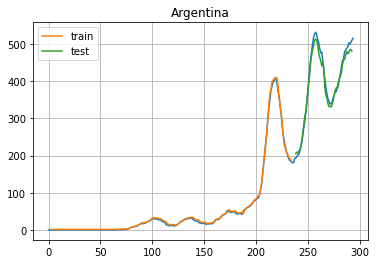

In [64]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(train_predict)+lag, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(lag*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.grid()
plt.title('Argentina')
plt.legend()
plt.show()

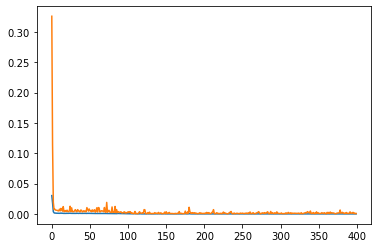

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# aca hacemos el forecast

In [66]:
n = len(test_data_2)
x_input=test_data_2[n-lag:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=lag
i=0

while(i<10): 
    if(len(temp_input)>lag):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, lag, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, lag,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

1 day output [[0.88326997]]
2 day output [[0.8000017]]
3 day output [[0.6981263]]
4 day output [[0.5619281]]
5 day output [[0.4168541]]
6 day output [[0.26858228]]
7 day output [[0.1465952]]
8 day output [[0.08183292]]
9 day output [[0.06653762]]


In [67]:
lst_output = scaler.inverse_transform(lst_output)

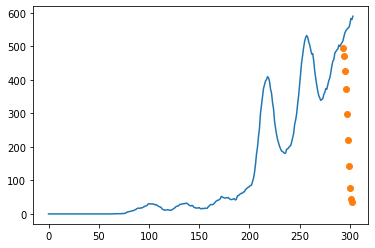

In [68]:
plt.plot(df1)
dias_forecast = np.arange(0,10) + len(df) - 1
plt.plot(dias_forecast,lst_output,'o')
#plt.xlim(290,310)

(290.0, 310.0)

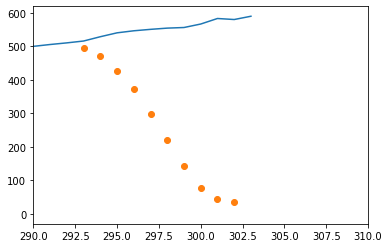

In [69]:
plt.plot(df1)
dias_forecast = np.arange(0,10) + len(df) - 1
plt.plot(dias_forecast,lst_output,'o')
plt.xlim(290,310)

In [70]:
print(df1[-10:]-lst_output)

[[ 33.57368703]
 [ 70.03161046]
 [120.43173508]
 [178.89740551]
 [255.00975957]
 [334.011266  ]
 [423.26379158]
 [504.64177718]
 [536.03728438]
 [553.94473911]]
